In [1]:
import pandas as pd
import scanpy as sc
sc.set_figure_params(figsize=(8,8), fontsize=15, )
import numpy as np
from FACS_Sampling.preprocessing.utils import create_adata, read_tcell
from FACS_Sampling.methods.methods import sample_random, bin_sample, proportional_sampling, dist_sampling
from FACS_Sampling.plotting.plotting import change_cmap
import matplotlib.pyplot as plt
import seaborn as sns

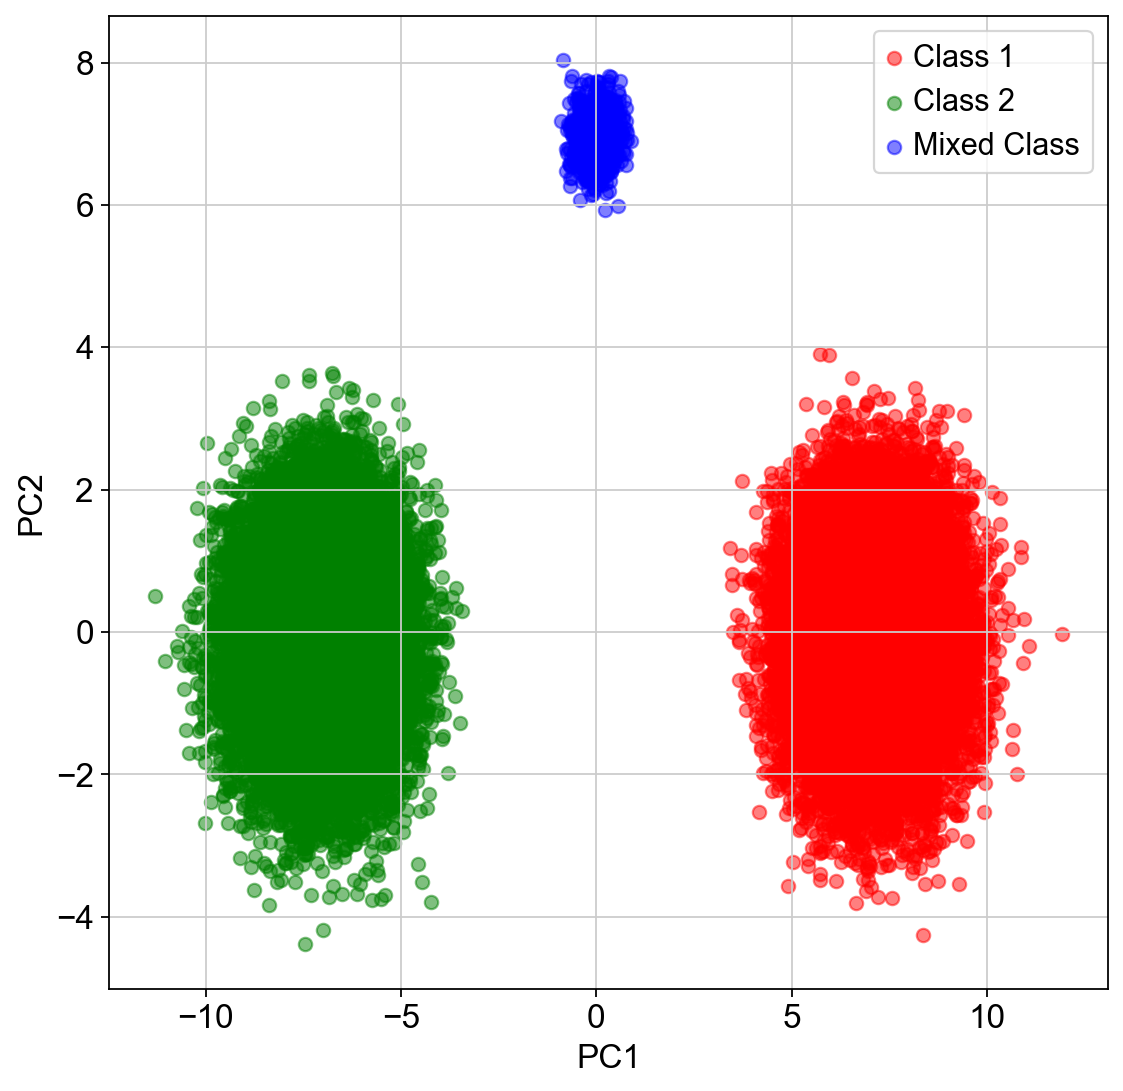

In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed1 = 3513726
seed2 = 421155
np.random.seed(seed1)

# Define the number of data points per class
N = 30000
N2 = 1000
# Generate the data for the first class (Class 1)
class1 = np.random.normal(loc=0, scale=1, size=(N, 2))
class1[:,0] += 10

# Generate the data for the second class (Class 2)
class2 = np.random.normal(loc=0, scale=1, size=(N, 2))
class2[:,1] += 10

# Generate the data for the third class (Mixed Class)
mixed_class = np.random.normal(loc=0, scale=0.3, size=(N2, 2))
mixed_class[:,0] += 10
mixed_class[:,1] += 10

# Combine the data from all three classes
data = np.vstack([class1, class2, mixed_class])

# Define the labels for each of the three classes
labels = ['Class 1', 'Class 2', 'Mixed Class']

# Define the colors to use for each class
colors = ['red', 'green', 'blue']

# Perform PCA to project the data onto 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(data)

# Create a scatter plot of the 2-dimensional projection of the data set, with different colors representing each of the 3 classes
fig, ax = plt.subplots()

ax.scatter(proj[:,0][0:N], proj[:,1][0:N], c=colors[0], label=labels[0], alpha=0.5)
ax.scatter(proj[:,0][N:2*N], proj[:,1][N:2*N], c=colors[1], label=labels[1], alpha=0.5)
ax.scatter(proj[:,0][2*N:], proj[:,1][2*N:], c=colors[2], label=labels[2], alpha=0.5)

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()


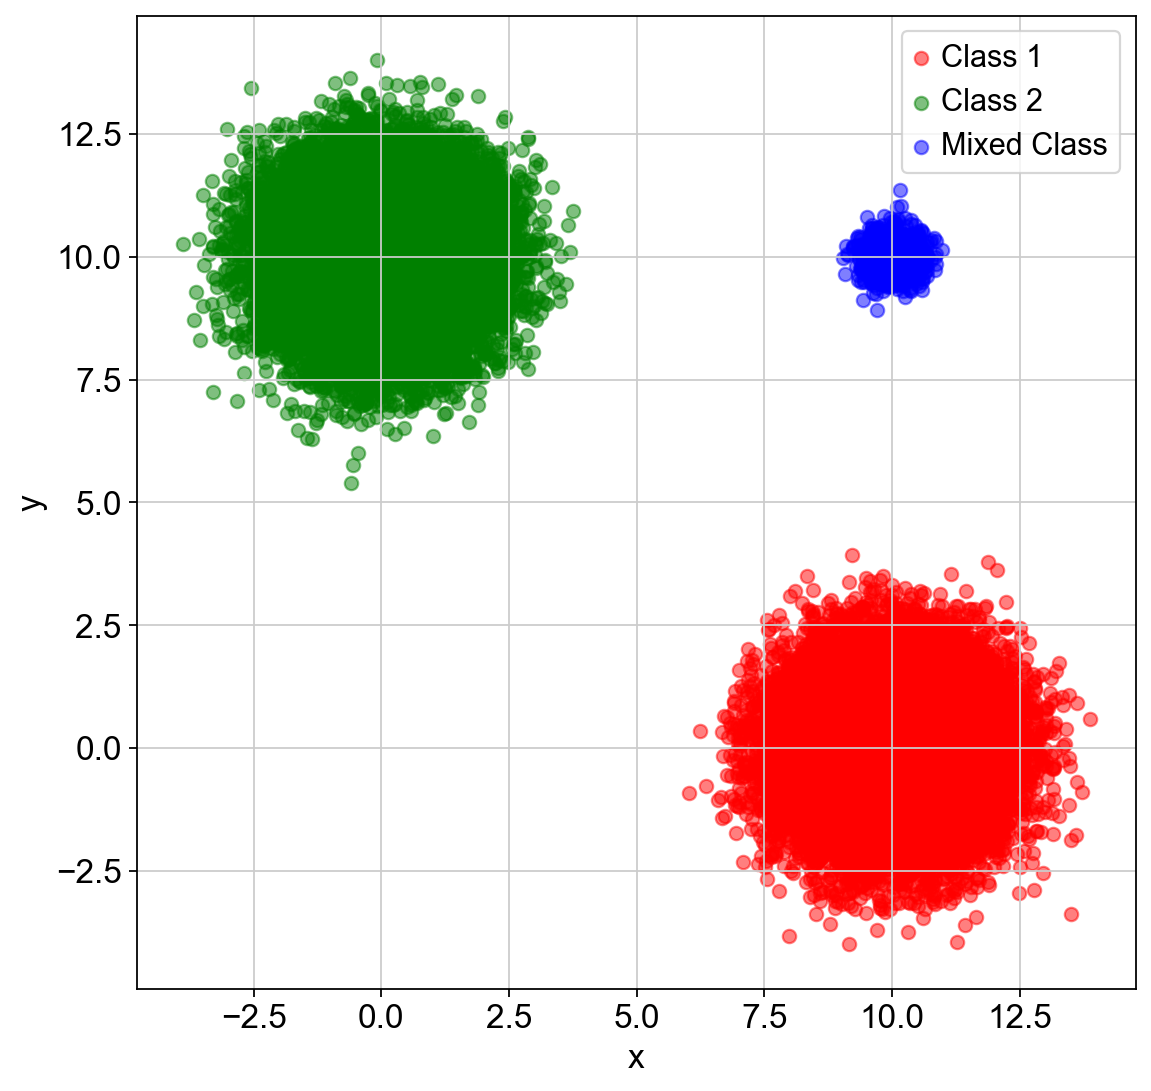

In [3]:

# Create a scatter plot of the 2-dimensional projection of the data set, with different colors representing each of the 3 classes
fig, ax = plt.subplots()

ax.scatter(data[:,0][0:N], data[:,1][0:N], c=colors[0], label=labels[0], alpha=0.5)
ax.scatter(data[:,0][N:2*N], data[:,1][N:2*N], c=colors[1], label=labels[1], alpha=0.5)
ax.scatter(data[:,0][2*N:], data[:,1][2*N:], c=colors[2], label=labels[2], alpha=0.5)

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

In [4]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

# Create a random projection object with 98 components
rp = GaussianRandomProjection(n_components=100)

# Project the data to the new 100D space
data_h = rp.fit_transform(data)

# Print the shape of the new data array
print(data_h.shape)


(61000, 100)


/Users/ekarimi/opt/anaconda3/envs/FACS_Sampling/lib/python3.10/site-packages/sklearn/random_projection.py:398: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (2 < 100).The dimensionality of the problem will not be reduced.
  warnings.warn(


In [5]:
from anndata import AnnData
adata = AnnData(data_h)
l = []
l = ['Class 1' for i in class1]
l += ['Class 2' for i in class2]
l += ['Mixed Class' for i in mixed_class]
adata.obs['label'] = l

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2793124704.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(data_h)


In [6]:
columns = adata.var_names

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


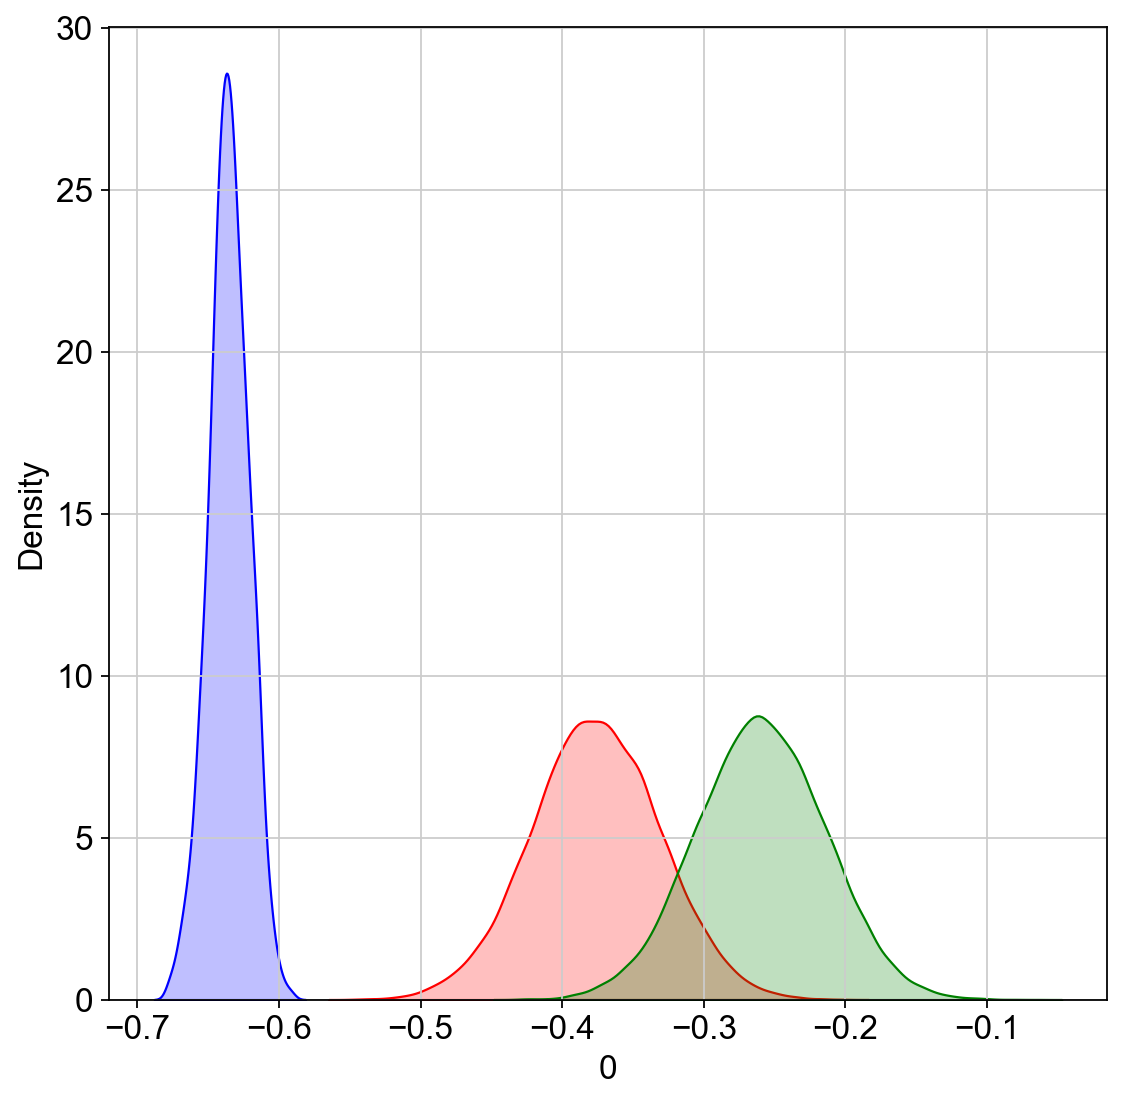

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


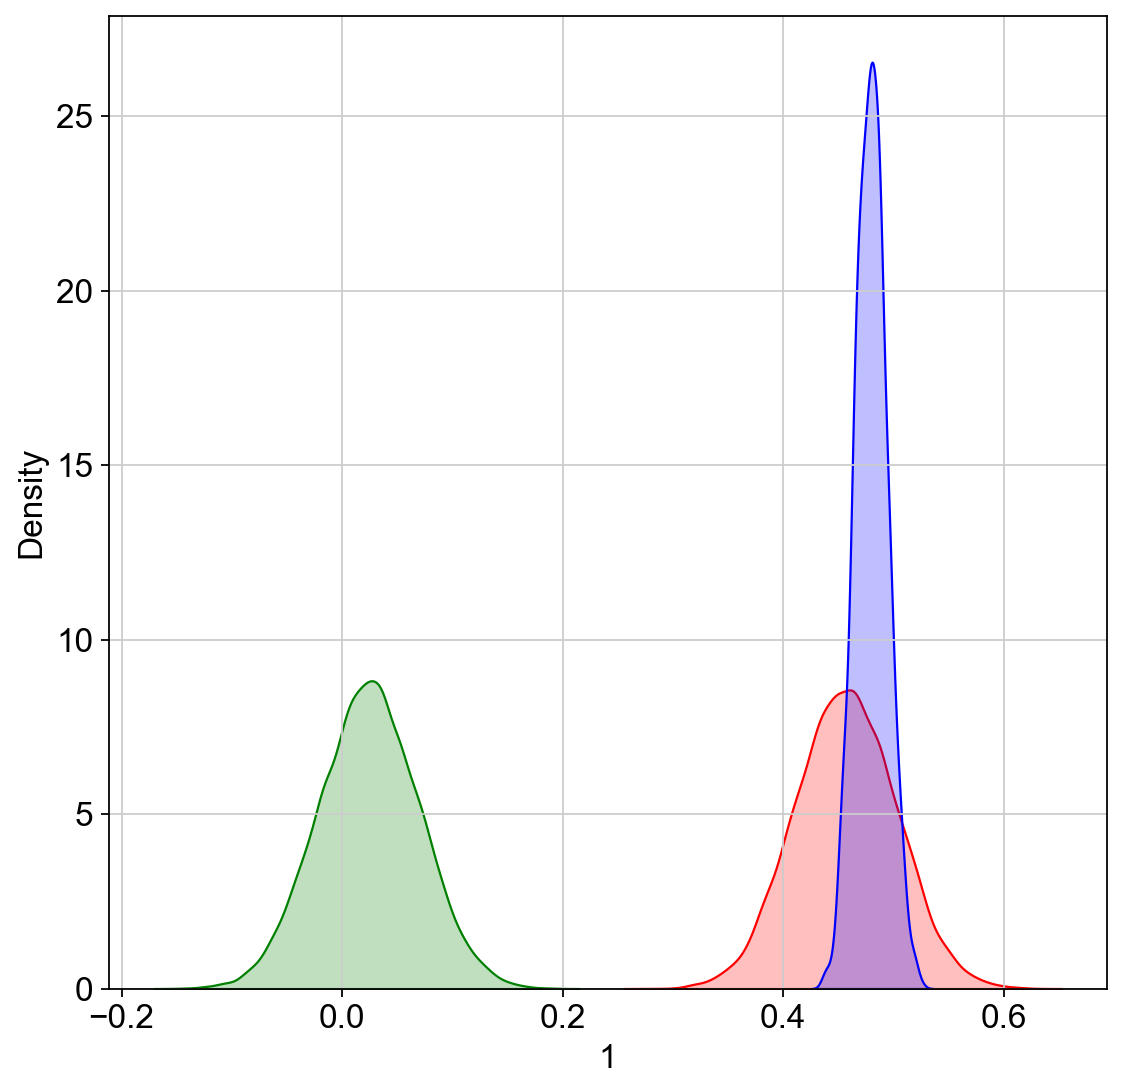

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


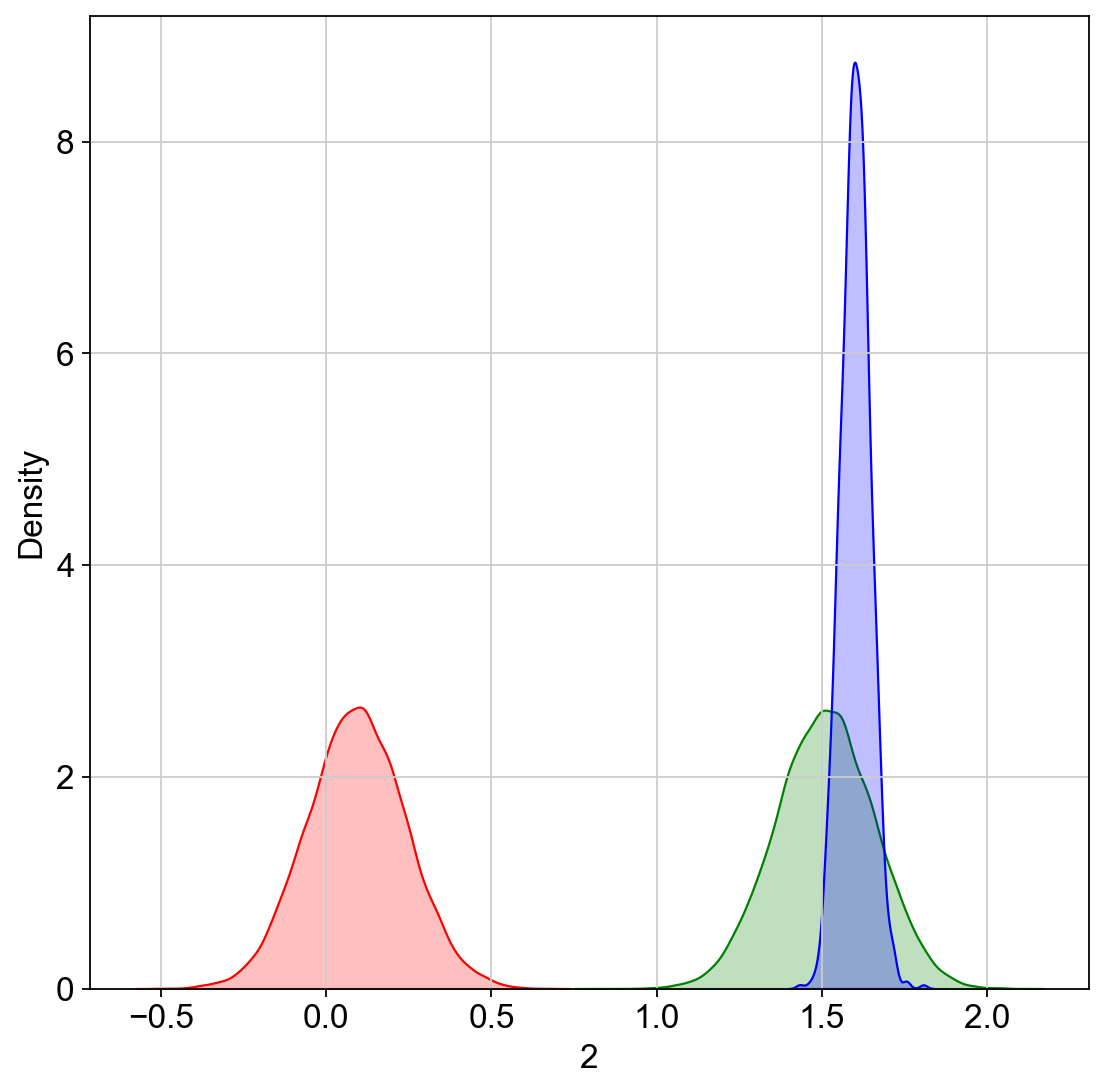

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


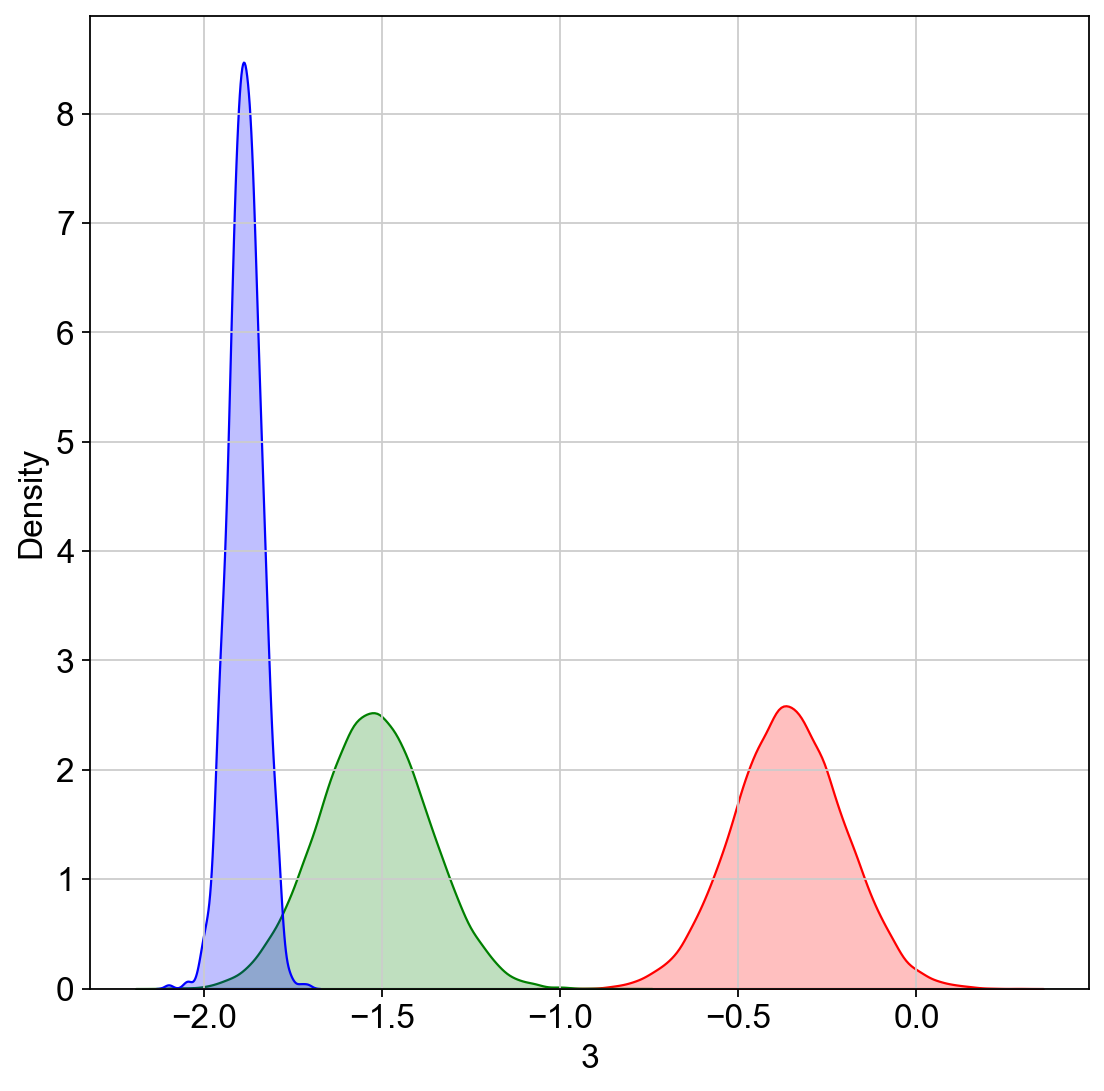

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


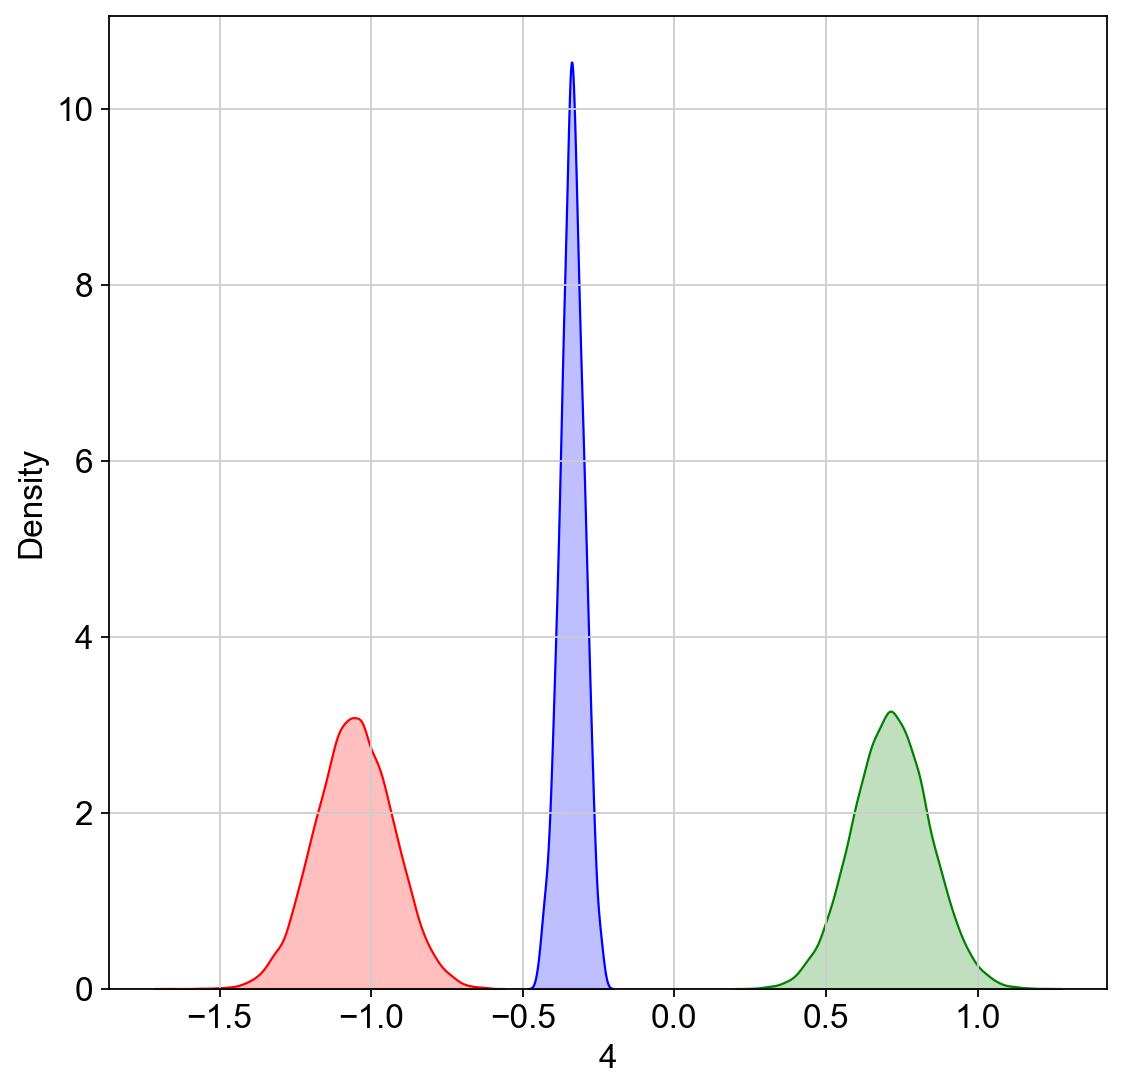

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


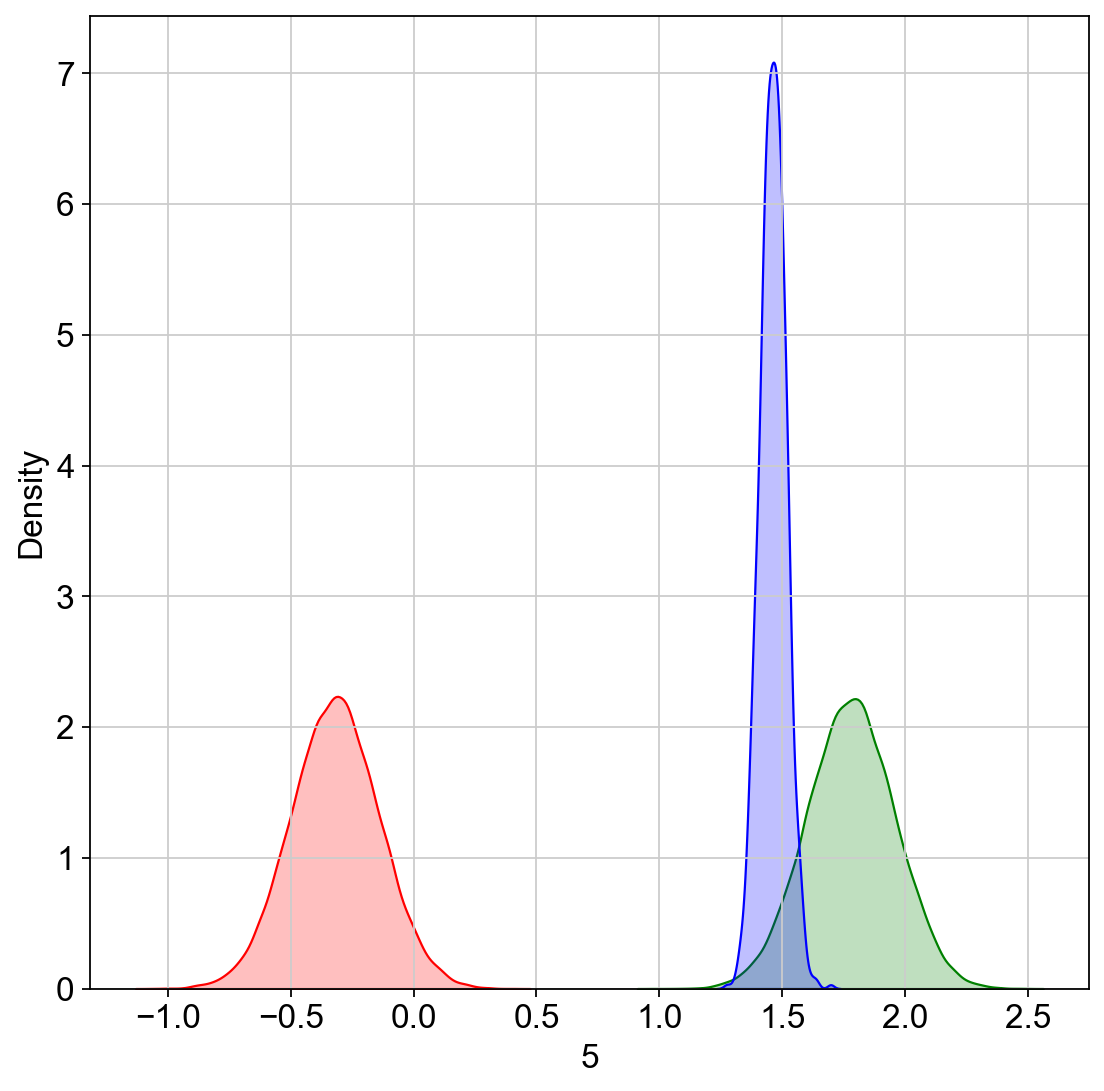

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


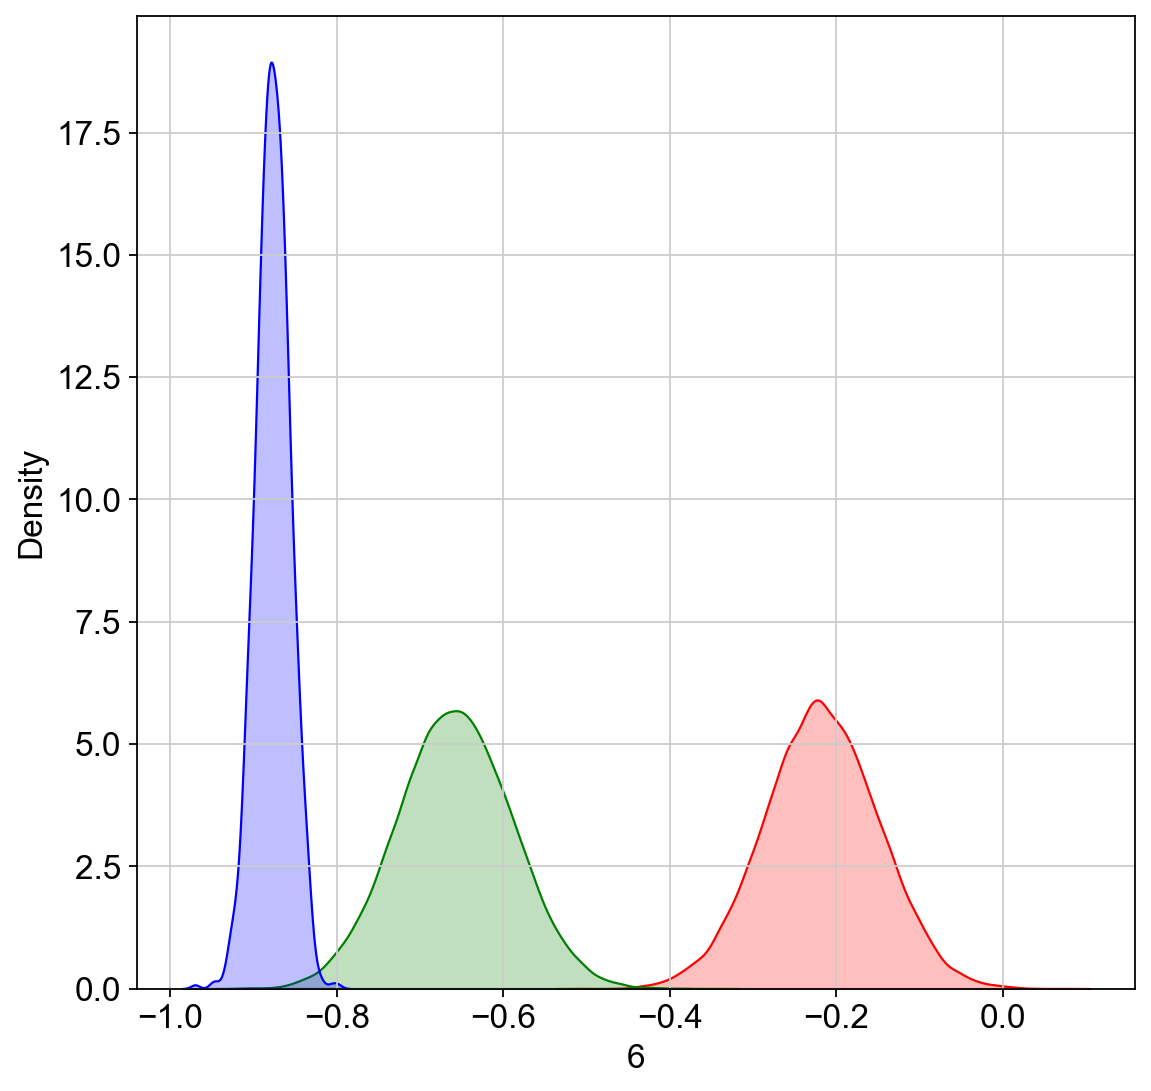

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


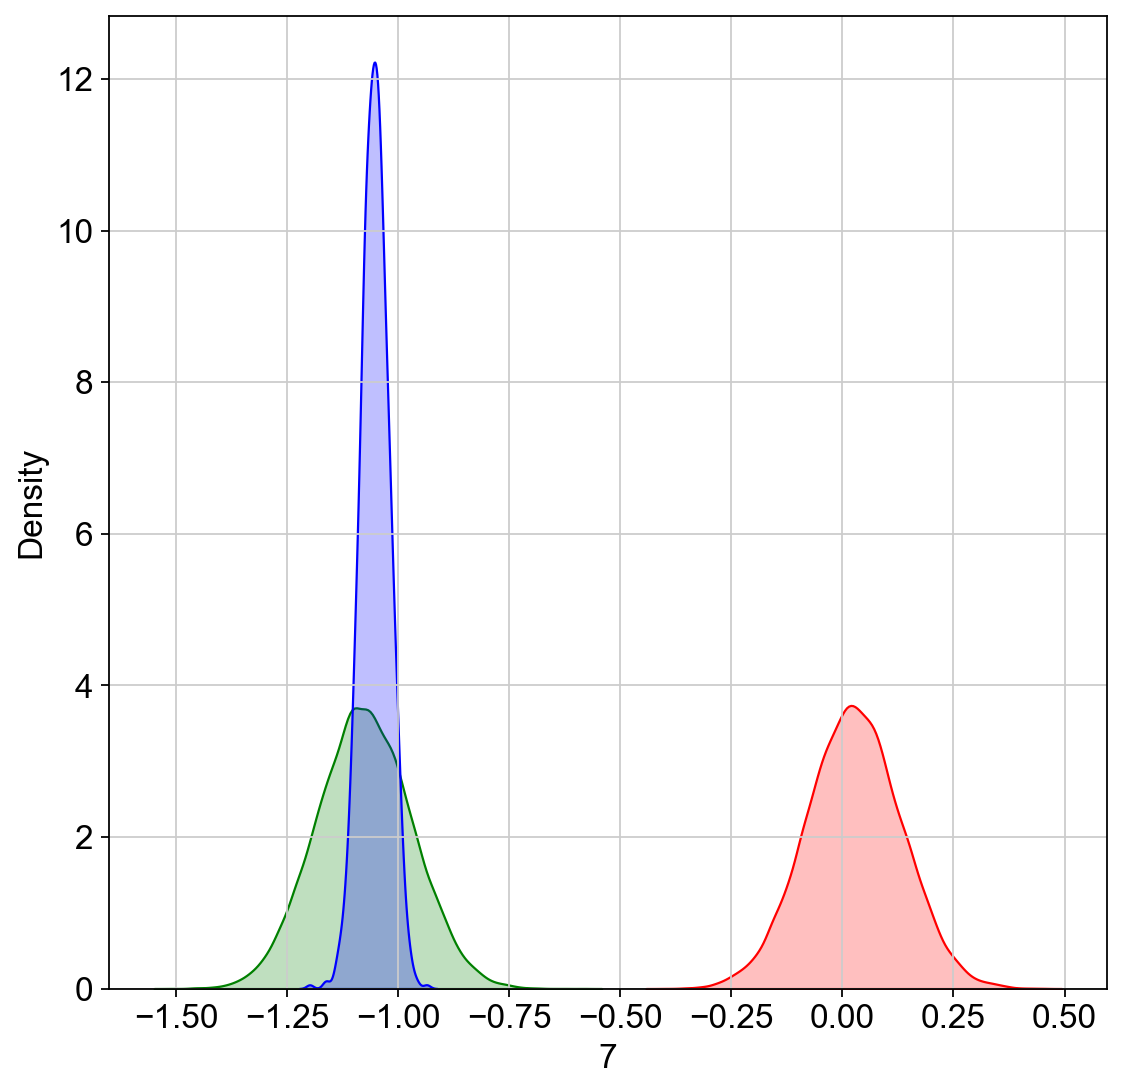

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


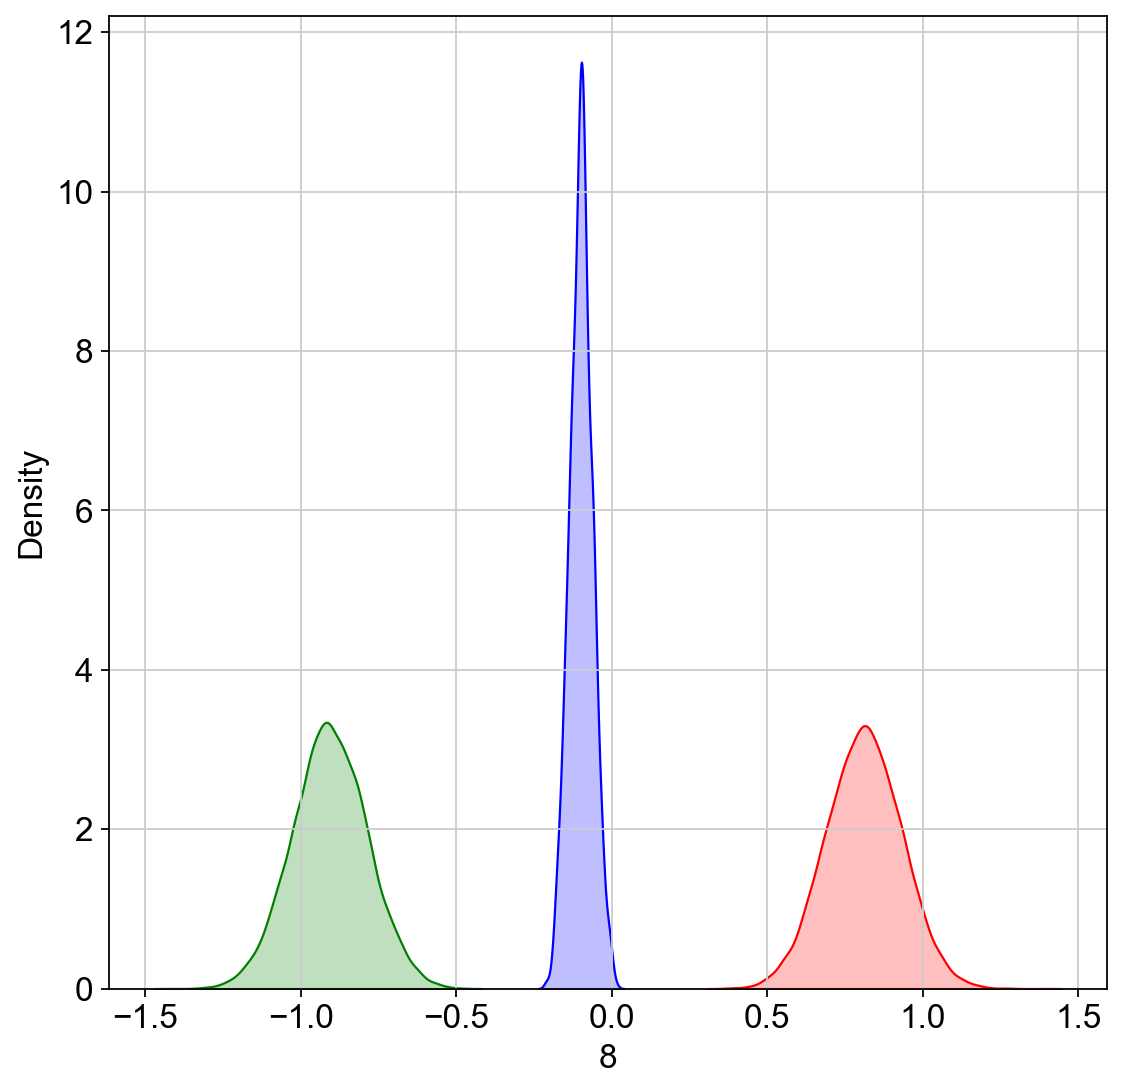

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


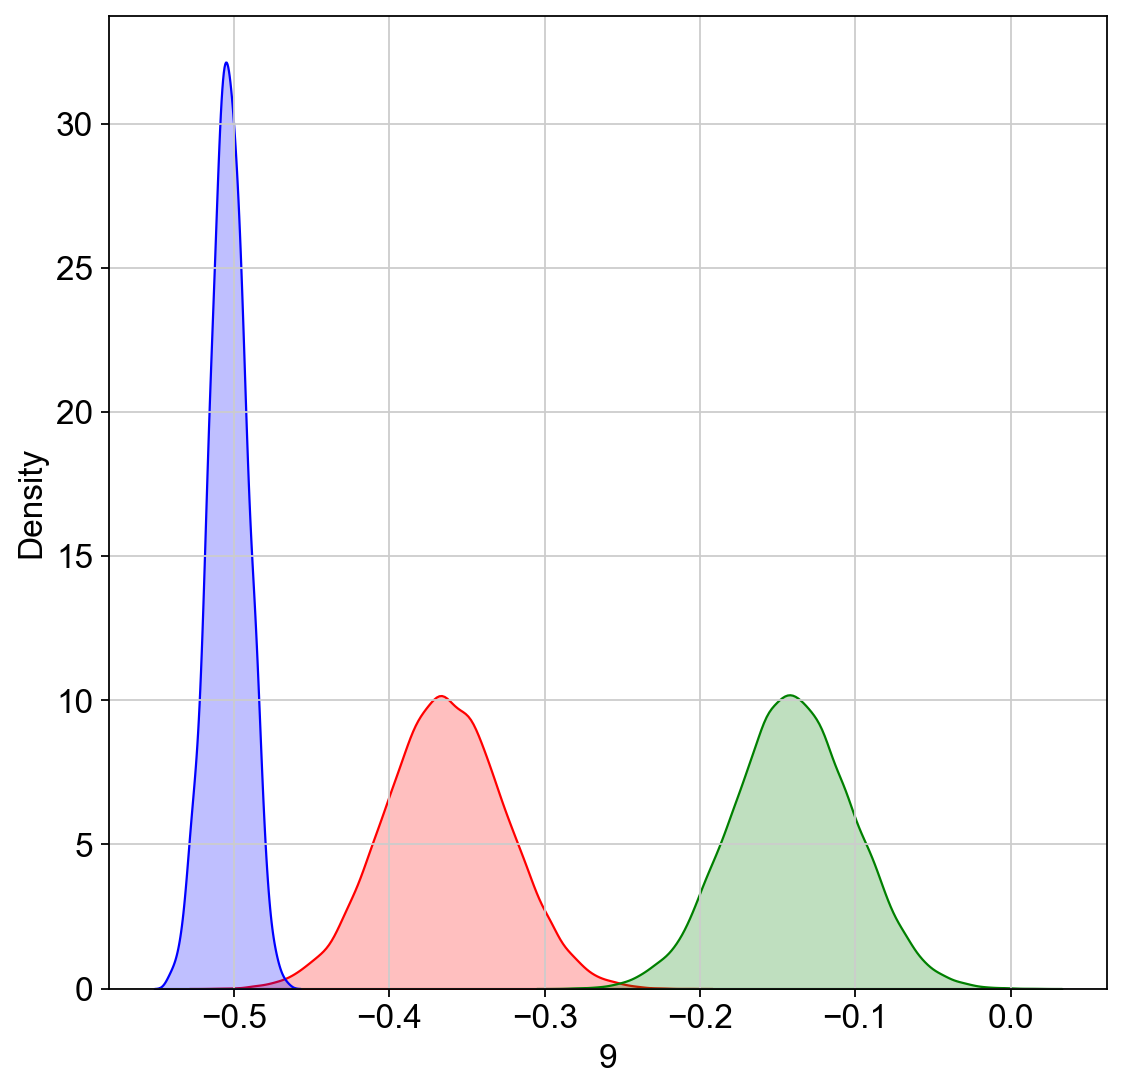

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


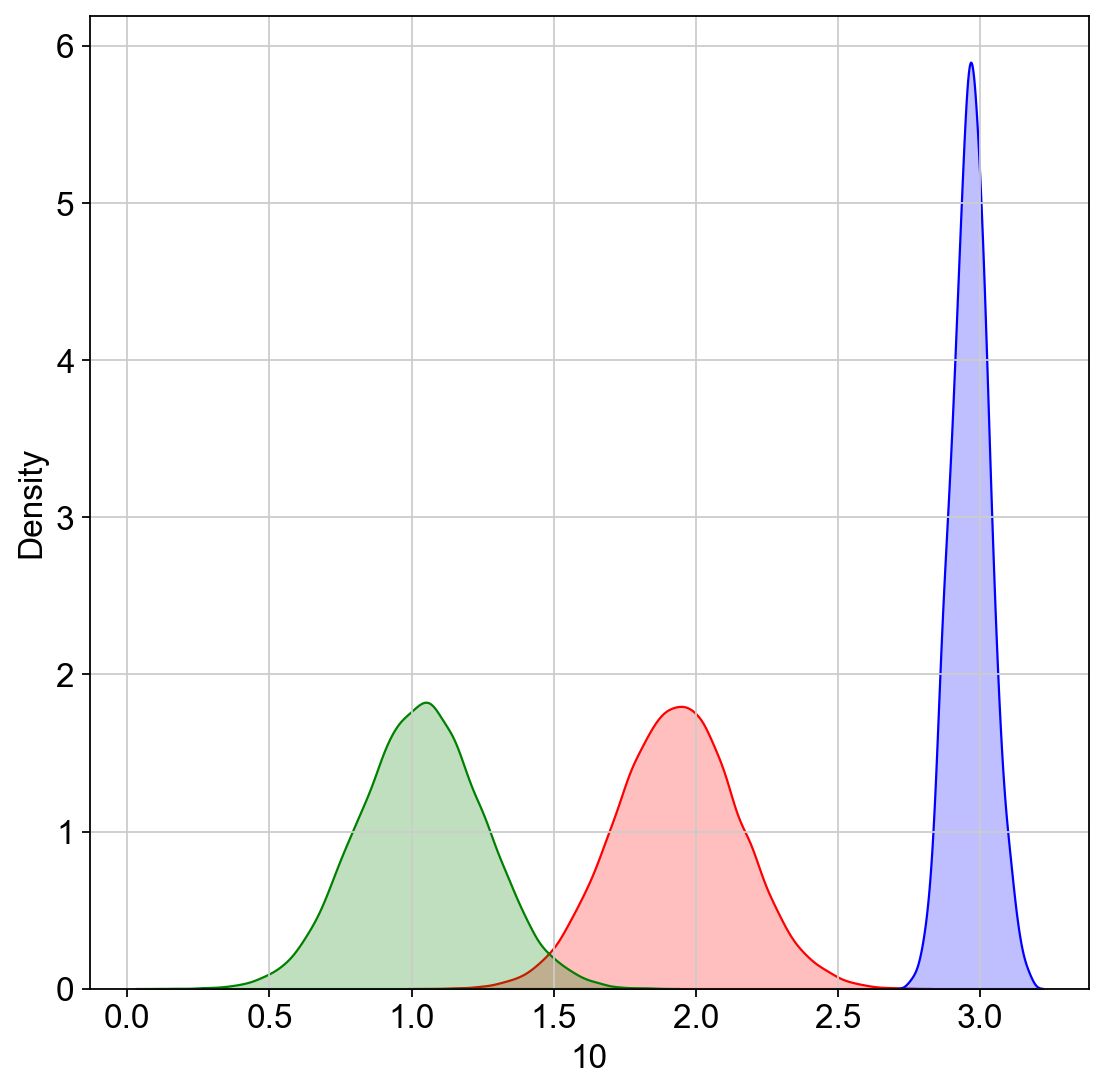

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


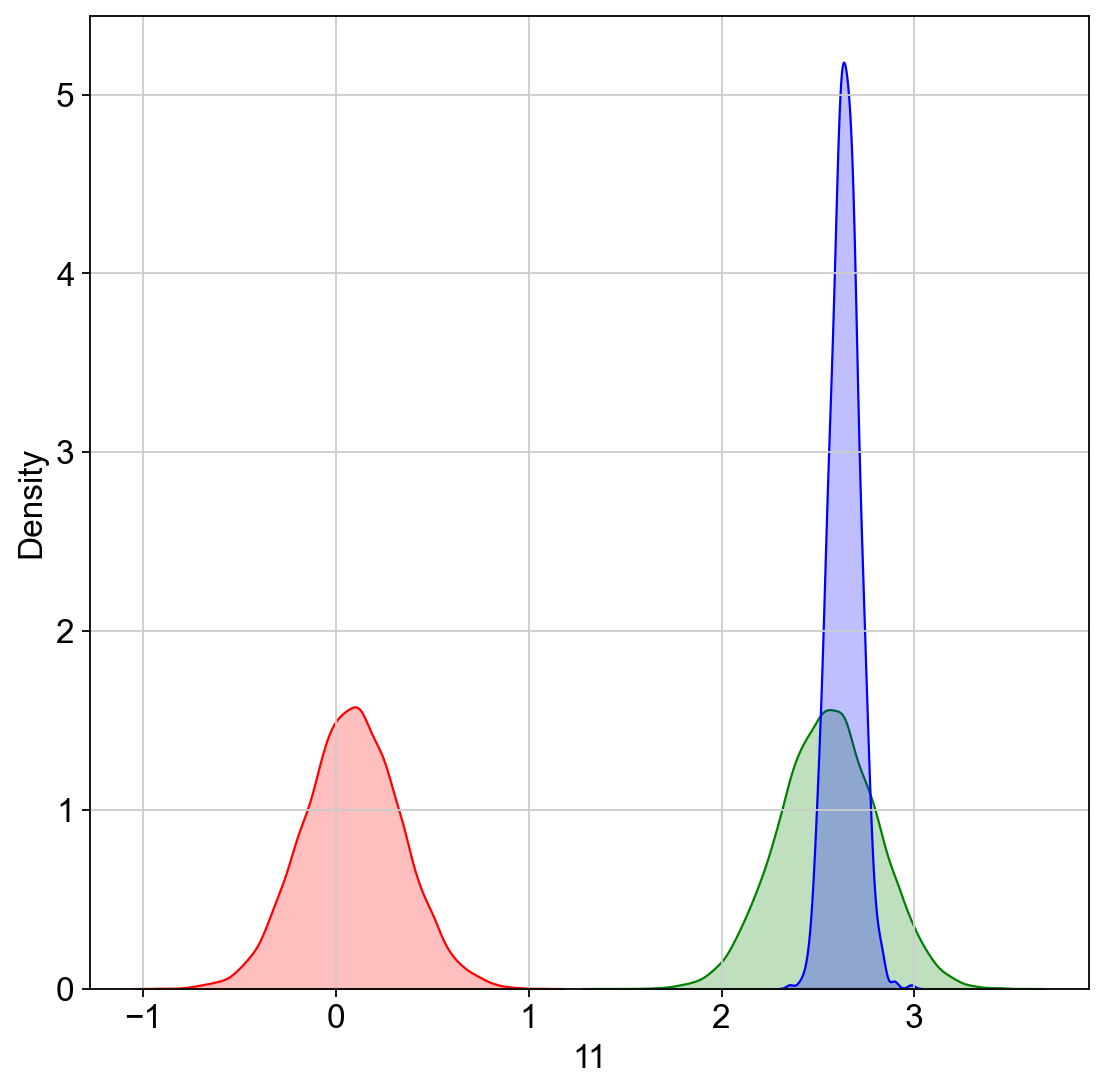

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


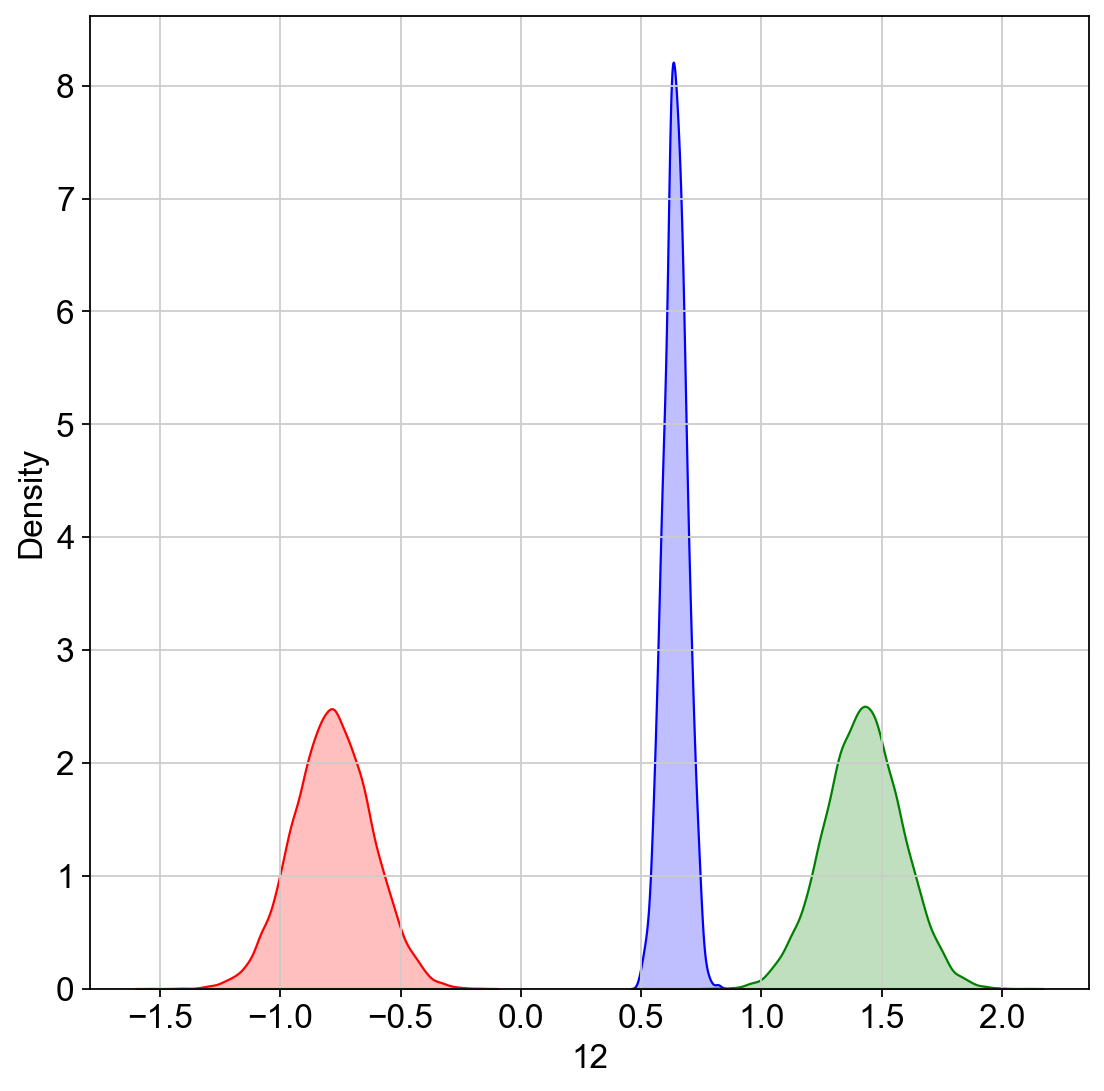

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


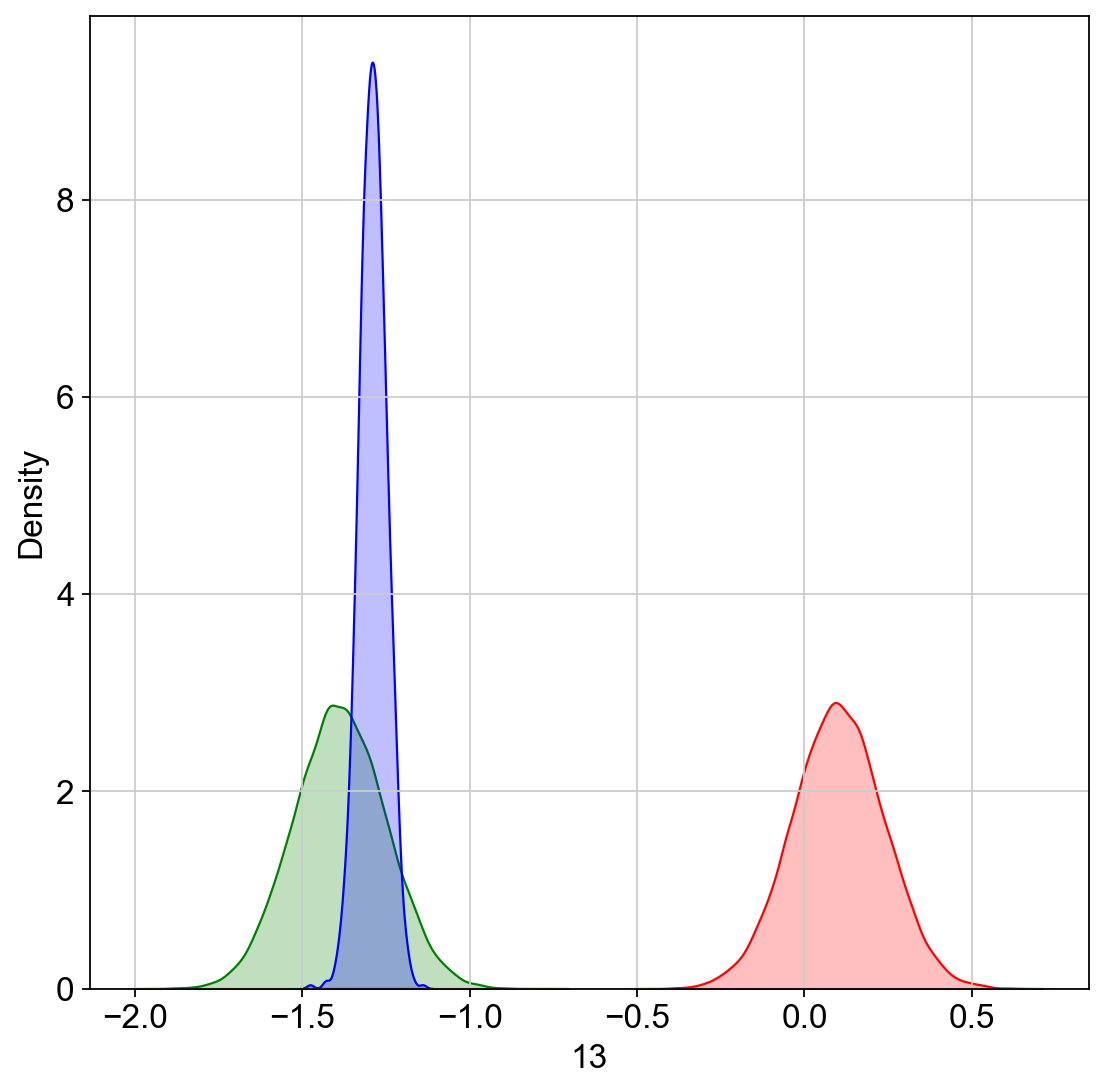

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


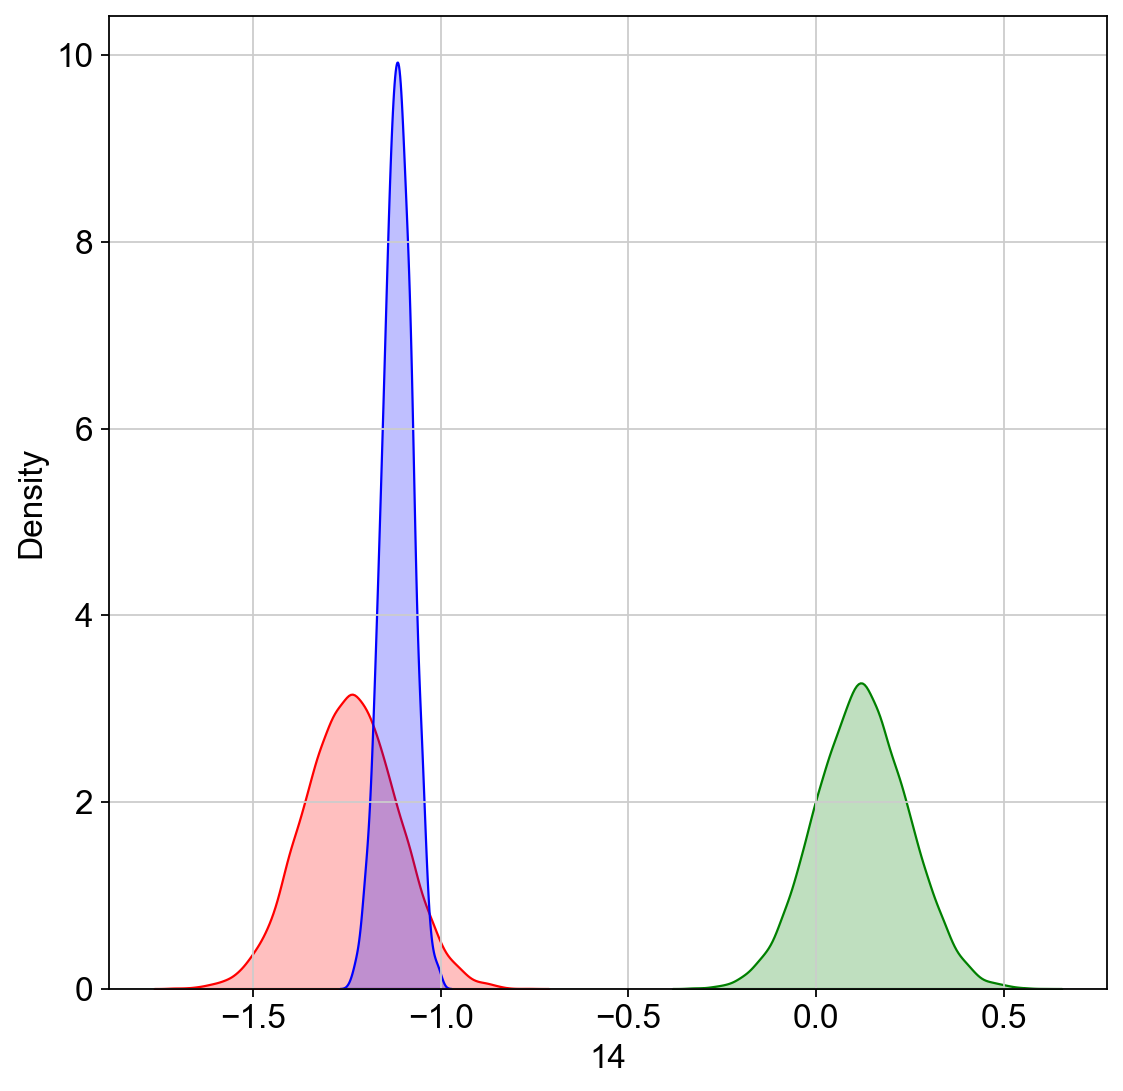

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


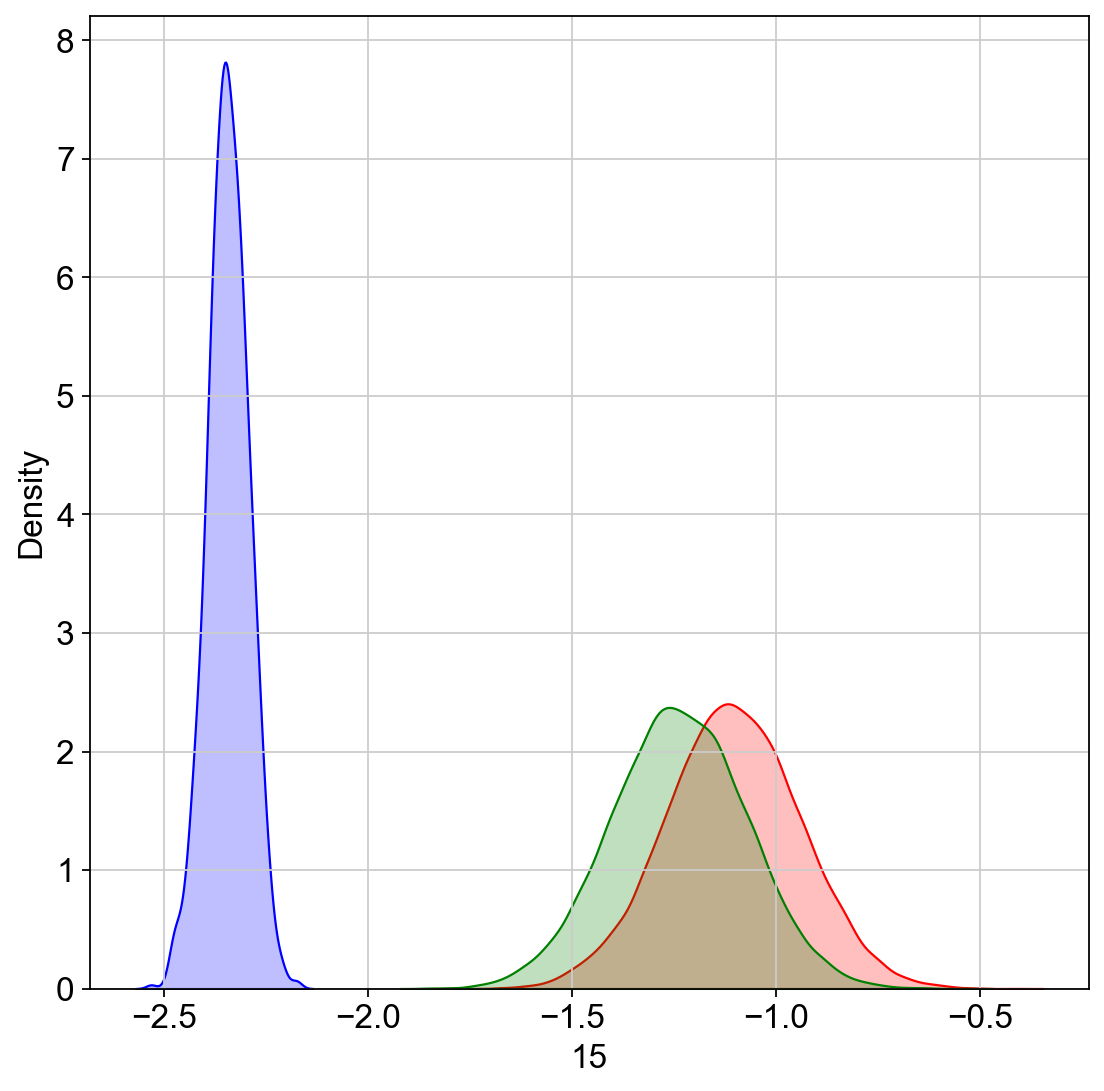

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


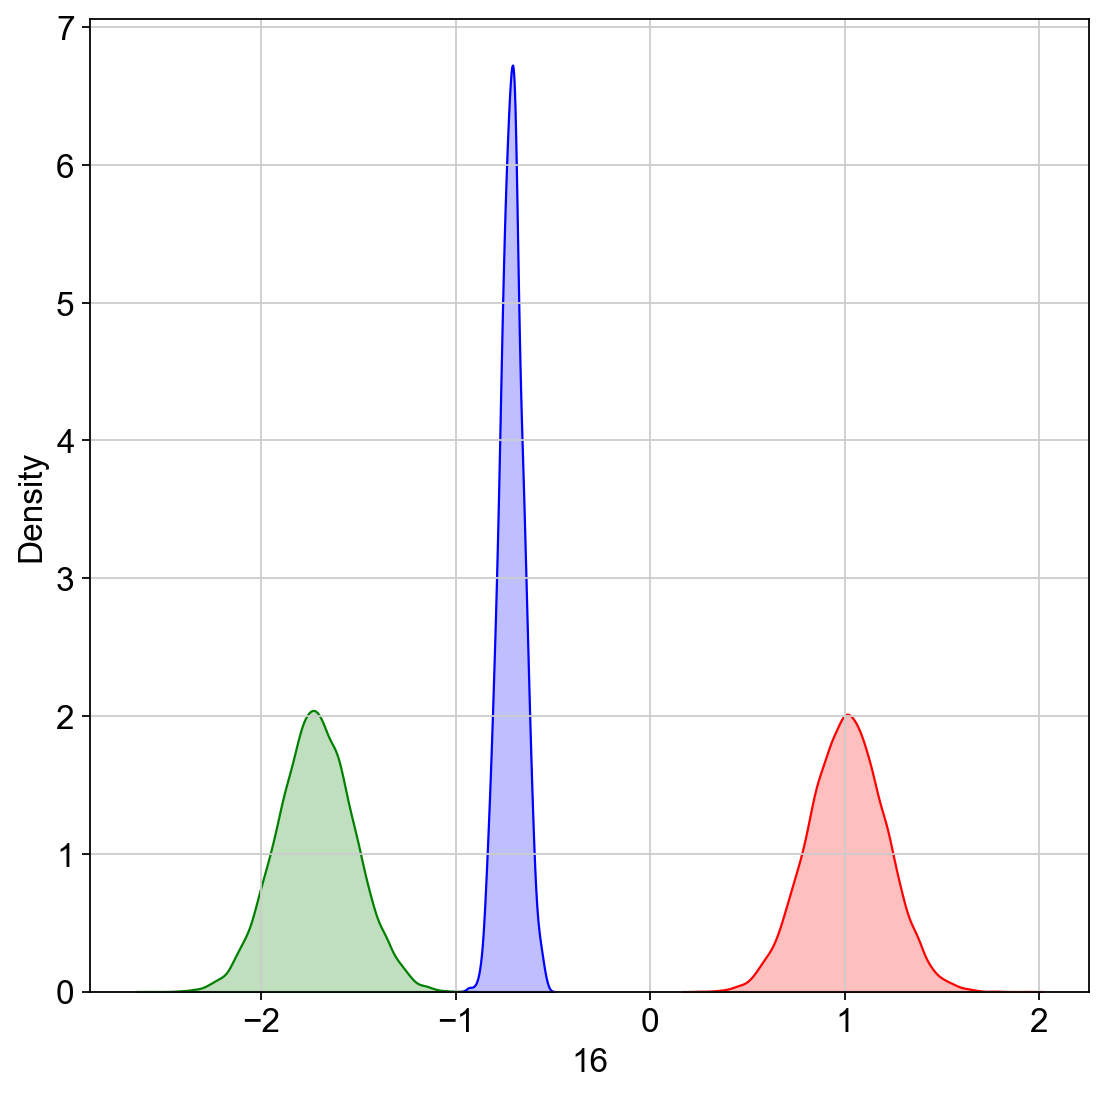

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


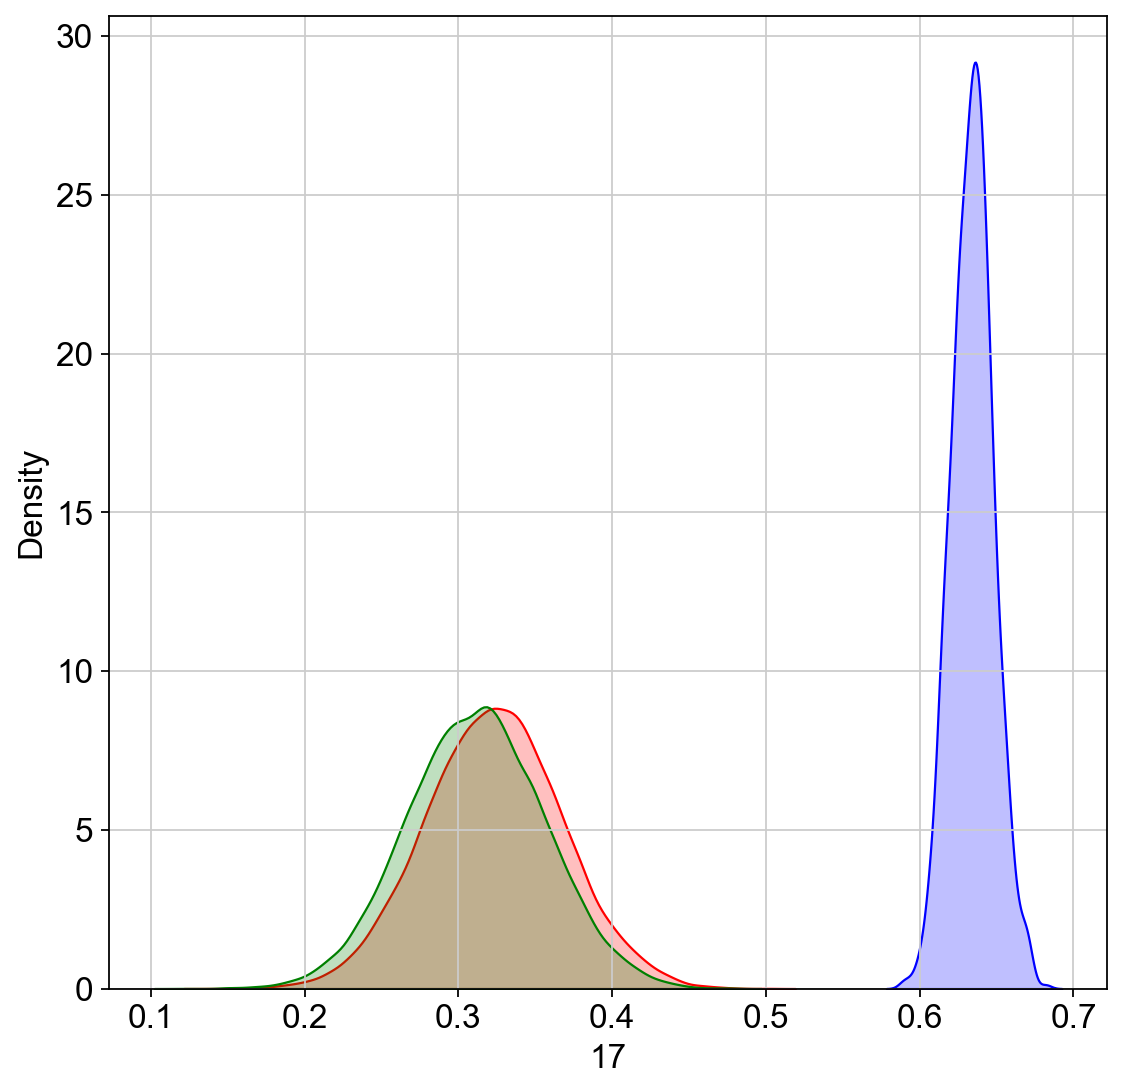

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


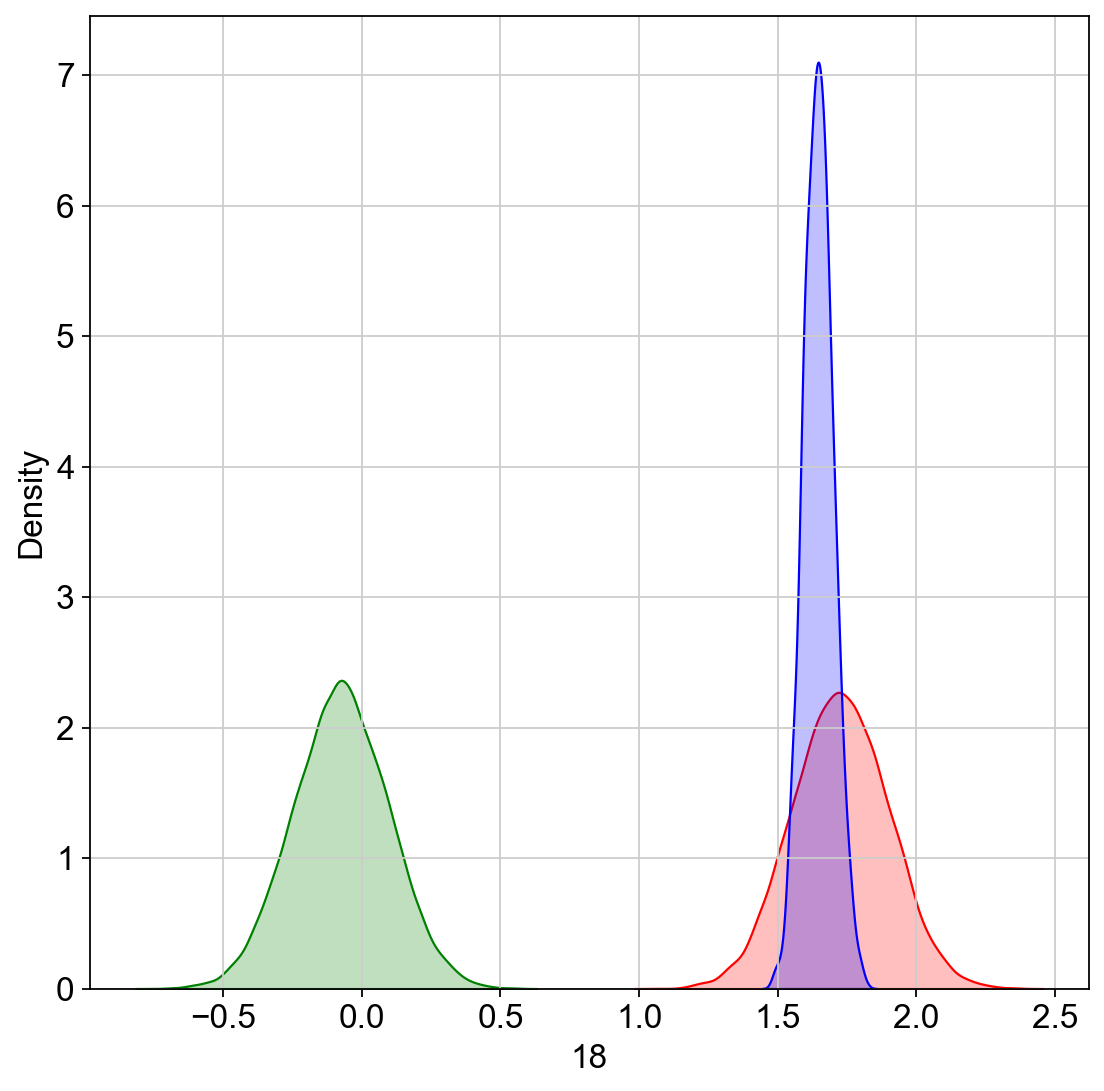

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


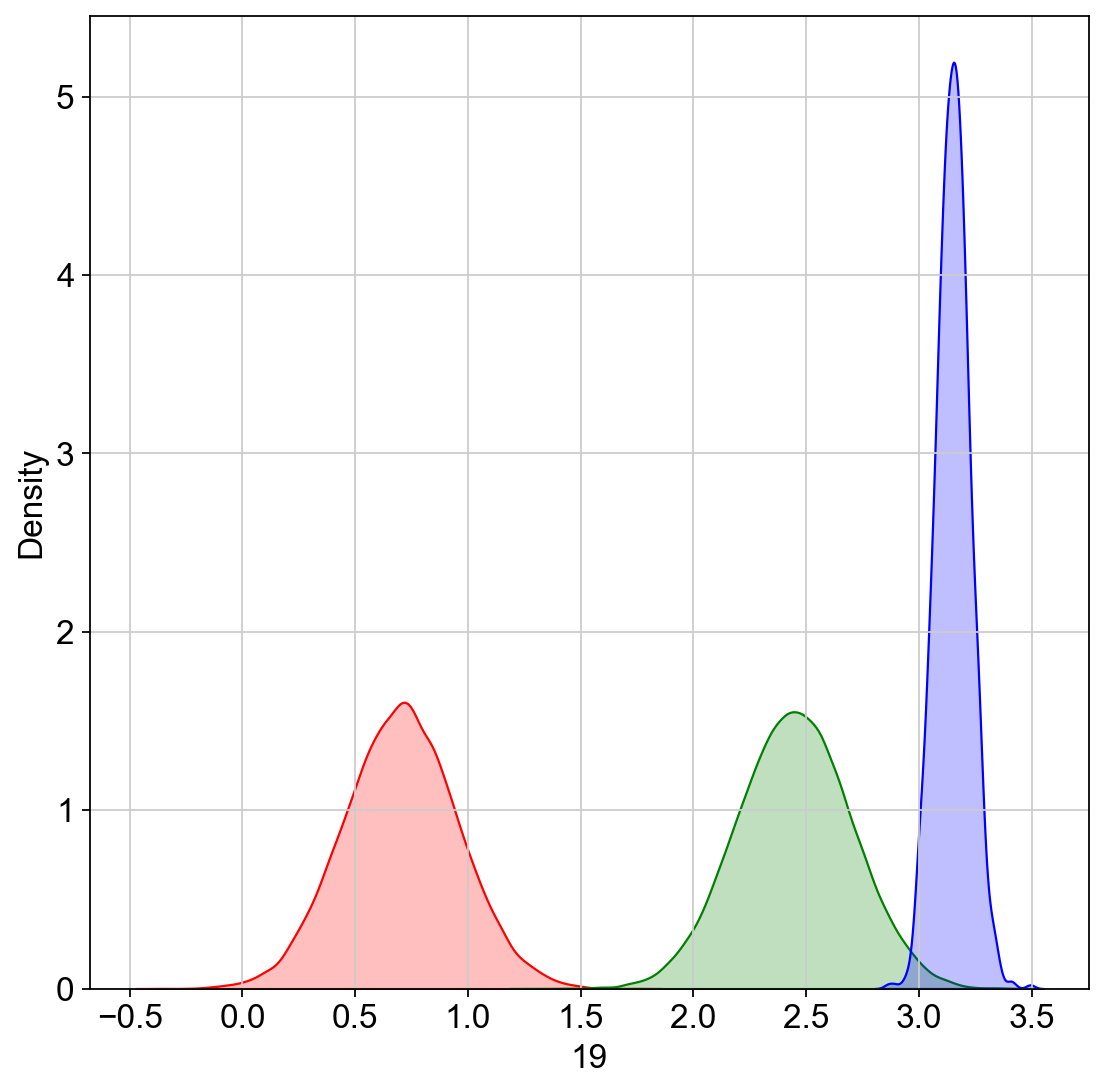

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


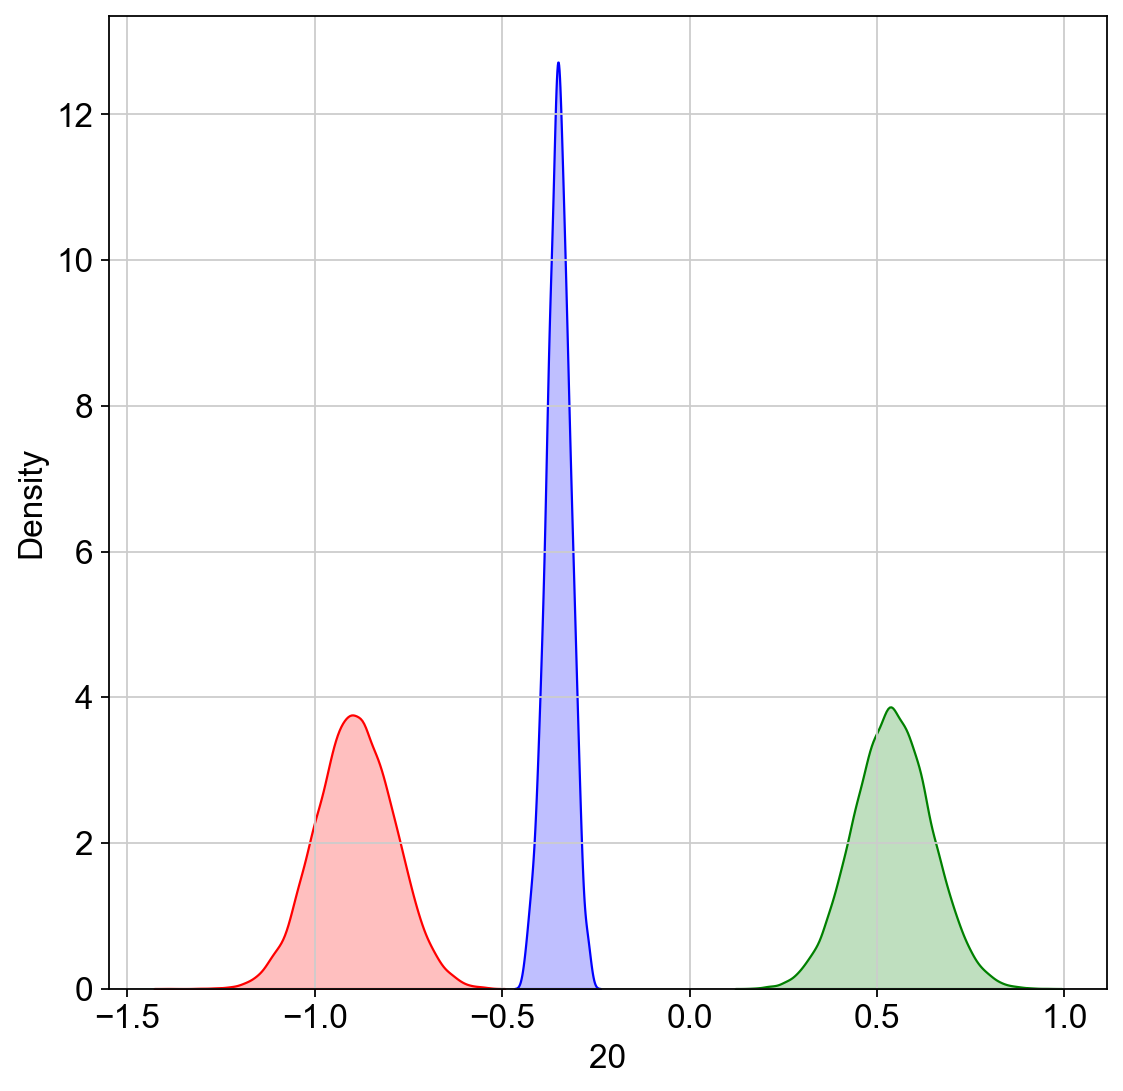

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


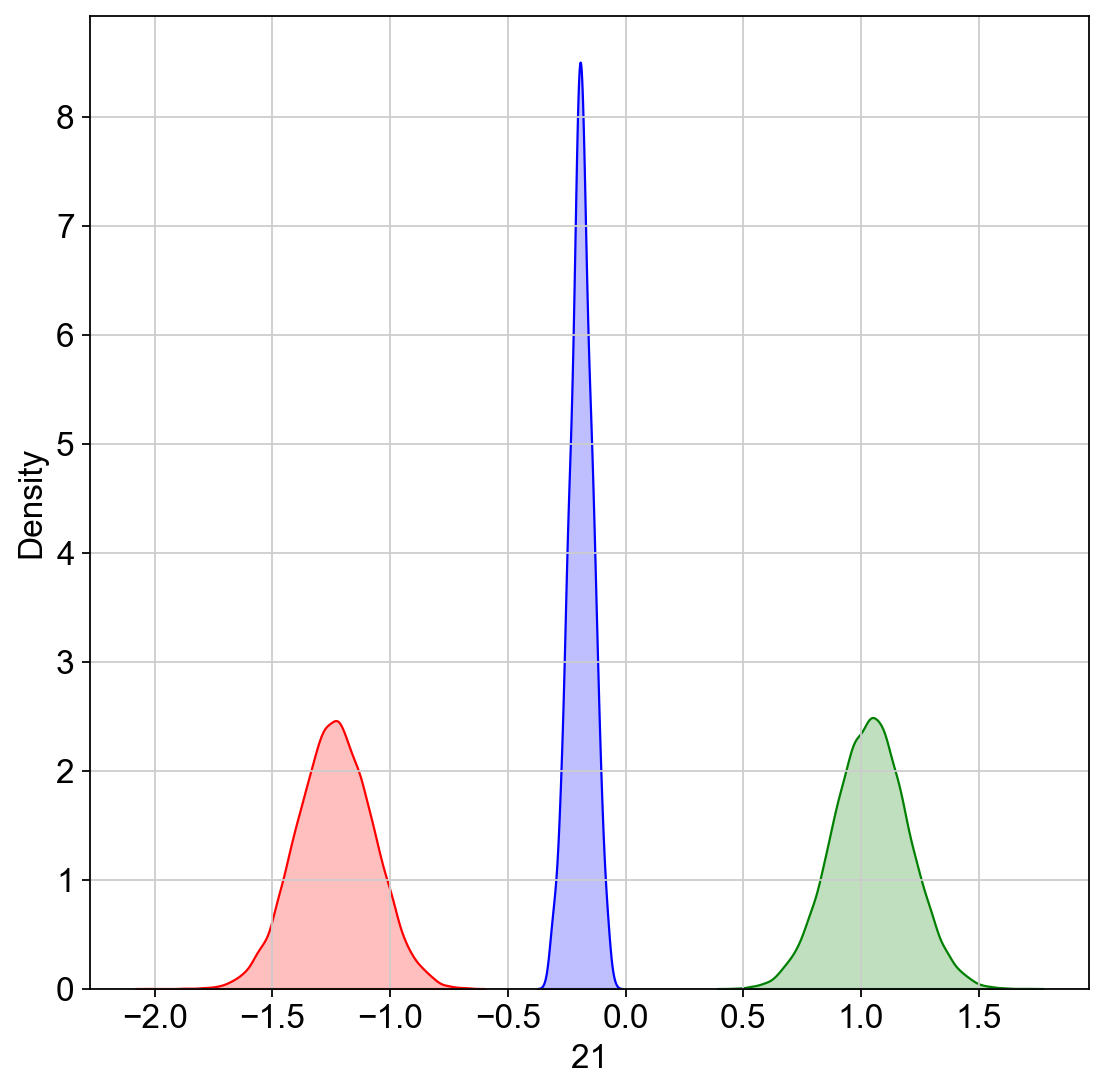

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


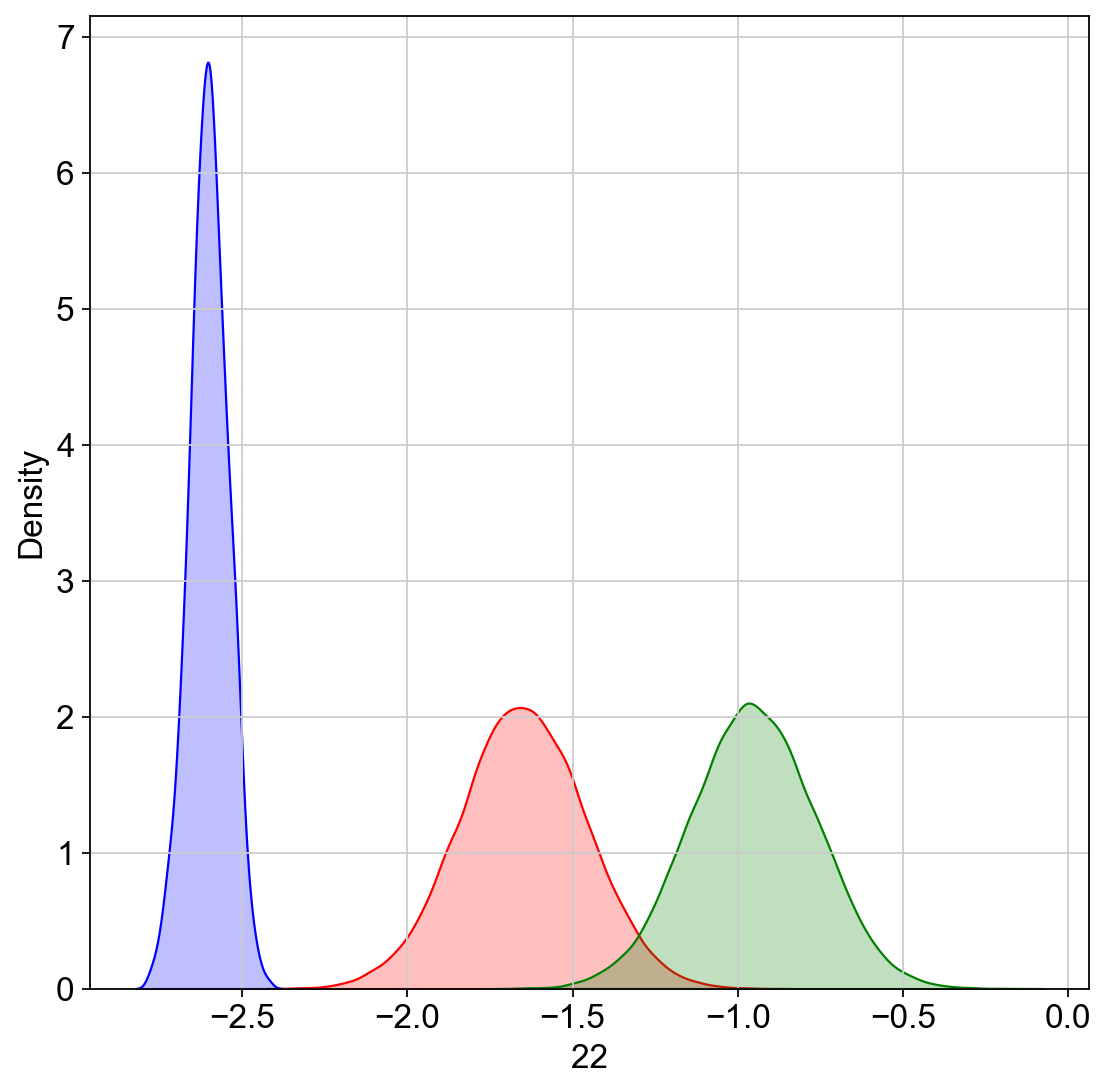

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


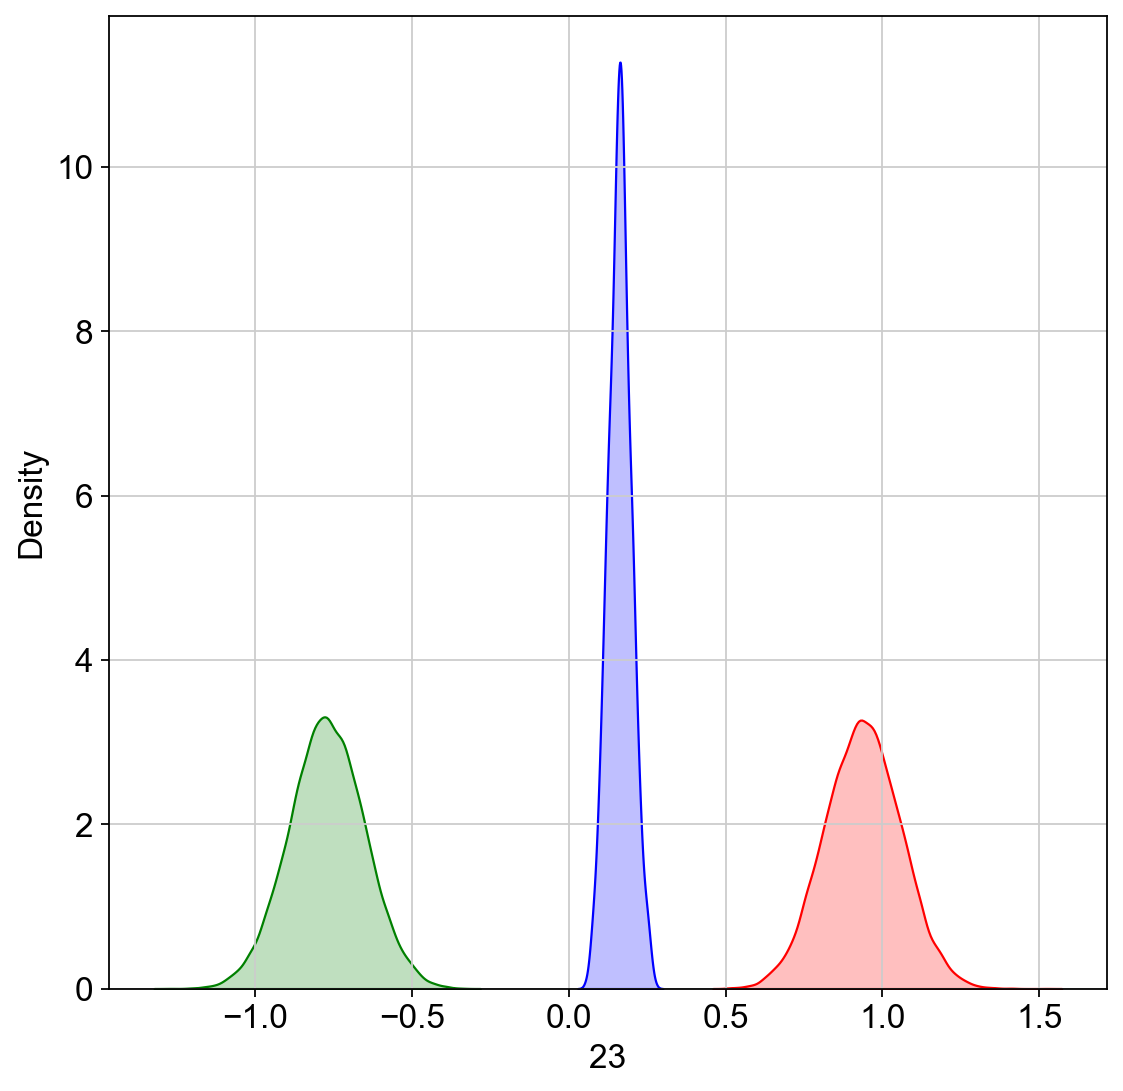

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


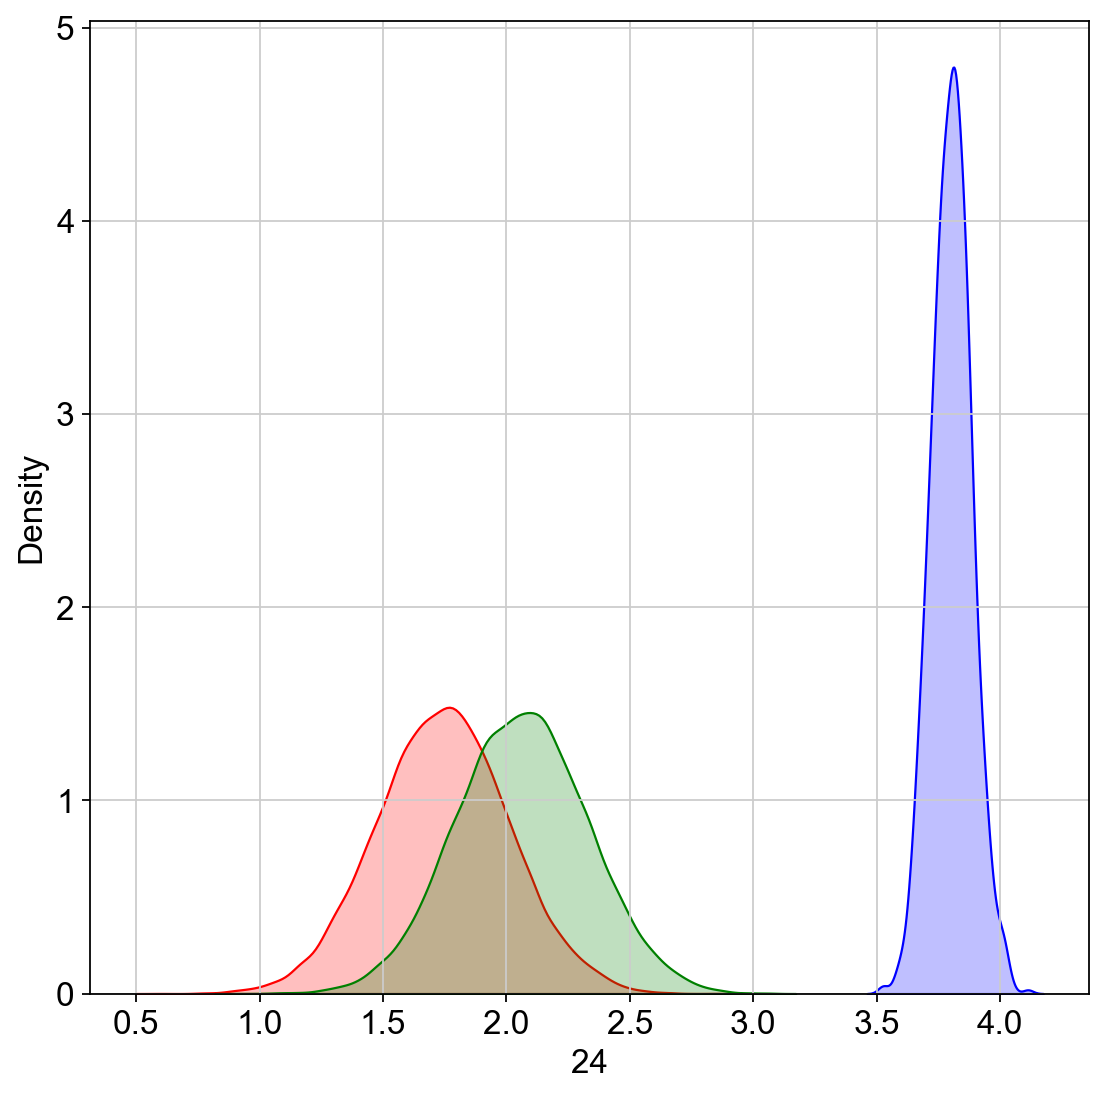

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


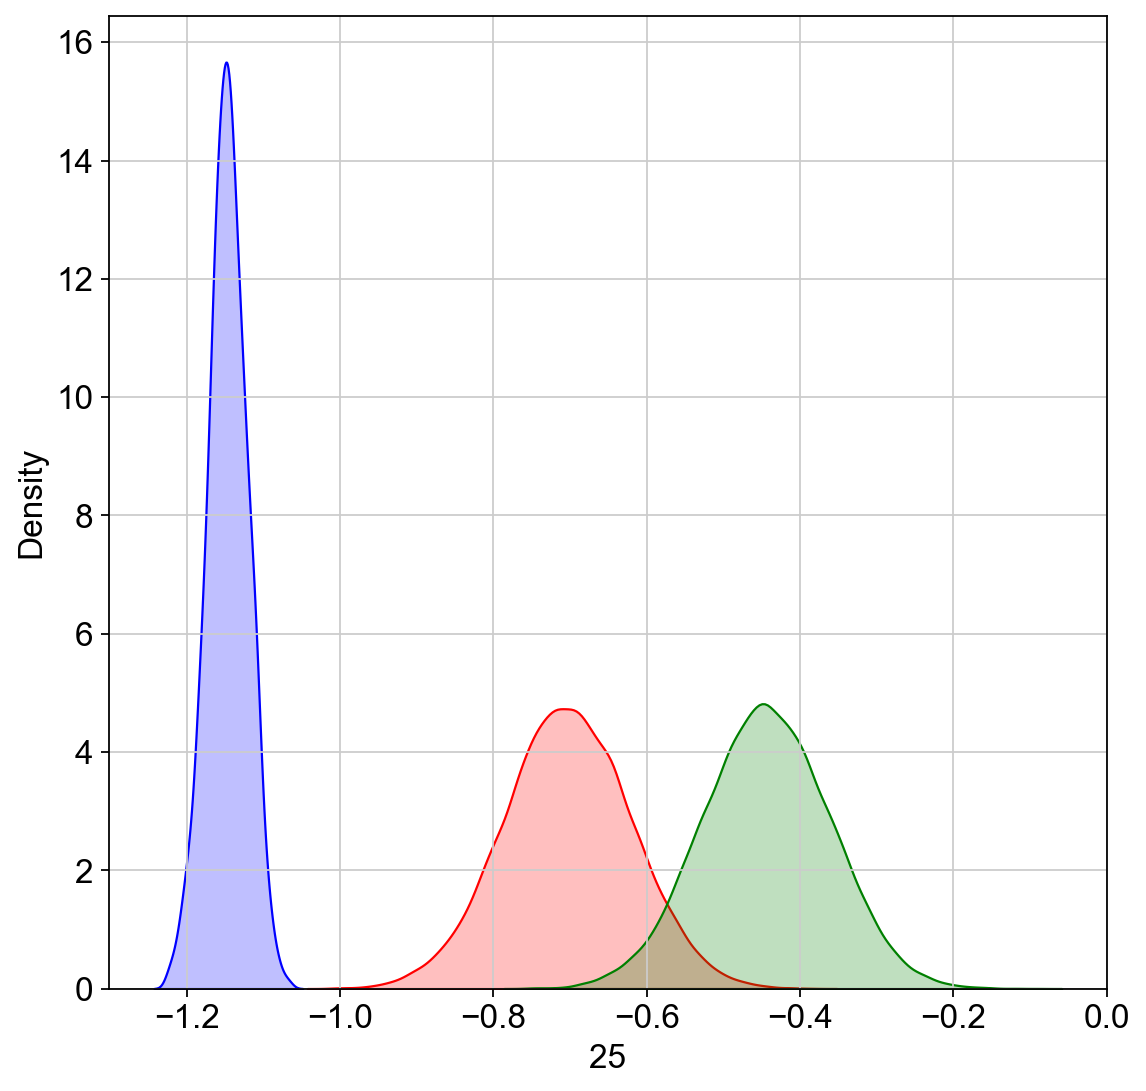

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


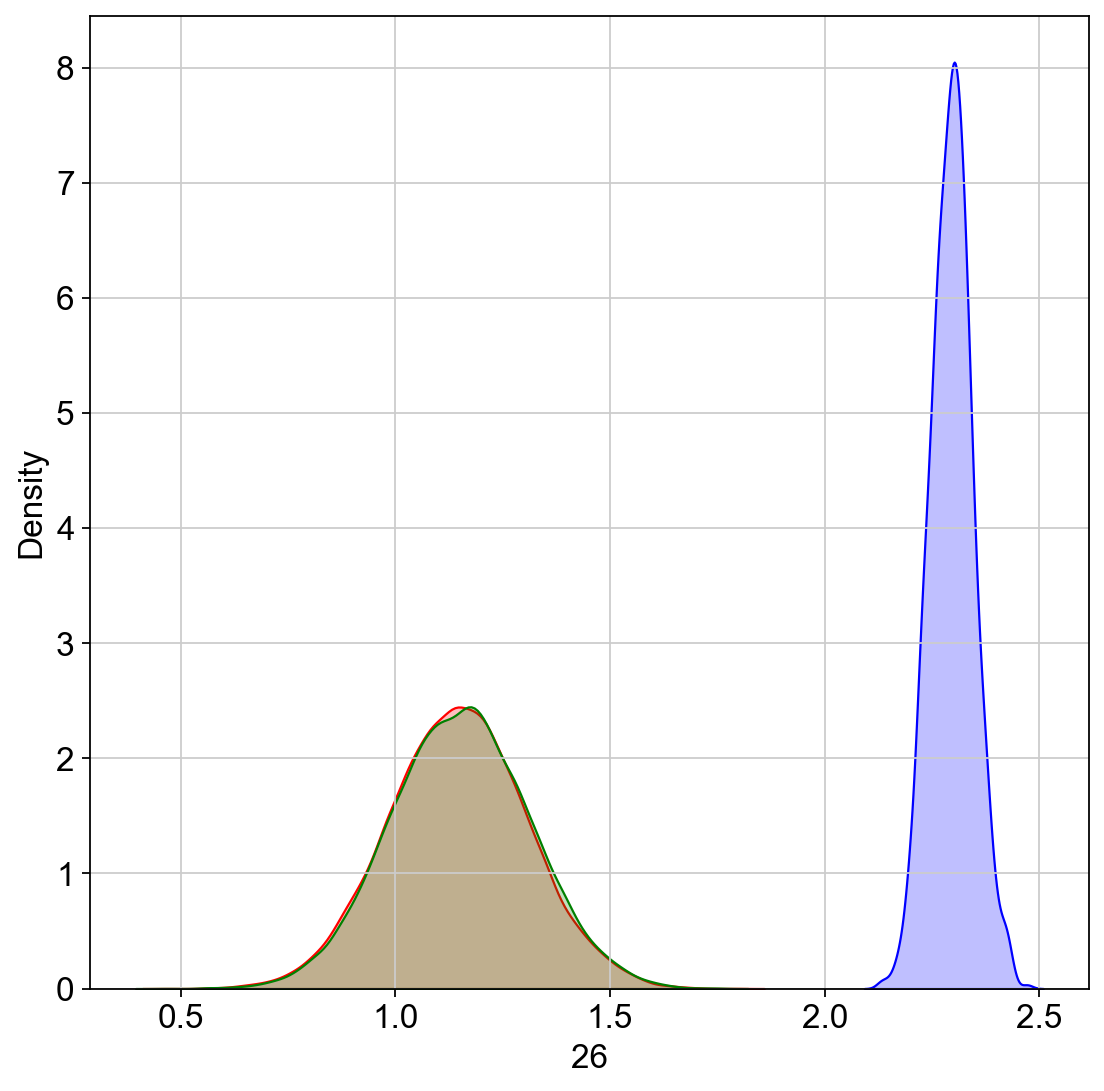

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


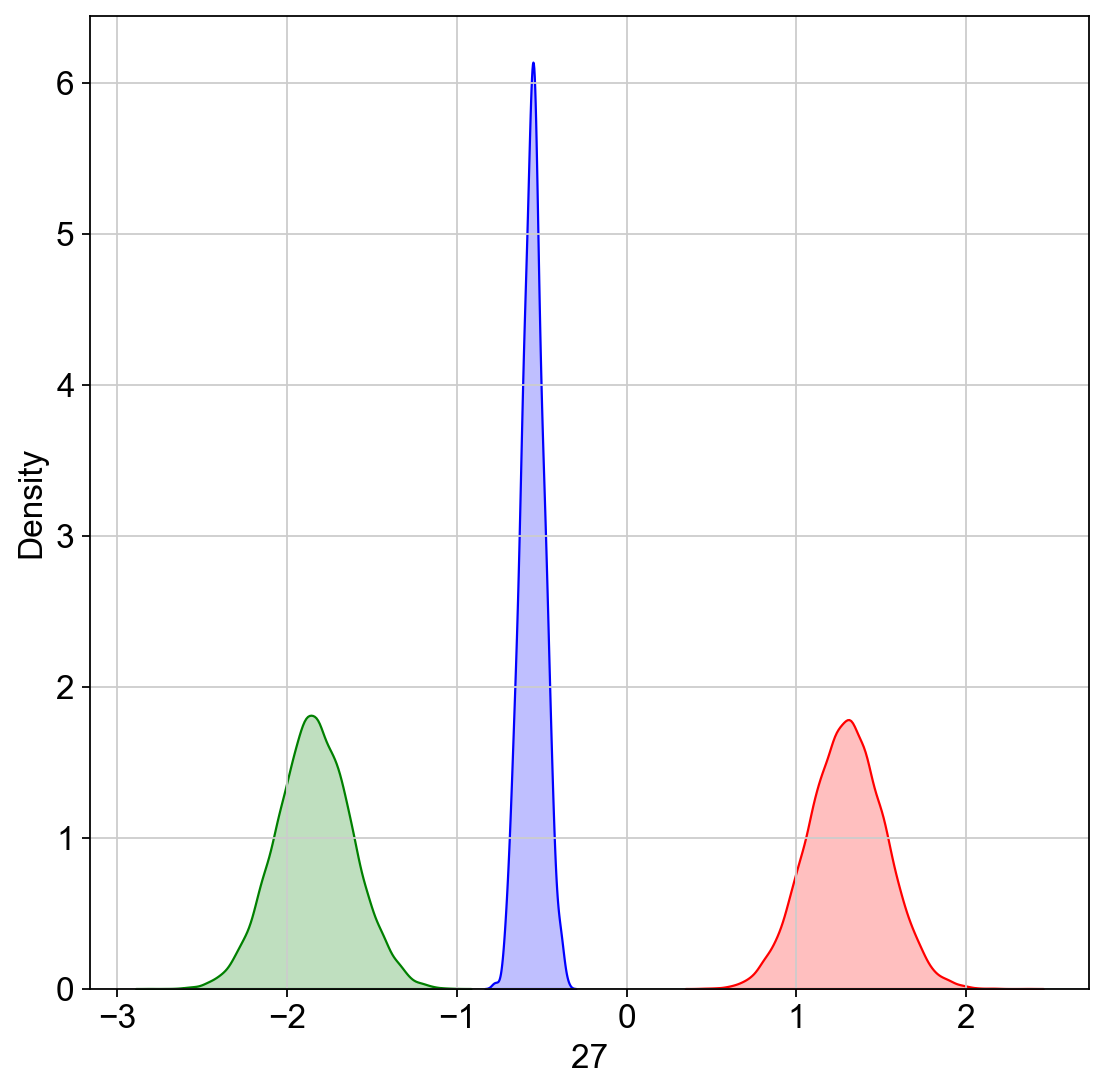

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


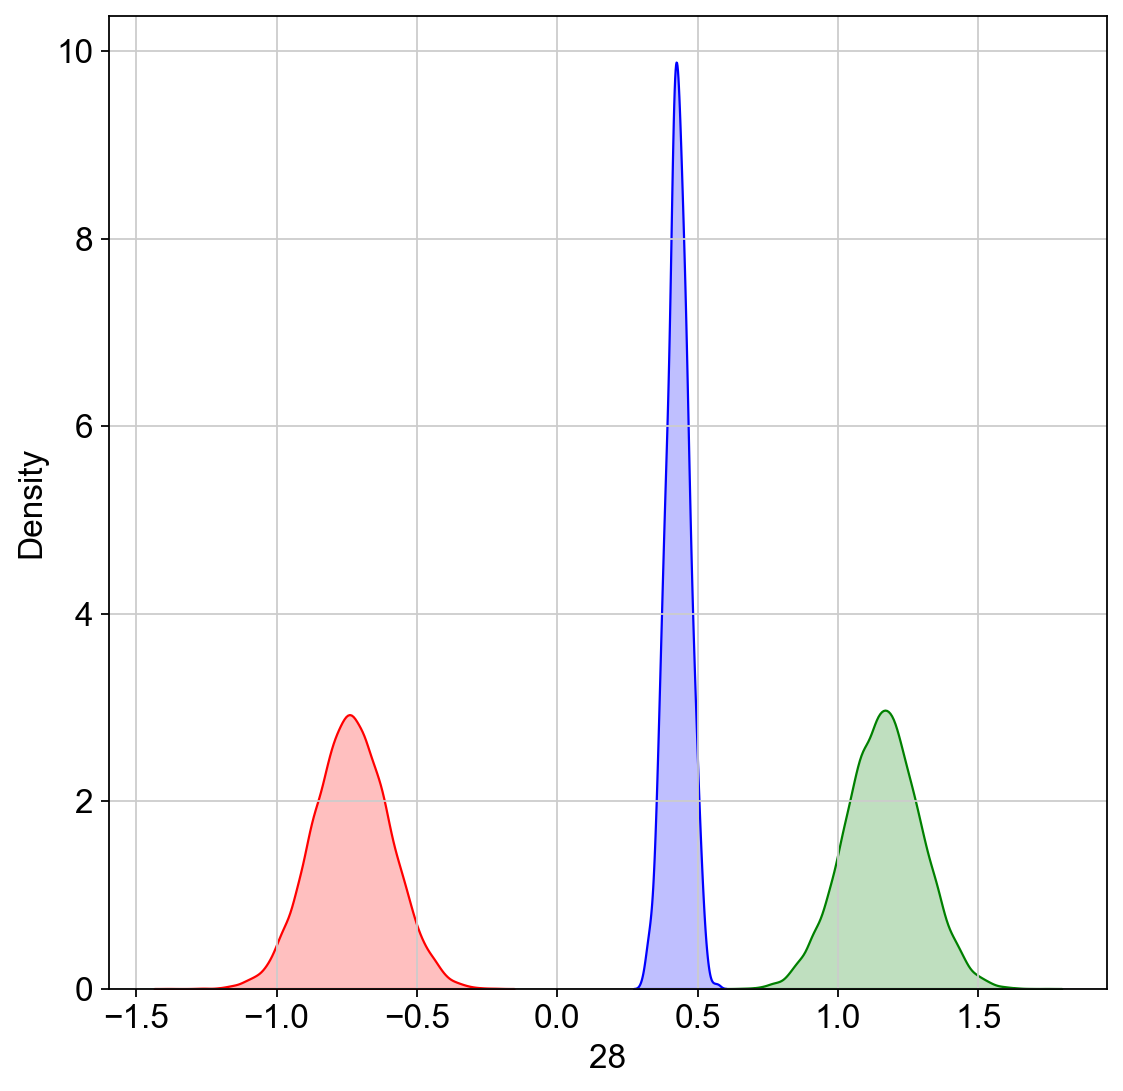

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


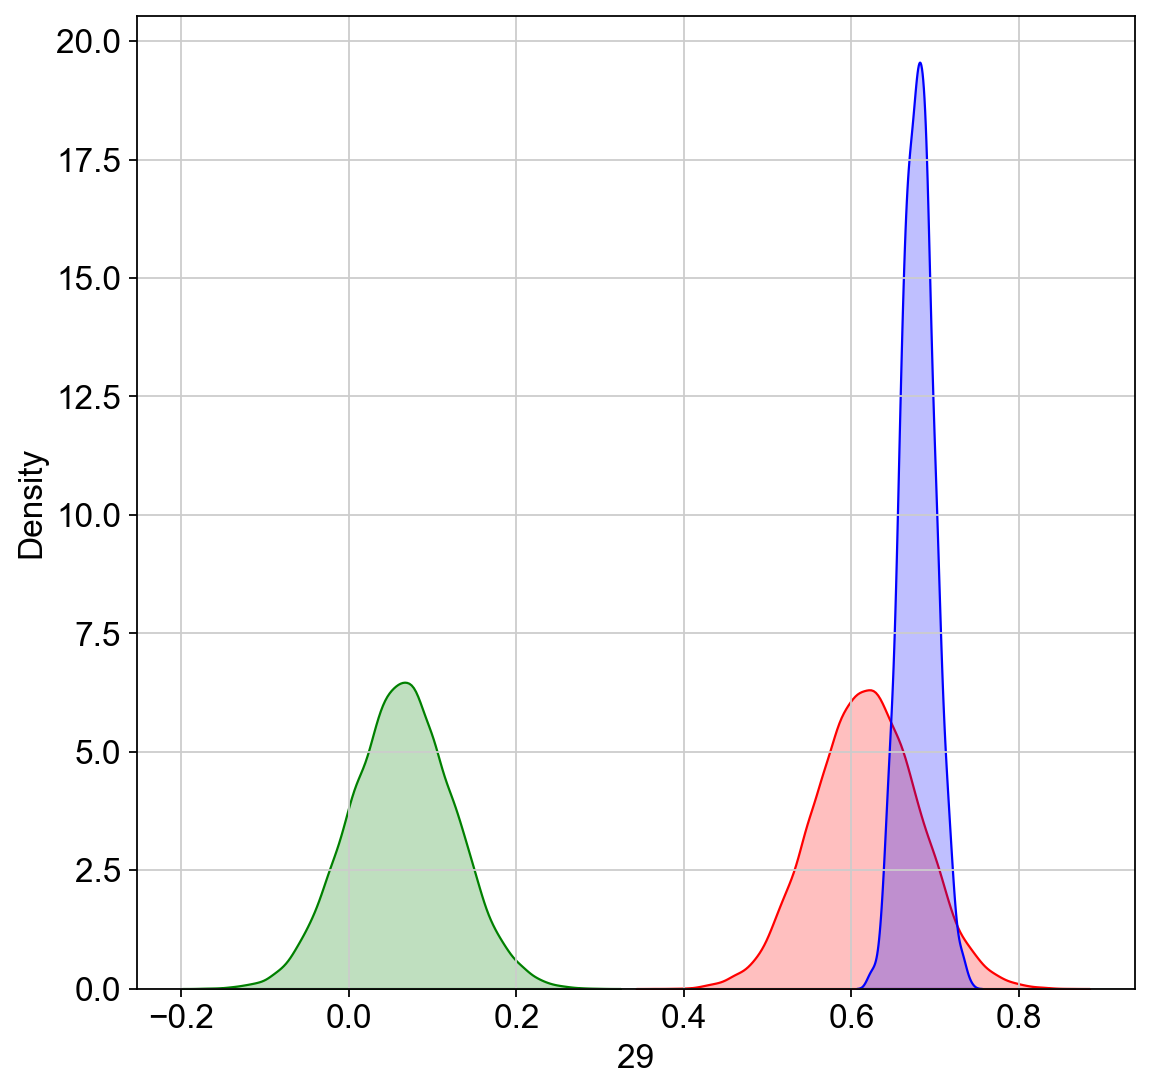

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


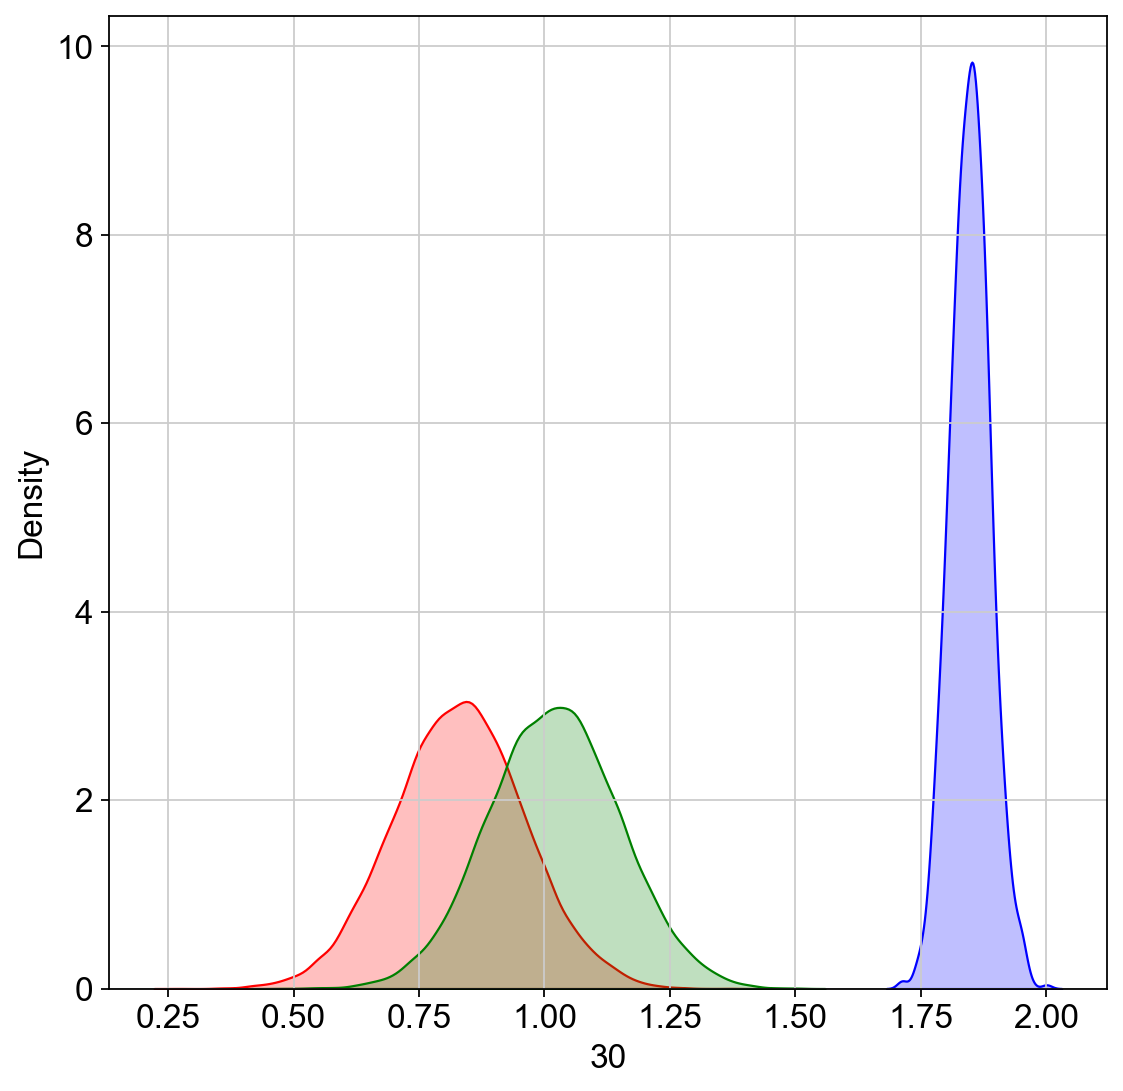

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


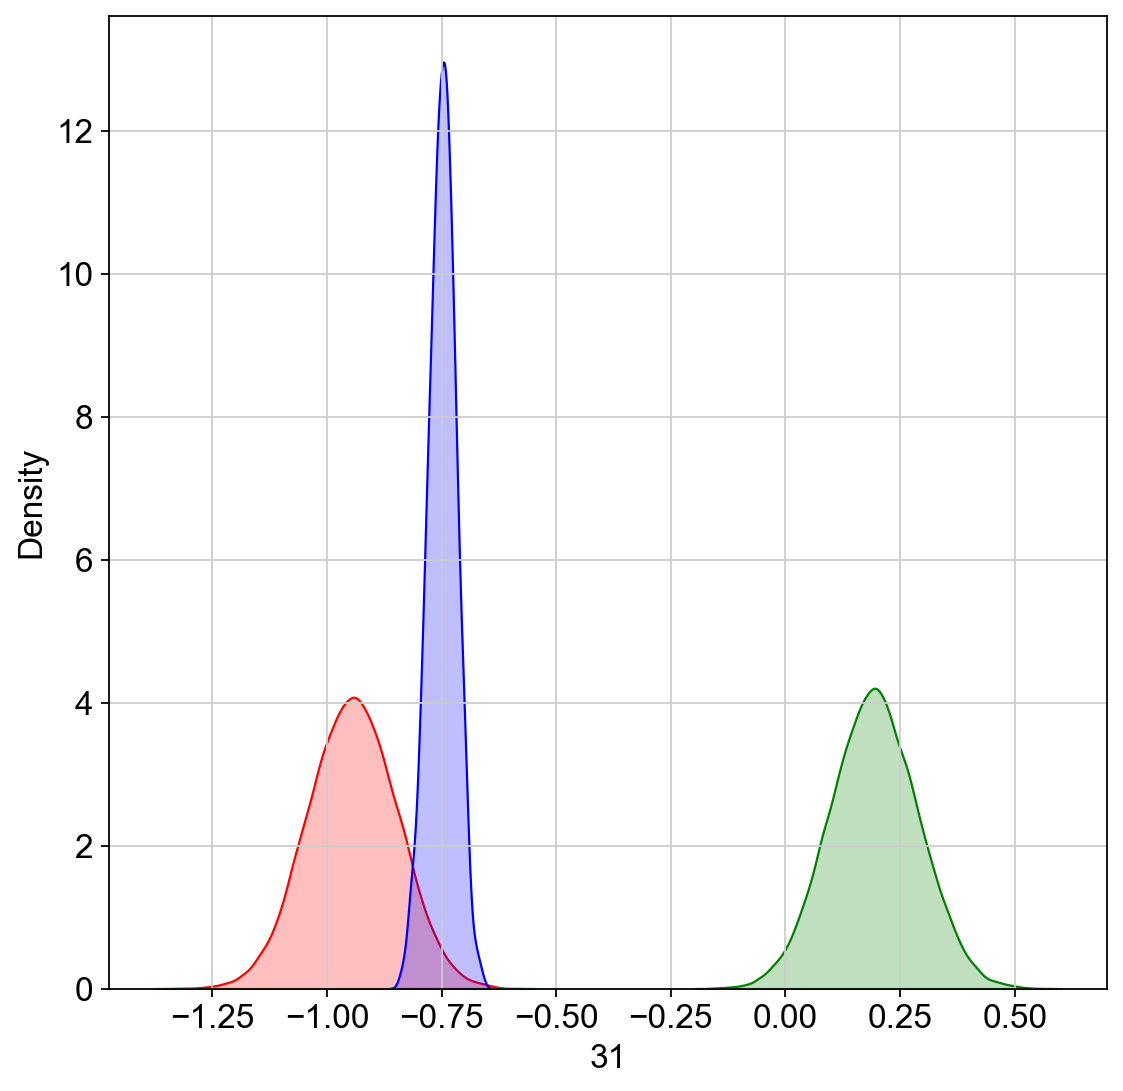

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


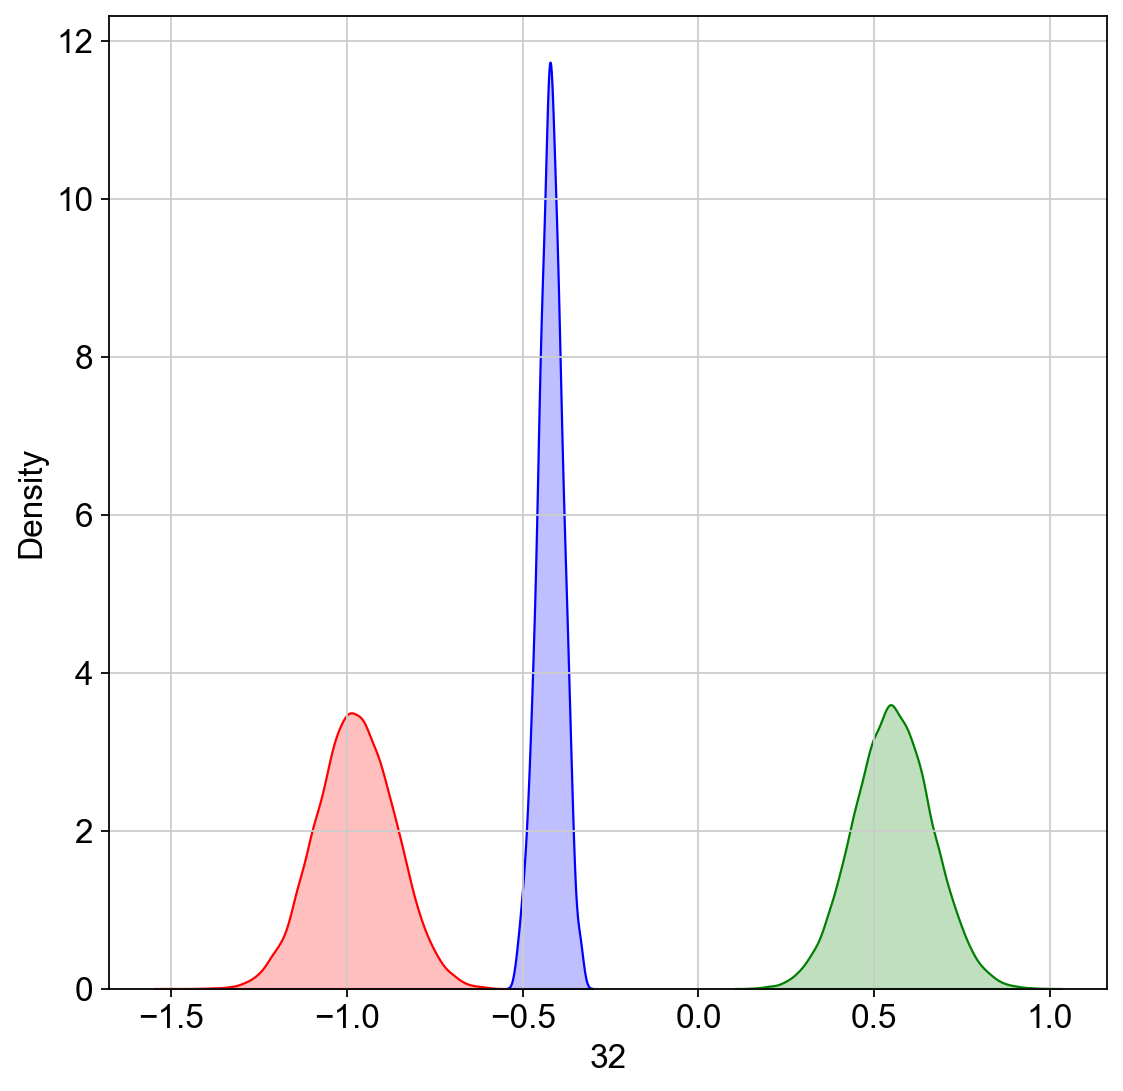

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


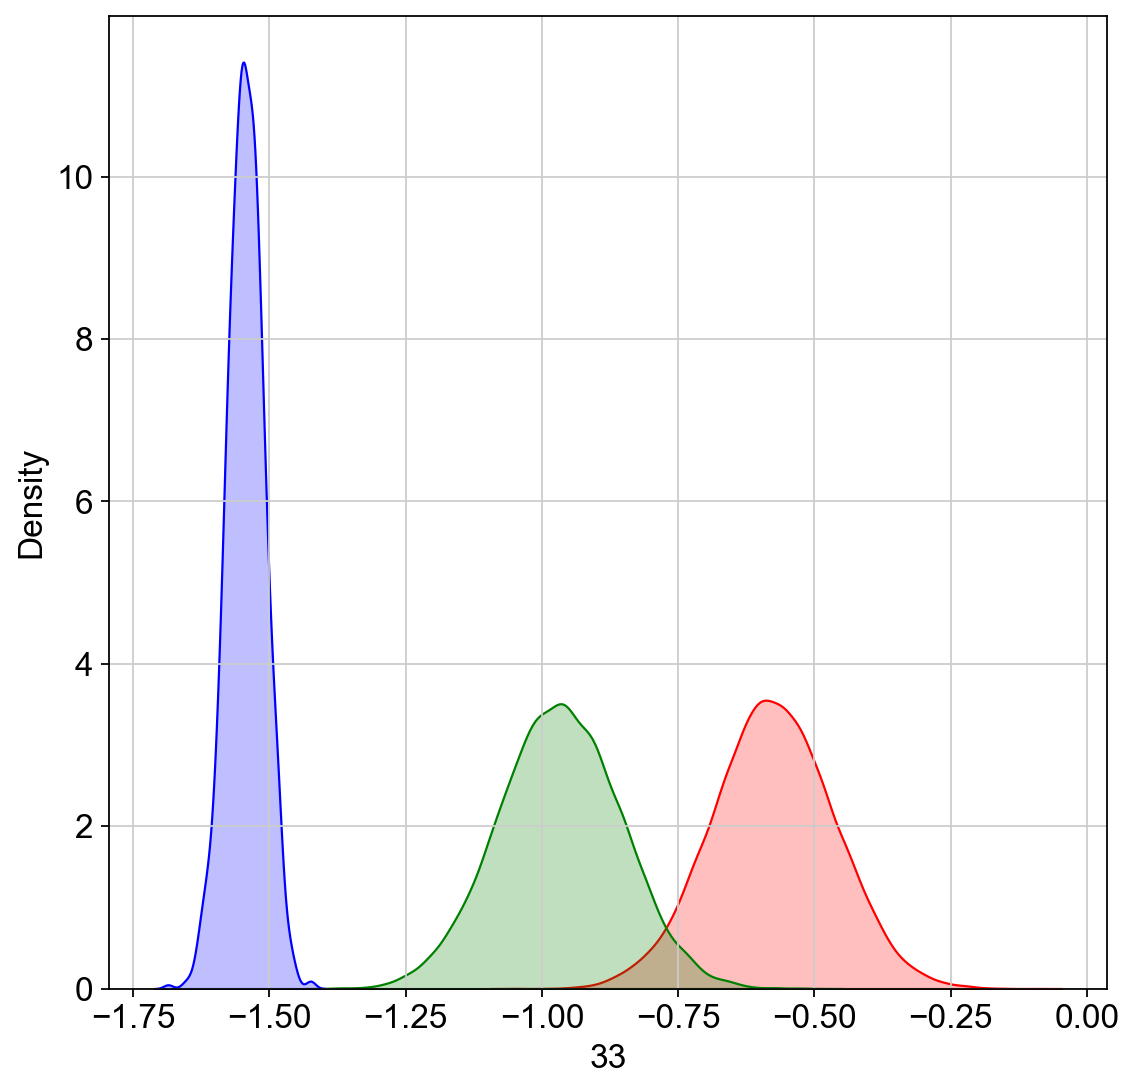

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


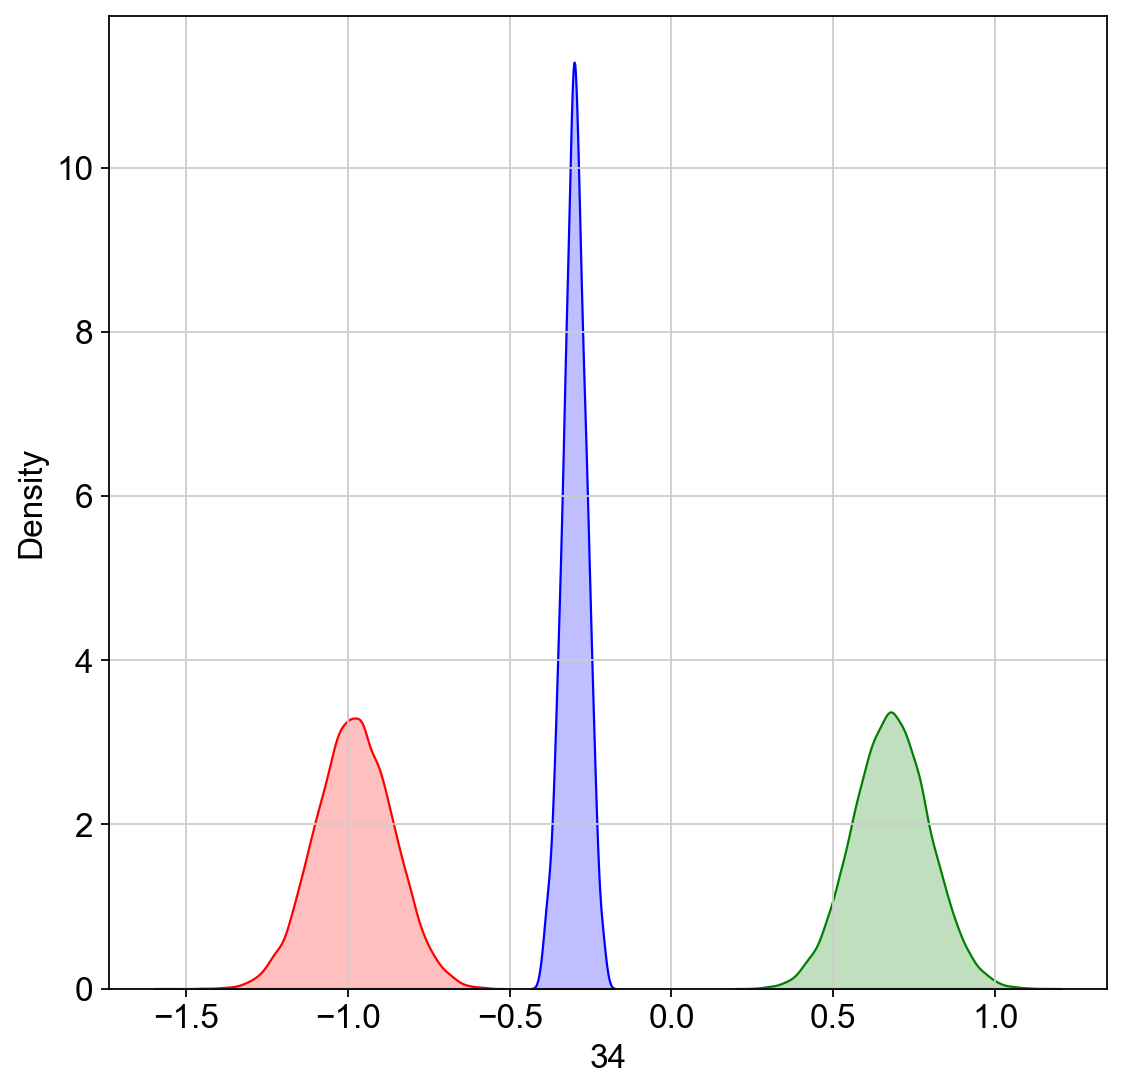

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


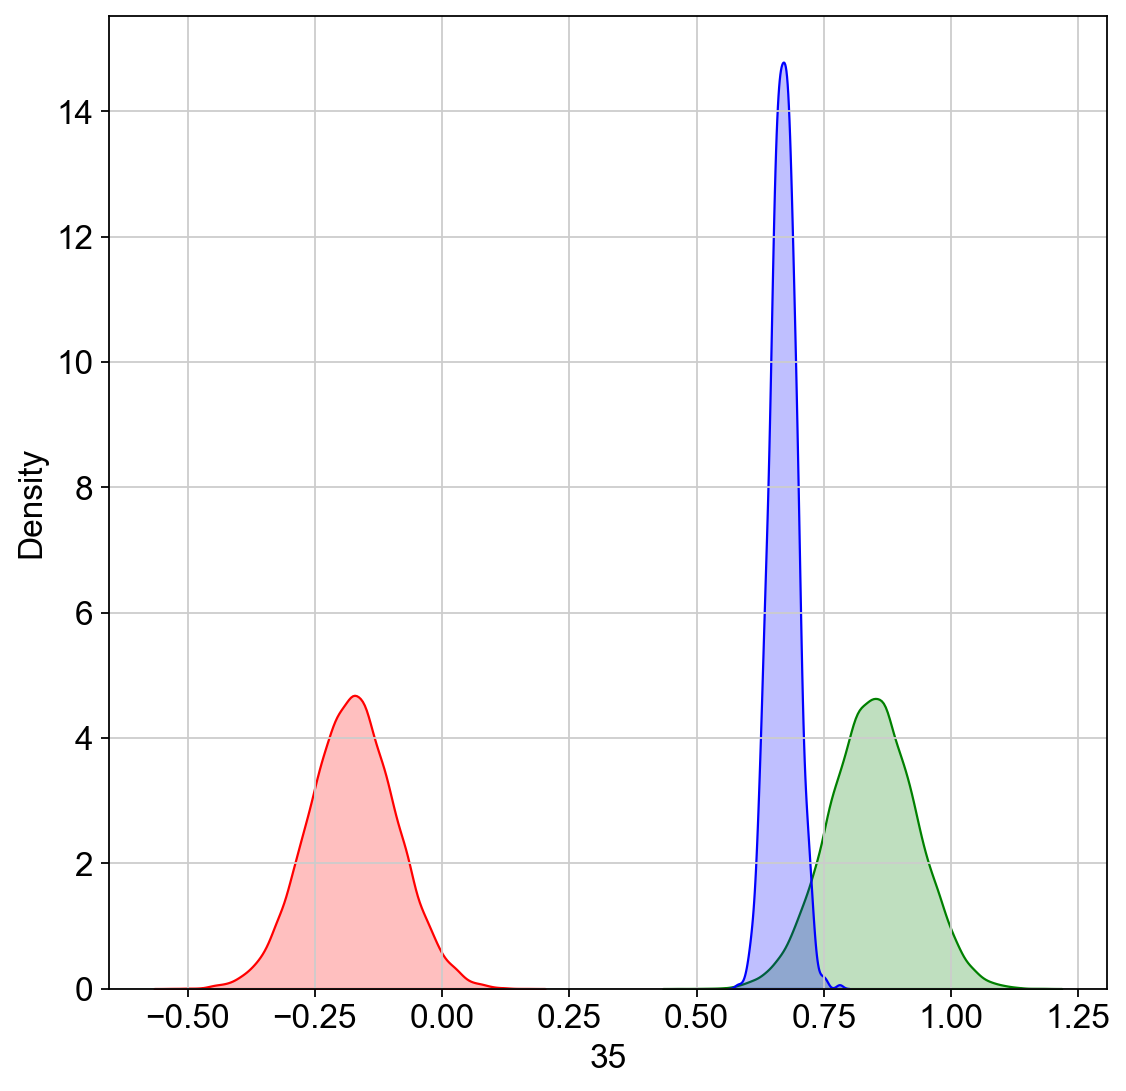

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


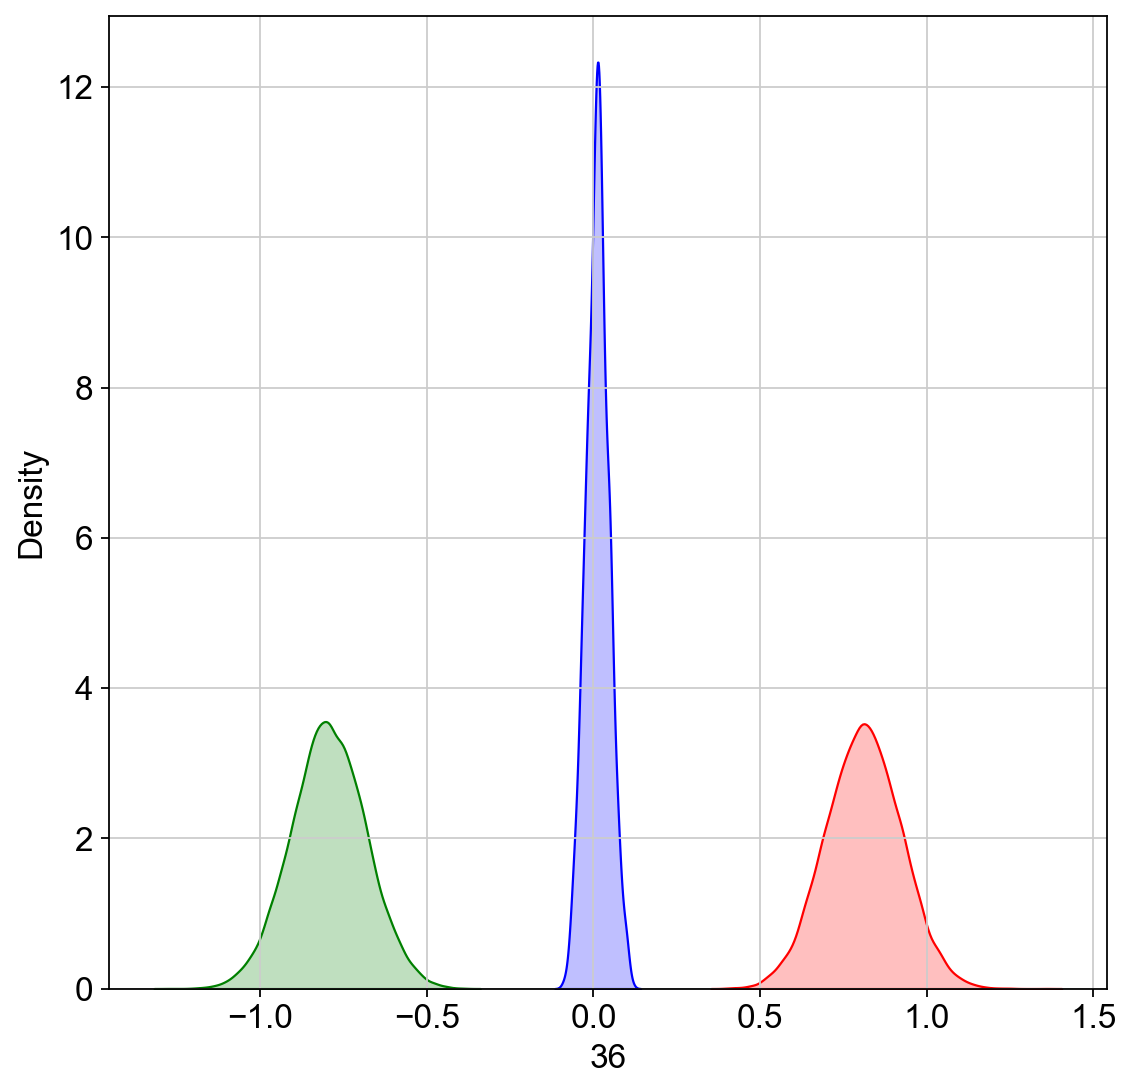

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


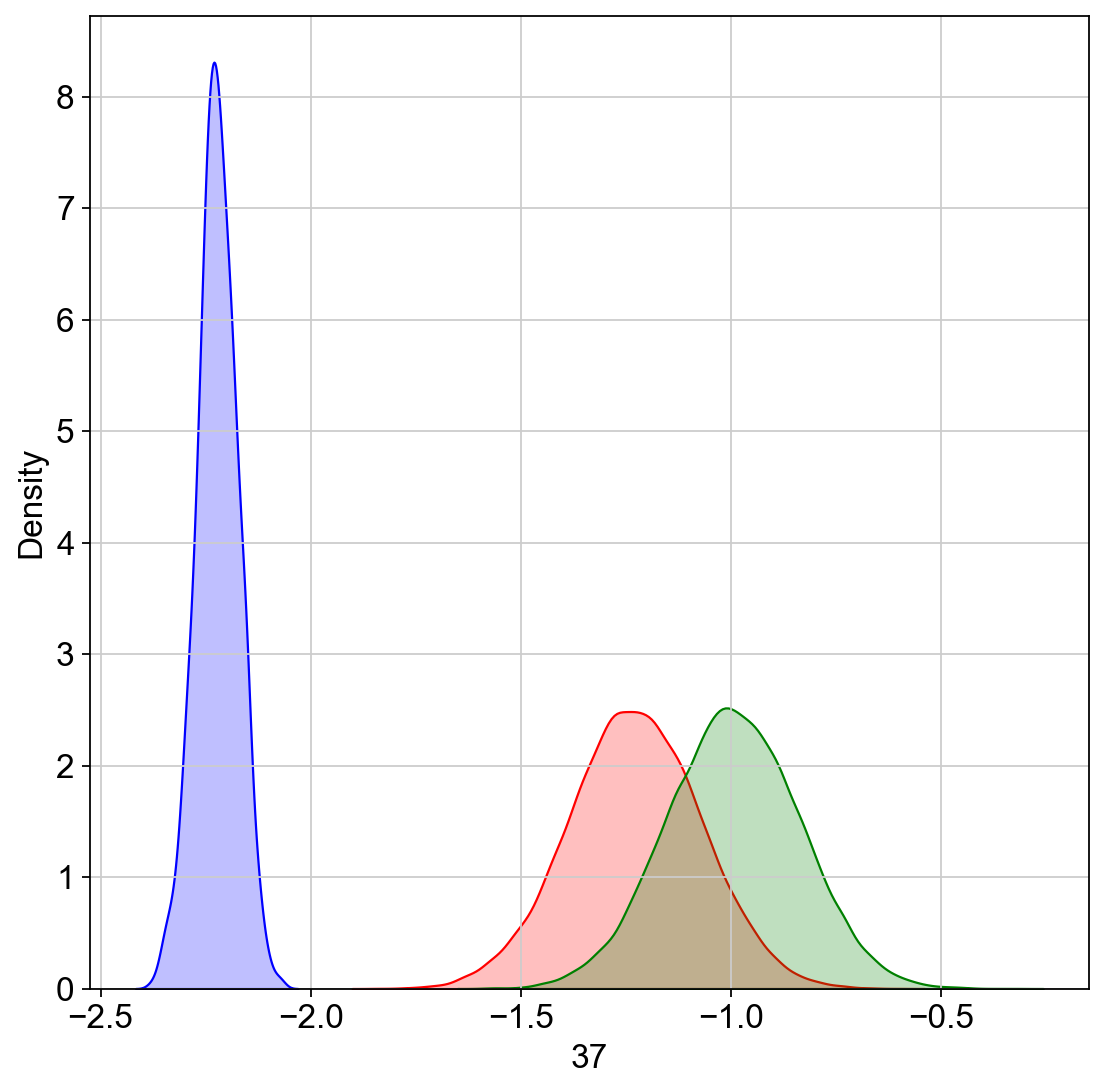

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


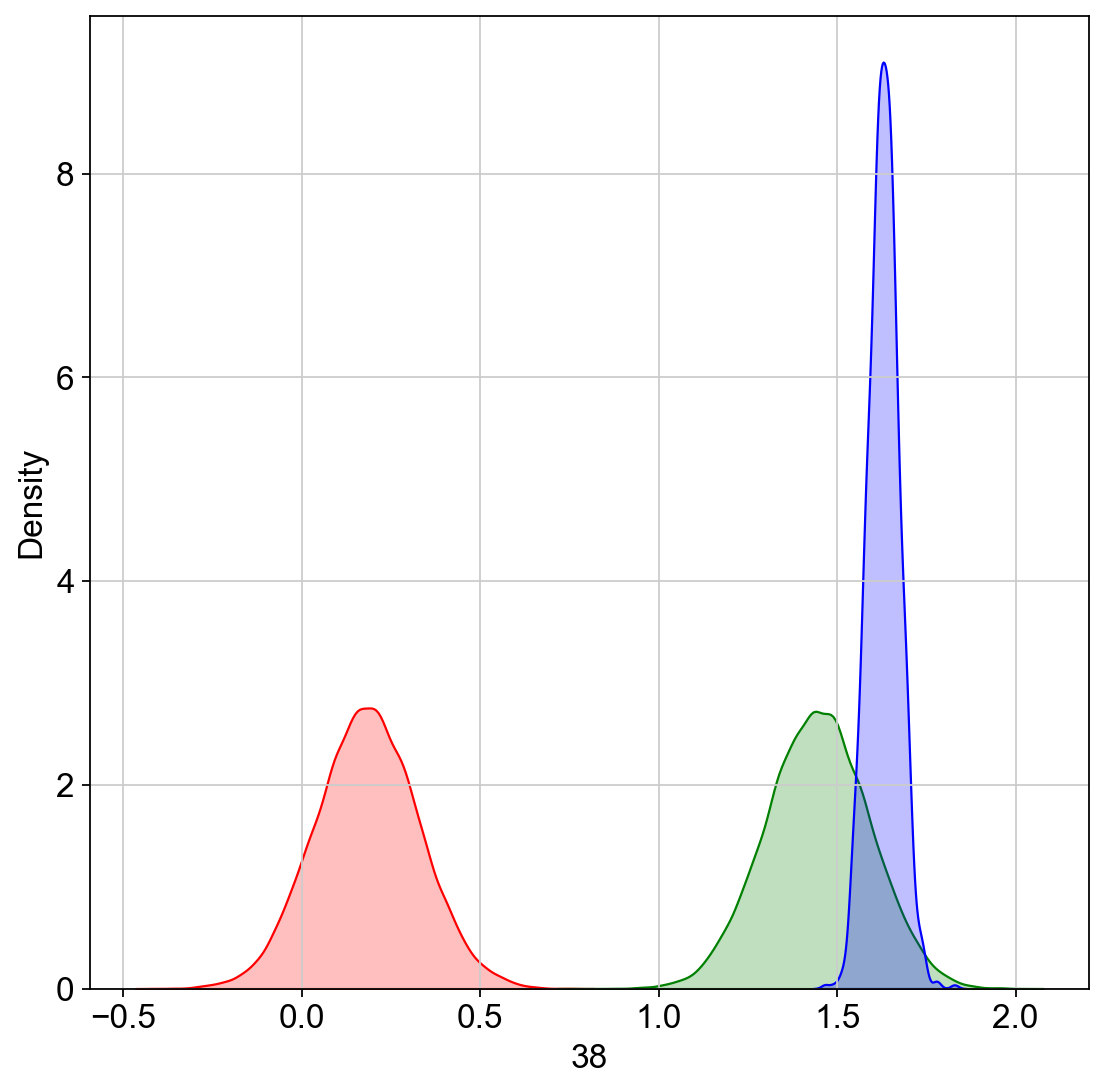

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


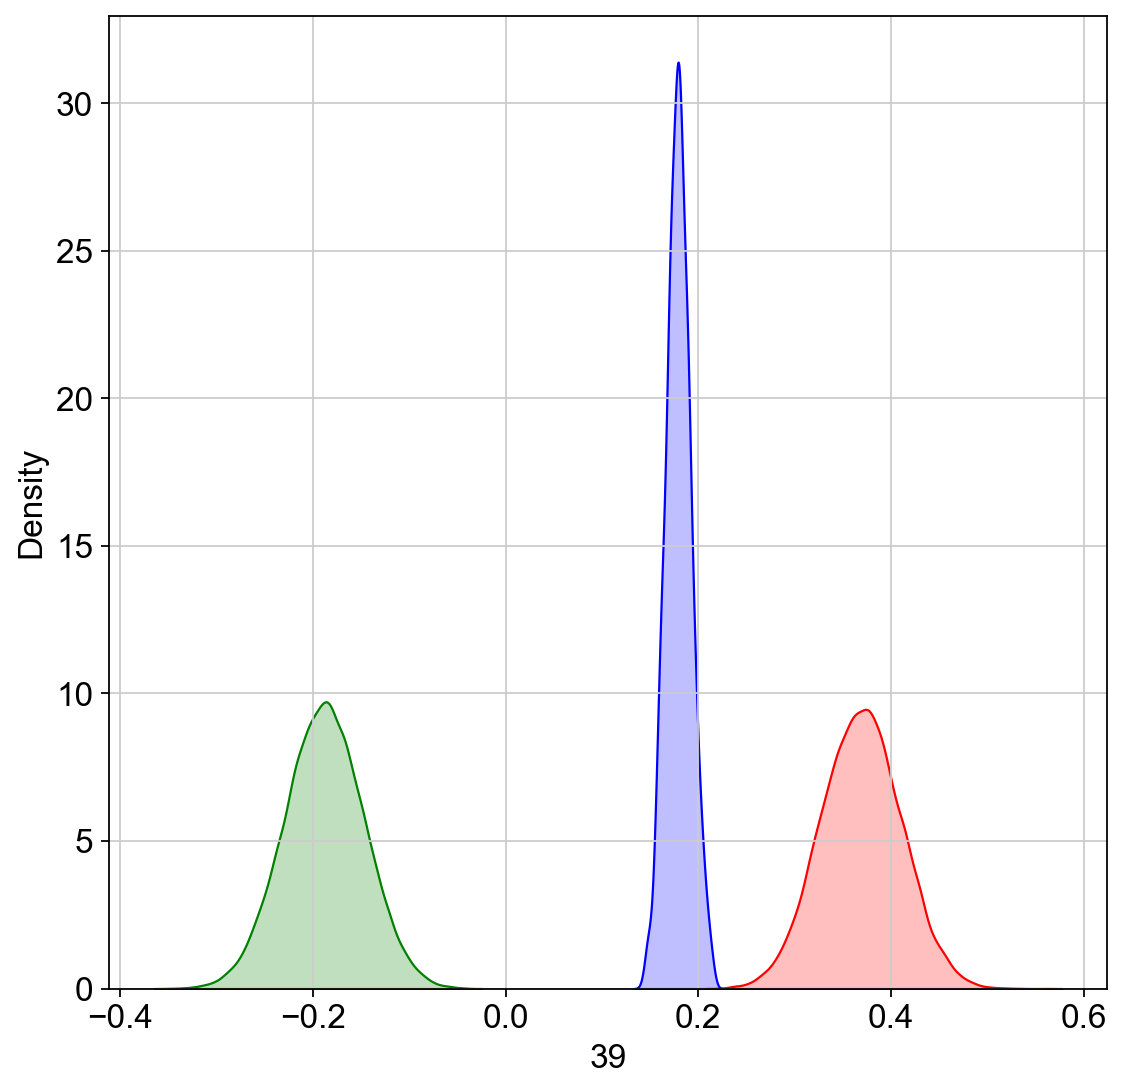

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


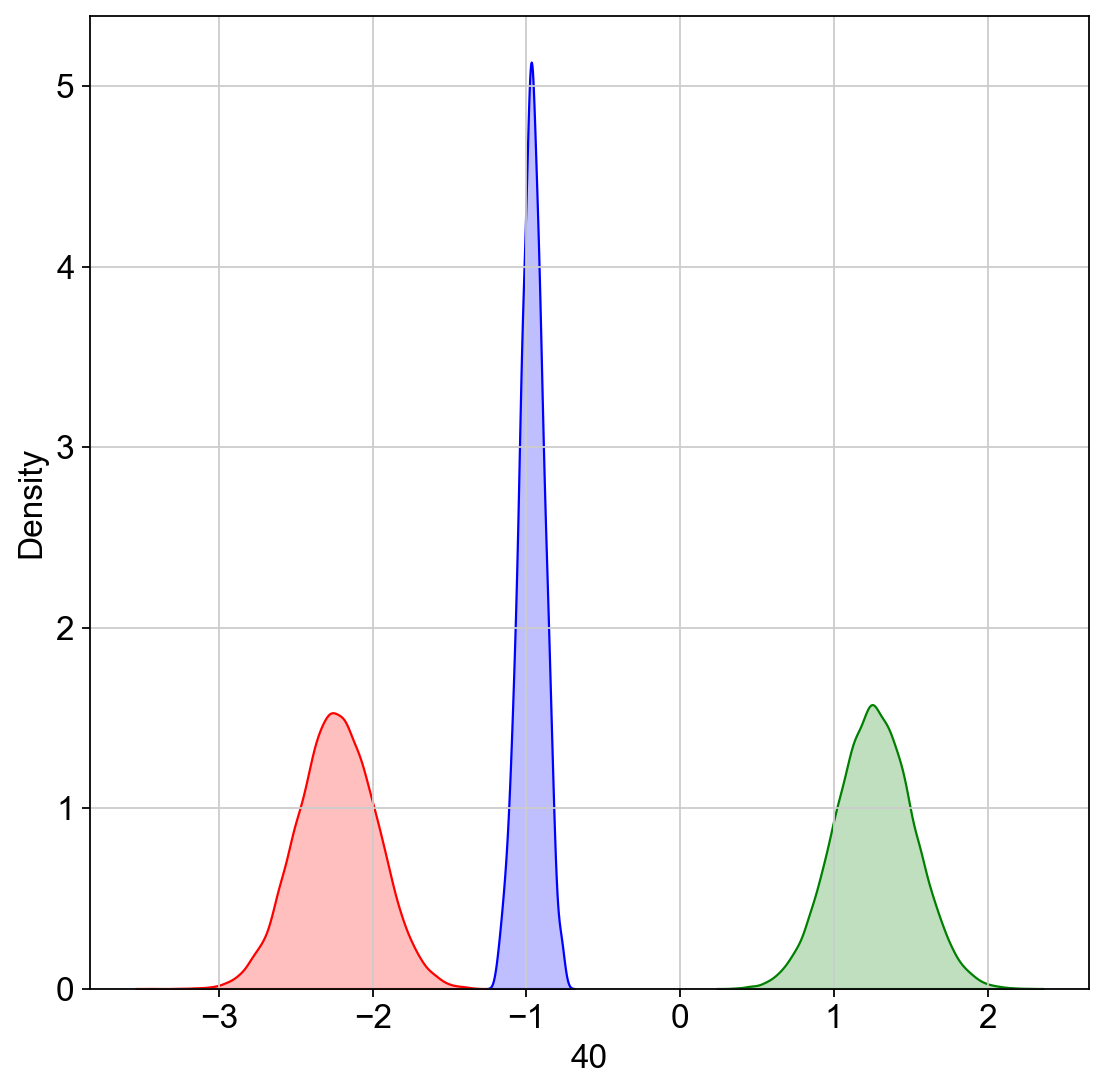

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


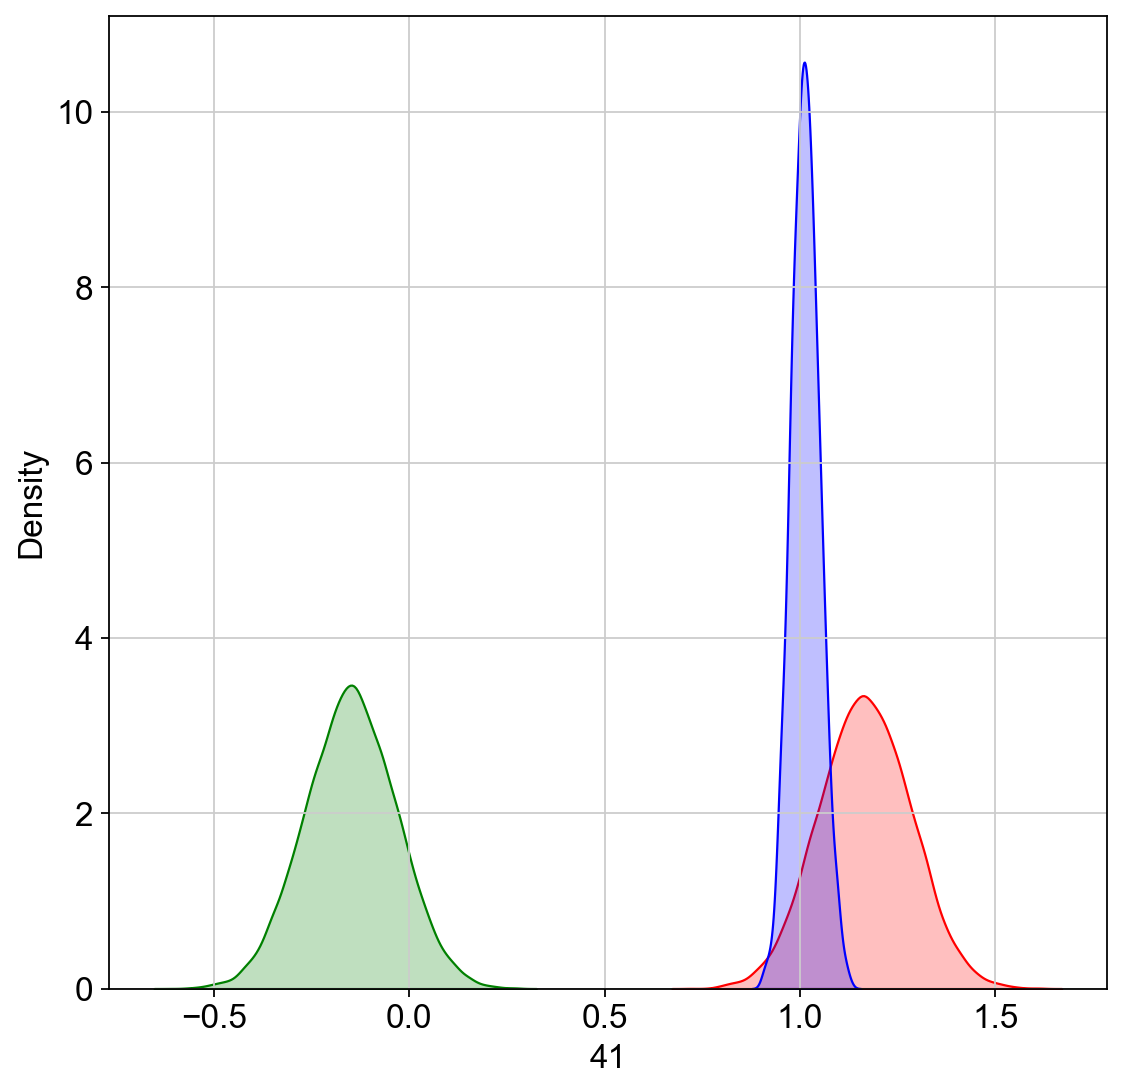

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


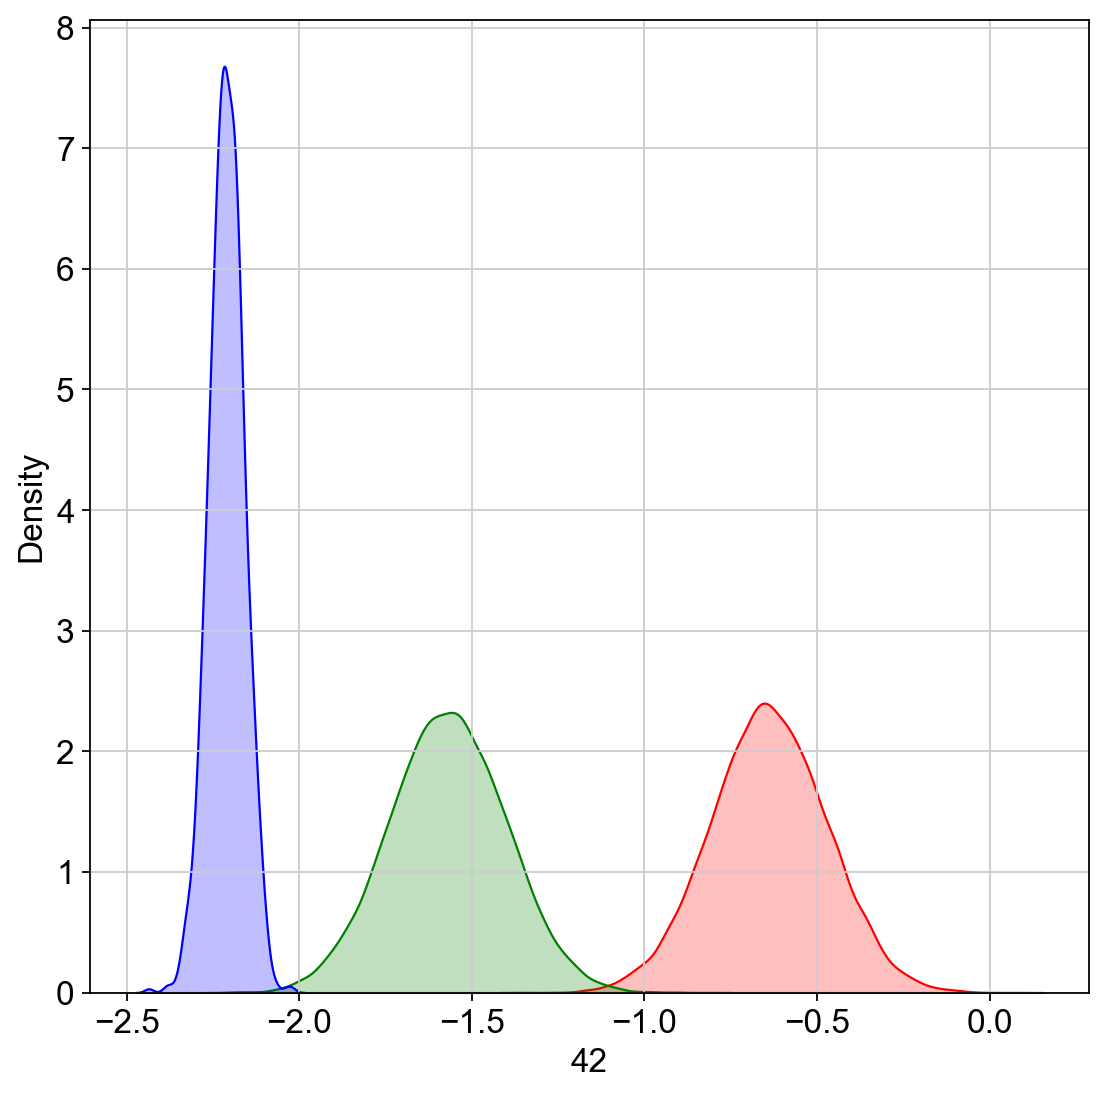

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


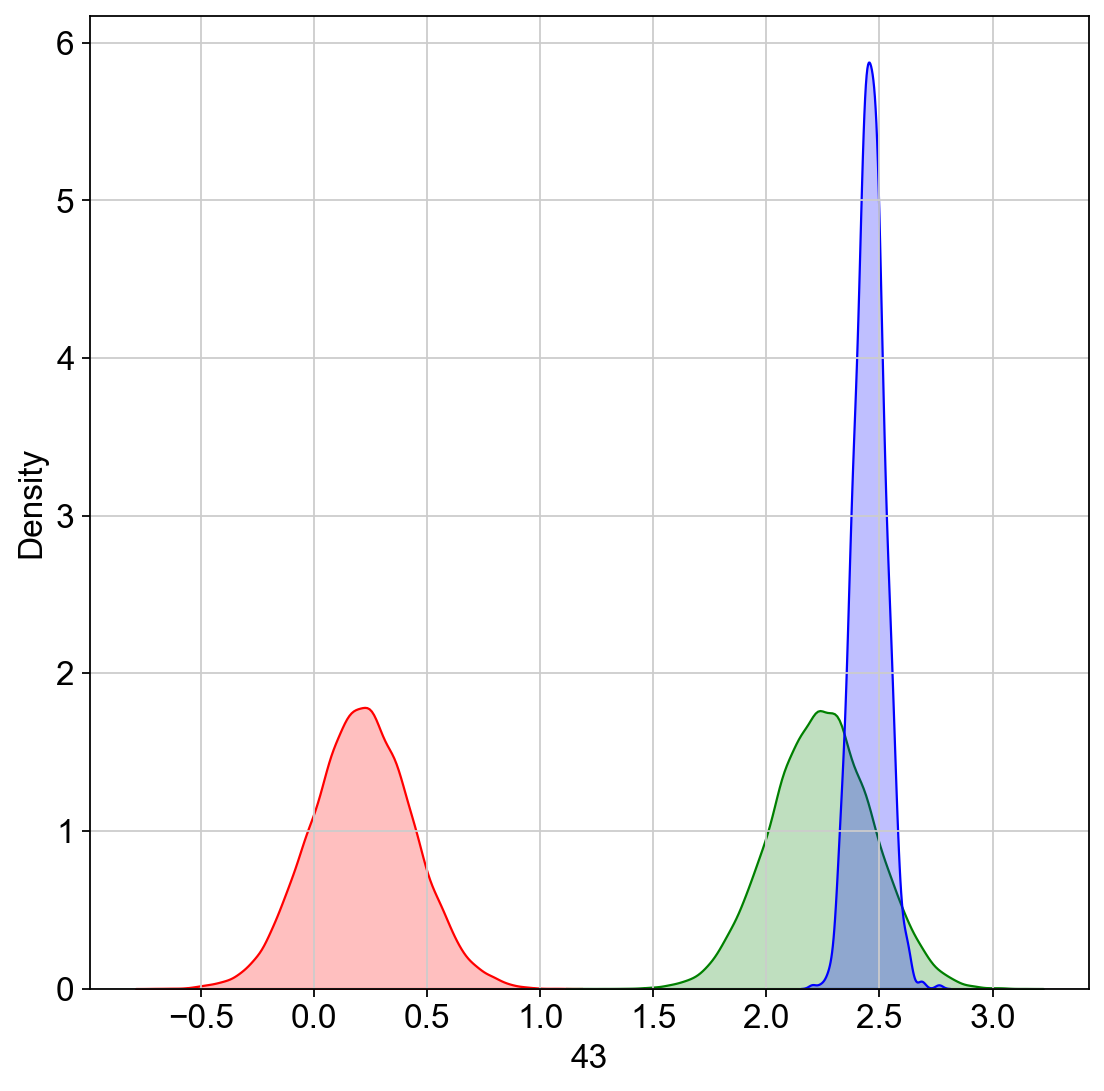

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


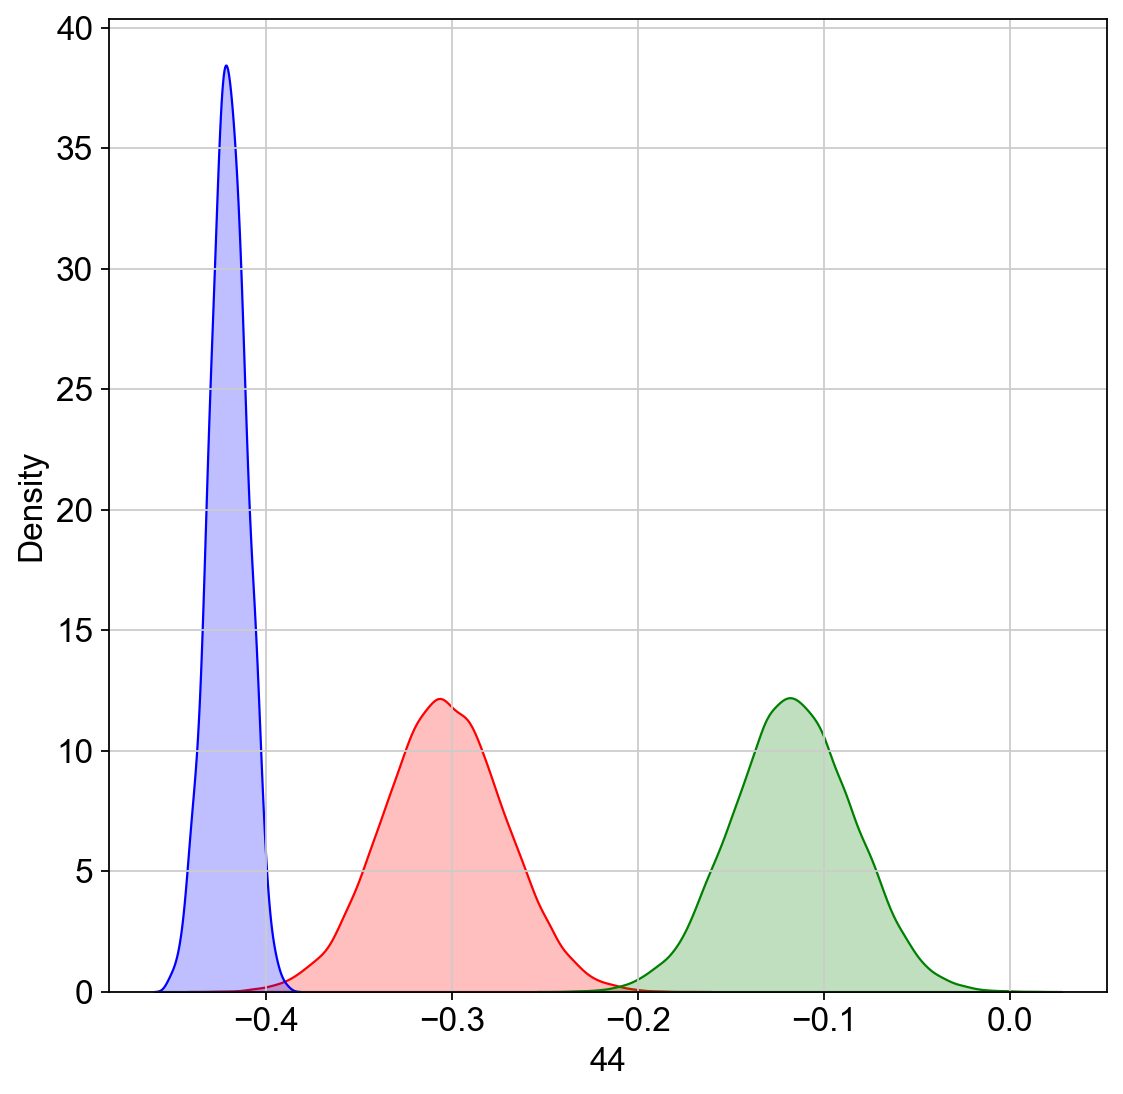

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


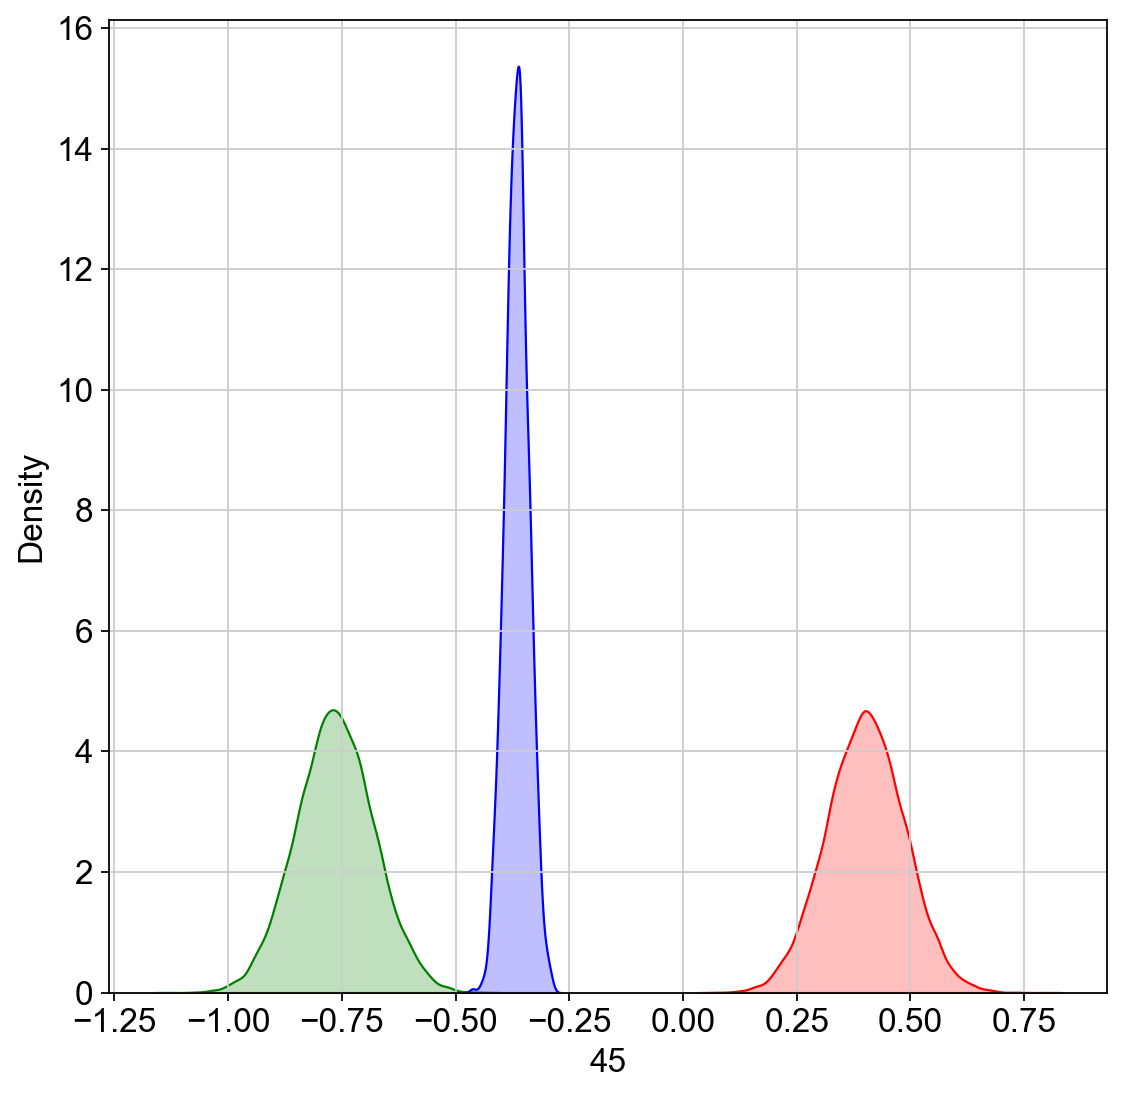

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


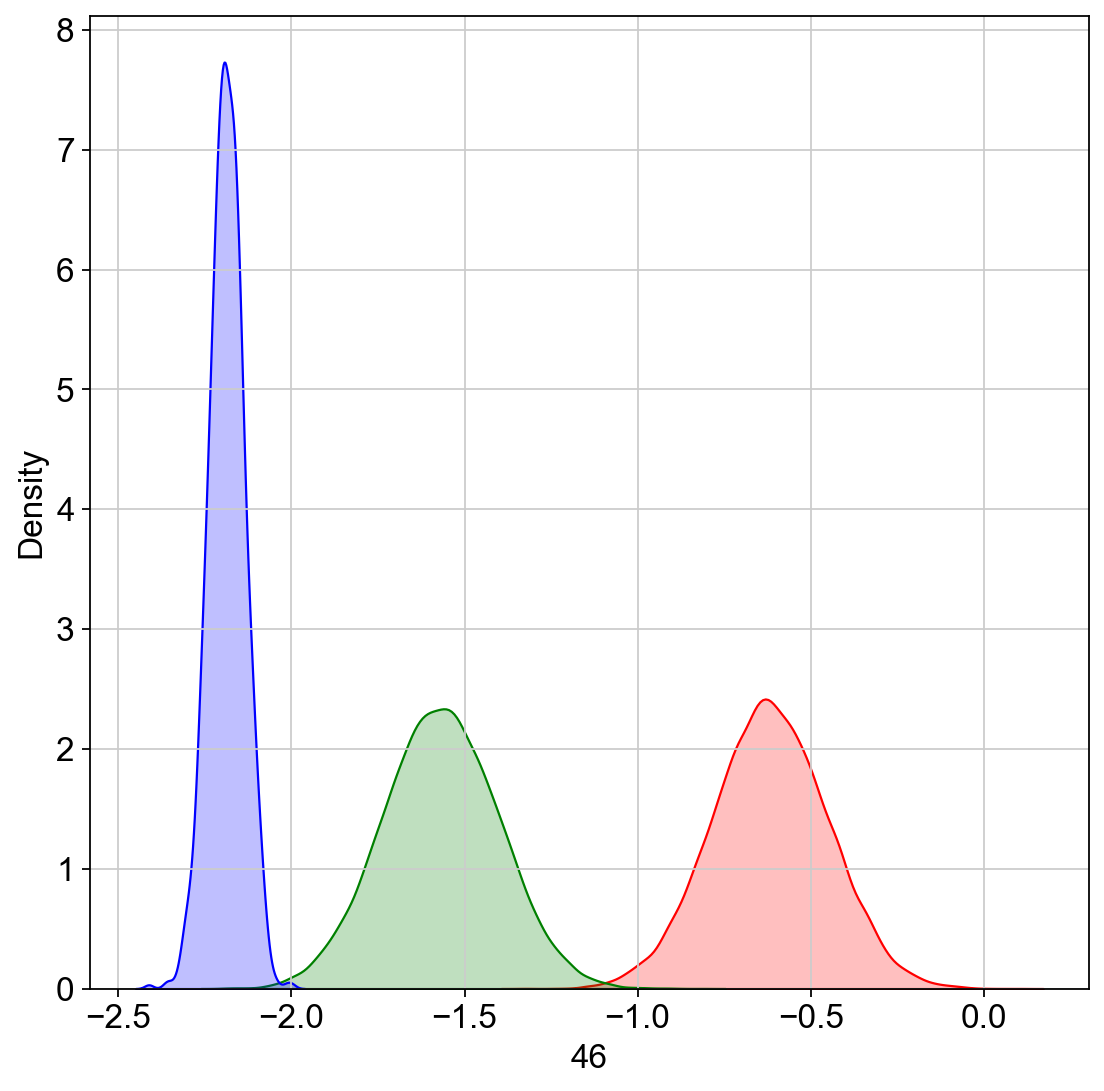

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


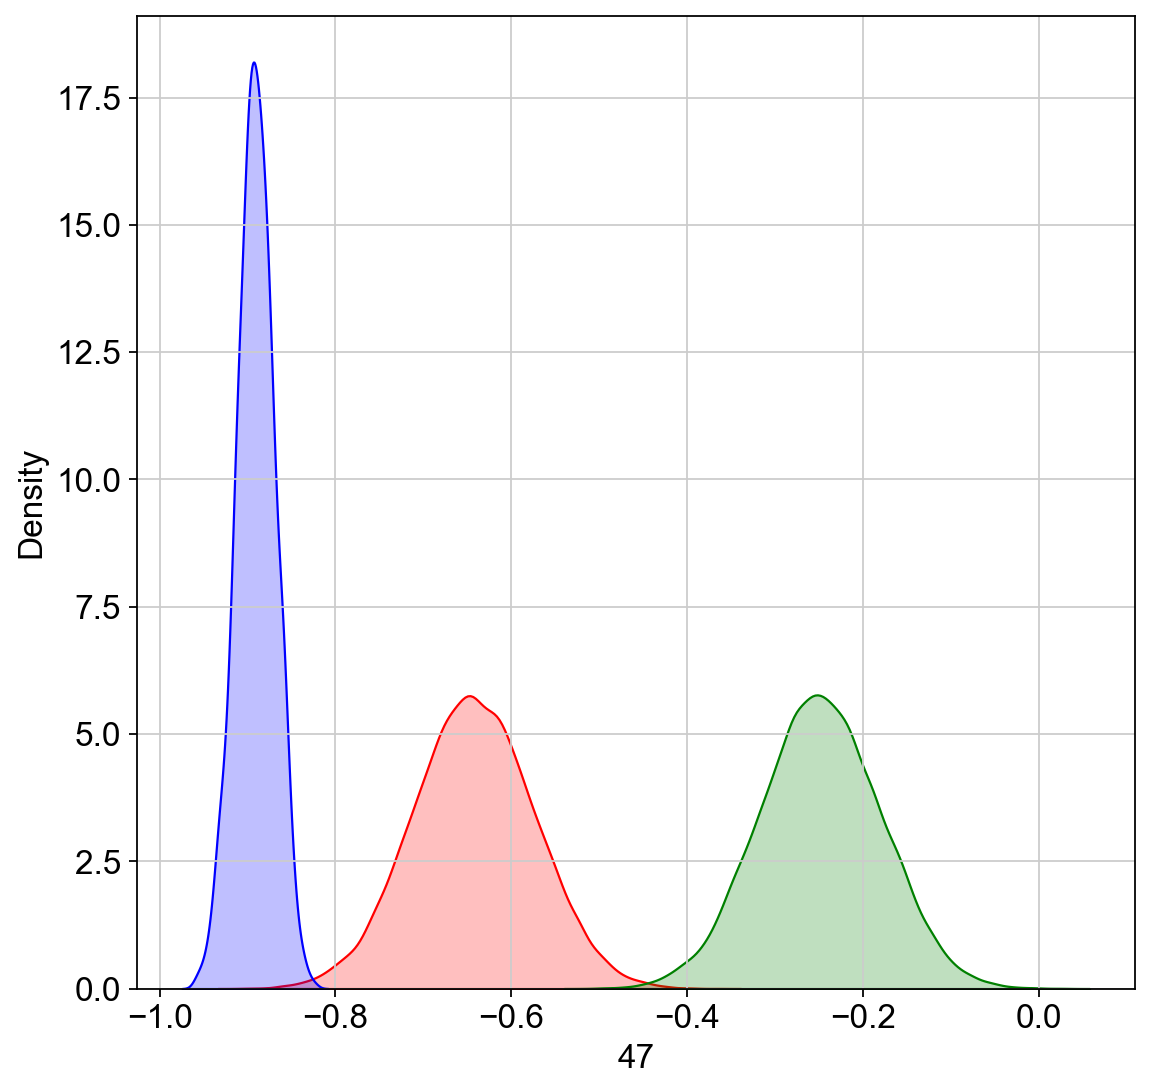

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


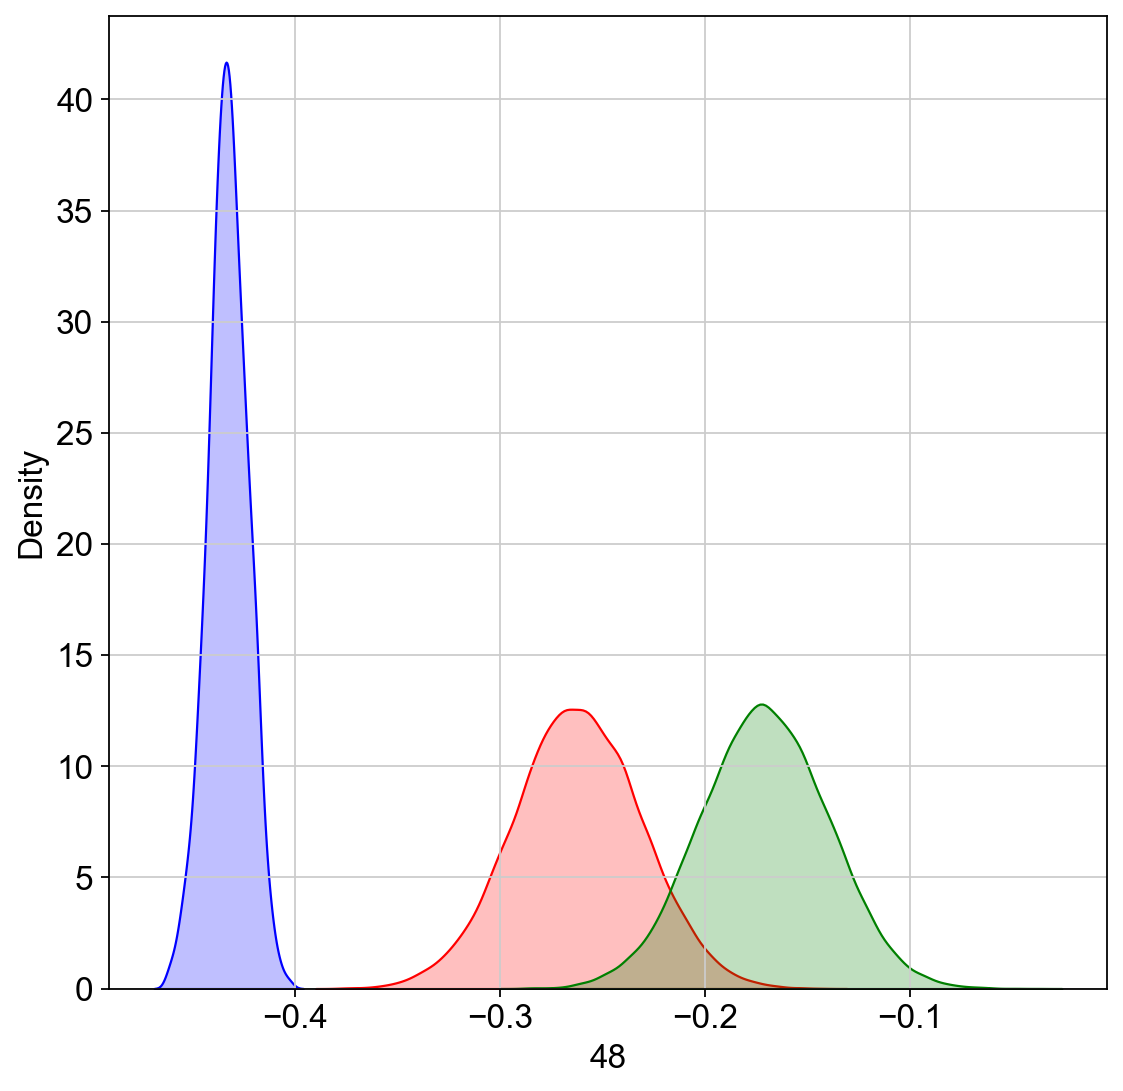

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


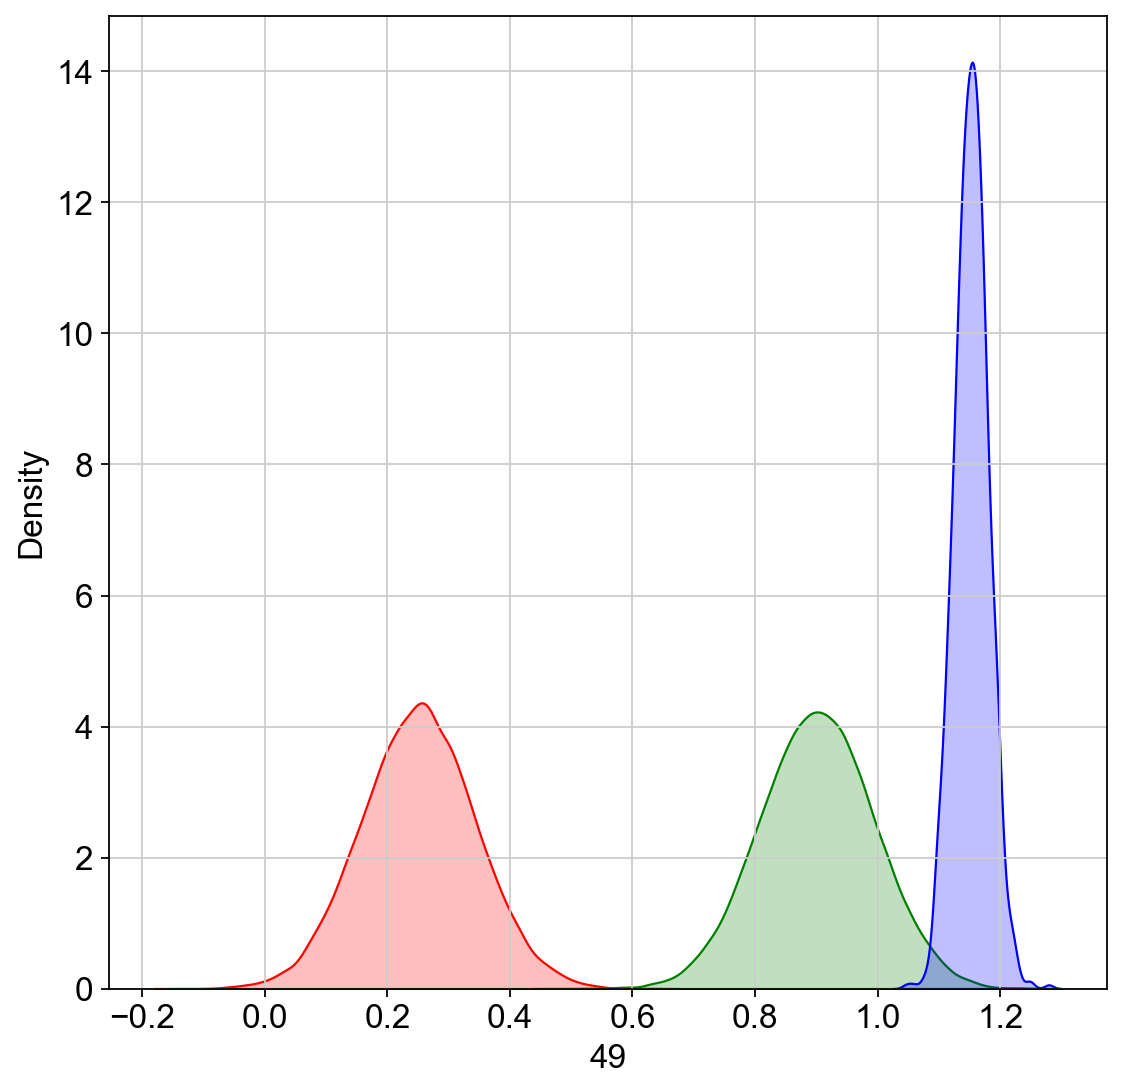

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


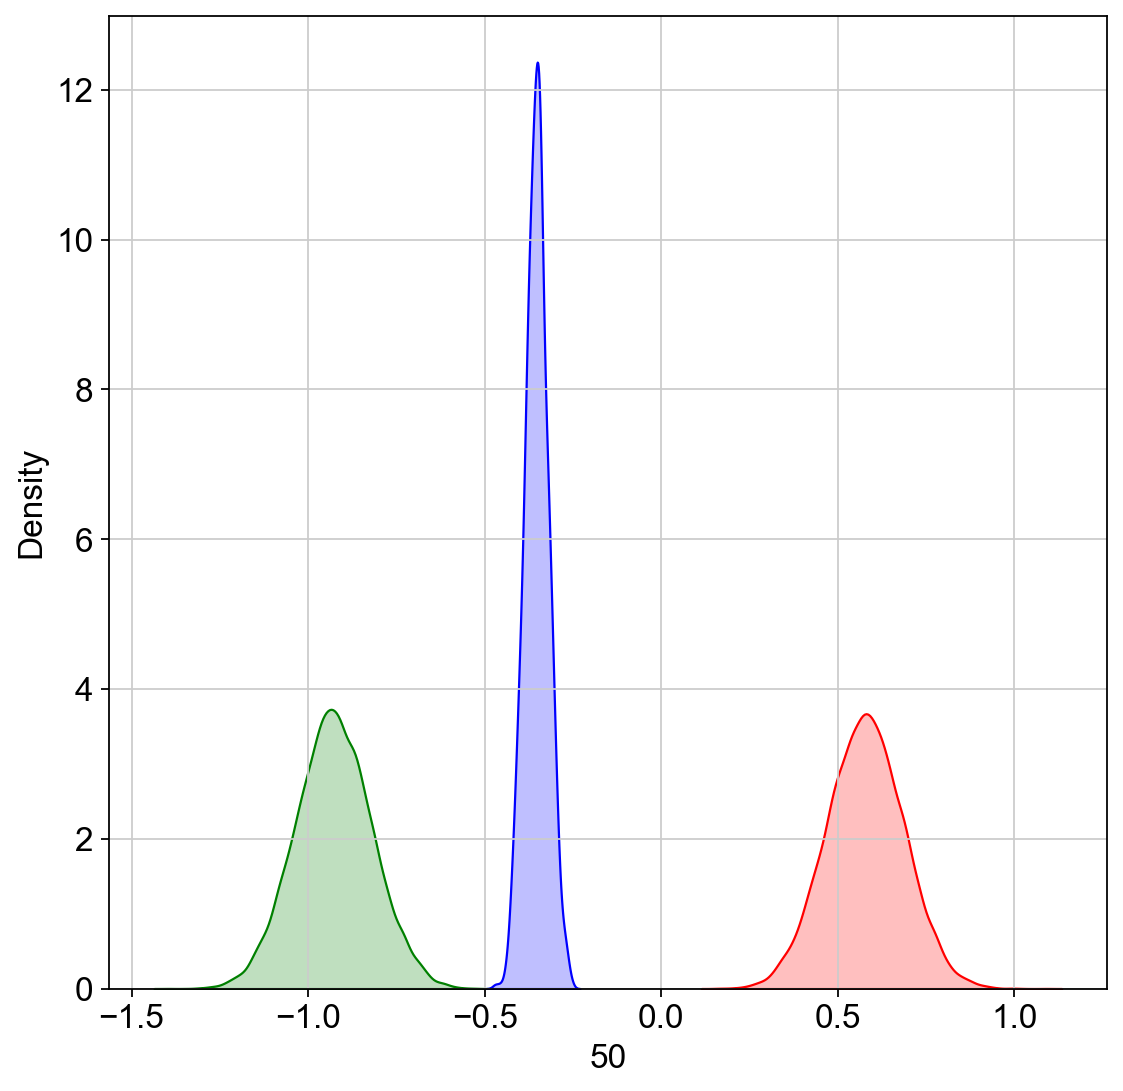

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


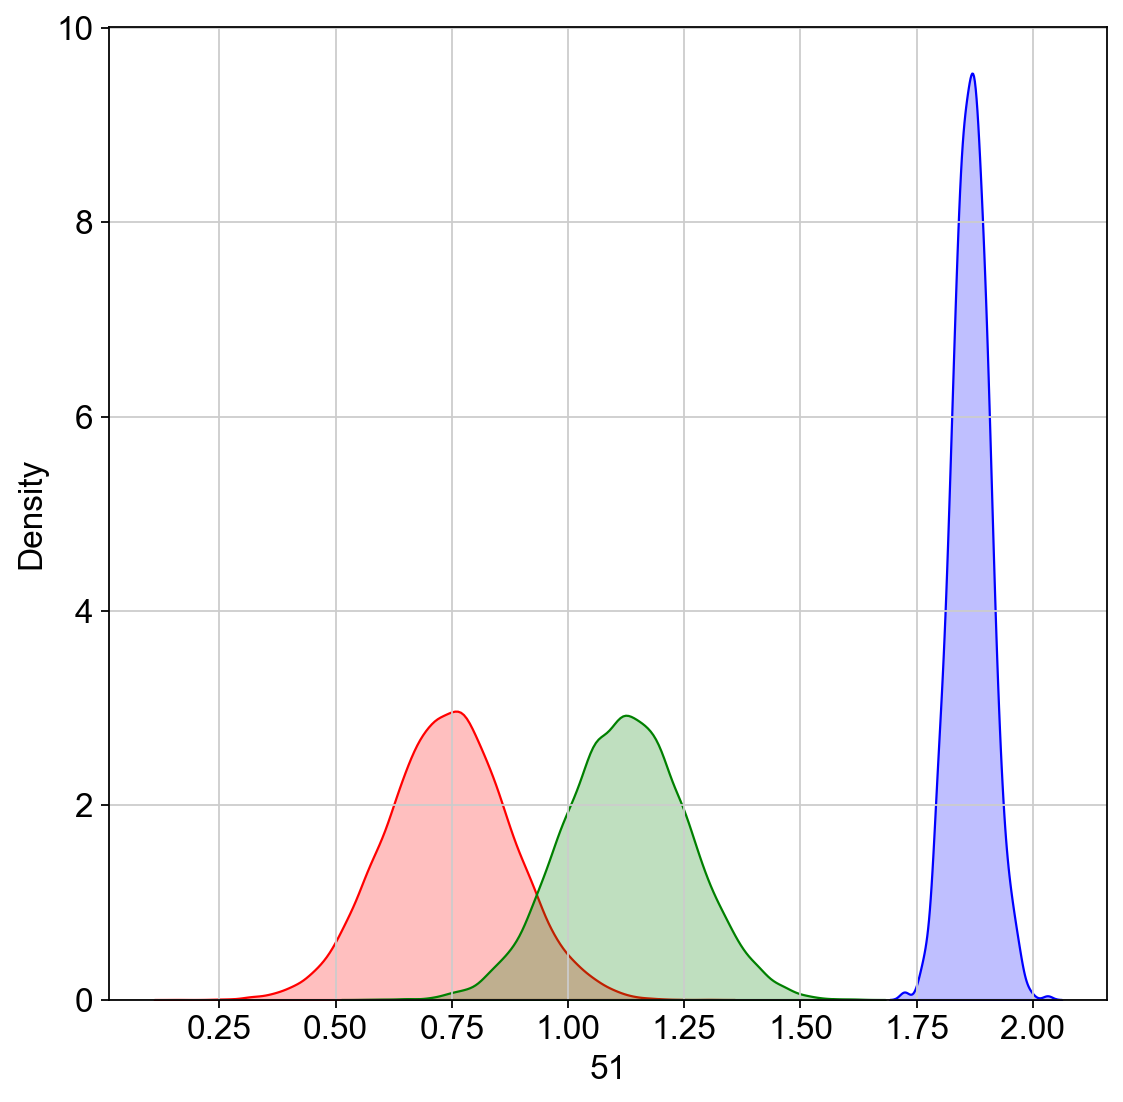

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


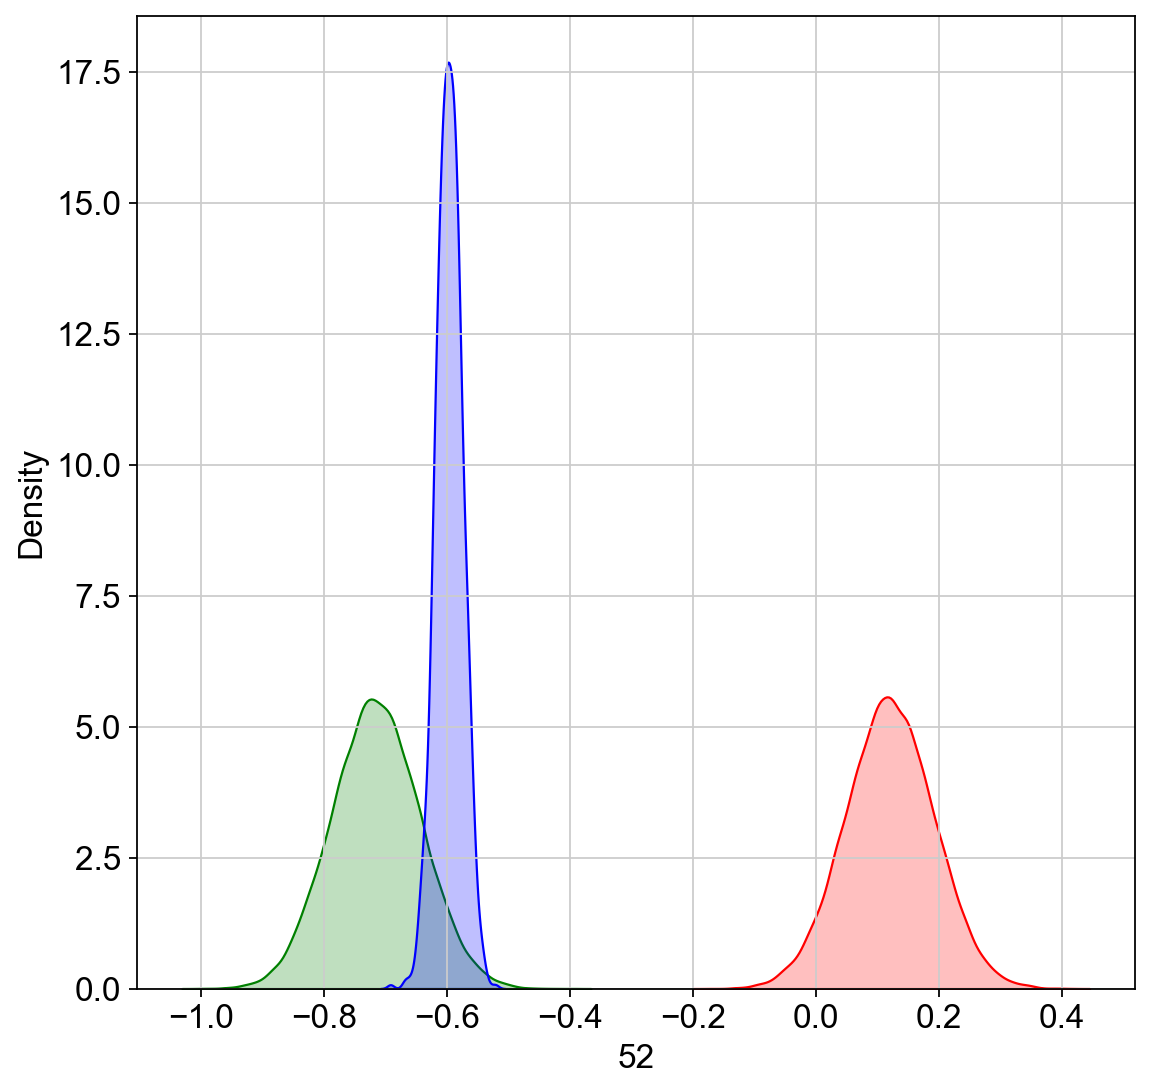

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


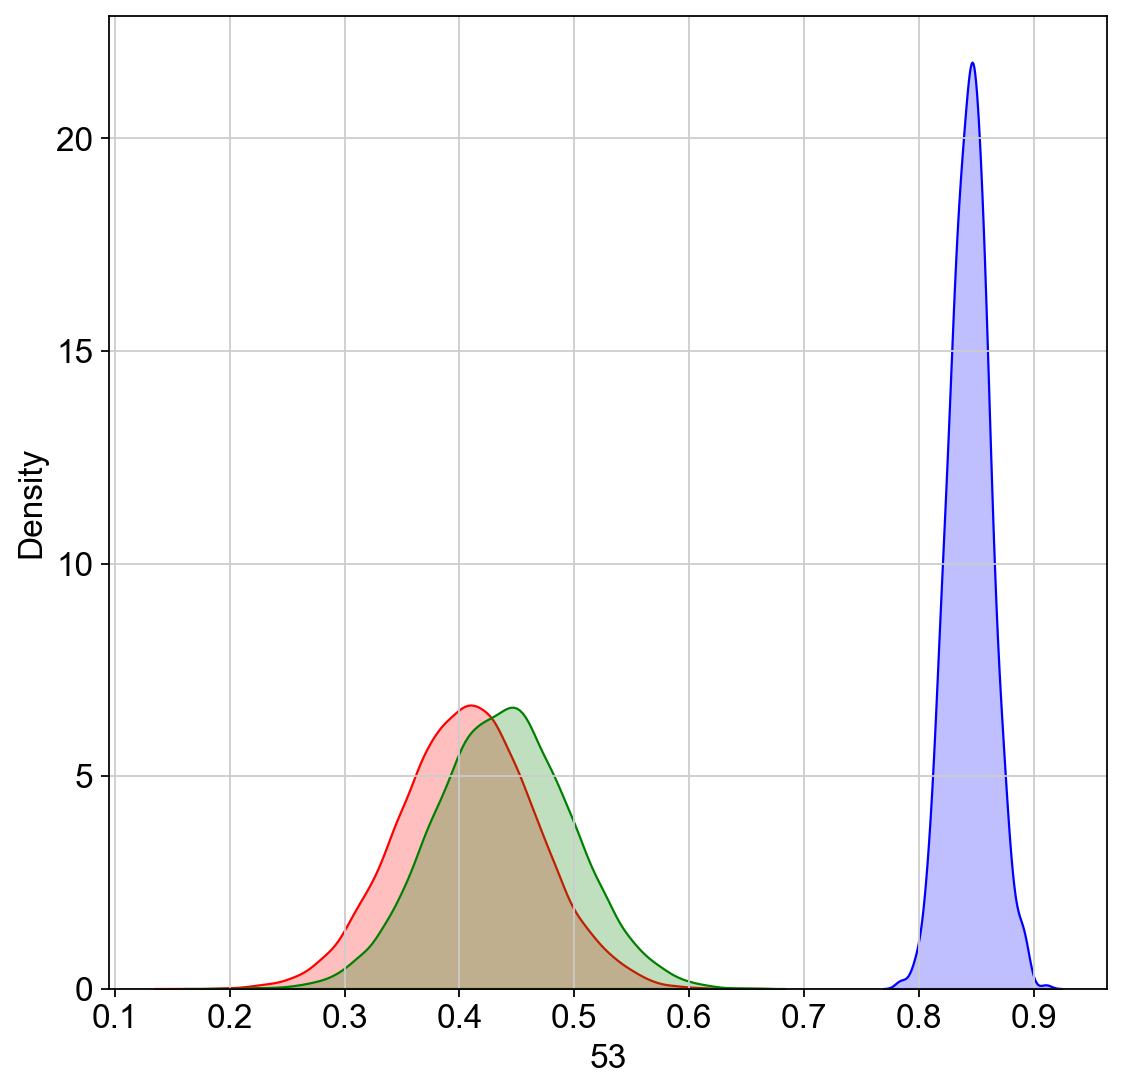

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


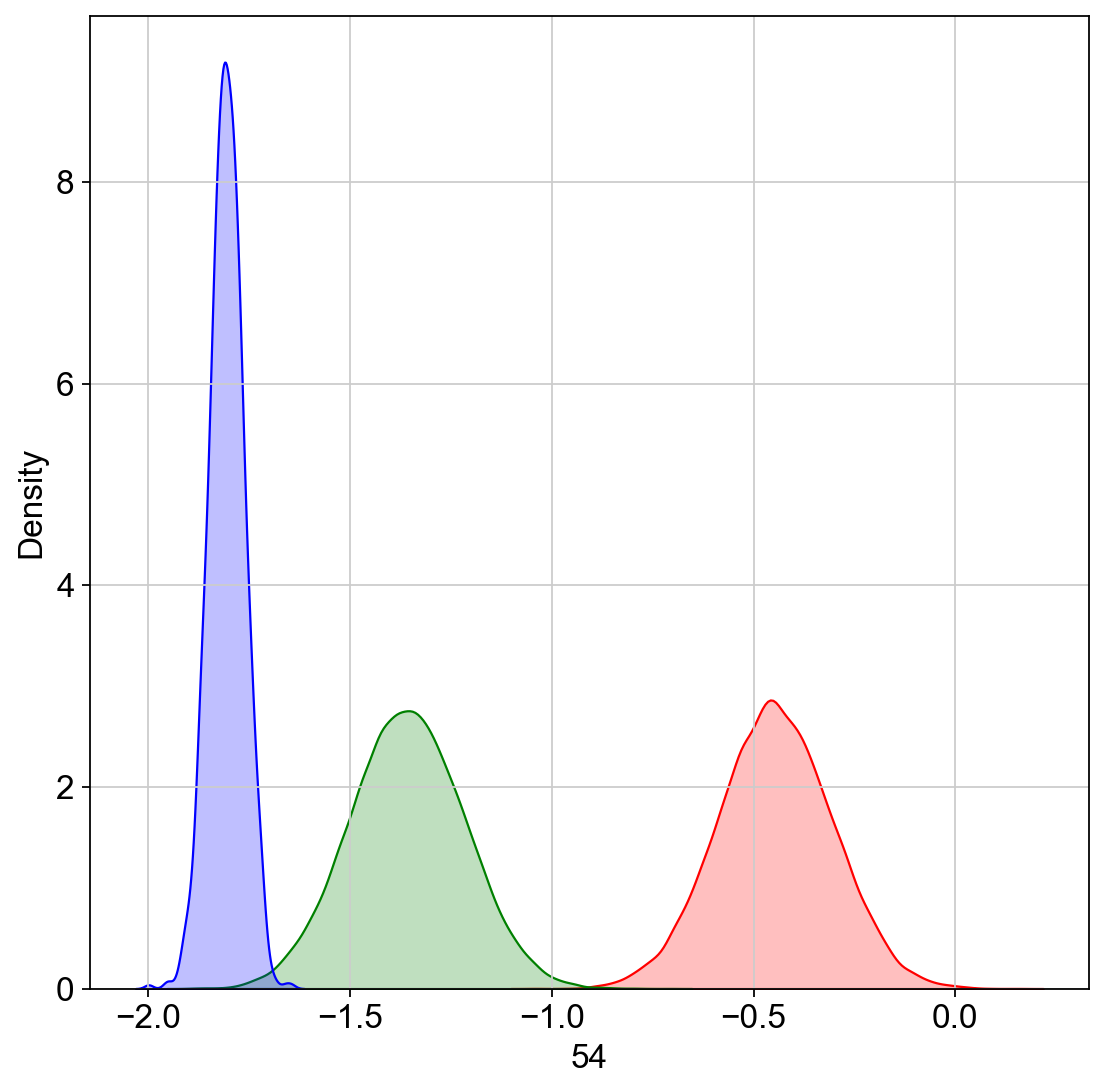

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


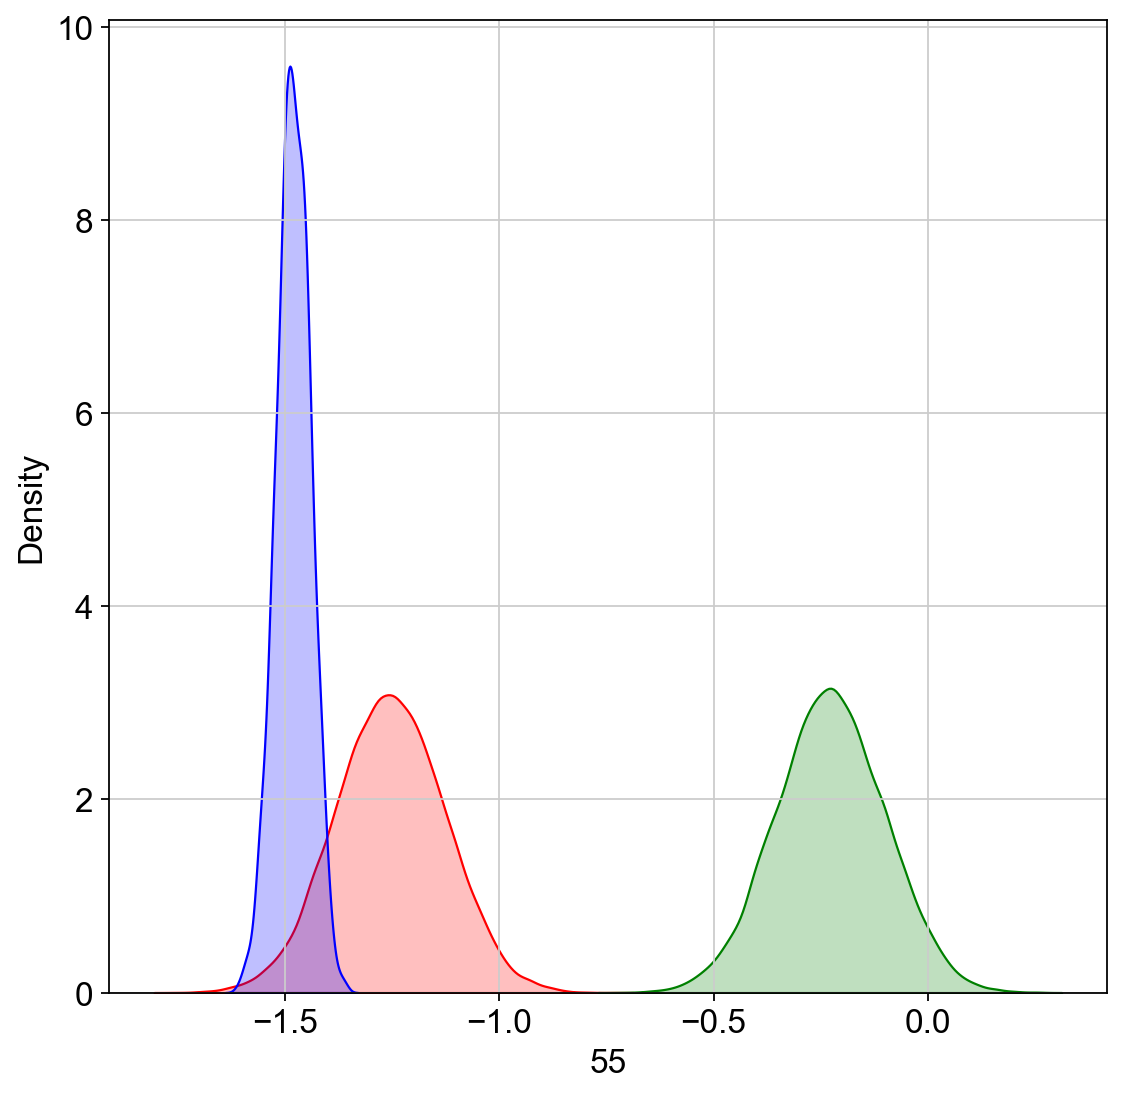

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


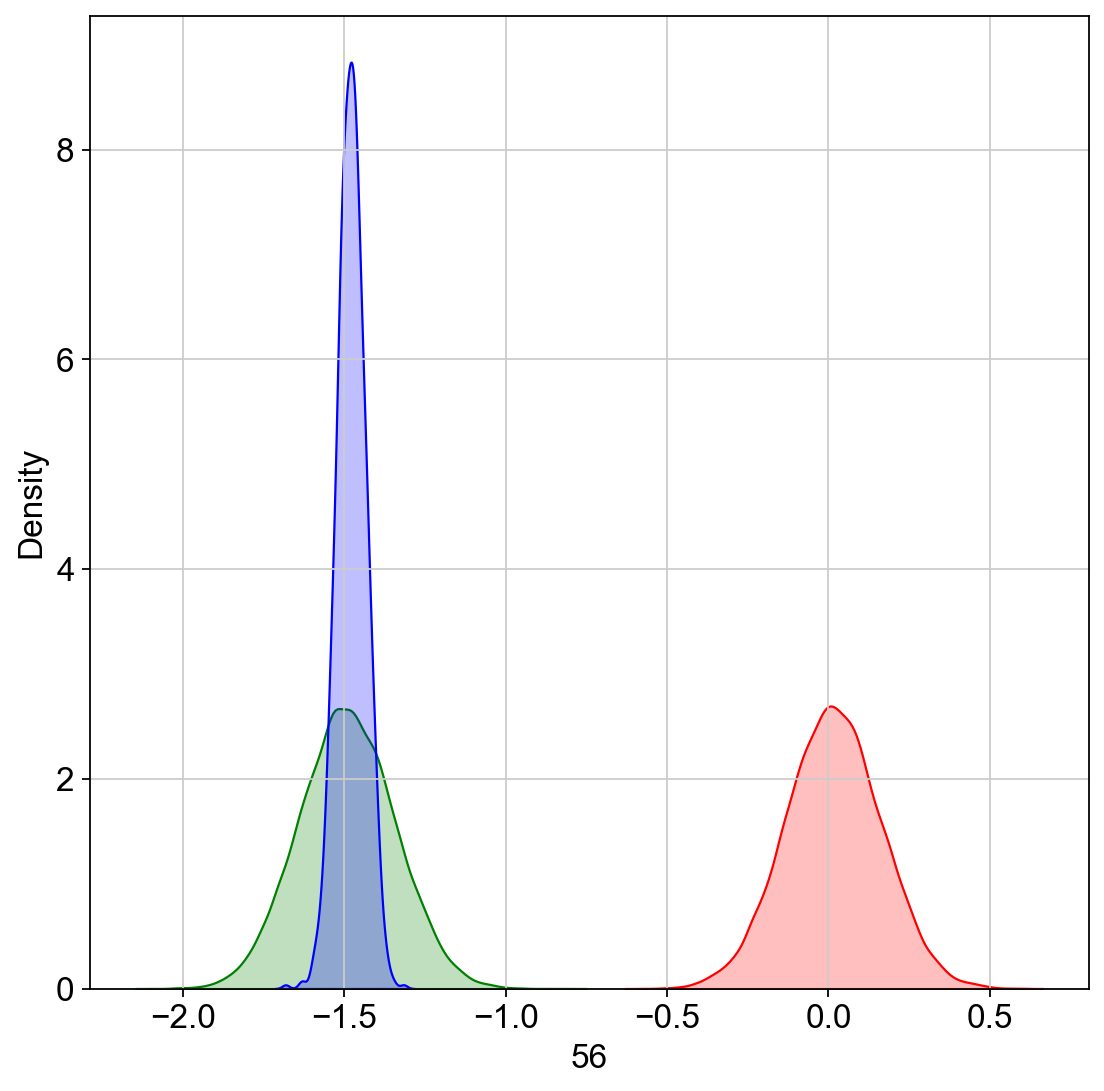

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


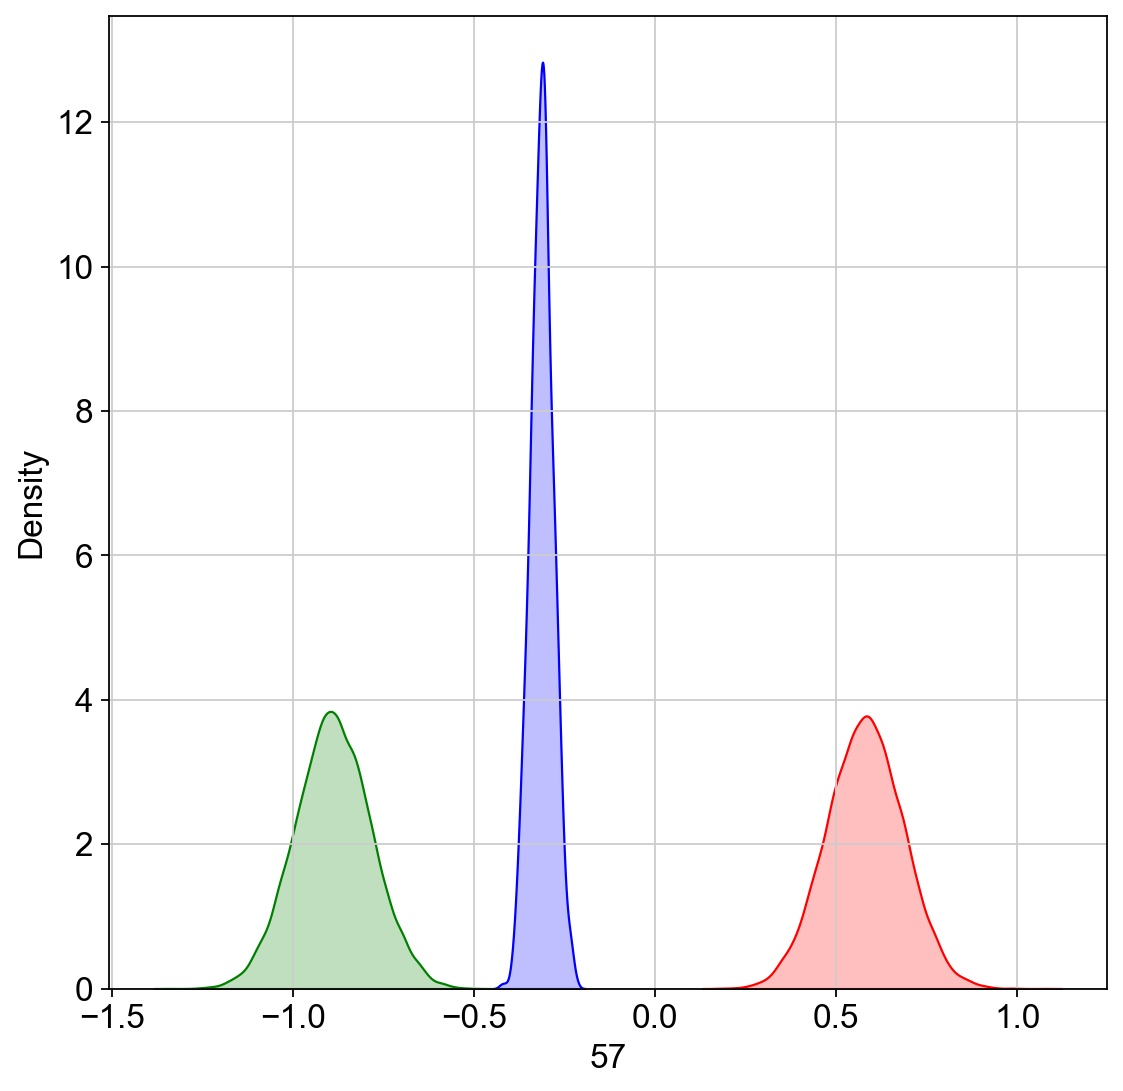

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


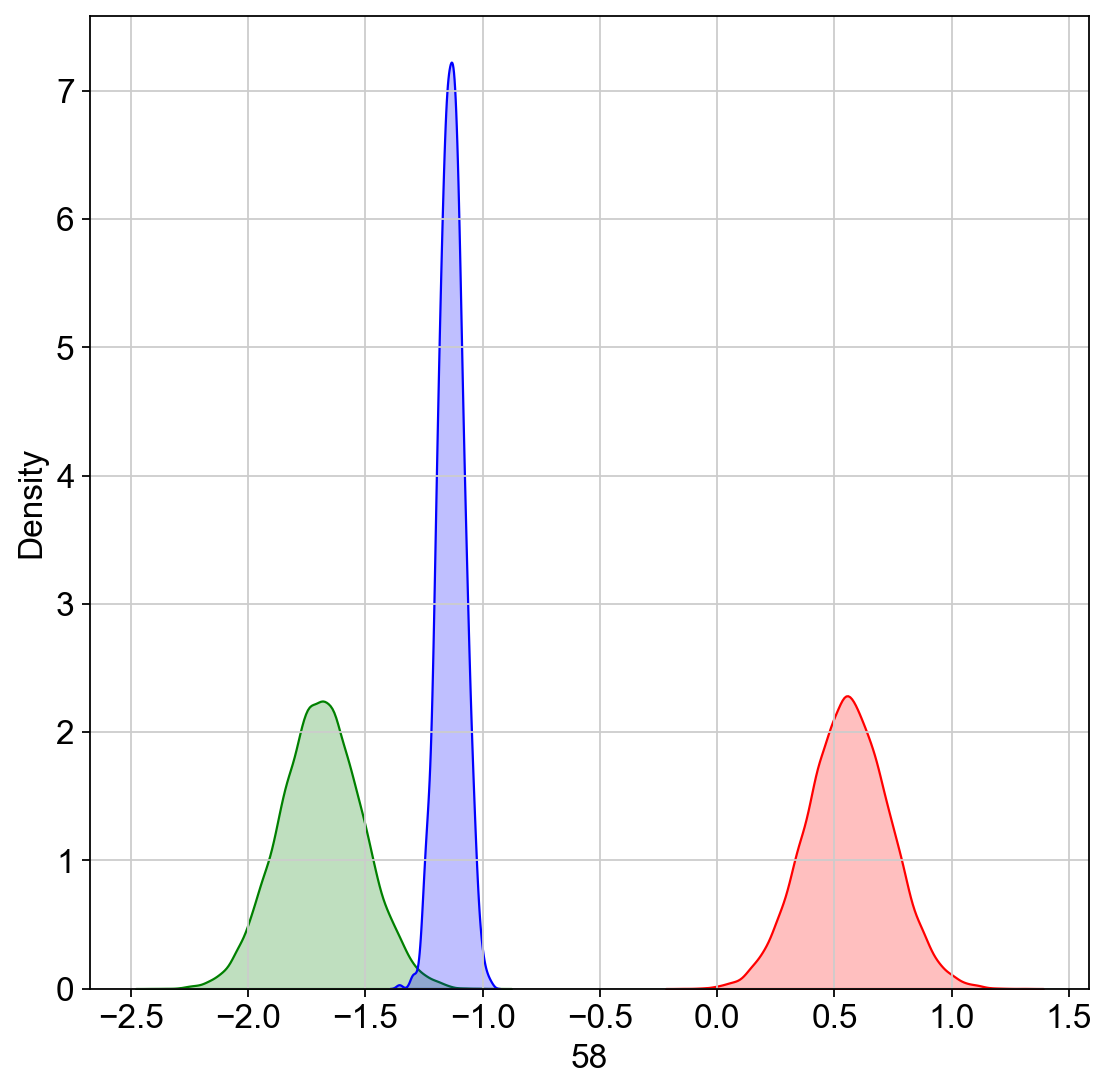

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


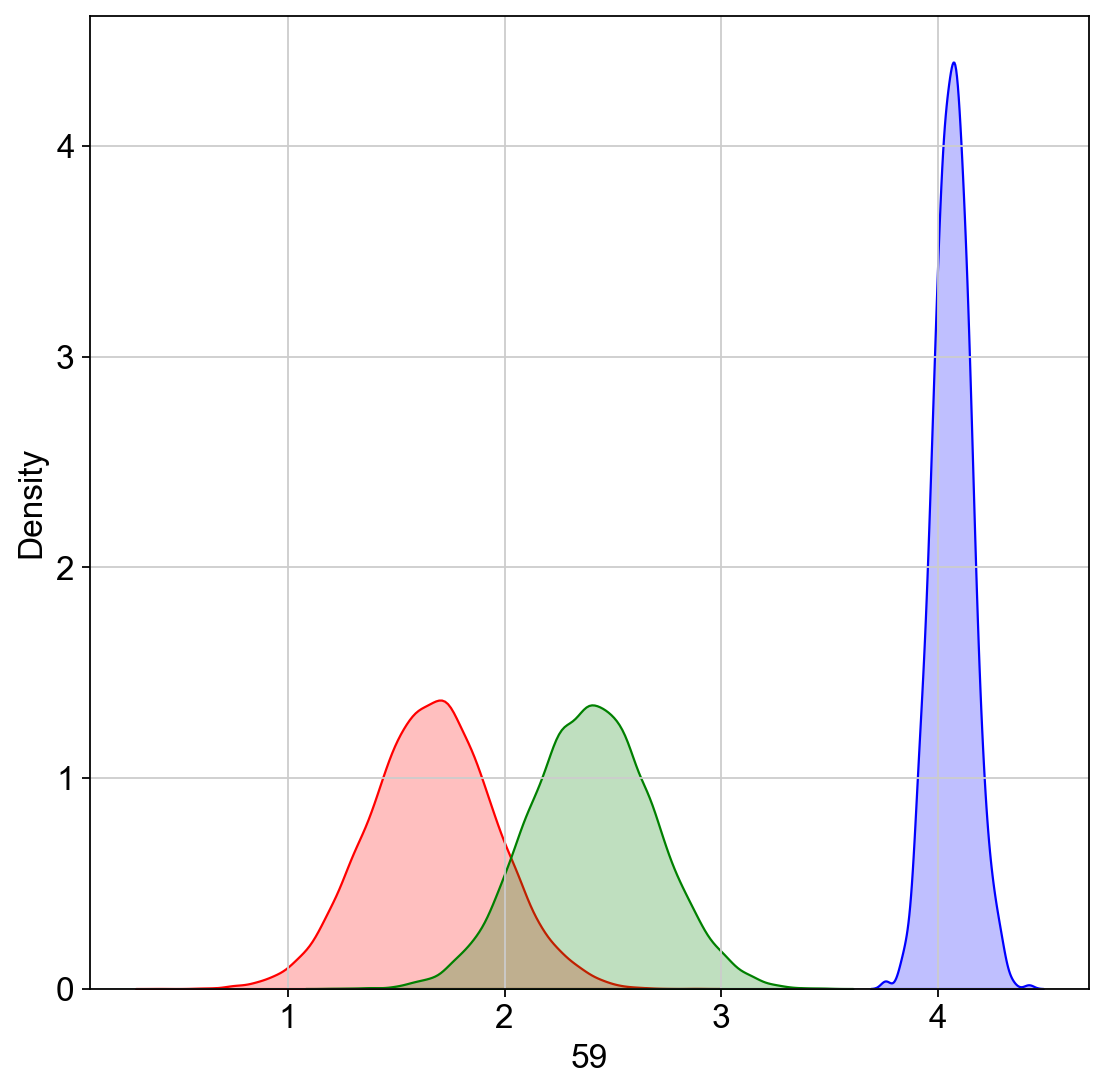

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


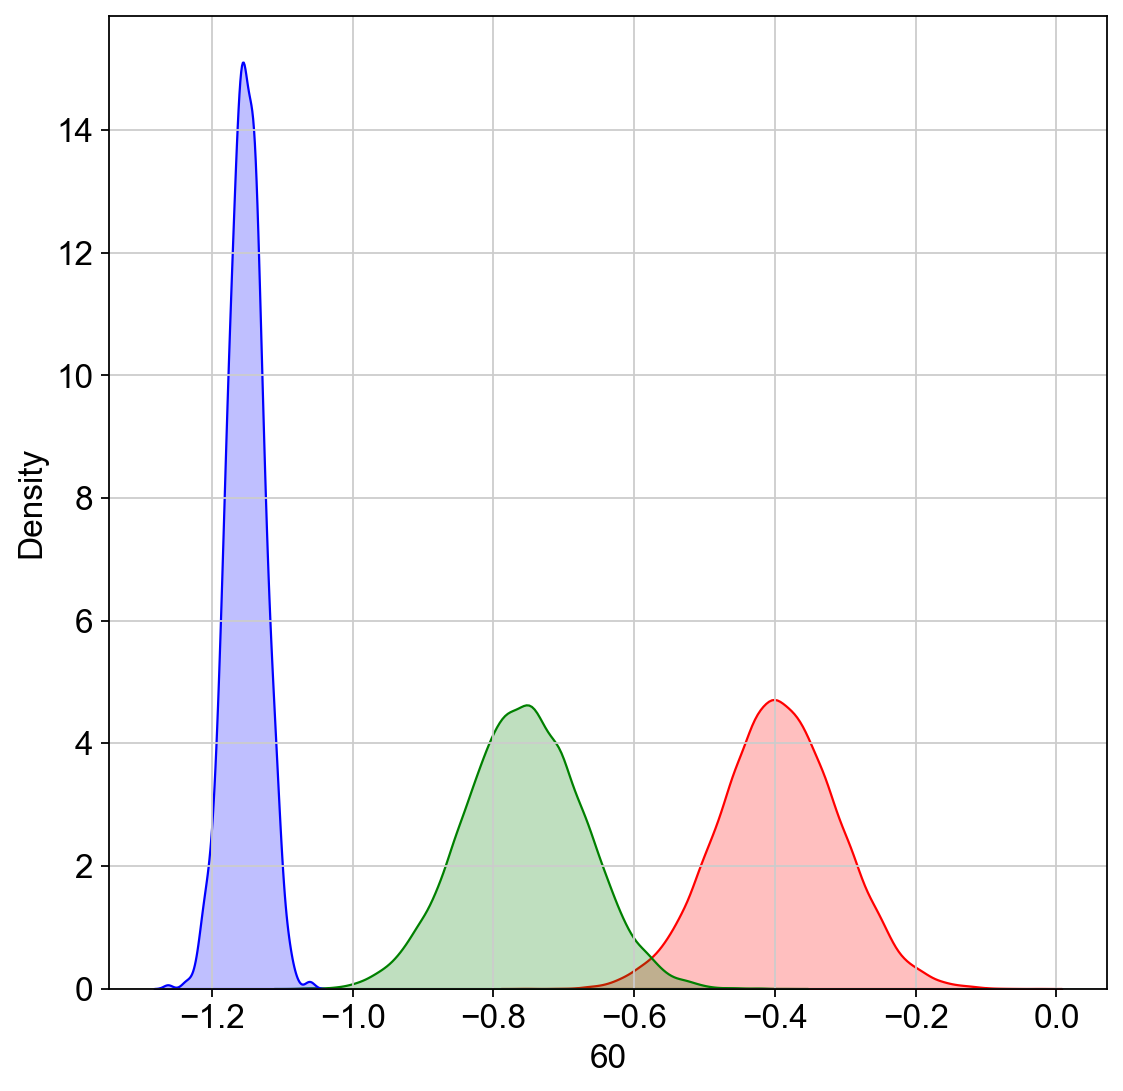

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


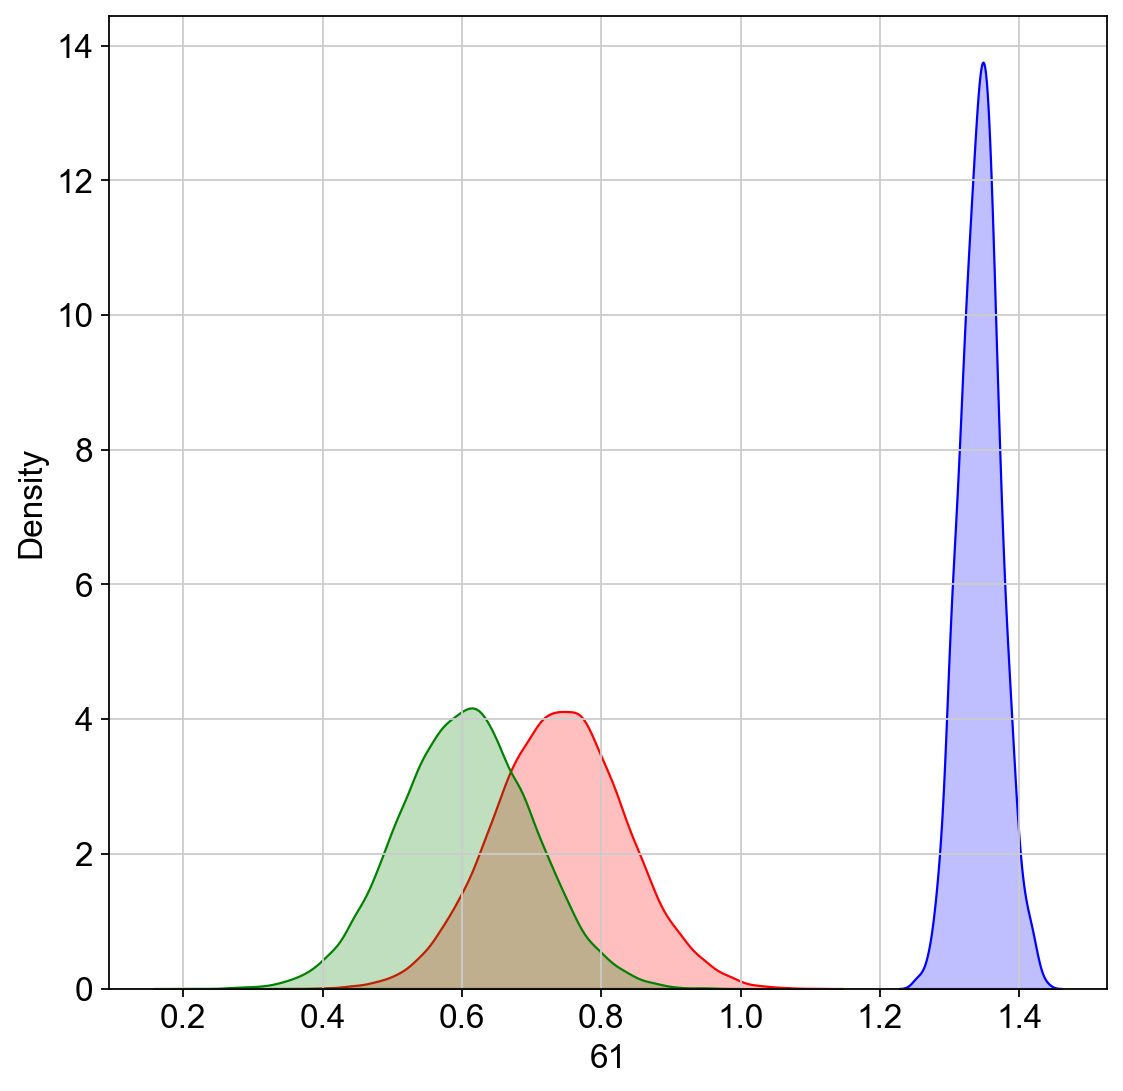

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


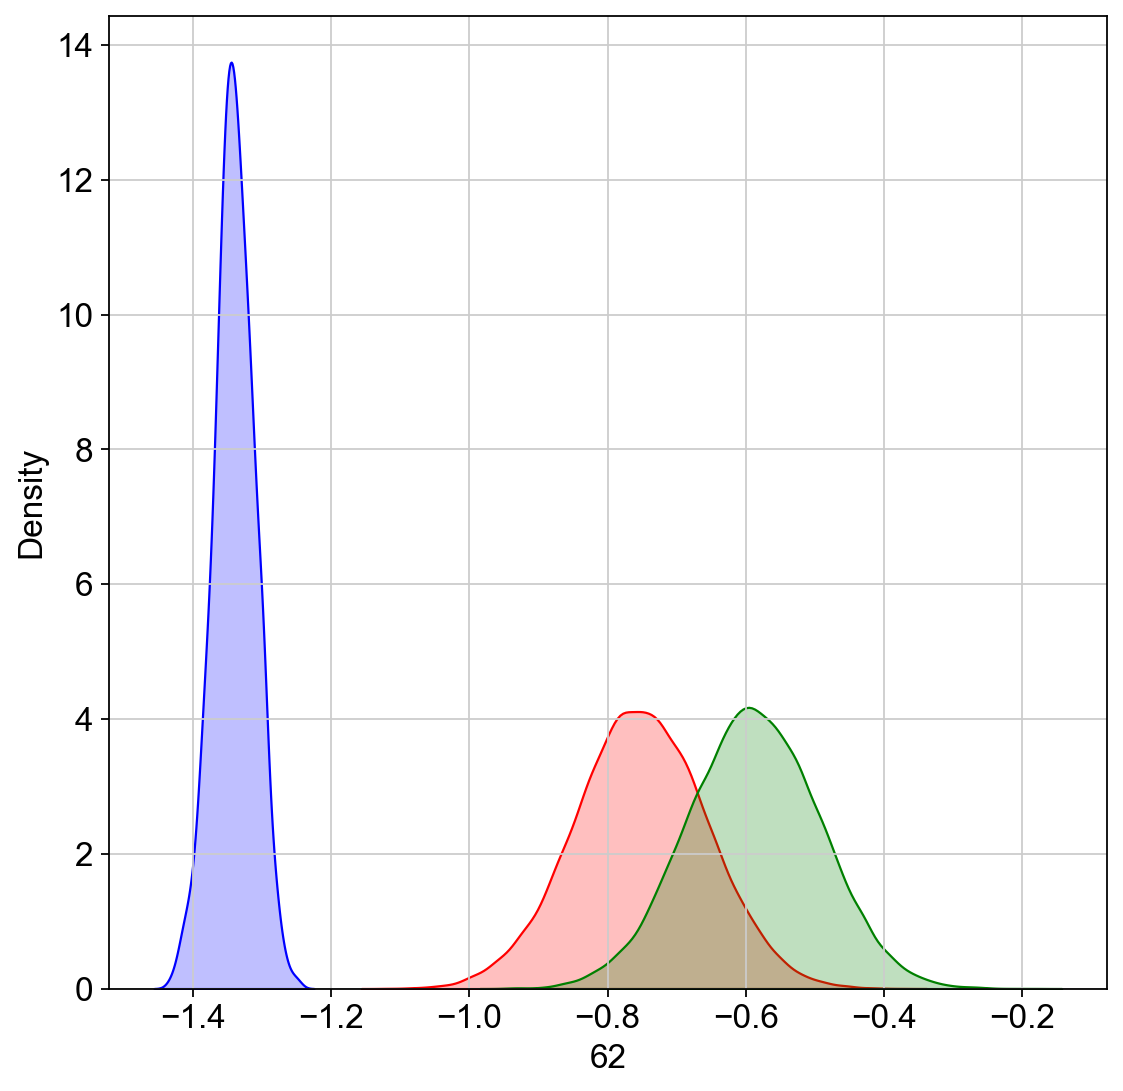

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


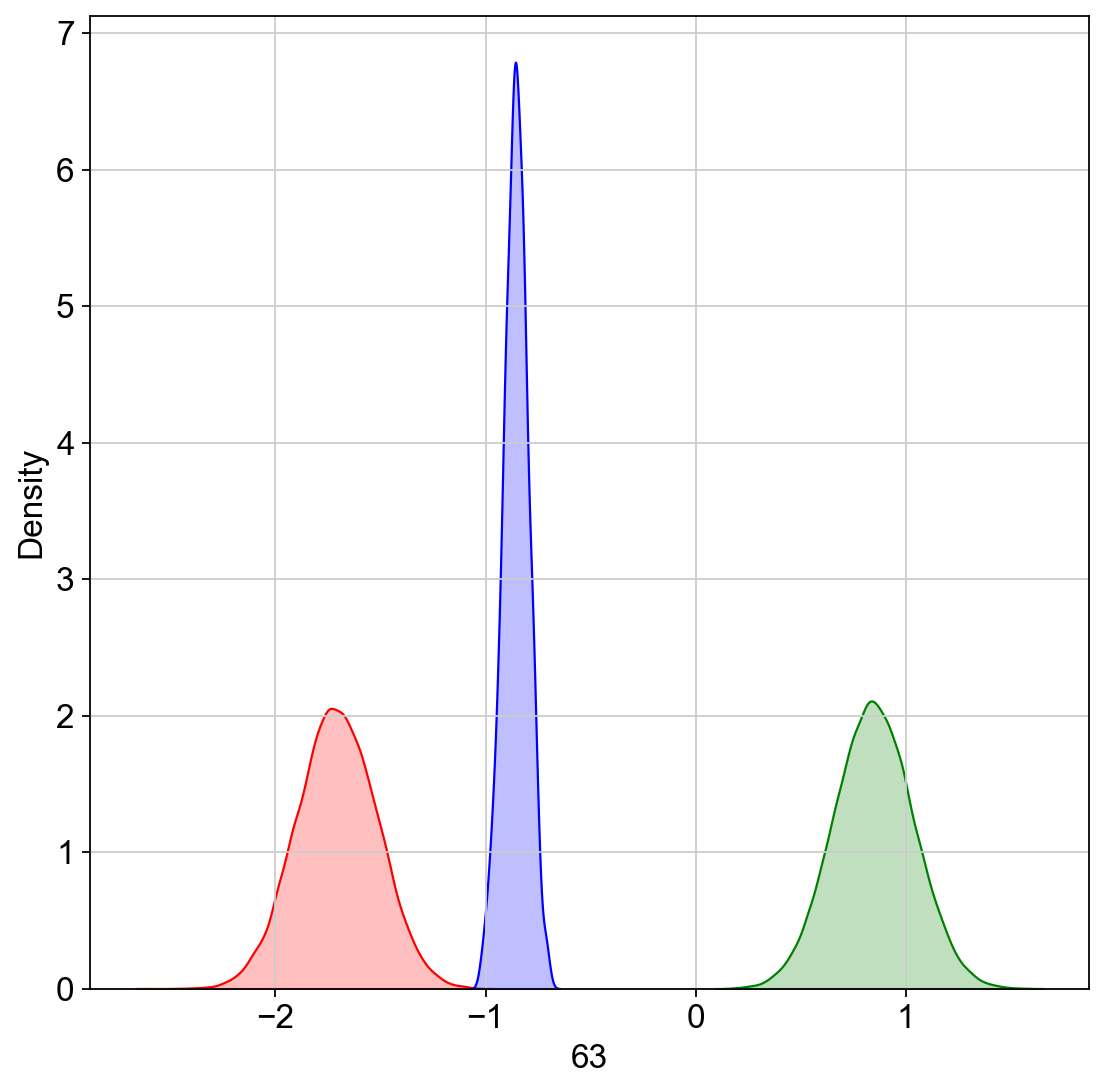

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


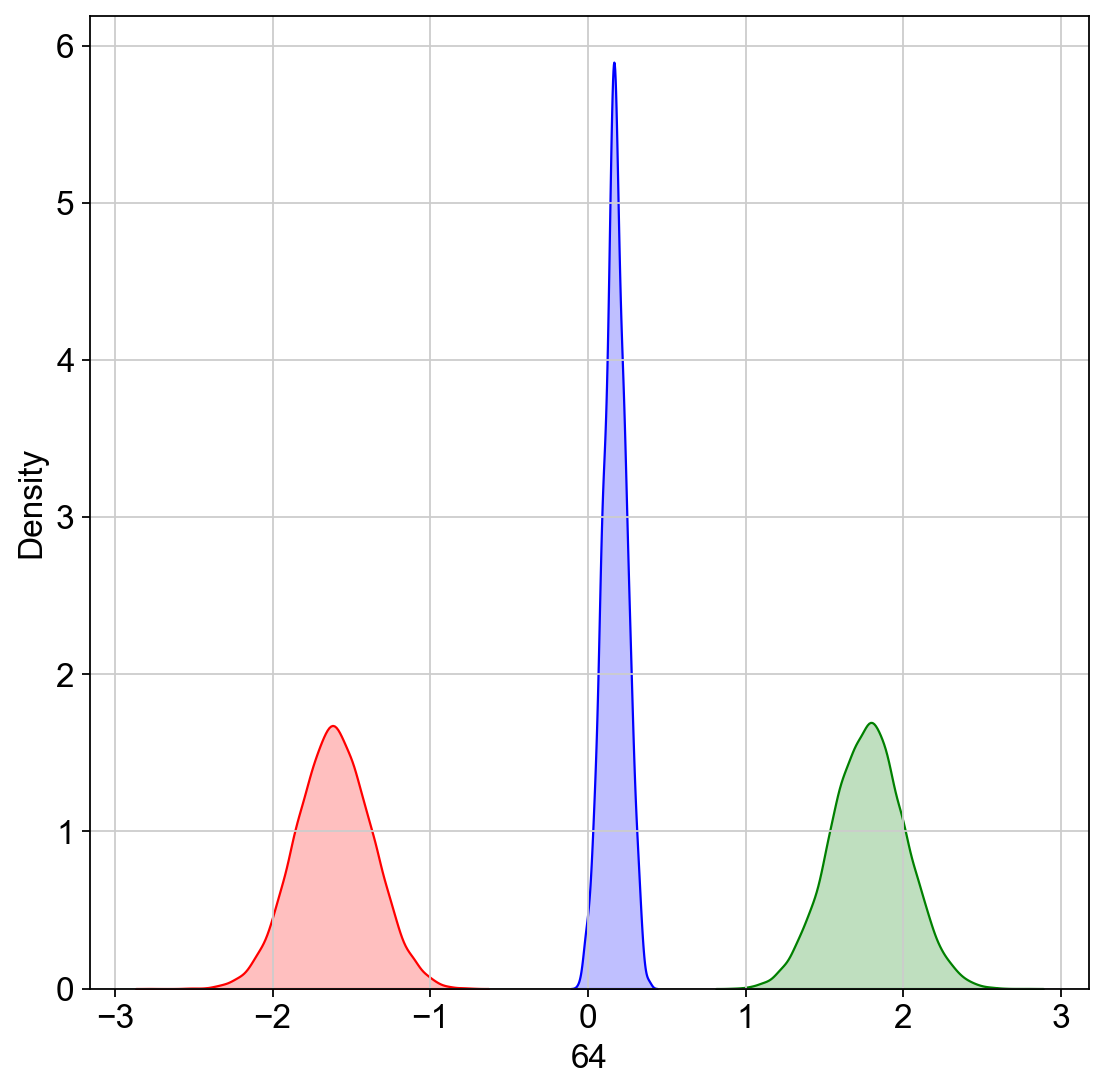

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


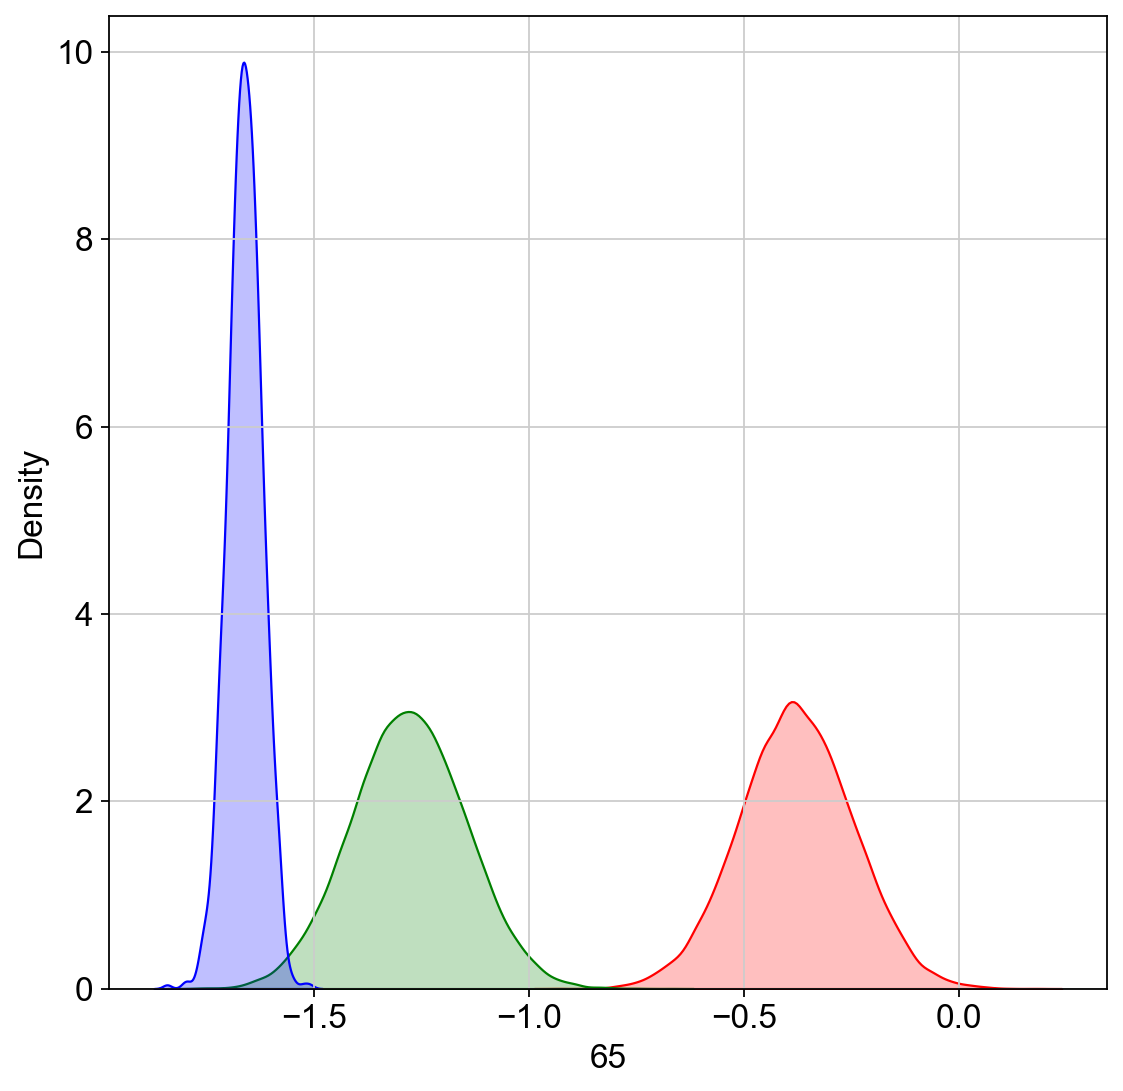

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


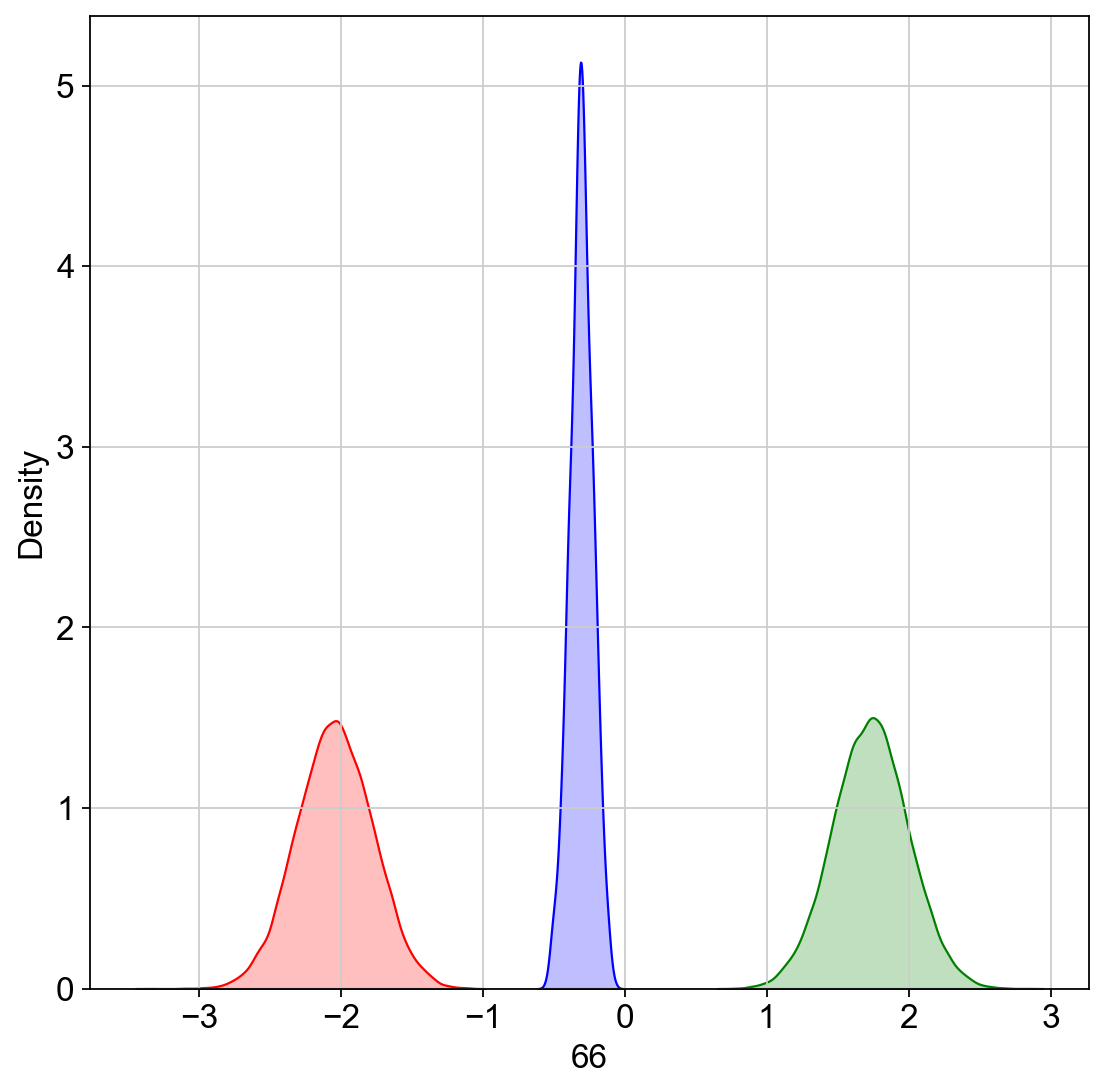

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


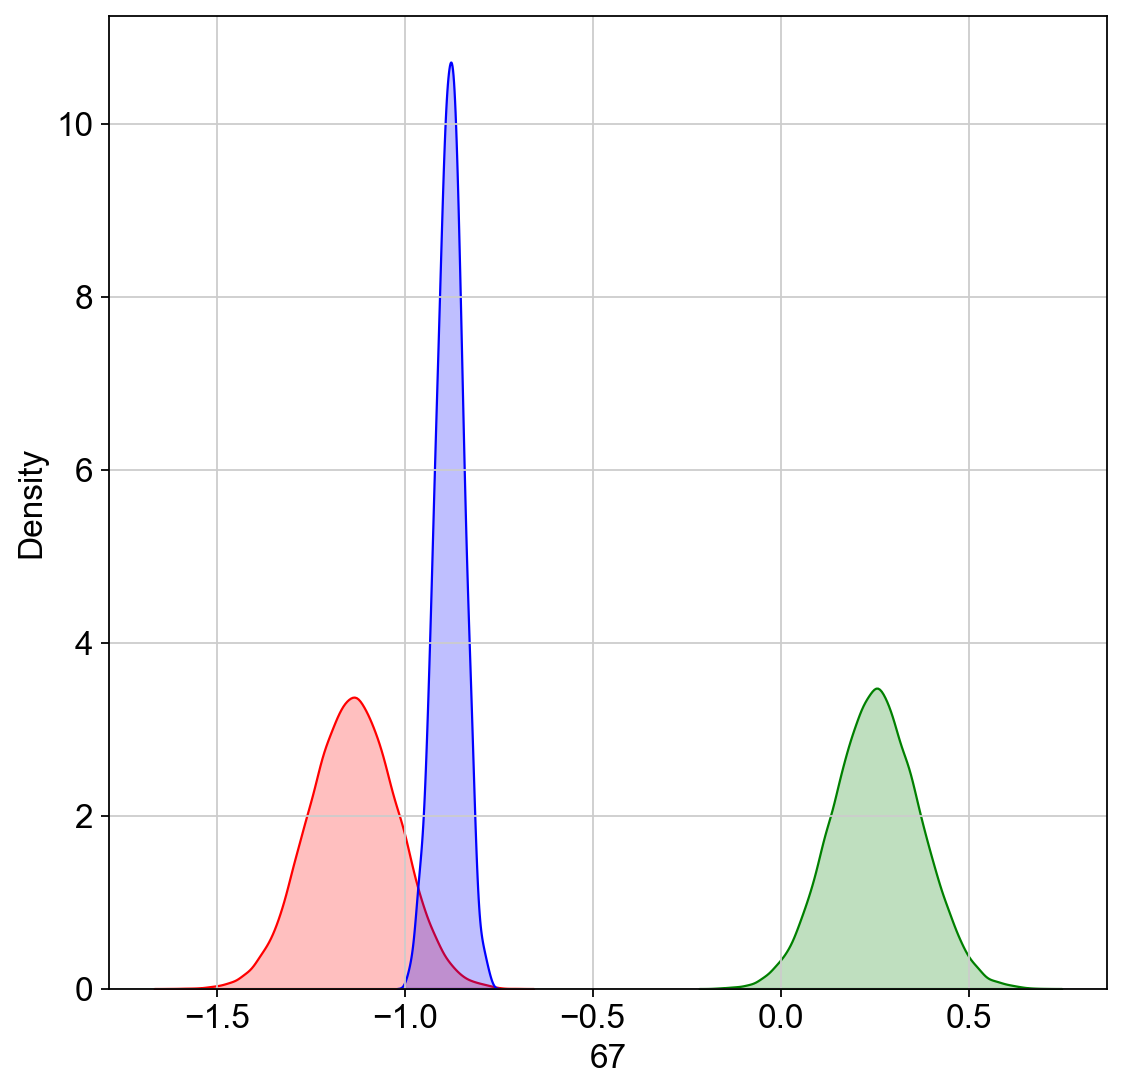

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


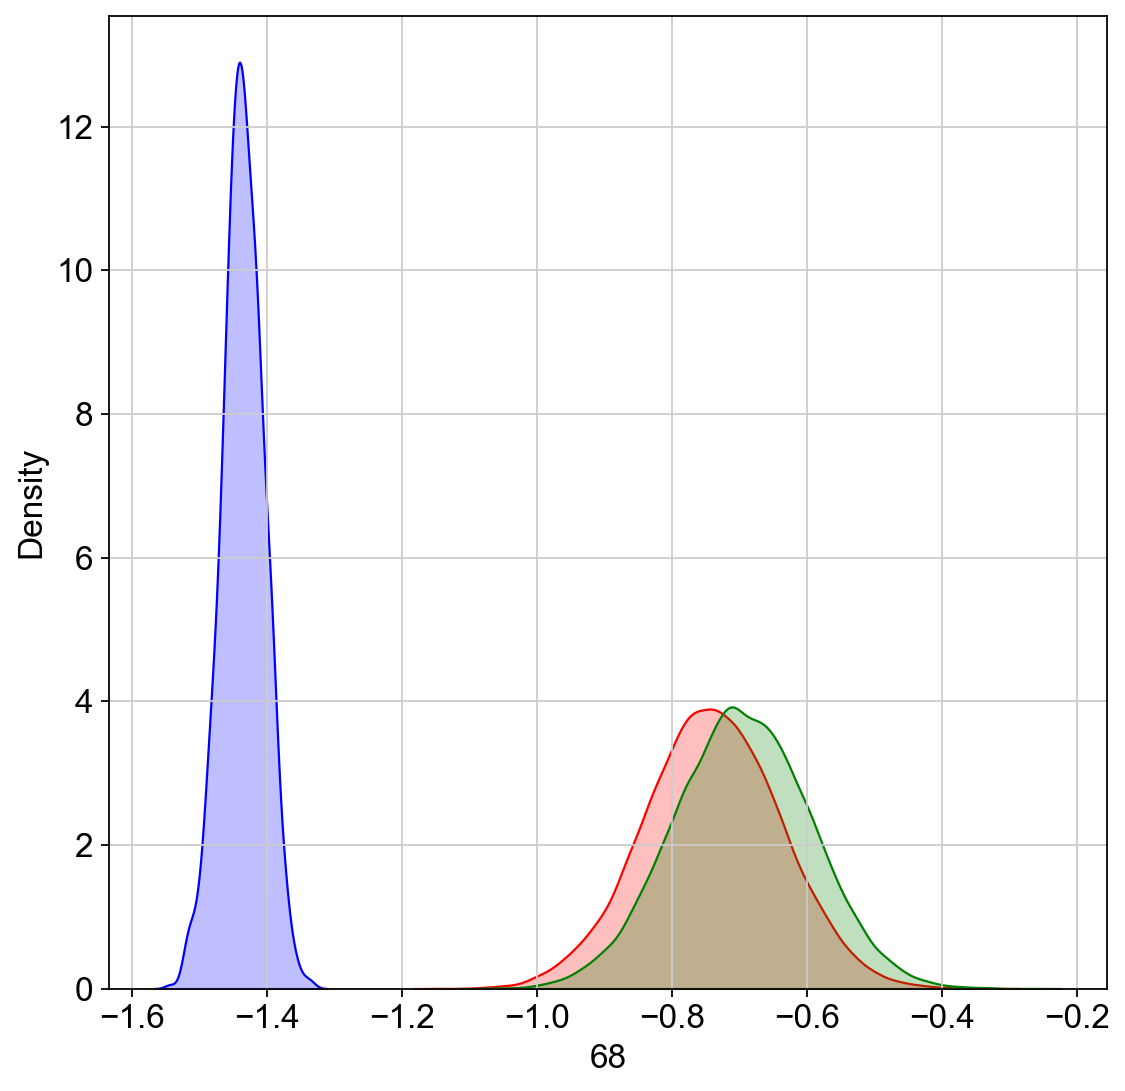

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


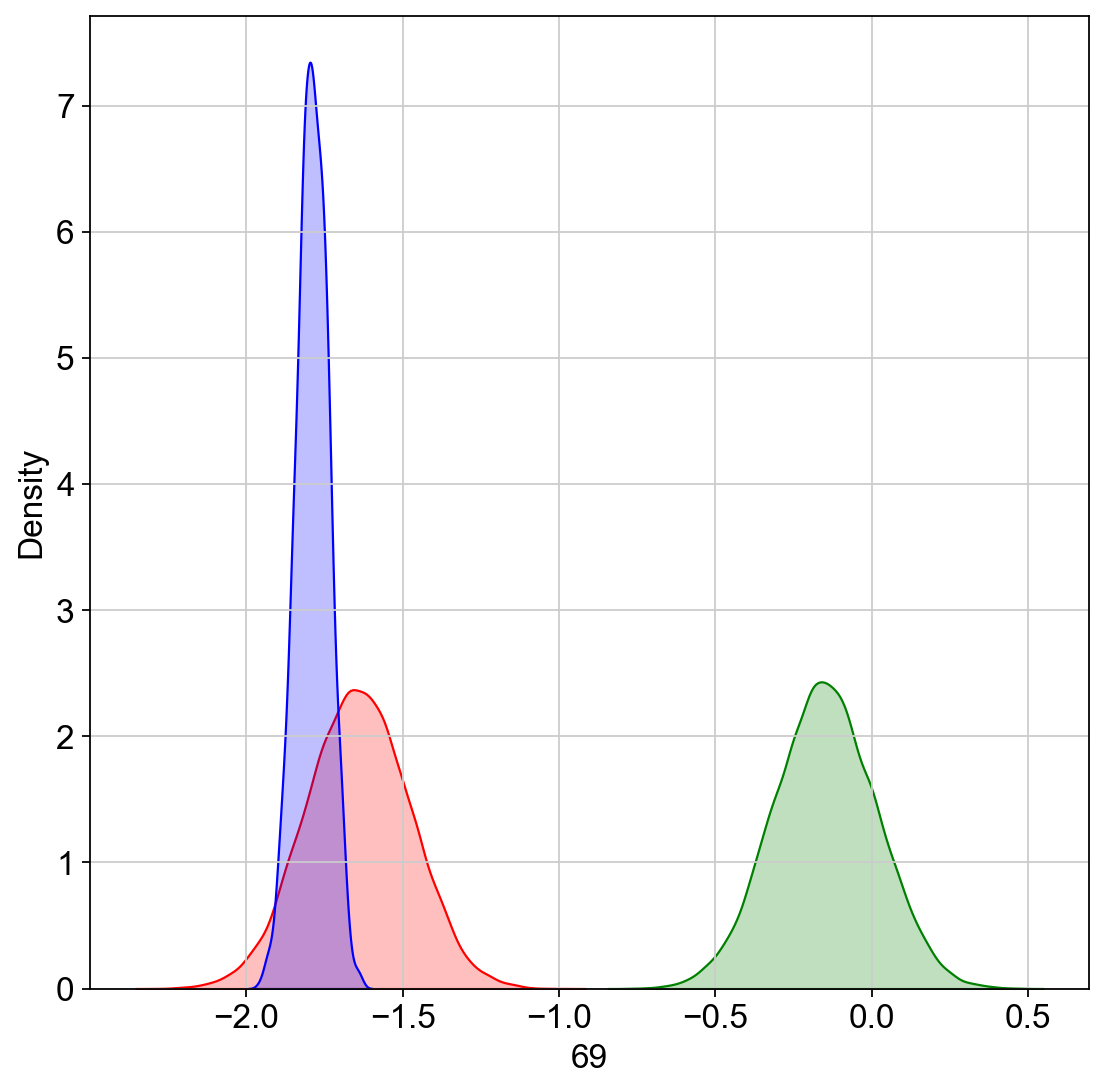

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


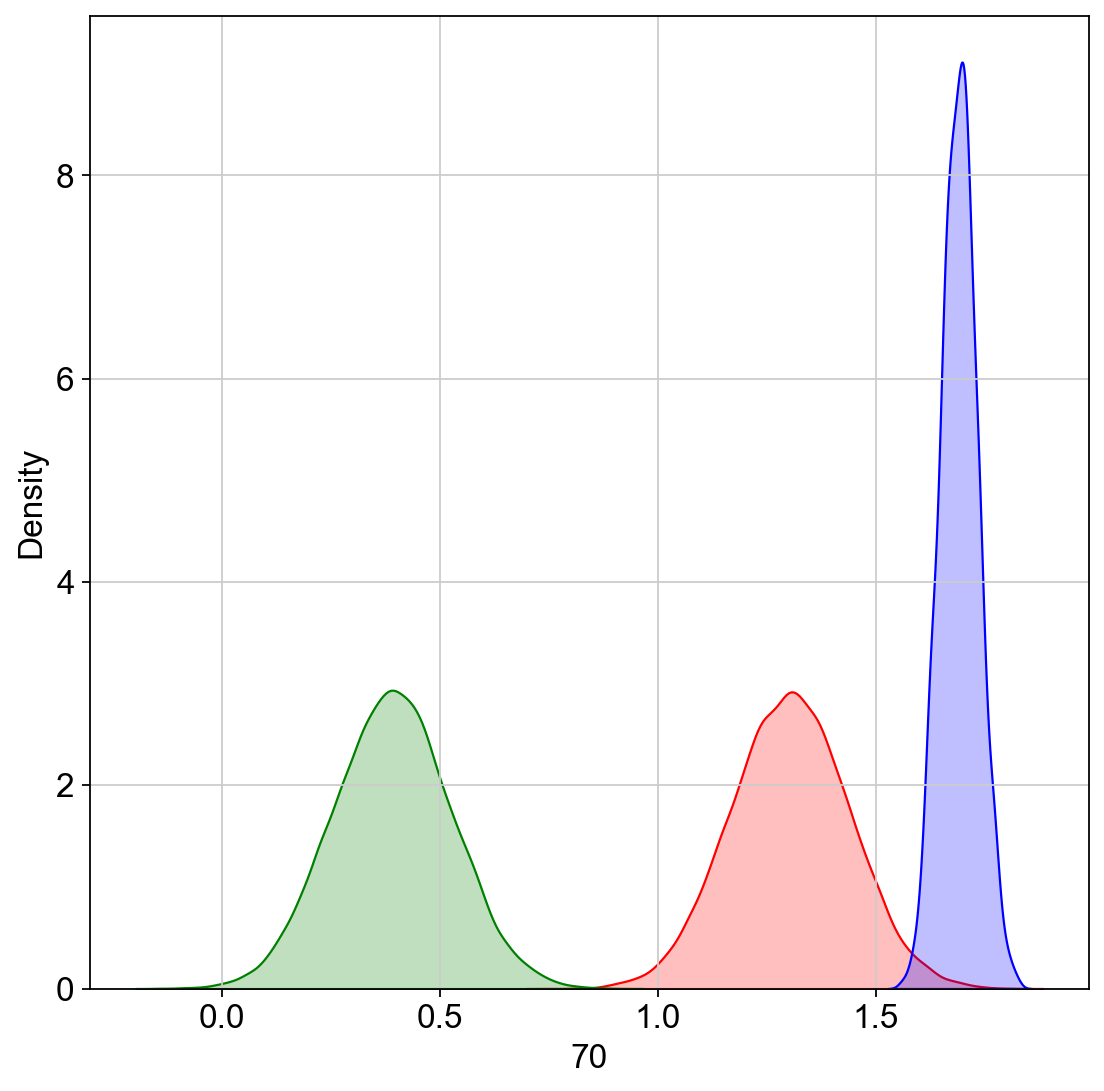

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


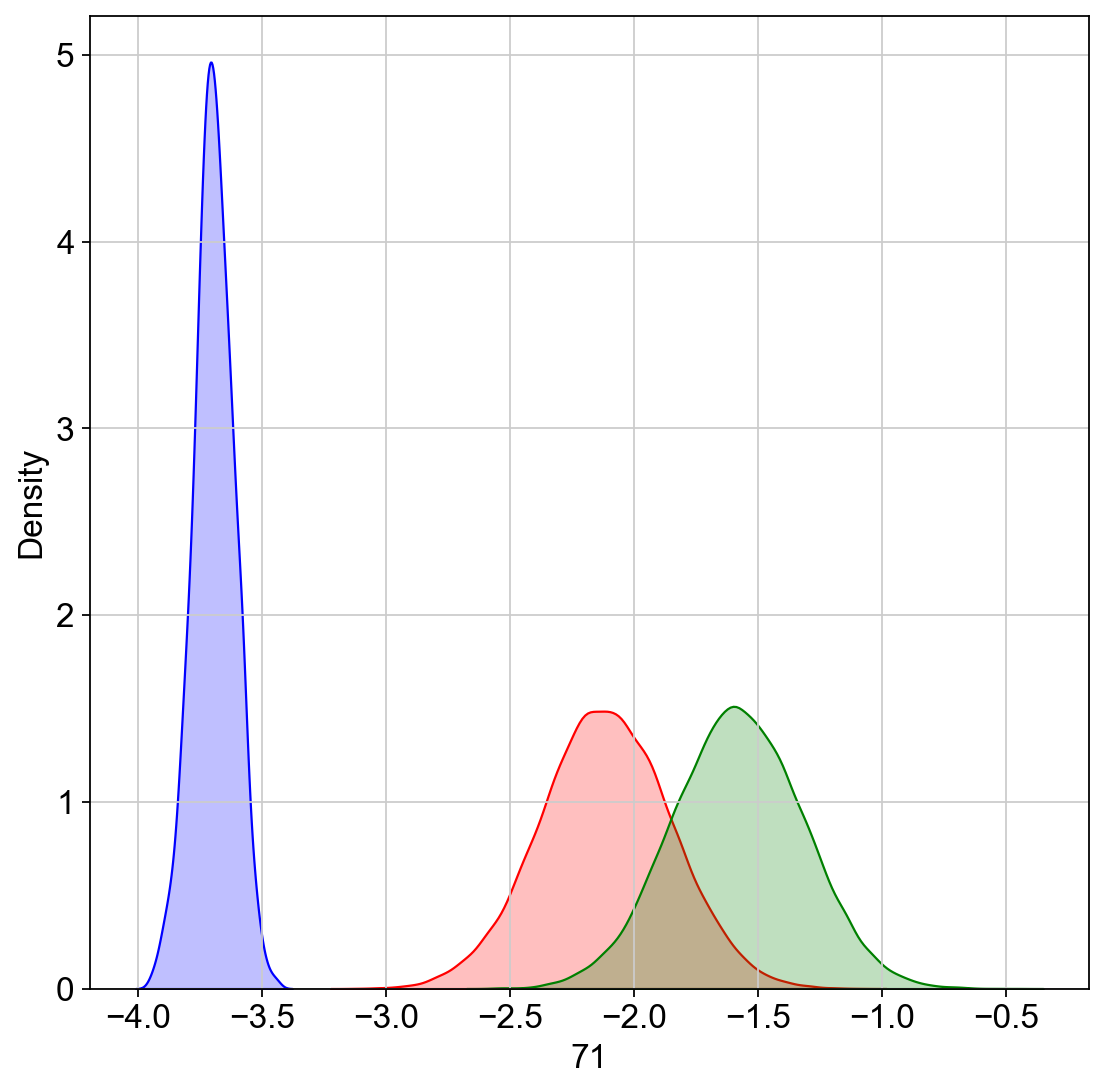

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


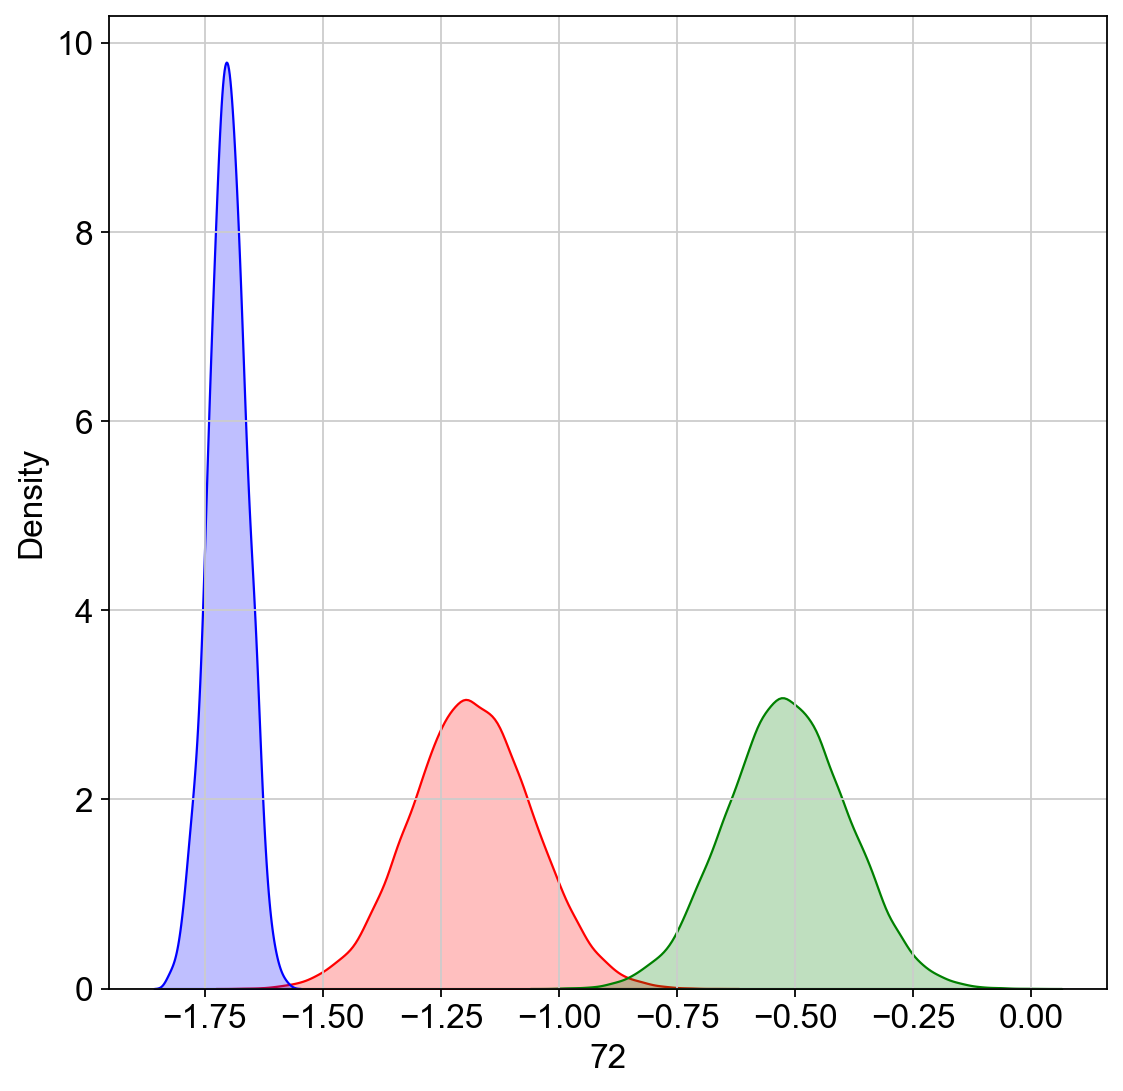

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


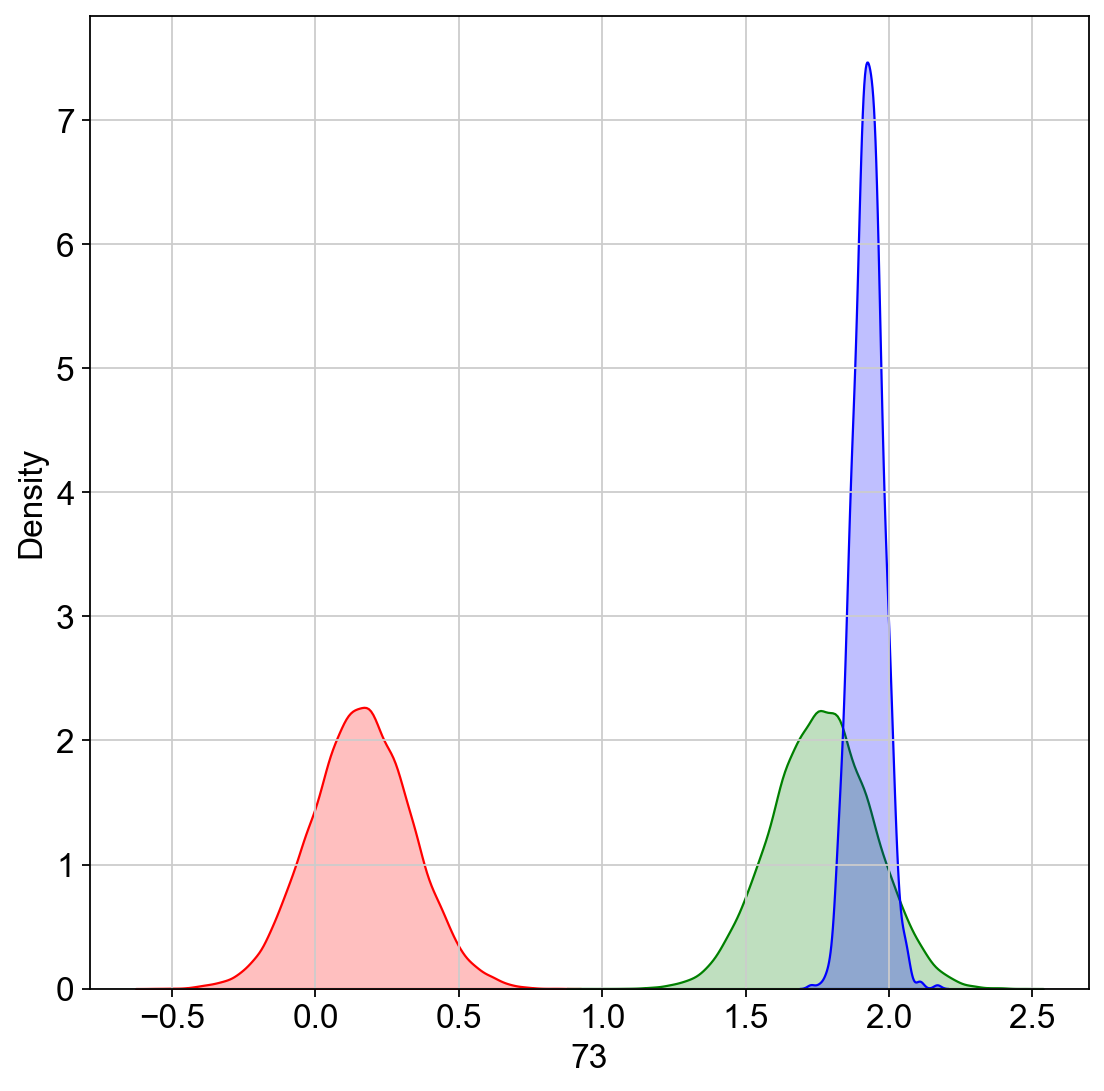

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


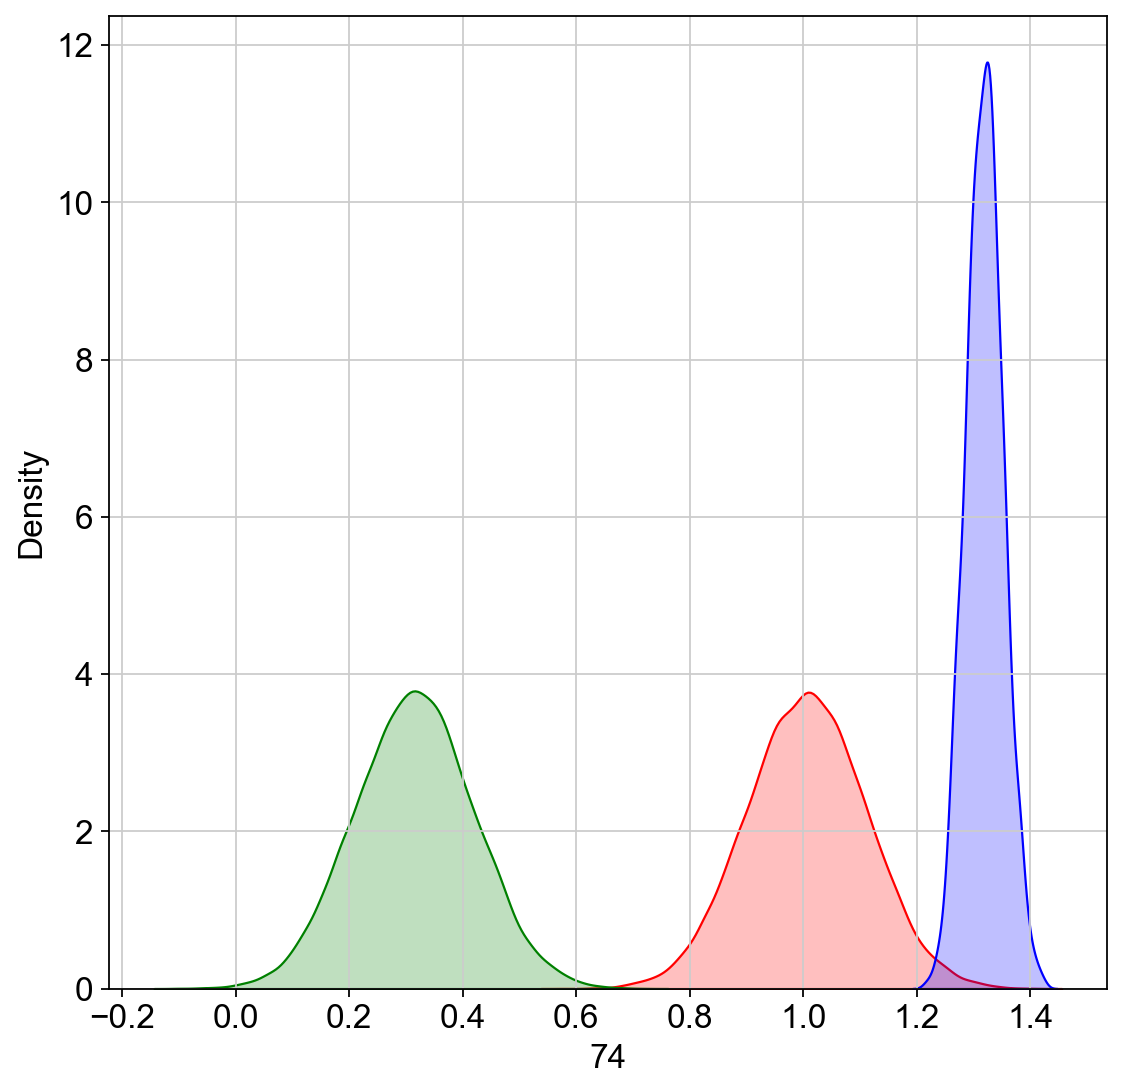

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


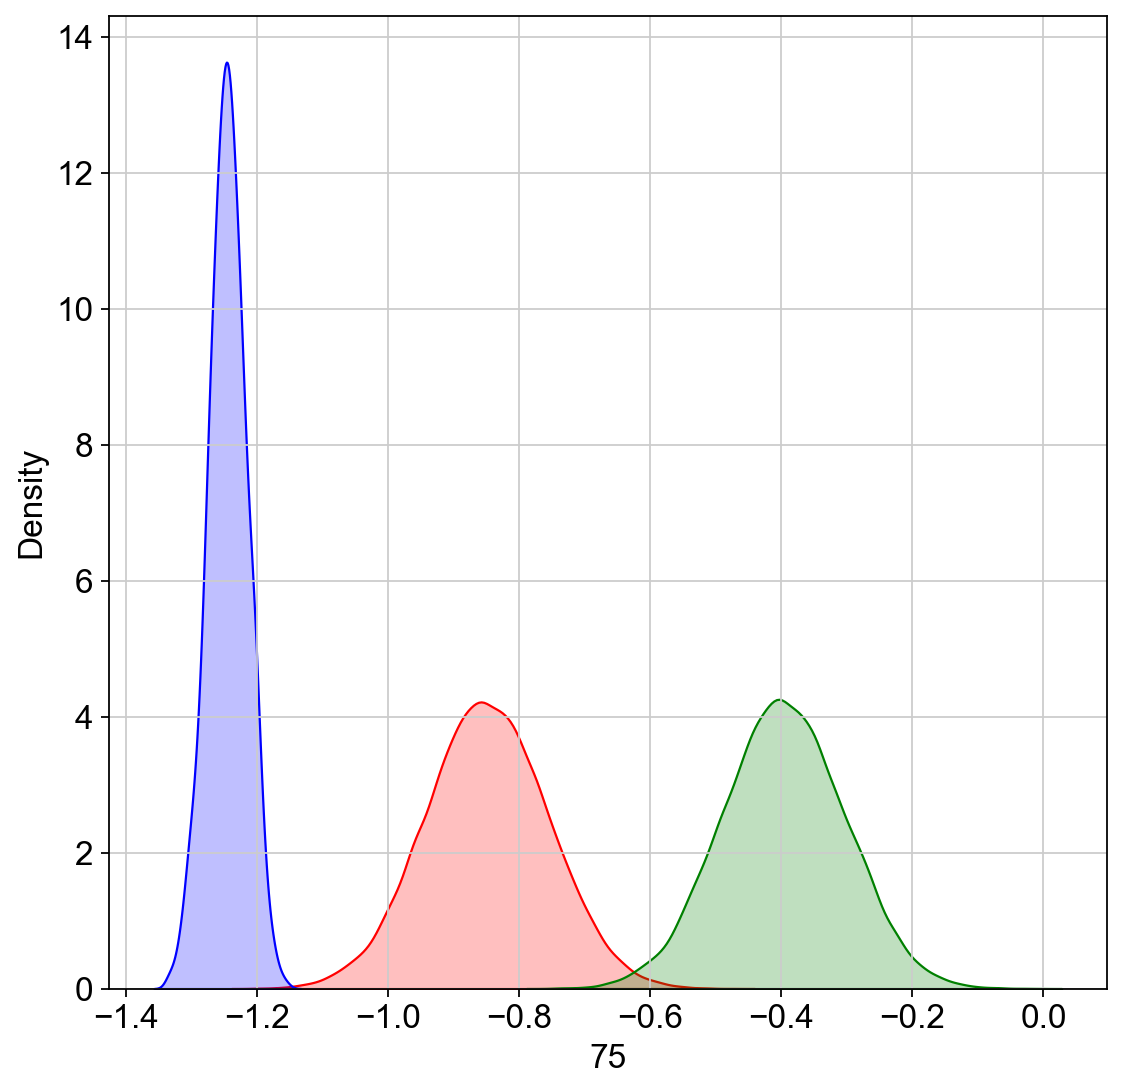

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


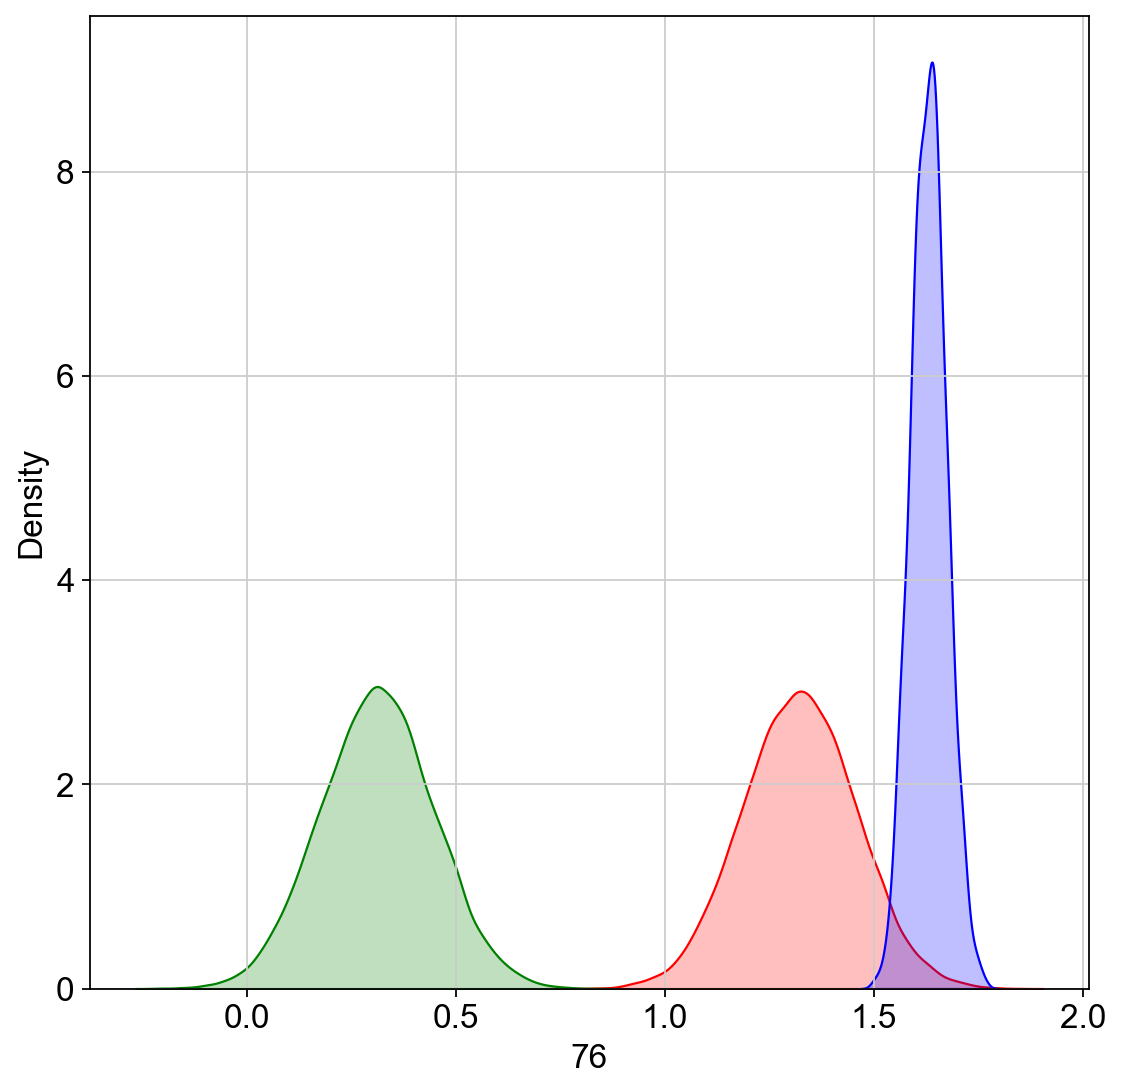

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


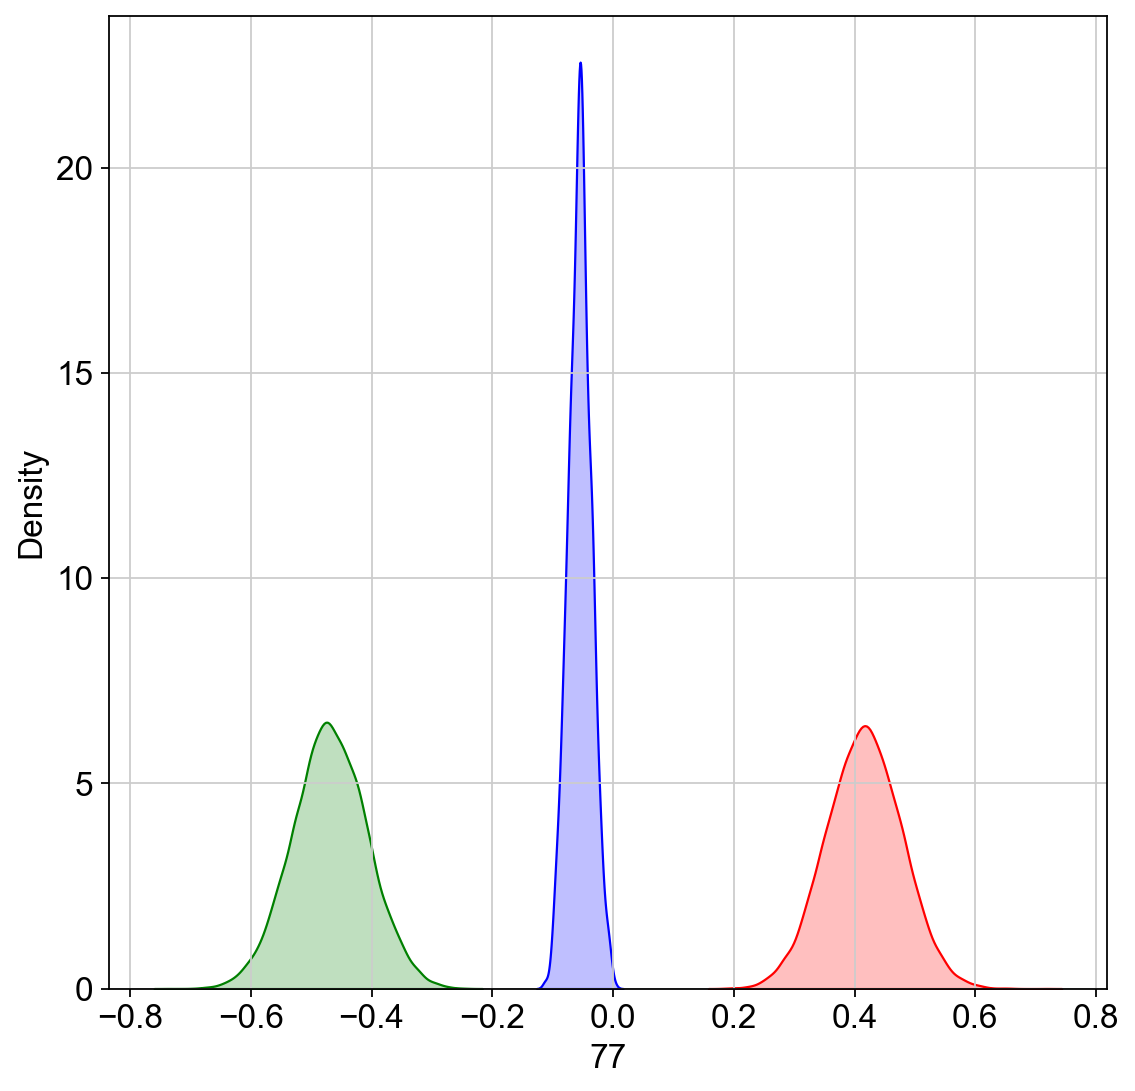

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


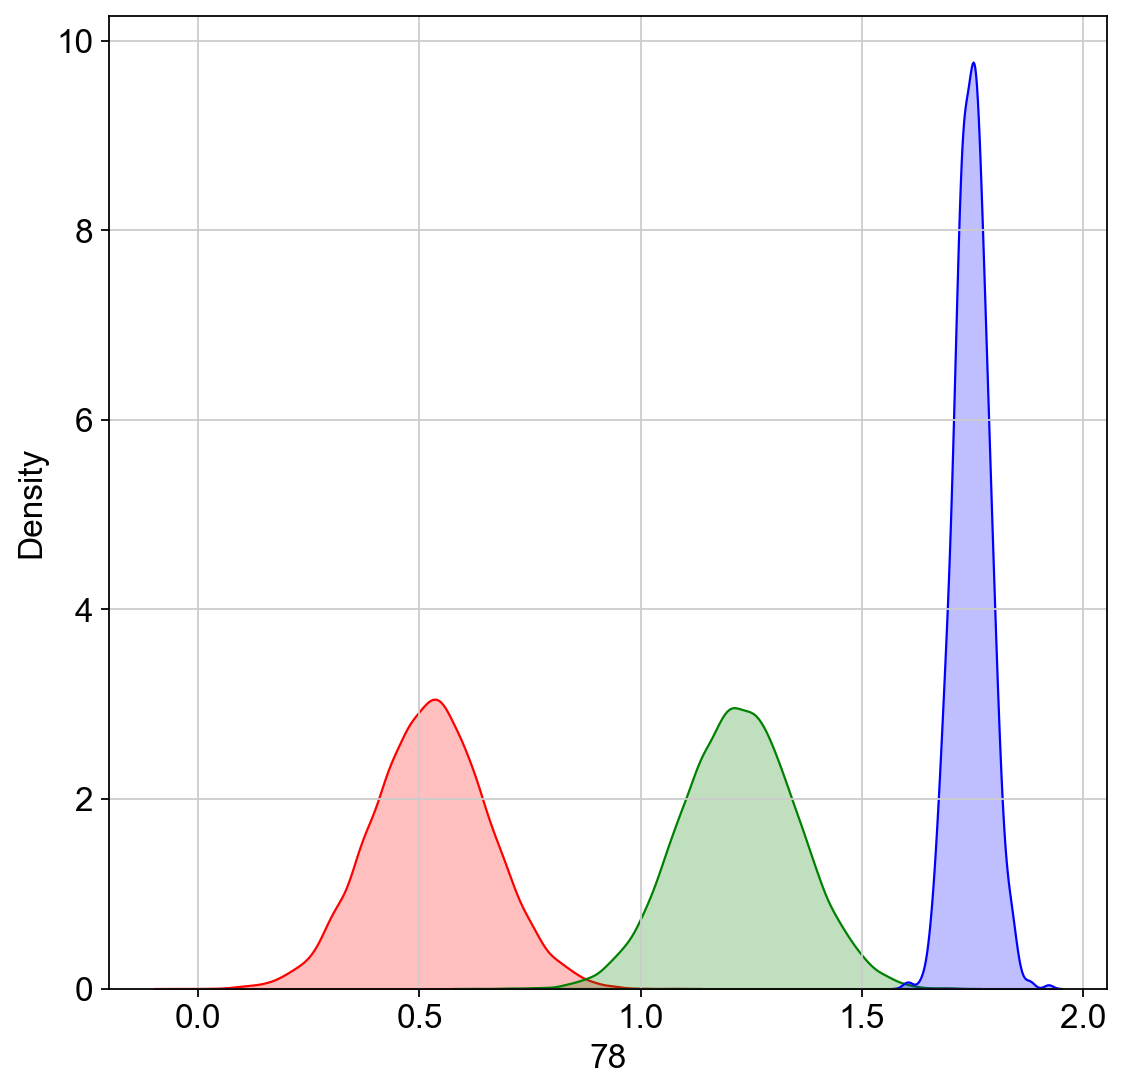

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


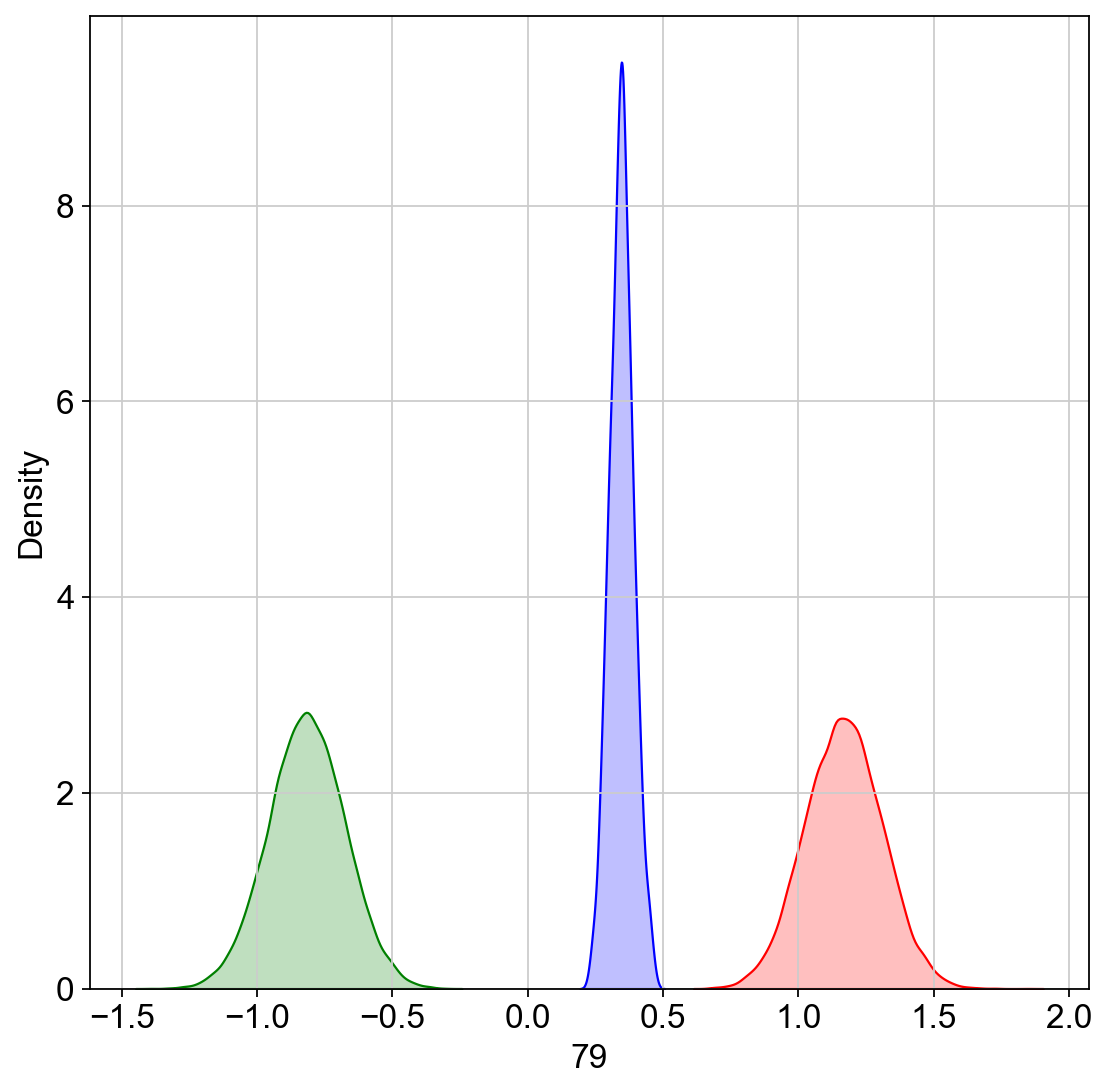

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


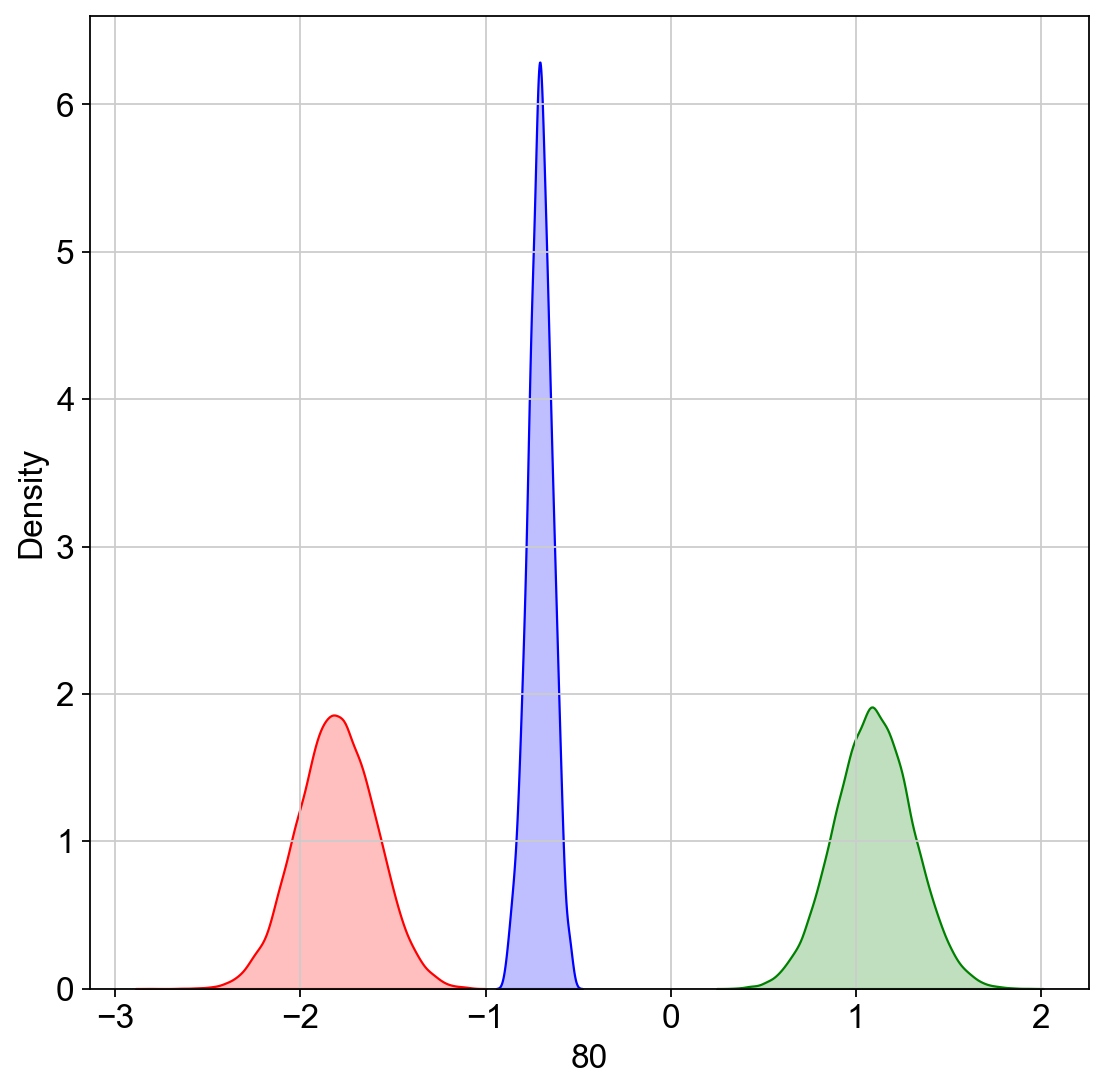

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


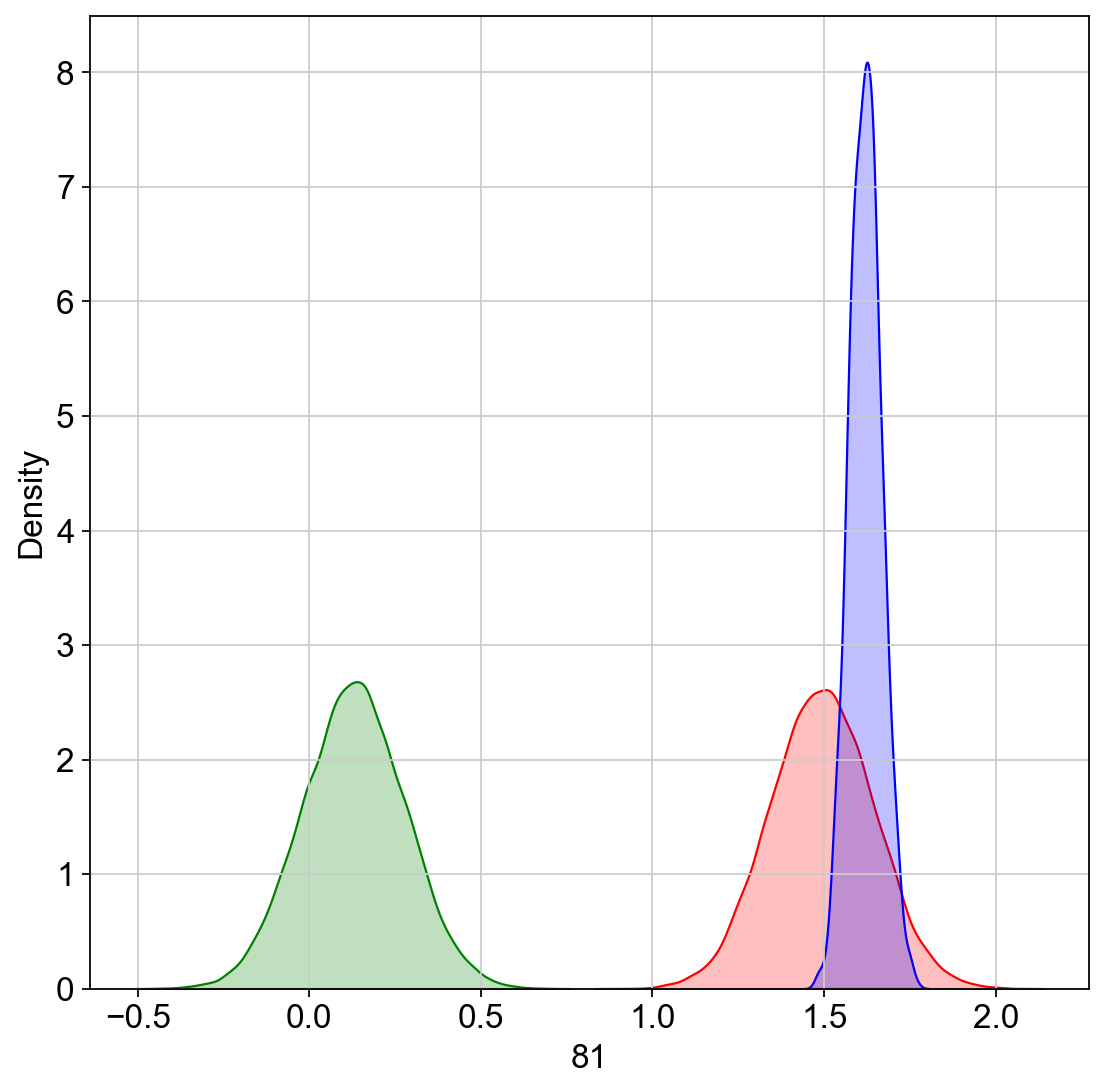

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


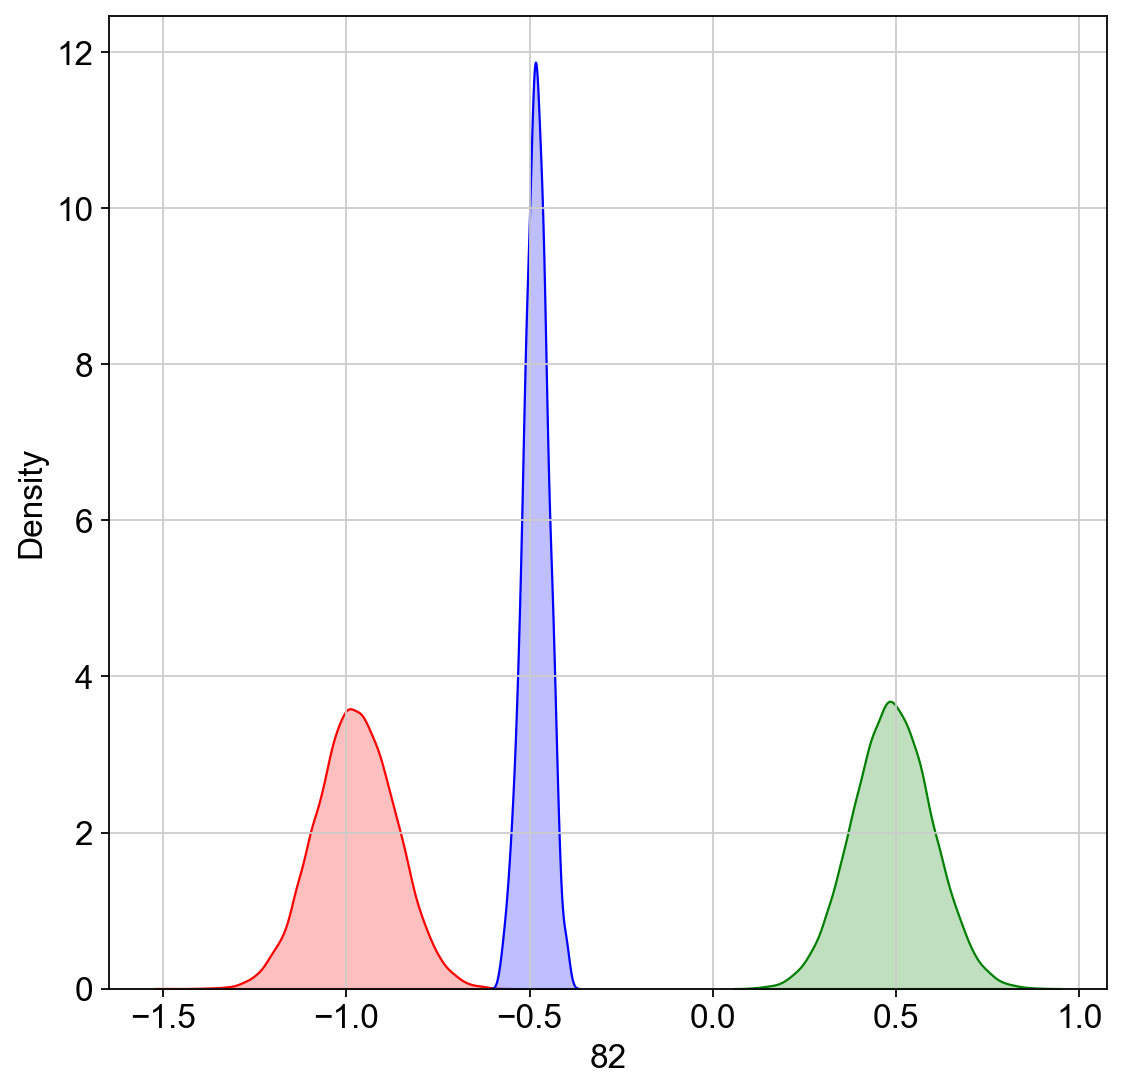

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


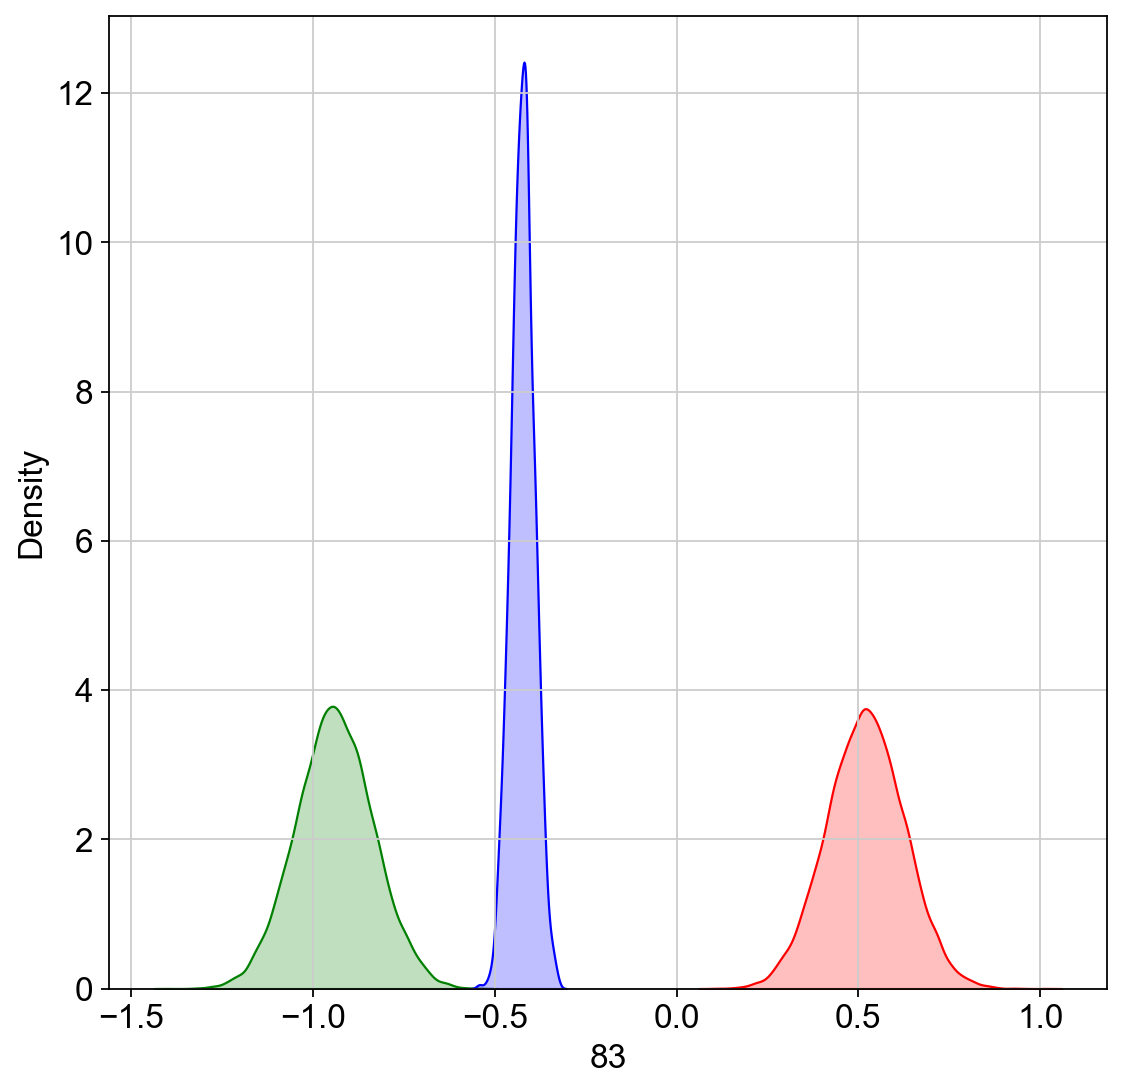

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


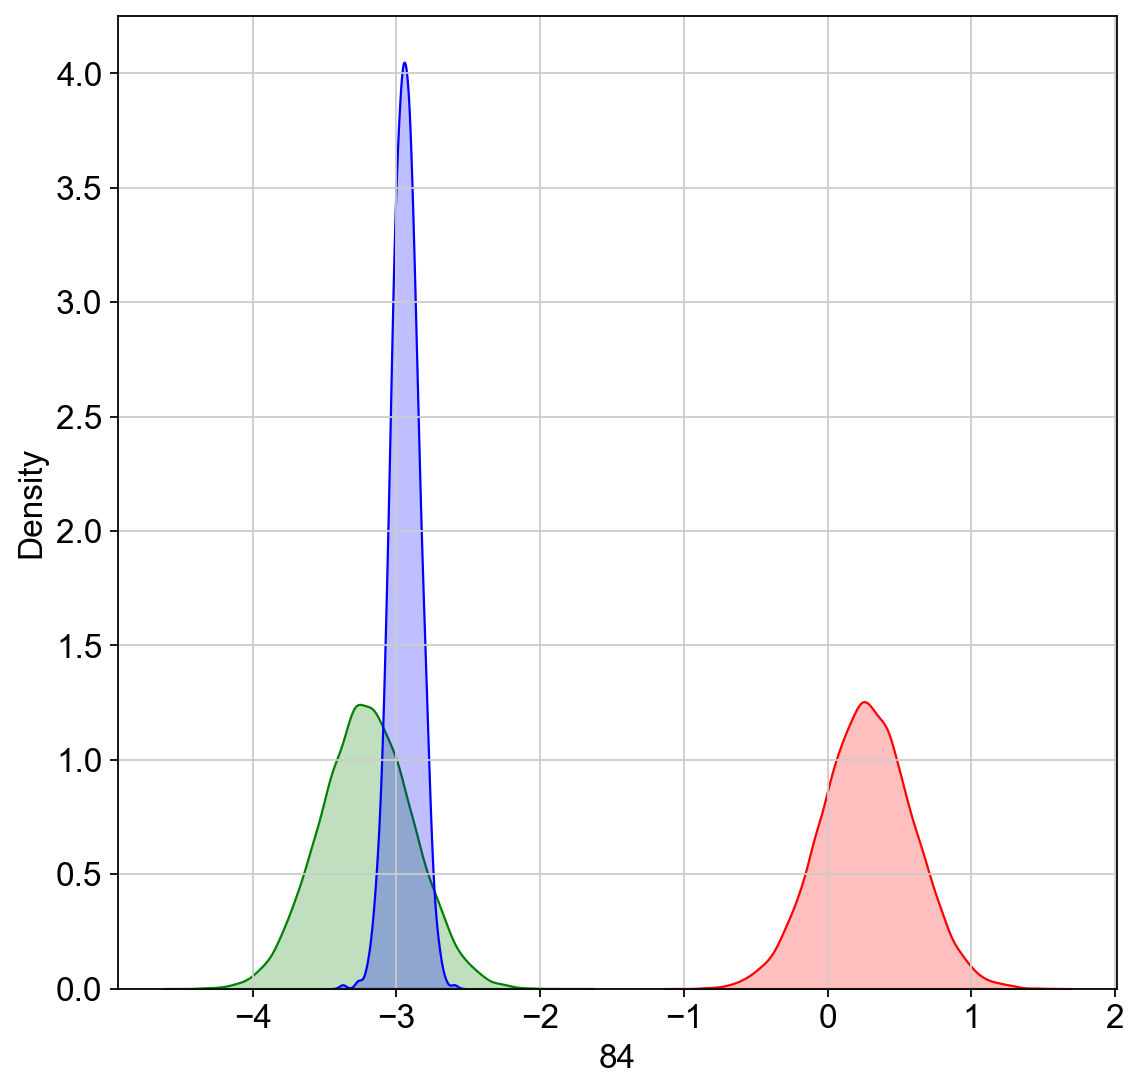

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


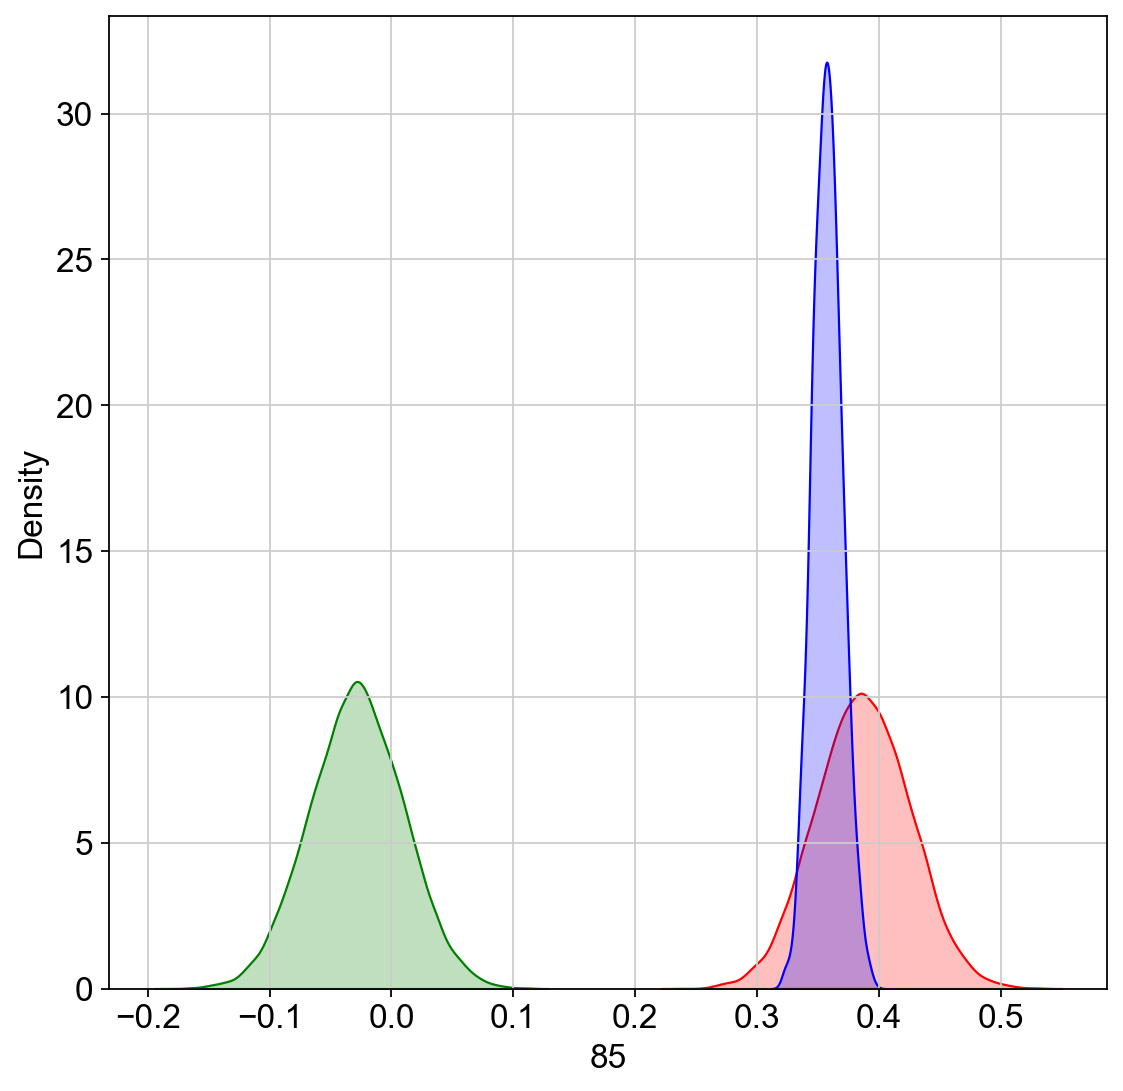

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


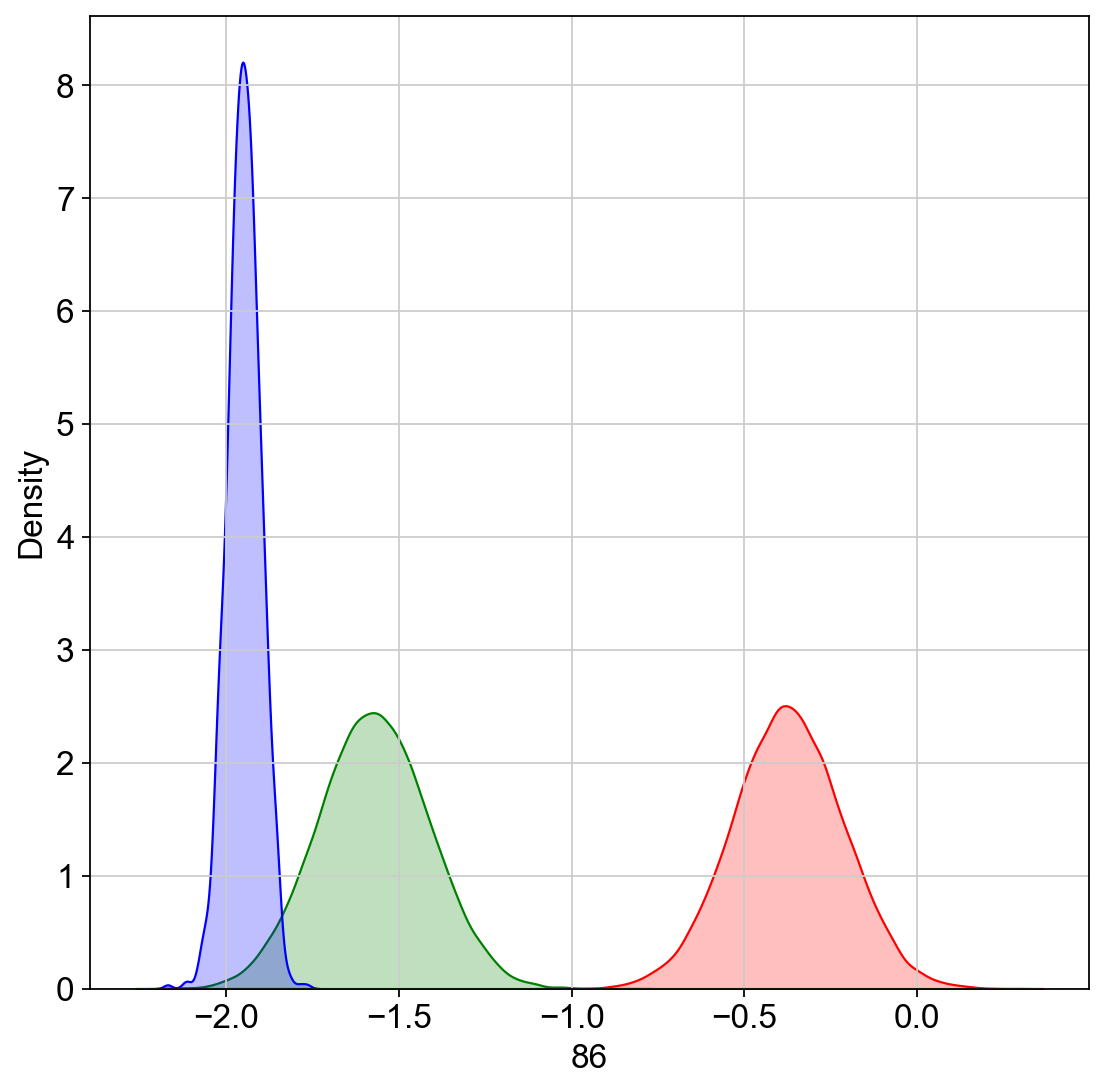

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


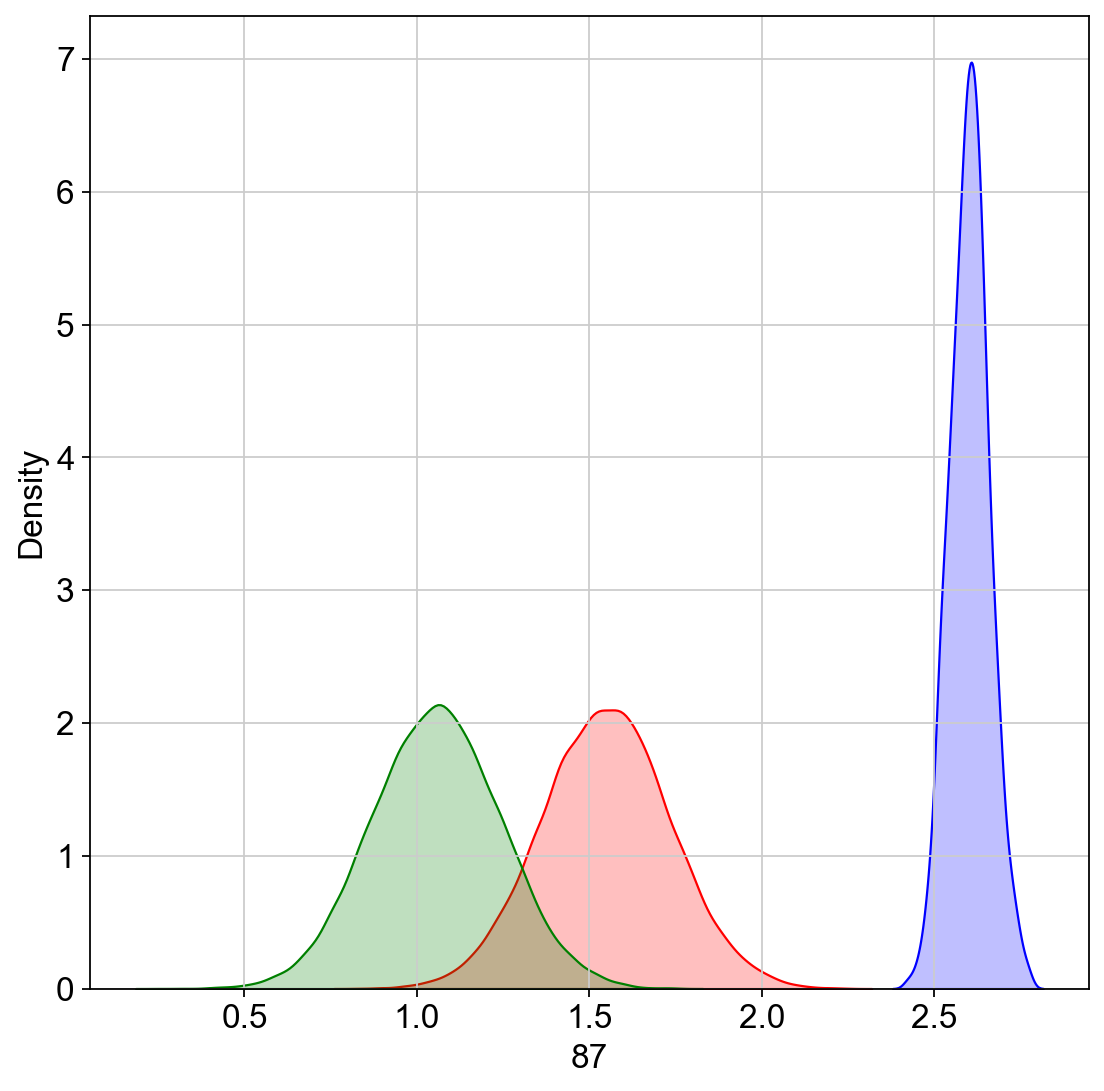

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


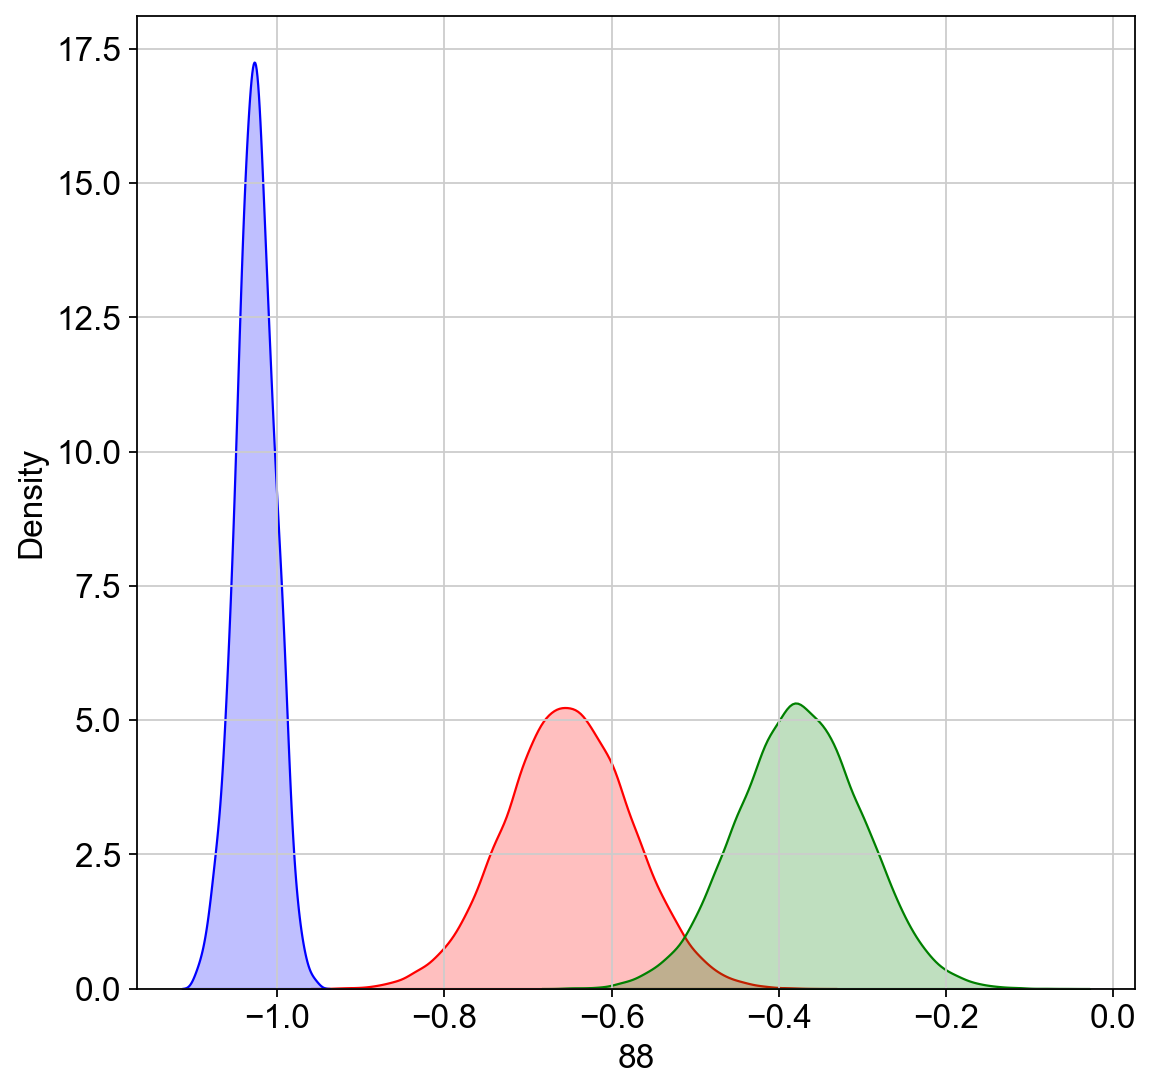

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


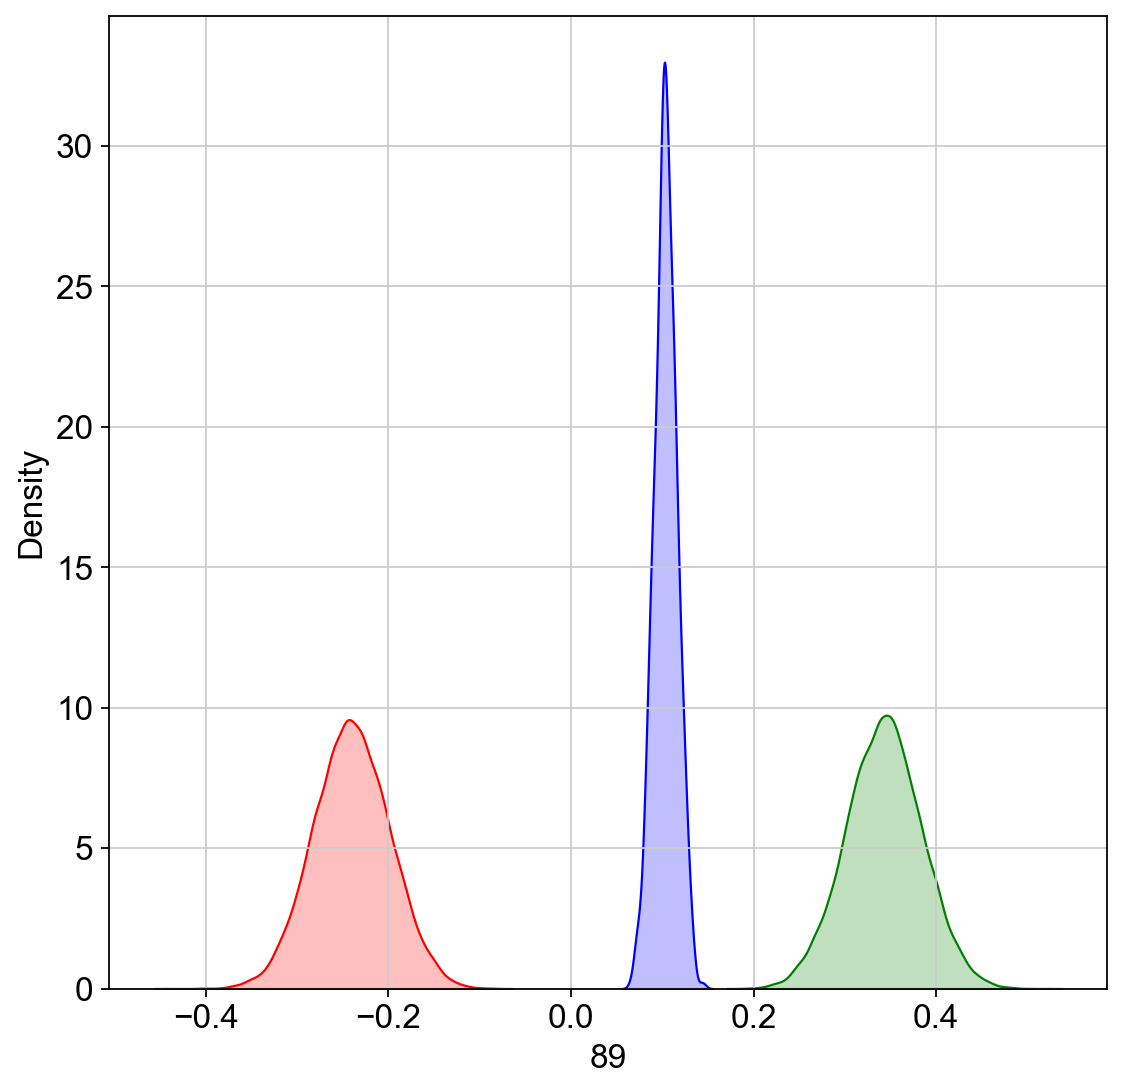

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


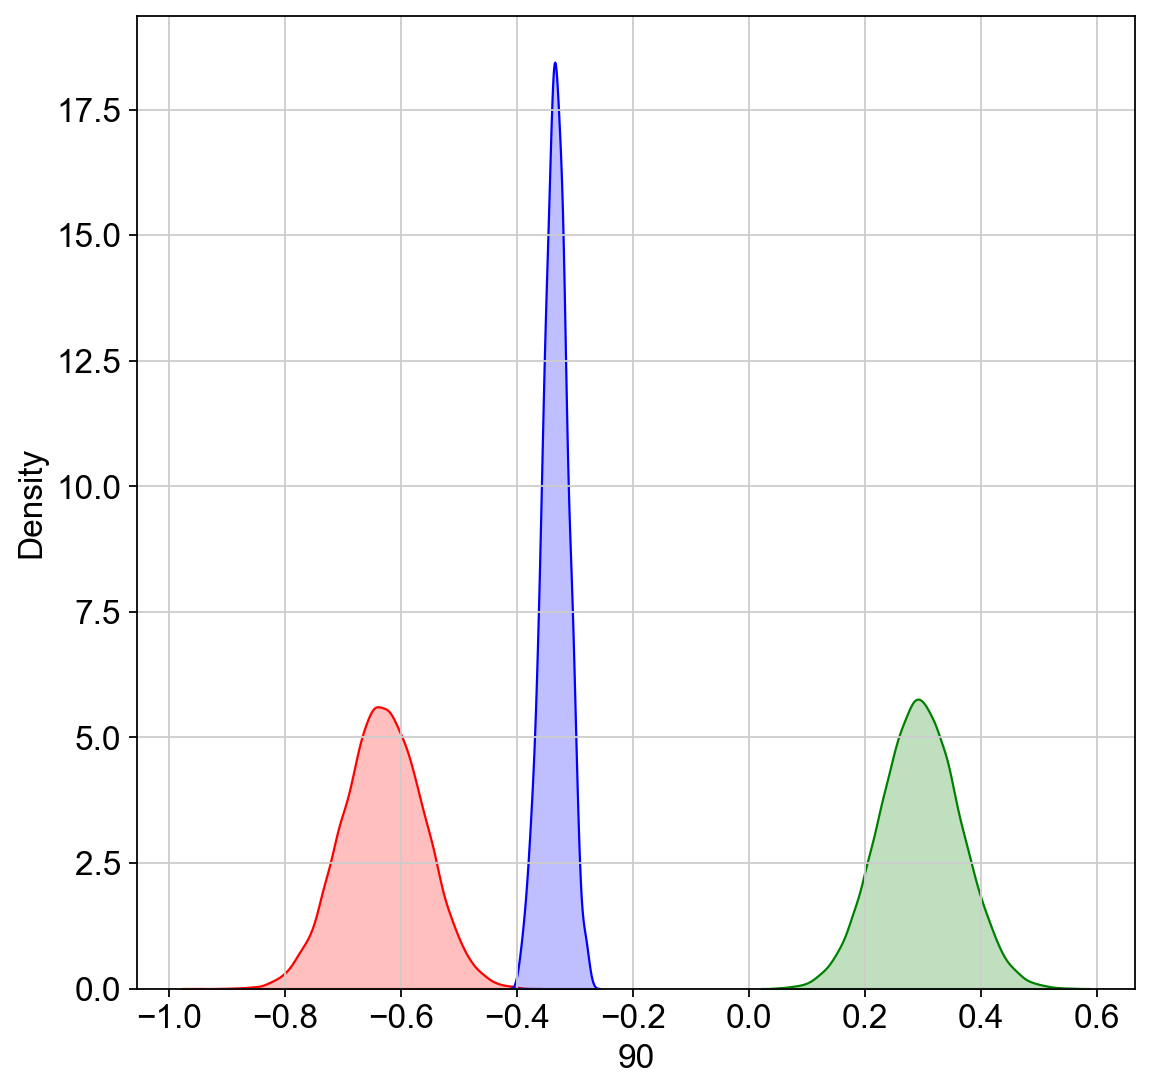

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


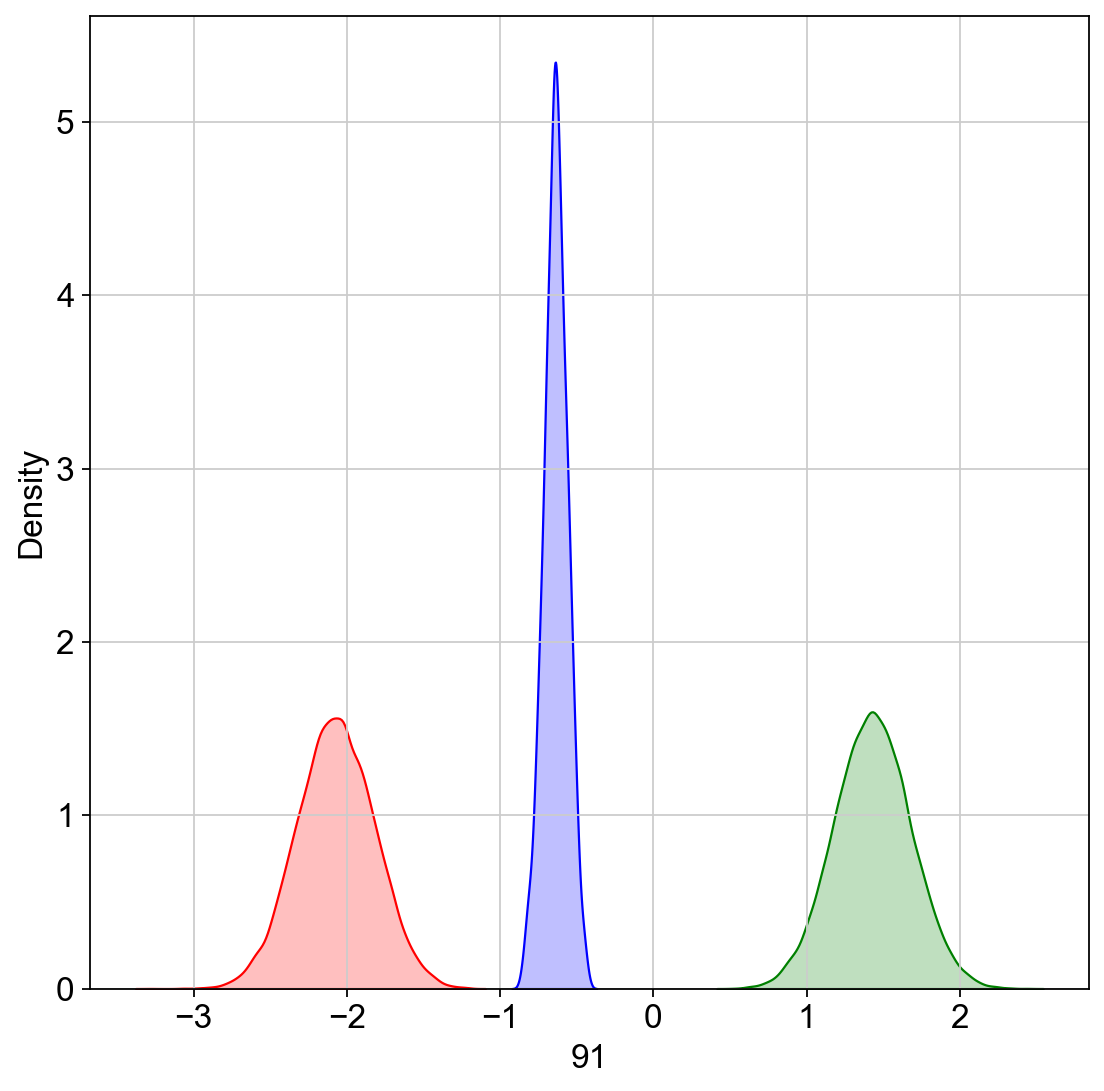

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


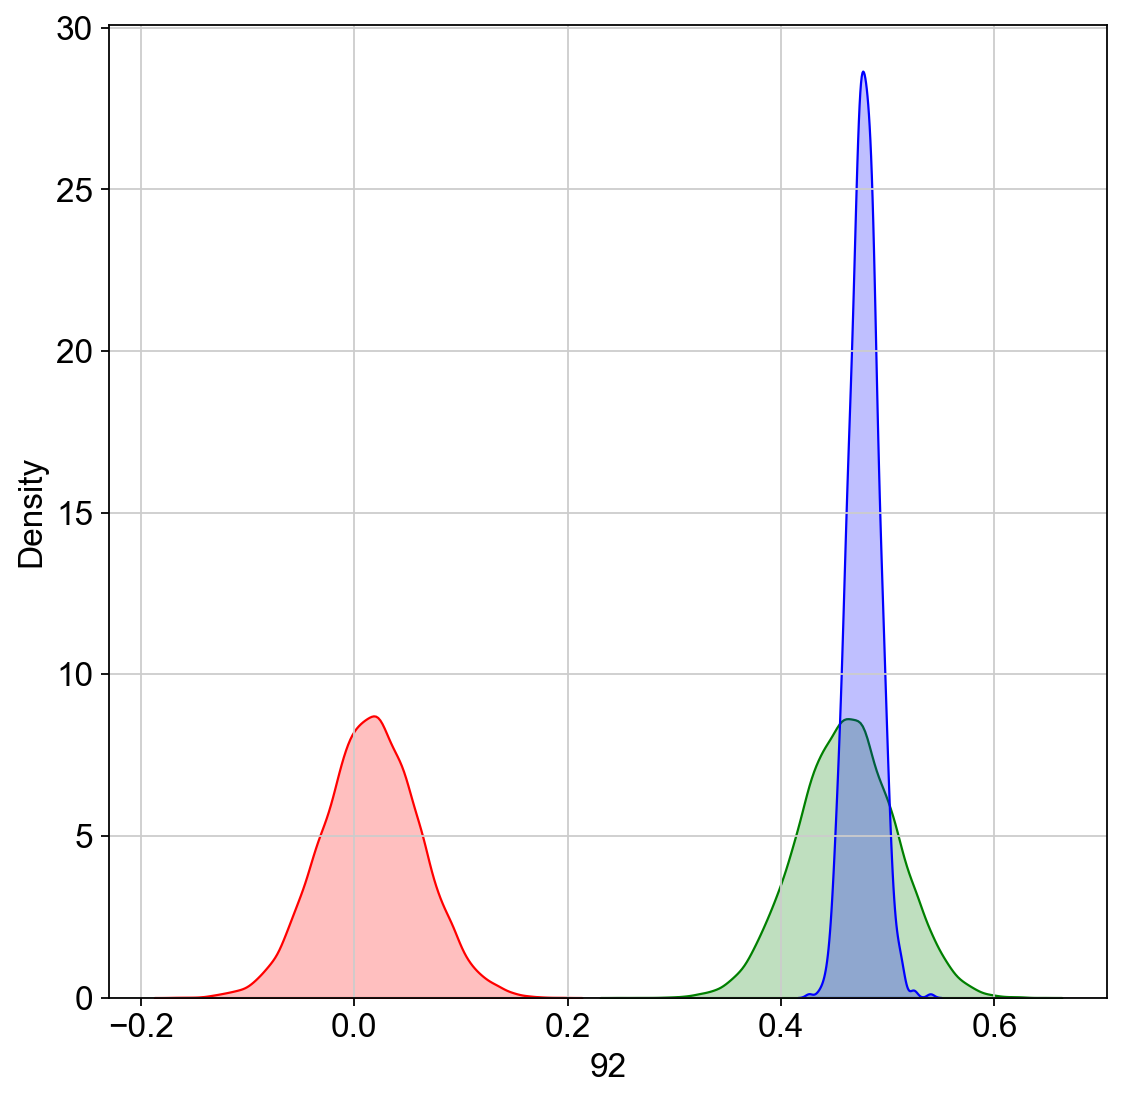

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


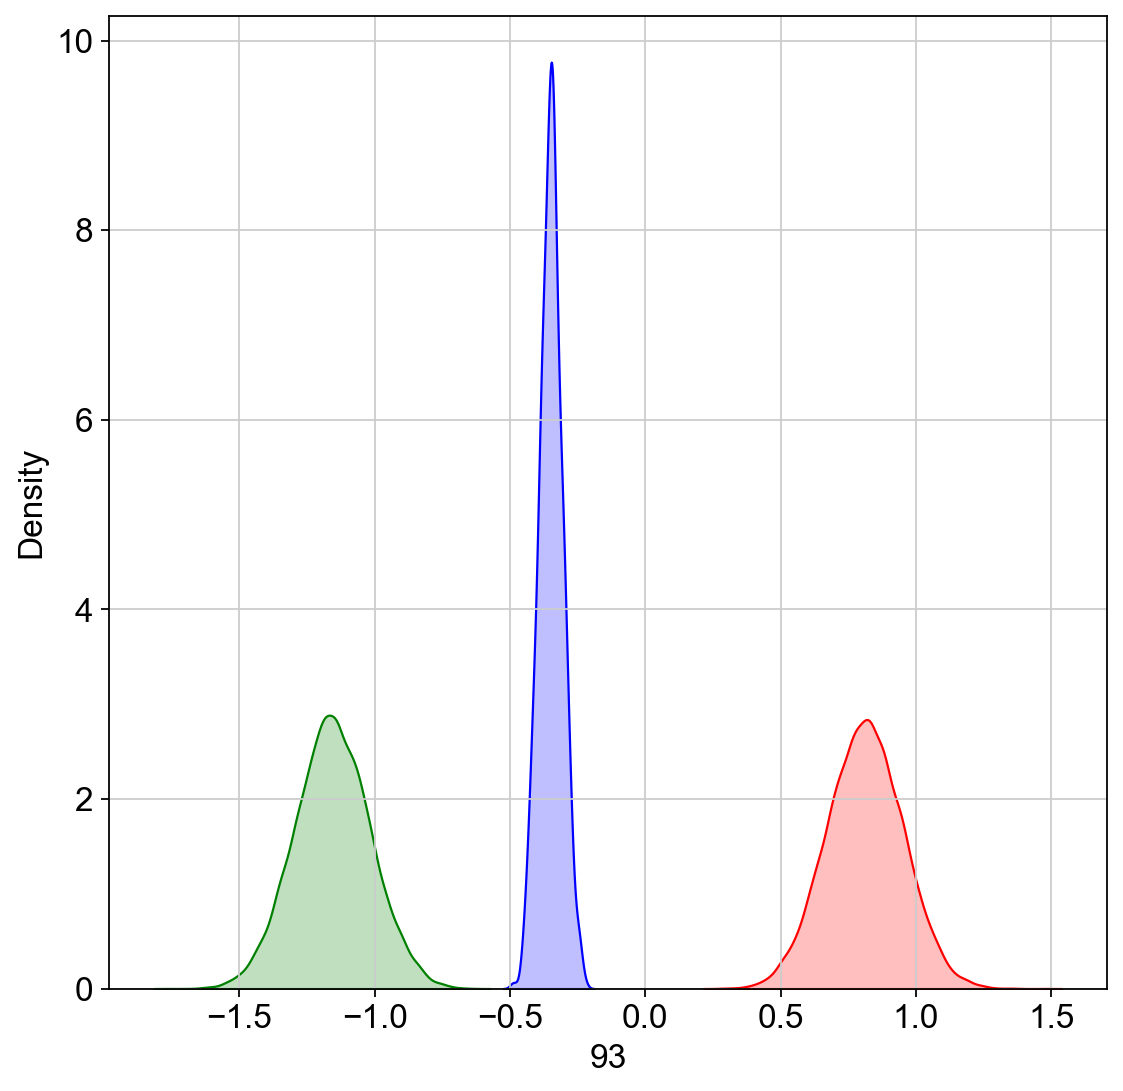

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


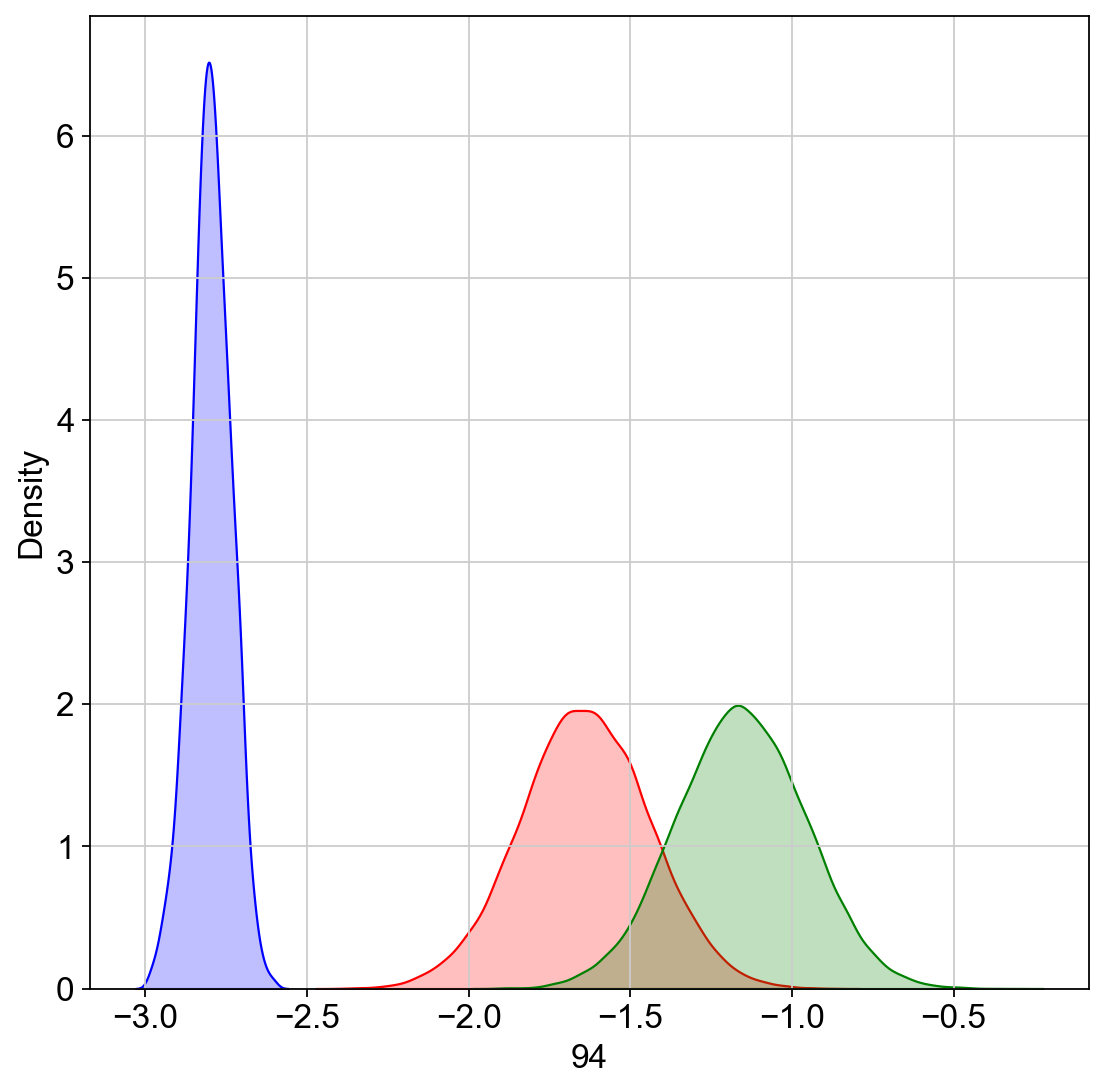

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


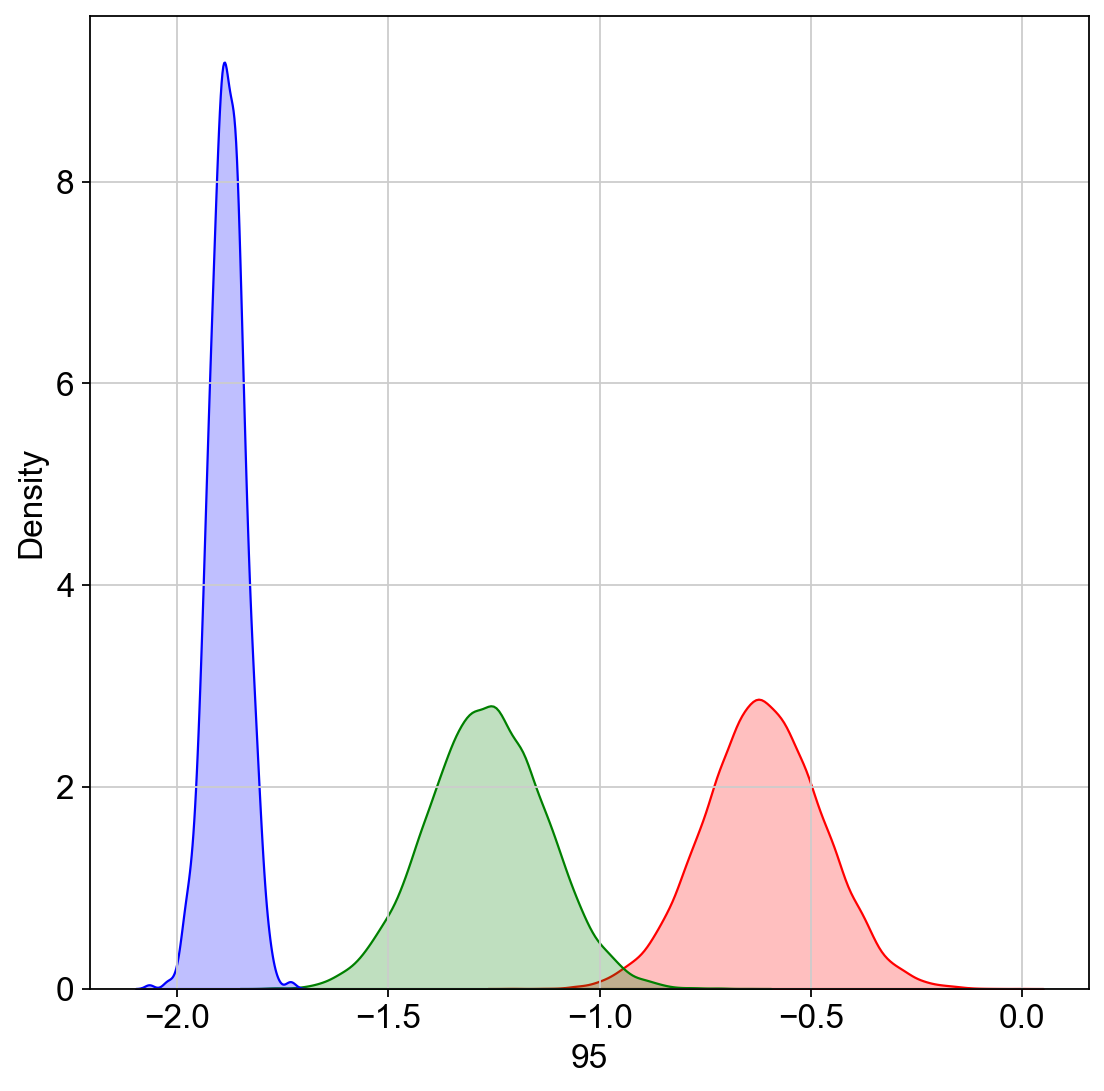

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


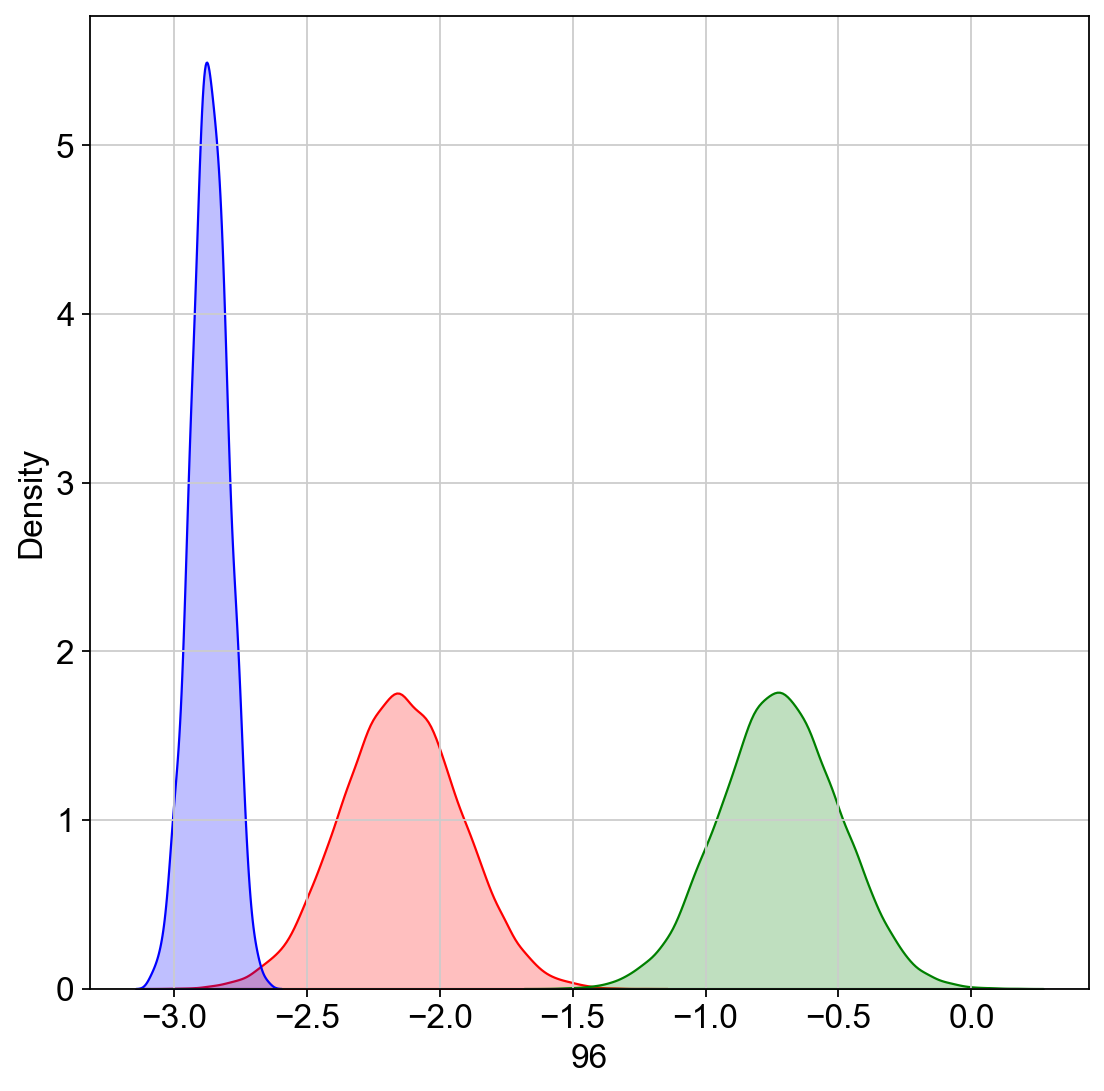

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


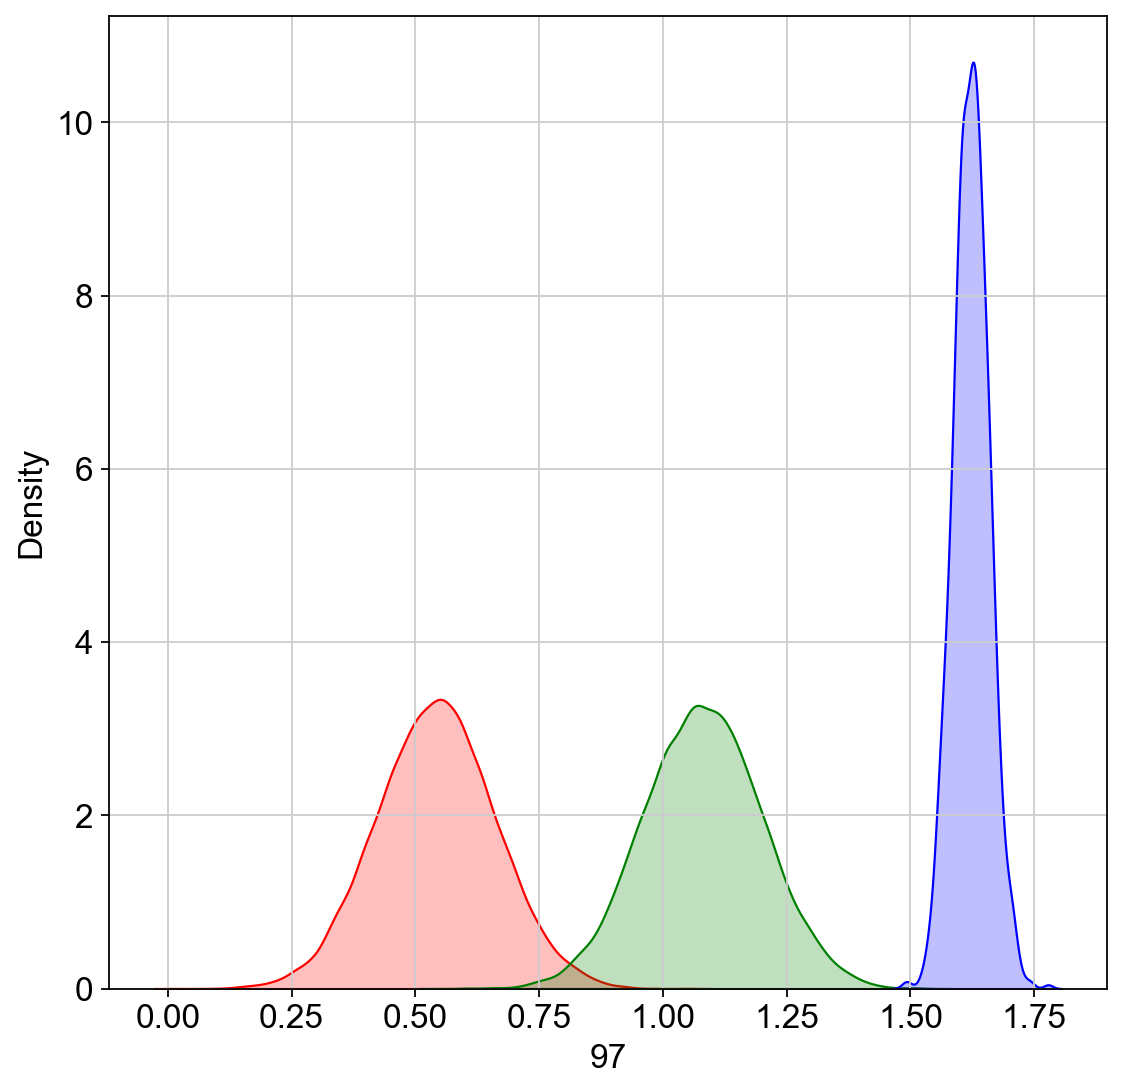

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


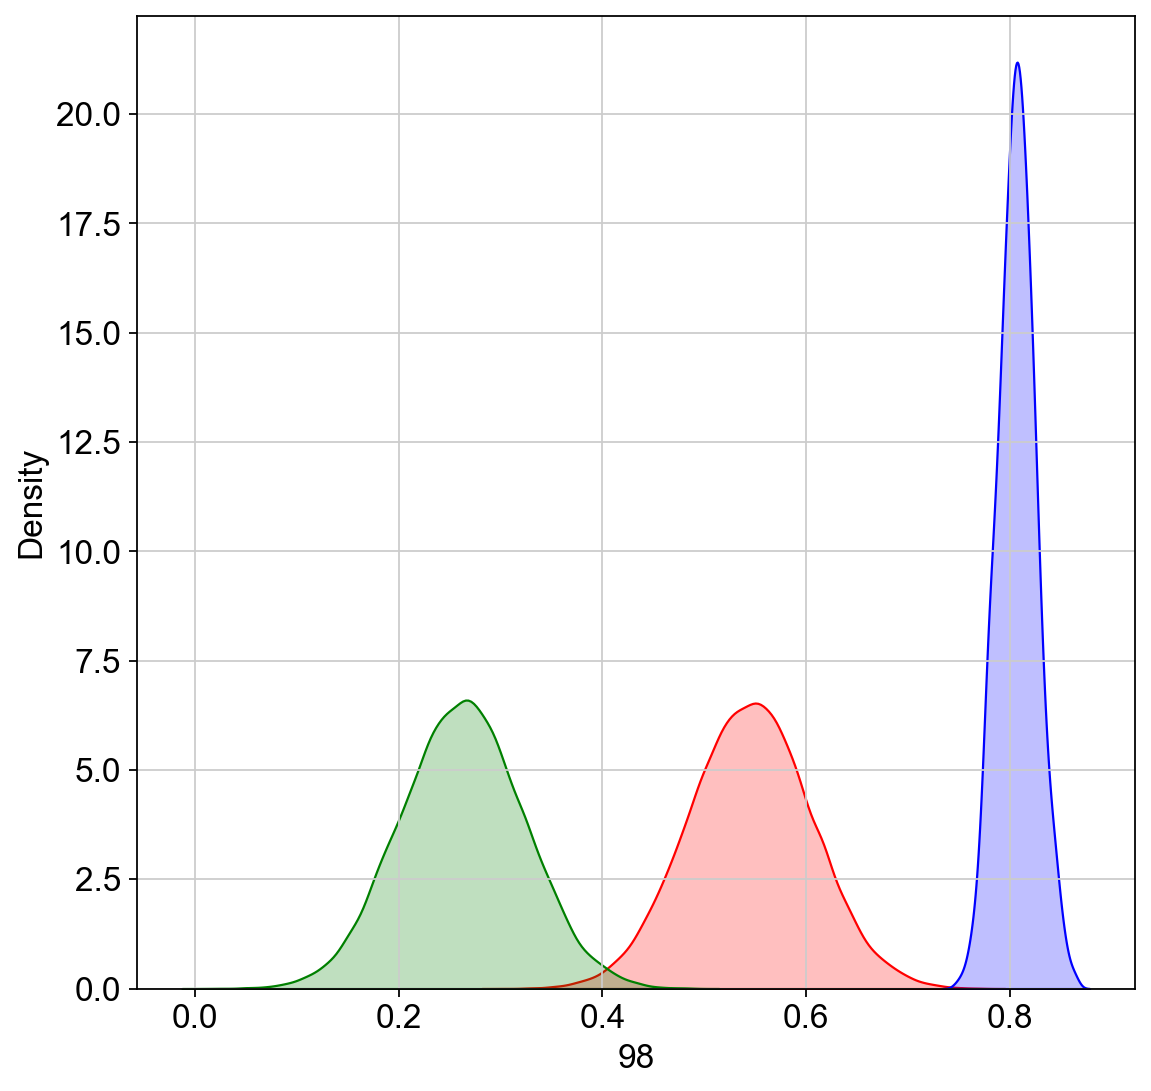

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/361097116.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


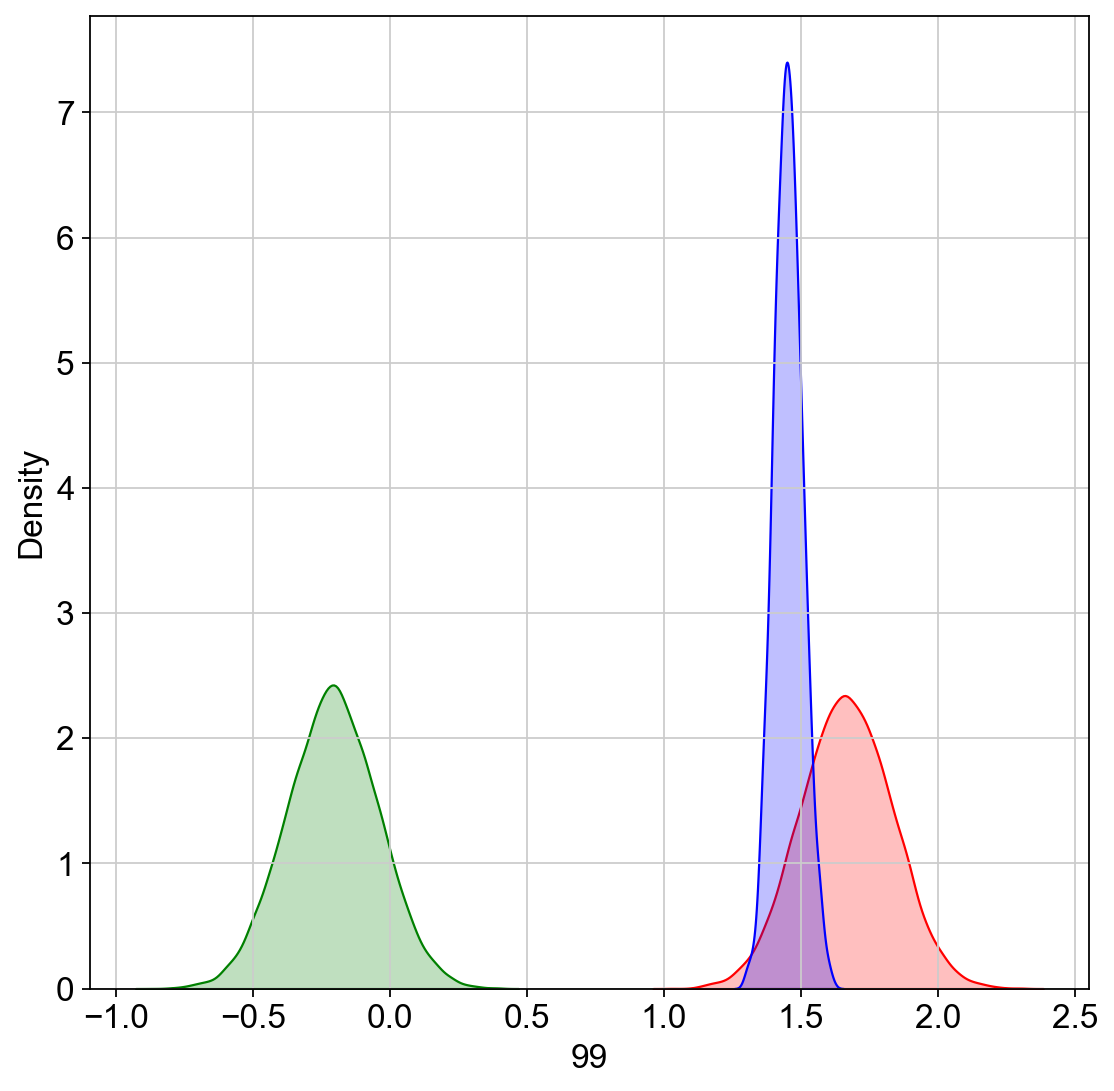

In [7]:
# Load the existing data
existing_data1 = adata[:N,:].to_df()
existing_data2 = adata[N:2*N,:].to_df()

# Convert high dim data to pandas DataFrame
simulation_data = adata[2*N:,:].to_df()

for col in existing_data1.columns:
    sns.kdeplot(existing_data1[col], shade=True, color='red')
    sns.kdeplot(existing_data2[col], shade=True, color='green')
    sns.kdeplot(simulation_data[col], shade=True, color='blue')
#     plt.scatter(simulation_data[col], np.zeros_like(simulation_data[col]), color='red', s=10, alpha=0.5)
    plt.xlabel(col)
    plt.show()

In [8]:
selected_genes_seed1 = ['1', '2', '7', '11', '13', '14', '18', '29', '38', '43', '52', '56' ,'69',
                        '73', '81', '84', '85', '92', '99']
selected_genes_seed2 = ['1', '8', '14', '20', '26']



selected_genes = selected_genes_seed1

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


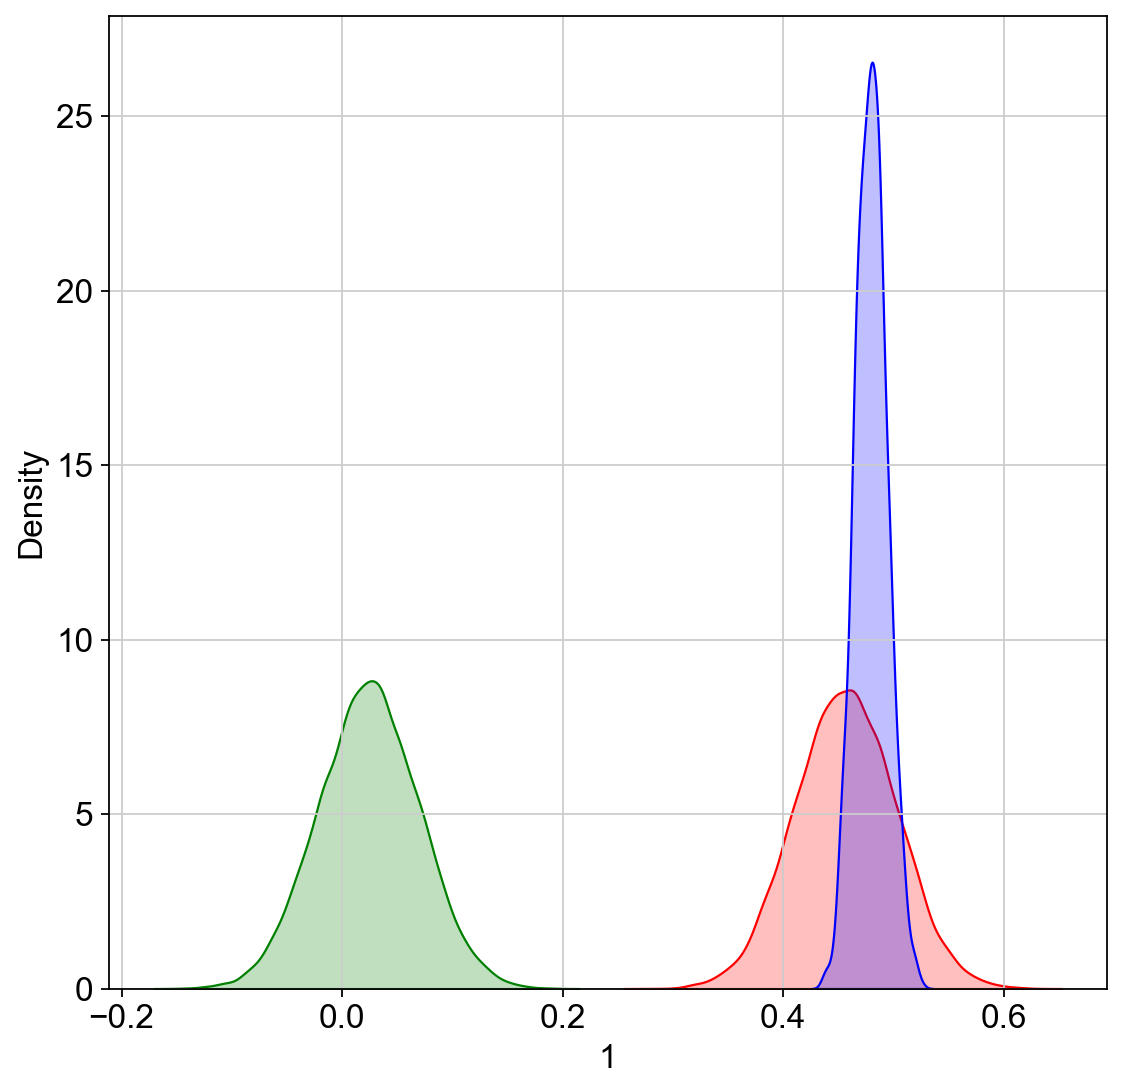

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


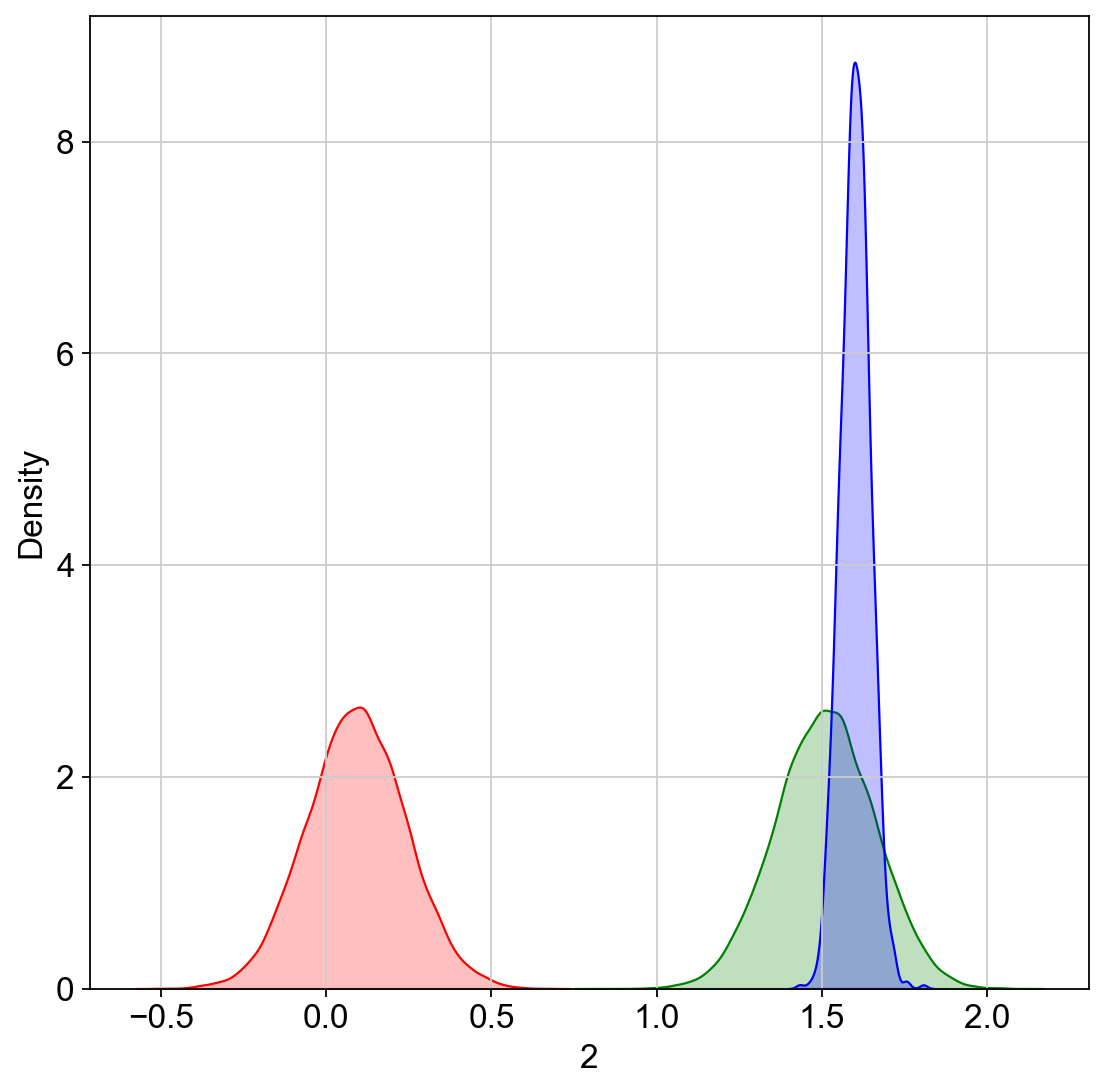

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


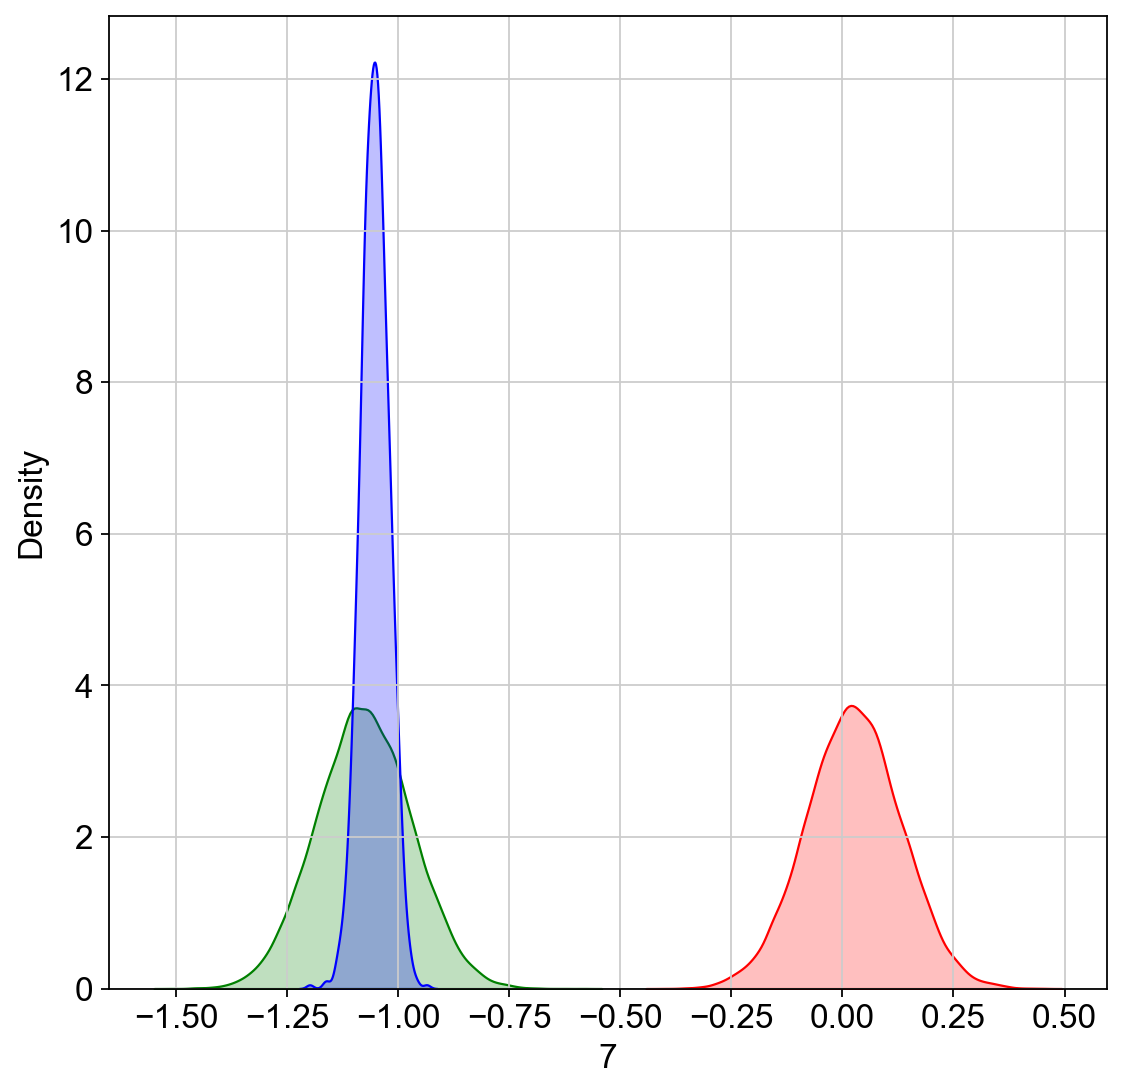

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


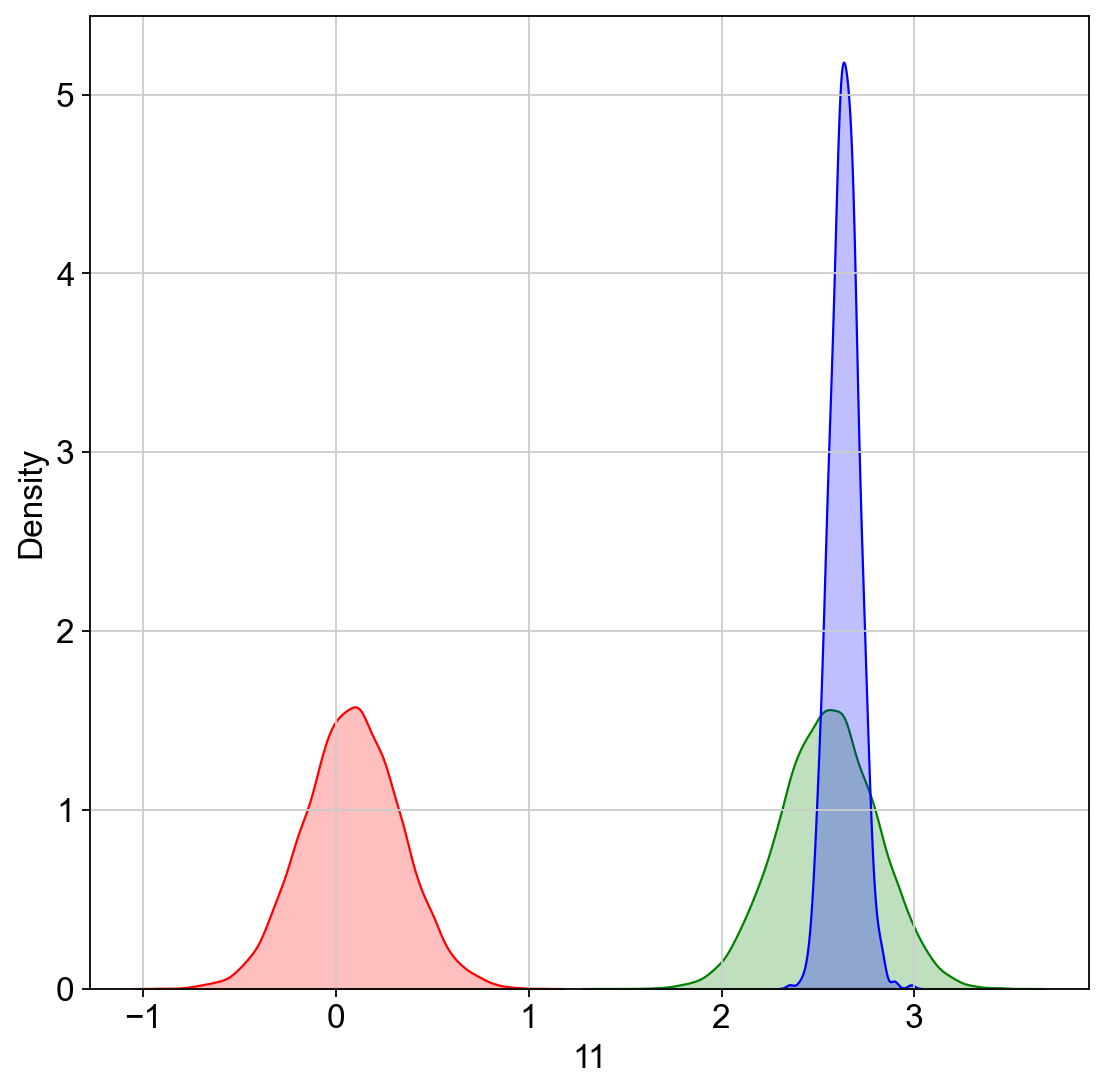

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


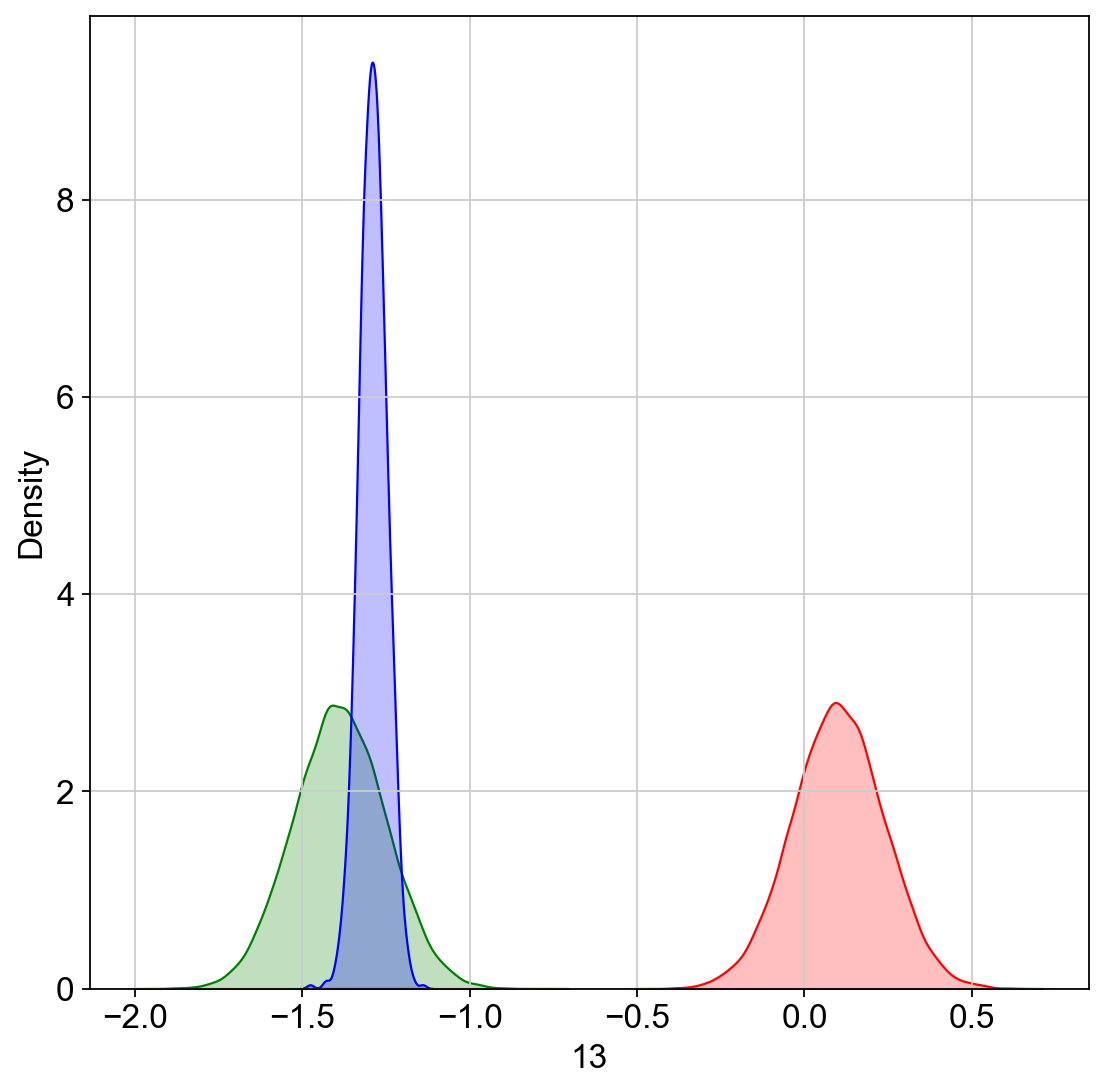

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


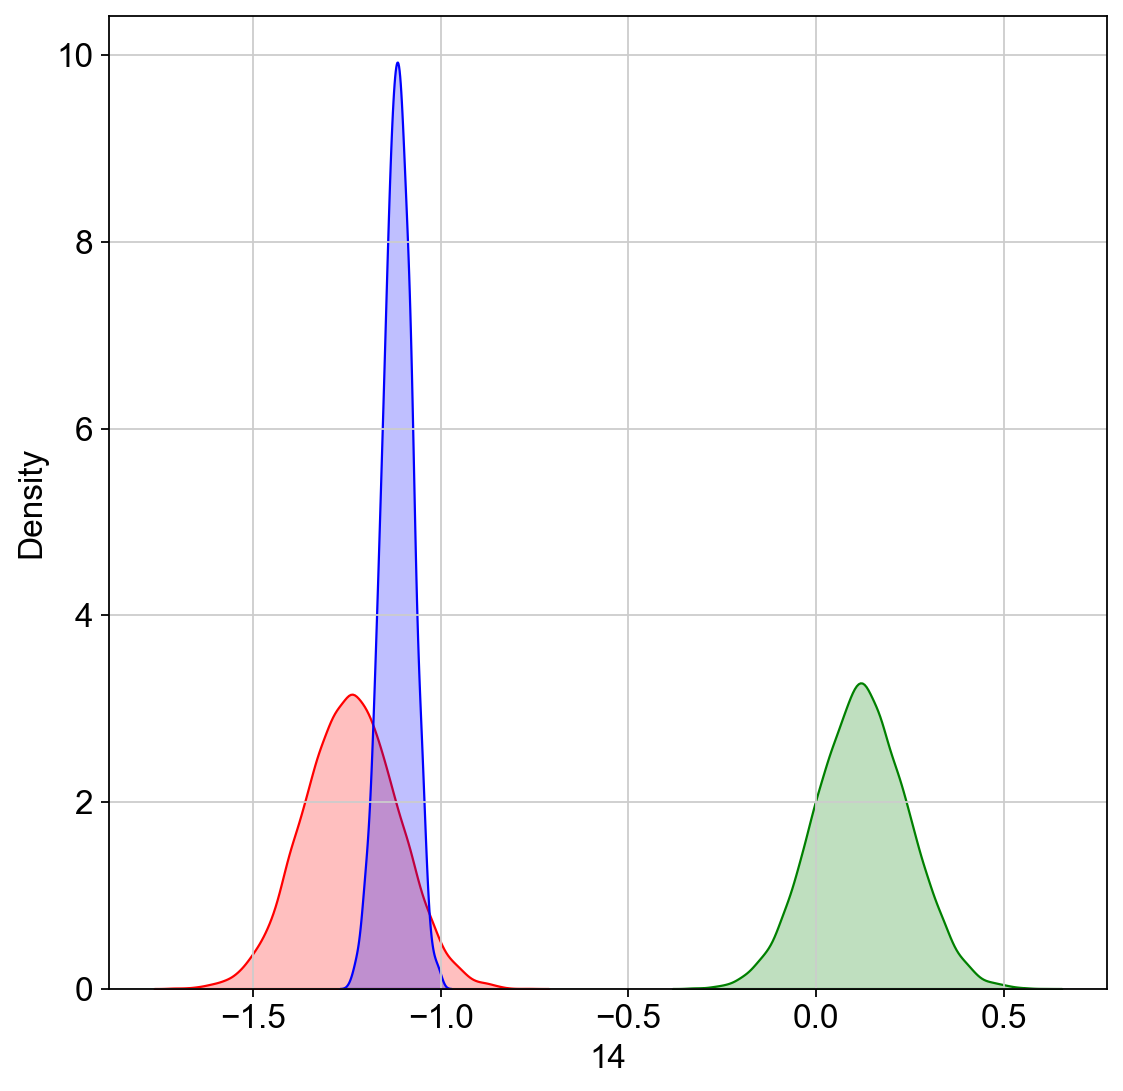

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


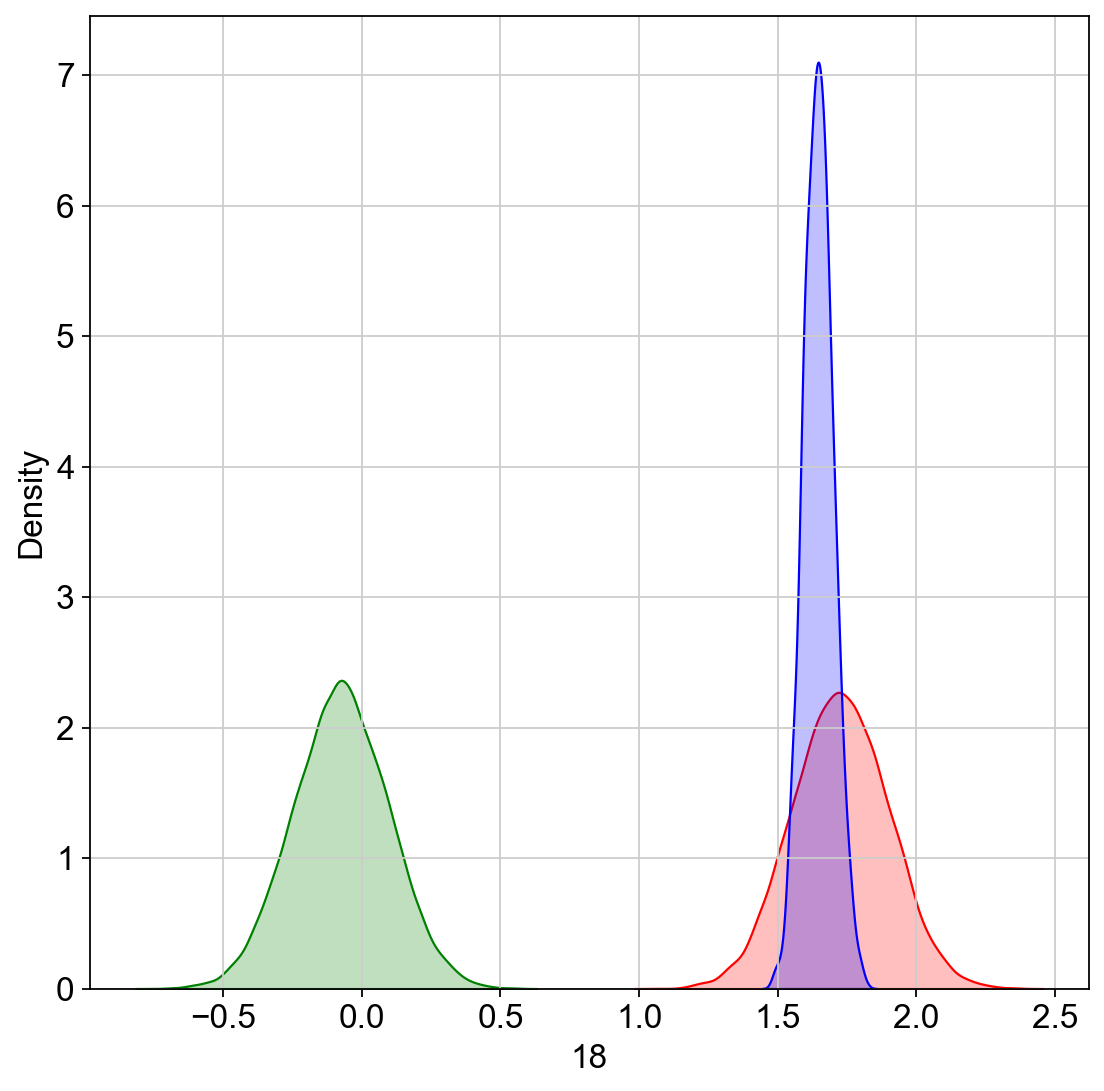

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


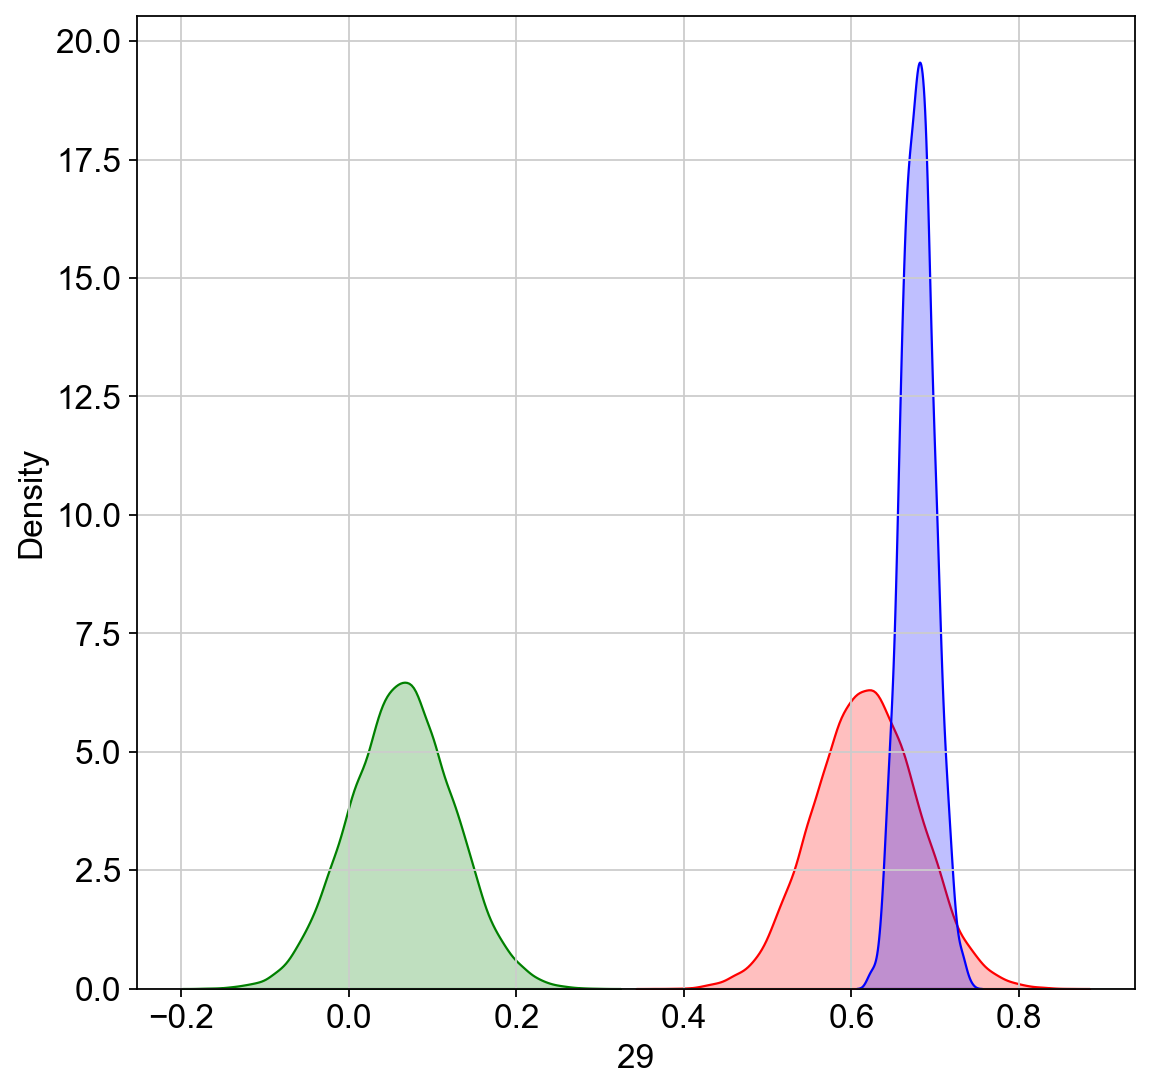

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


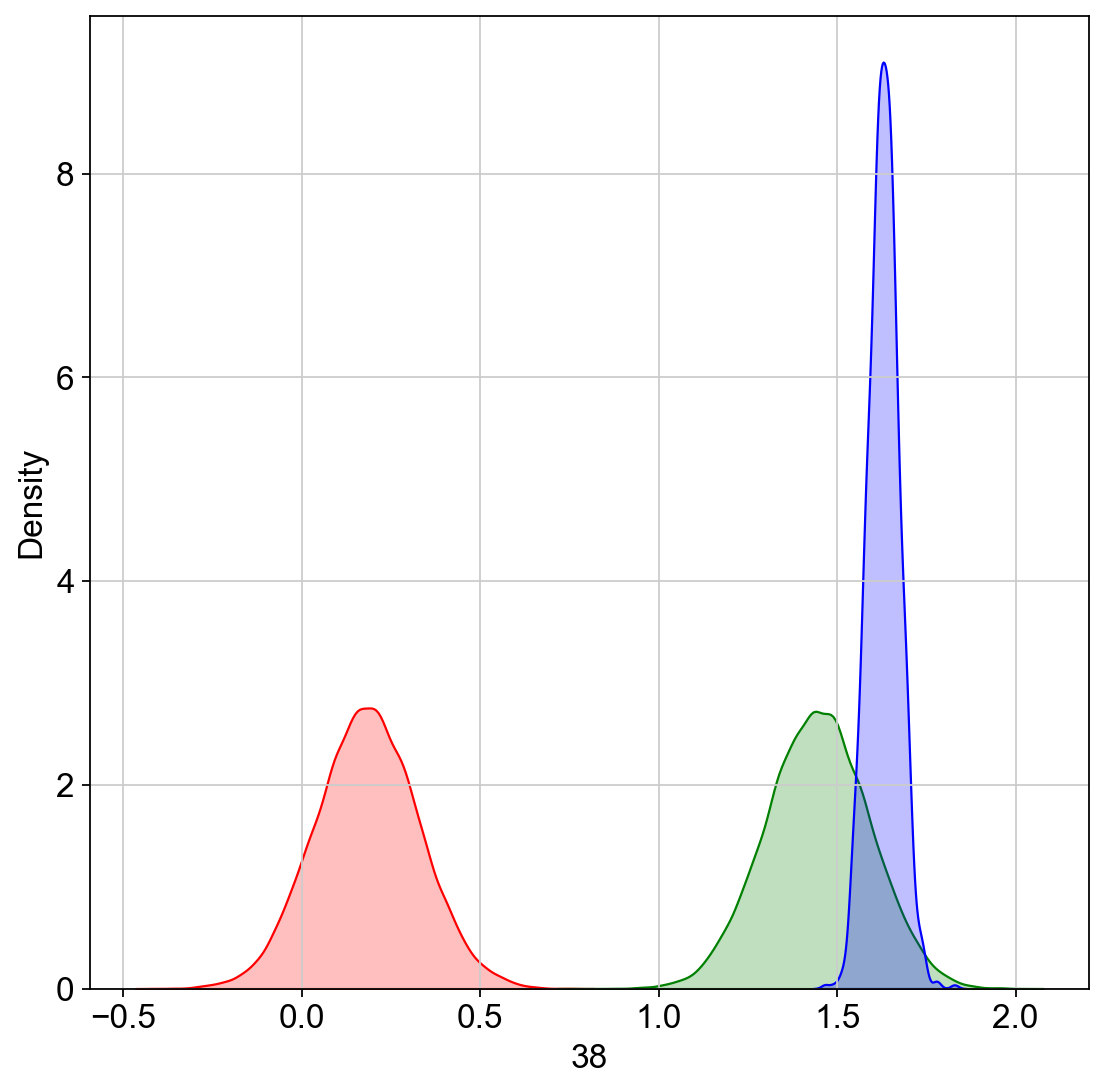

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


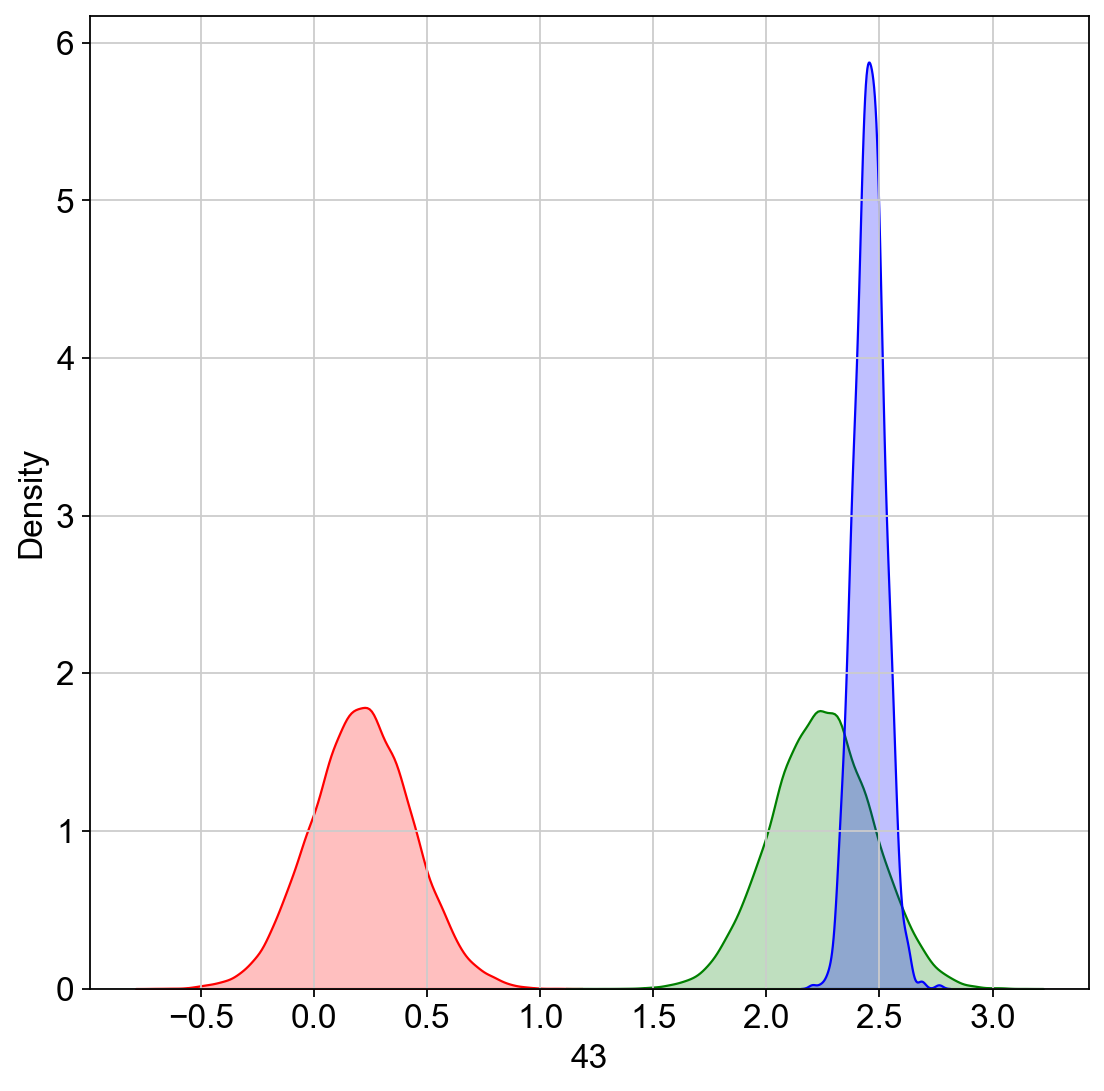

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


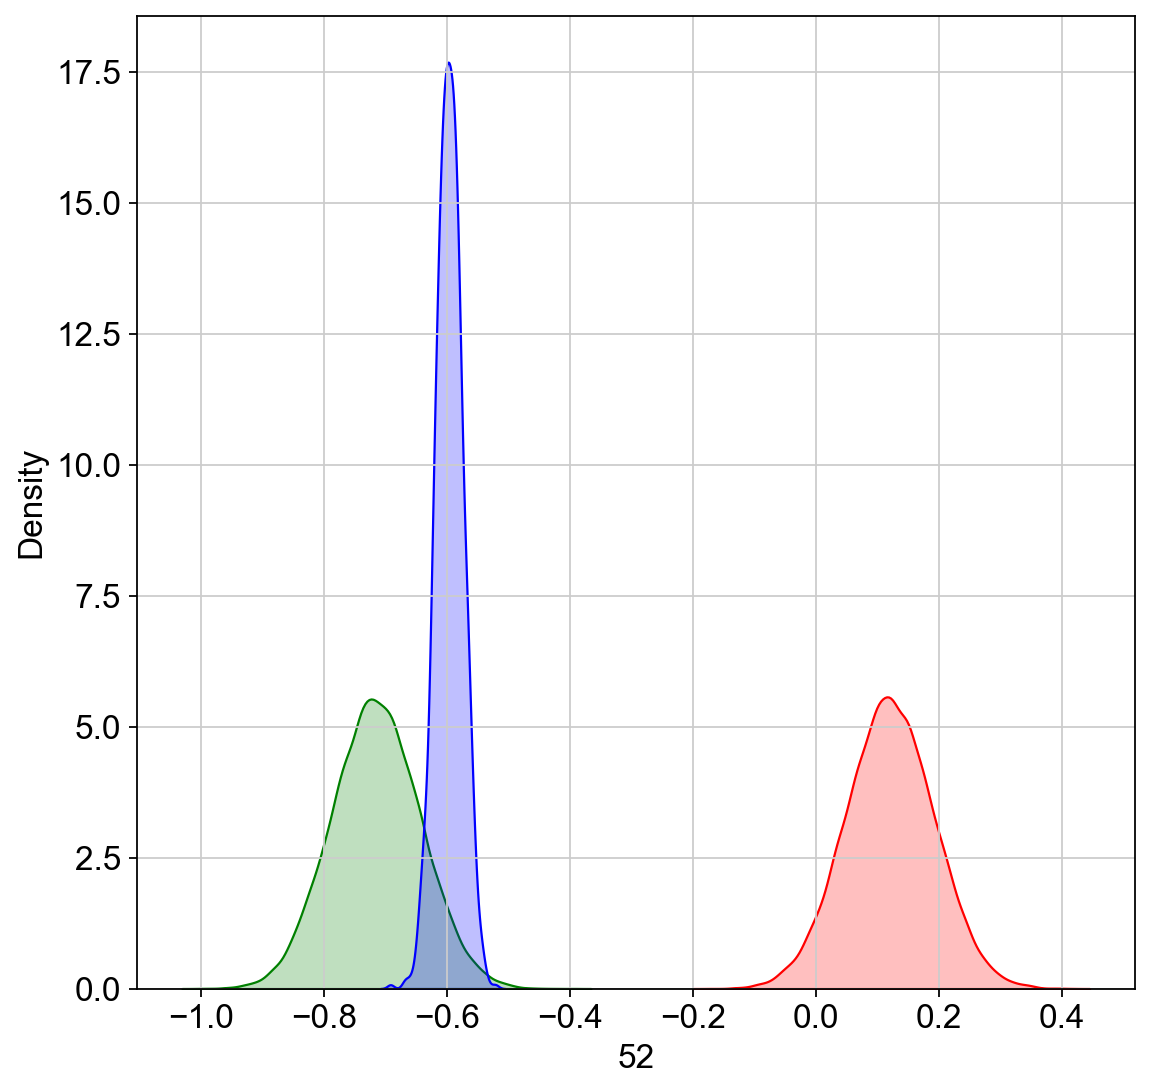

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


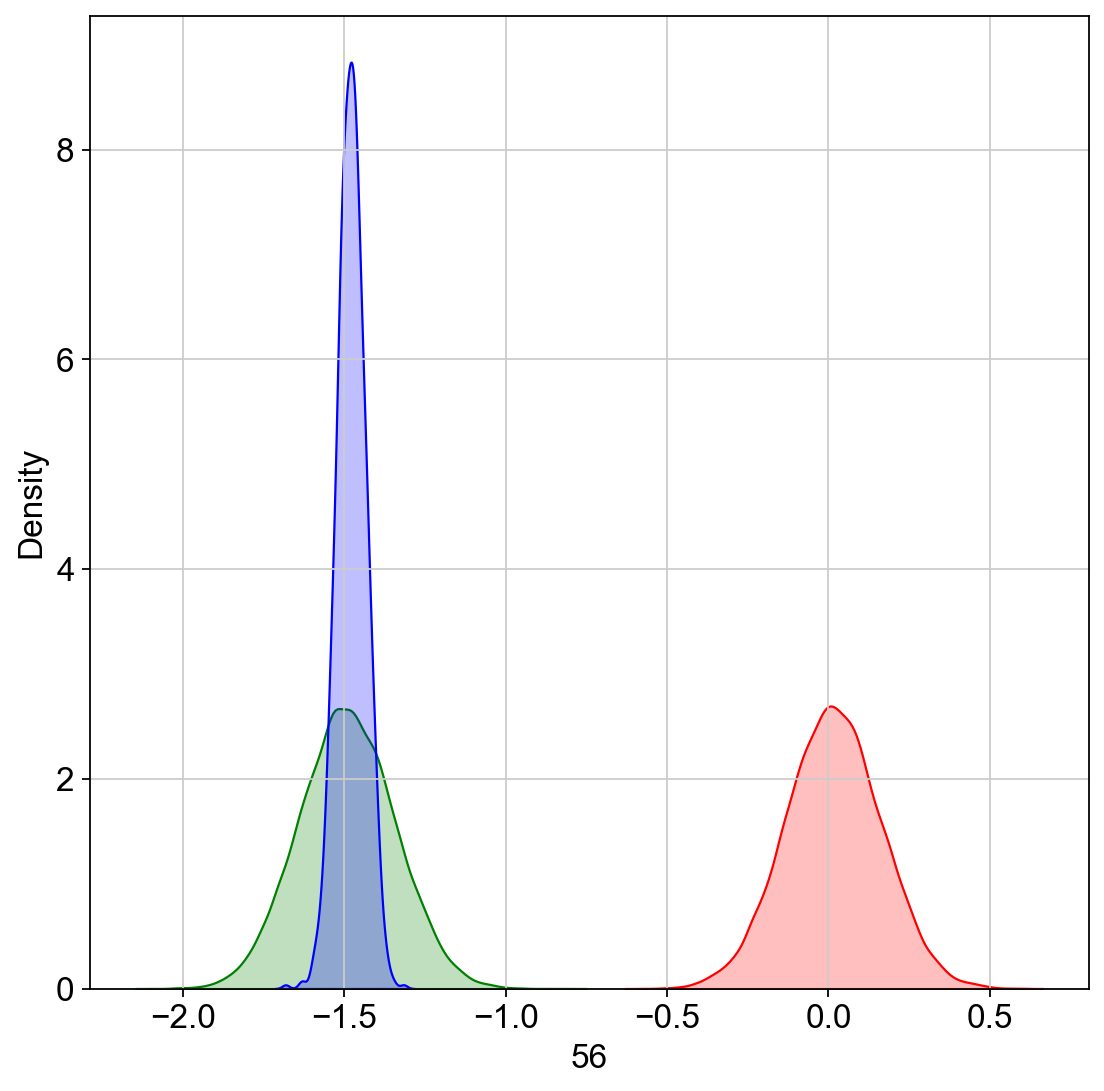

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


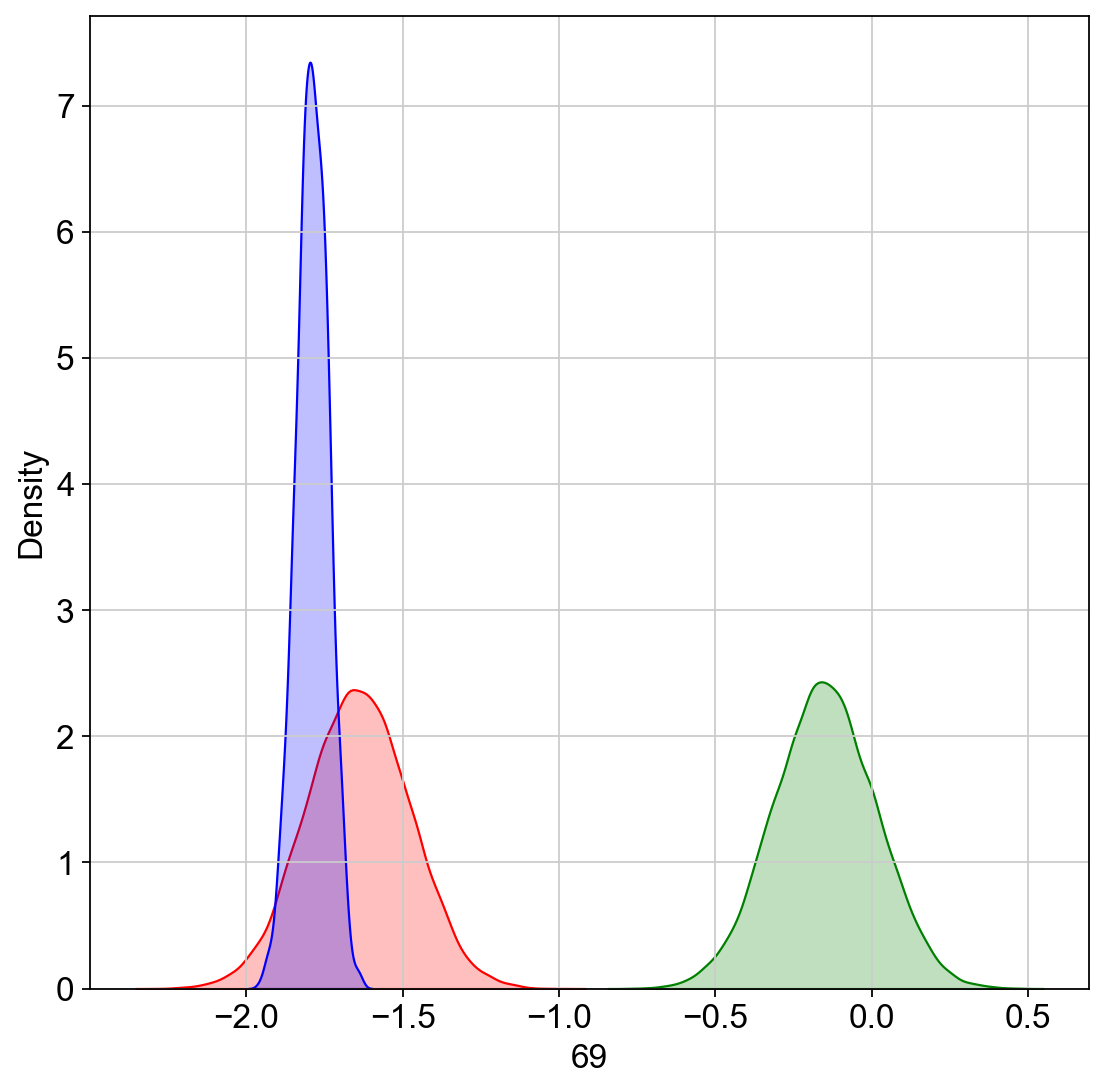

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


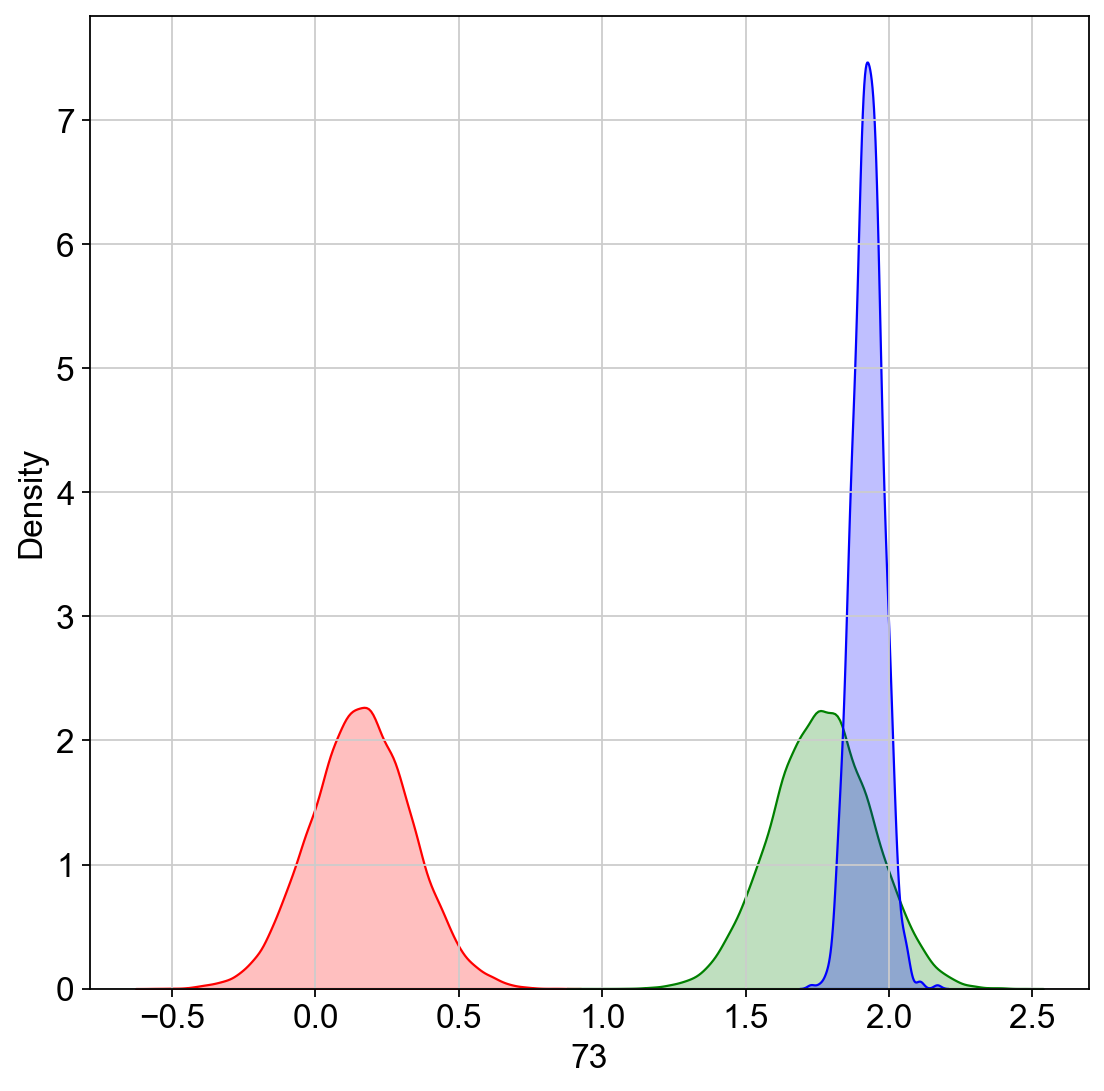

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


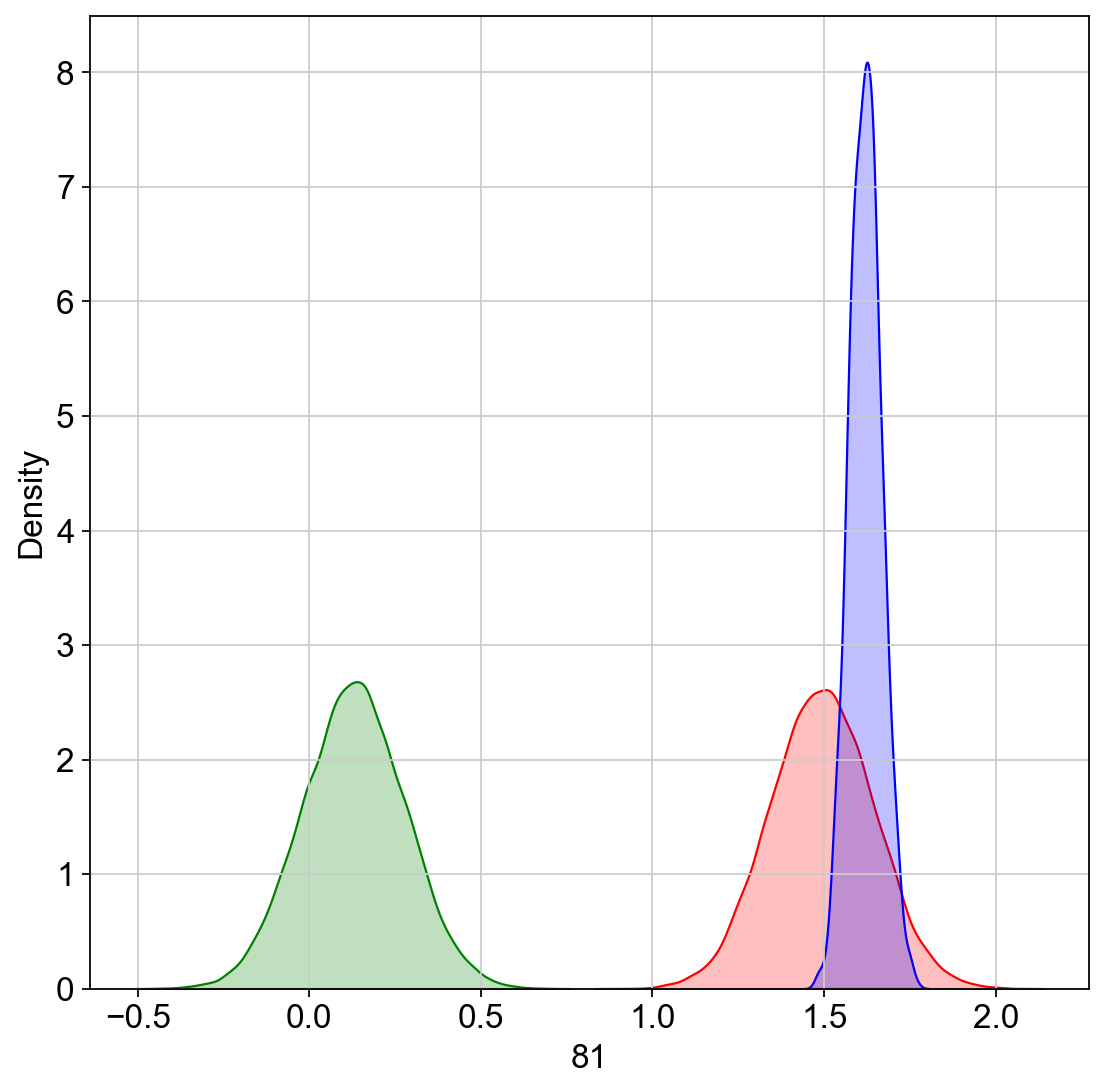

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


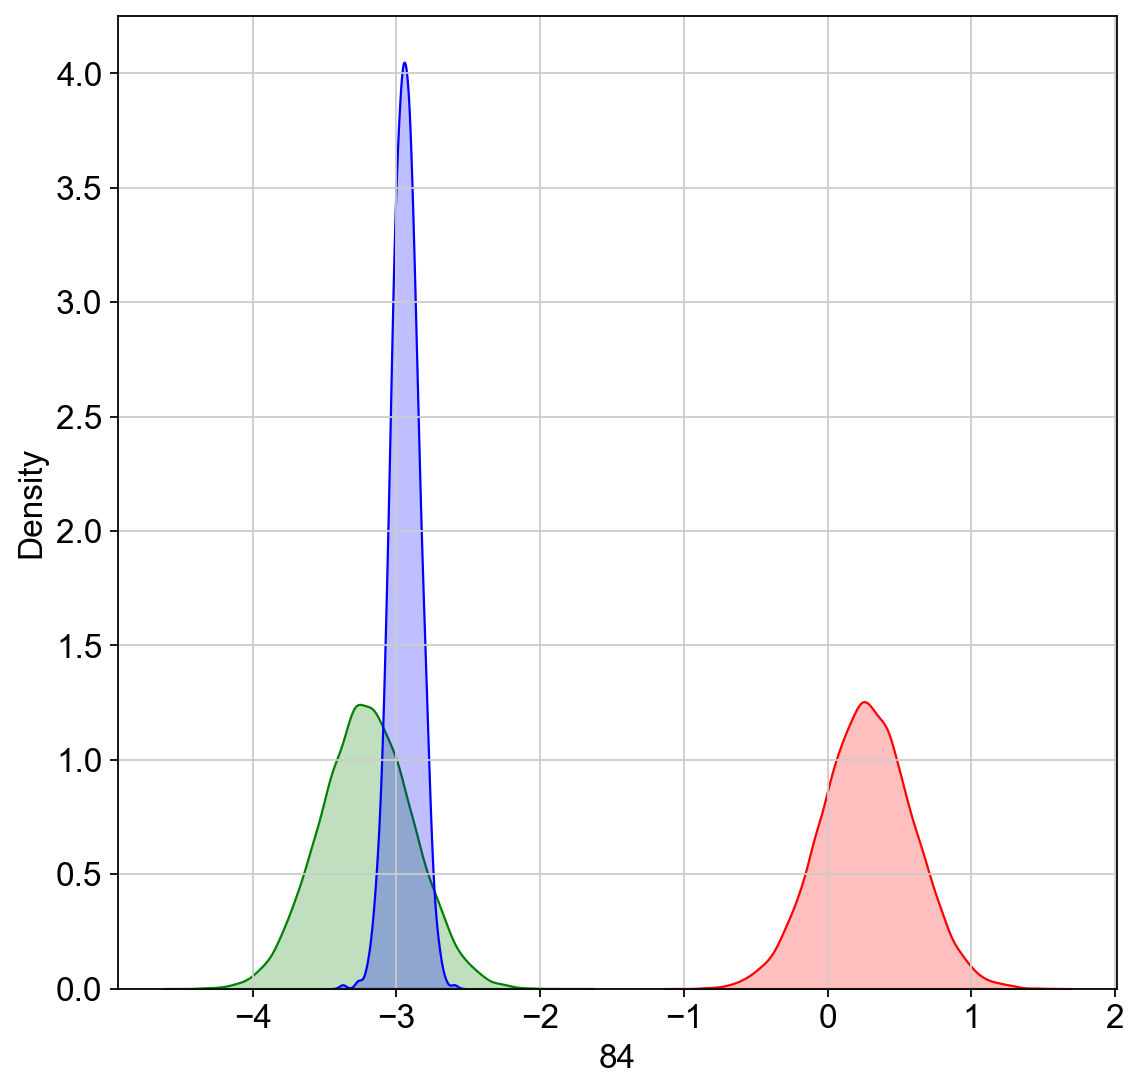

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


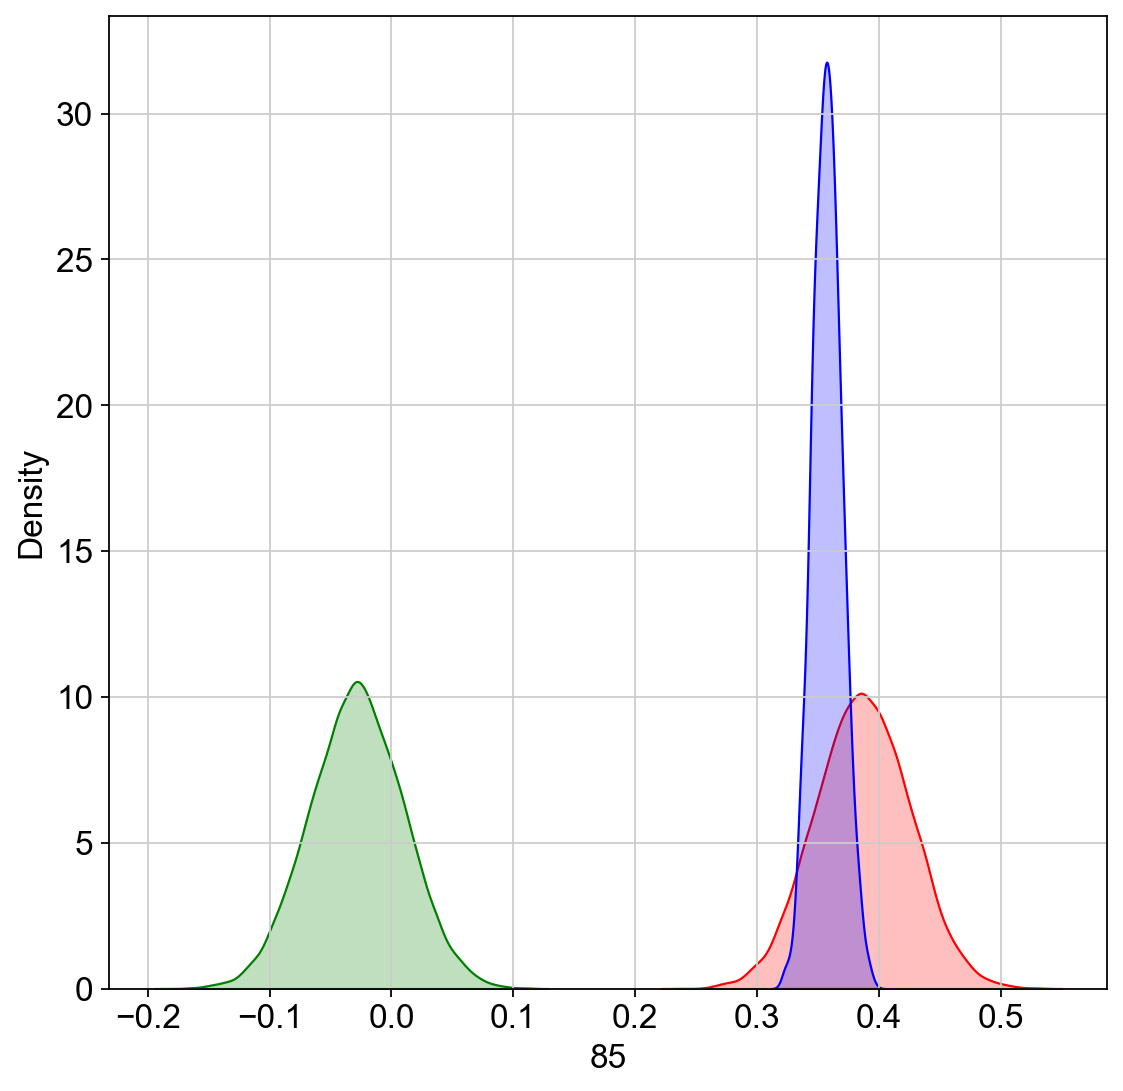

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


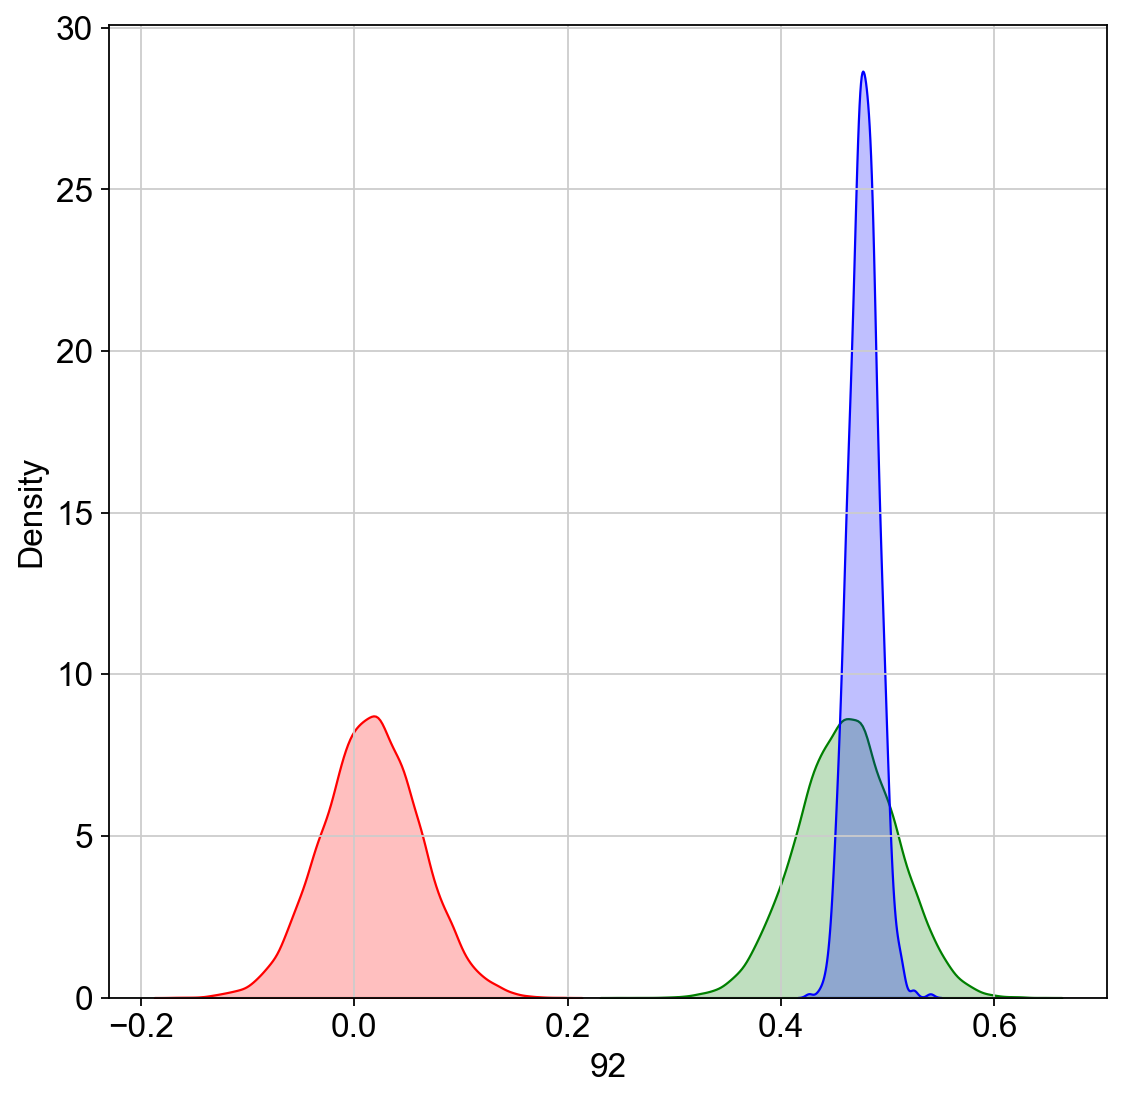

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data1[col], shade=True, color='red')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(existing_data2[col], shade=True, color='green')
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/2478534861.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulation_data[col], shade=True, color='blue')


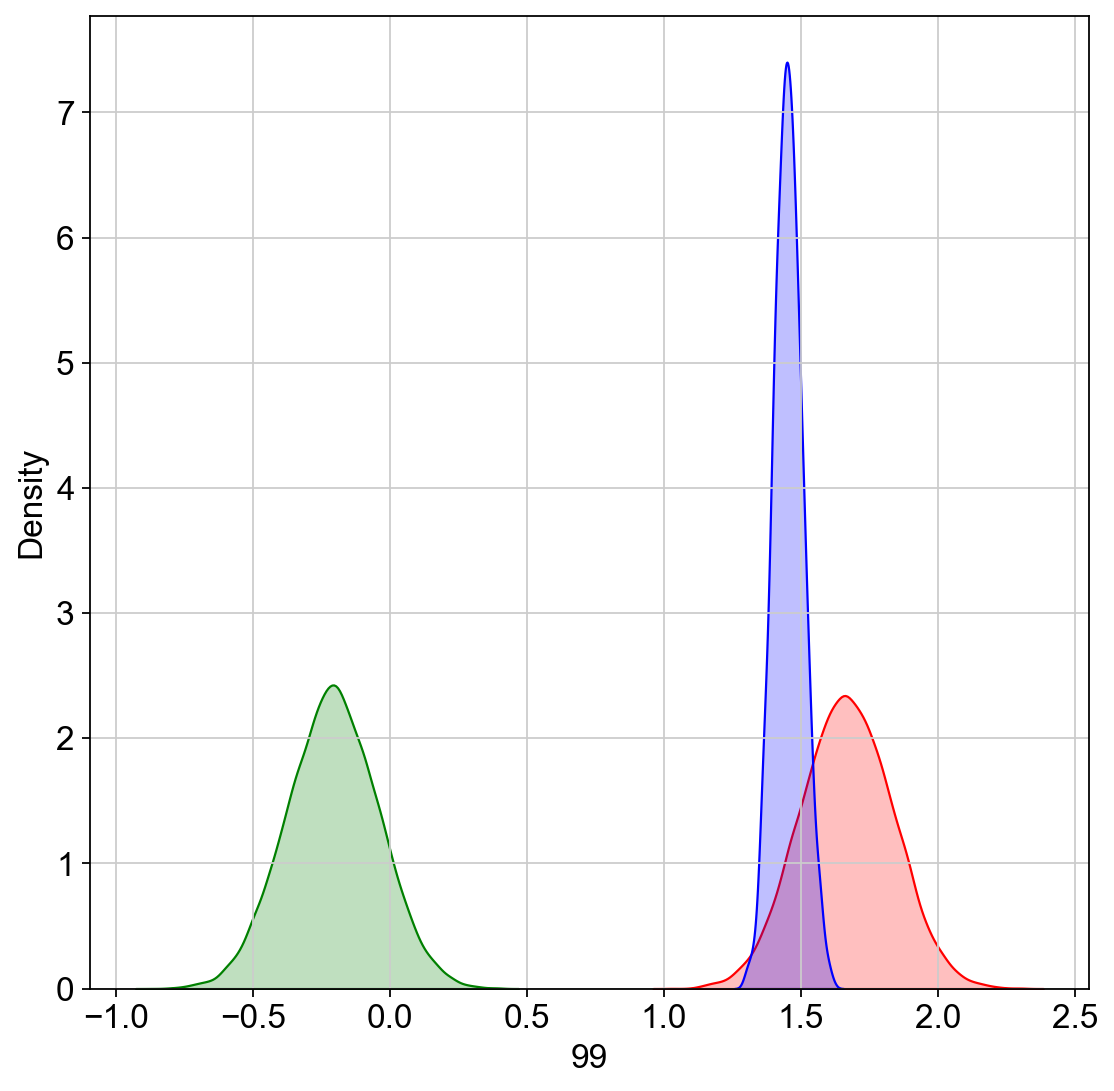

In [9]:
for col in selected_genes:
    sns.kdeplot(existing_data1[col], shade=True, color='red')
    sns.kdeplot(existing_data2[col], shade=True, color='green')
    sns.kdeplot(simulation_data[col], shade=True, color='blue')
#     plt.scatter(simulation_data[col], np.zeros_like(simulation_data[col]), color='red', s=10, alpha=0.5)
    plt.xlabel(col)
    plt.show()

In [10]:
adata[N:2*N].obs['label'].value_counts()

Class 2    30000
Name: label, dtype: int64

In [11]:
from scipy import stats
from scipy.spatial.distance import pdist, squareform

def dist_sampling(adata, sample_per_matrix=4, rng=1000, seed=12345):
    adata.obs = adata.obs.reset_index()
    np.random.seed(seed)
    all_indices = adata.obs.index.to_numpy().astype(int)
    np.random.shuffle(all_indices)

    start_i = 0
    if all_indices.shape[0] % rng !=0:
        end_of_range = int(all_indices.shape[0] / rng + 1)
    else:
        end_of_range = int(all_indices.shape[0] / rng)
        
    output = []
    for i in range(end_of_range):
        samples = all_indices[start_i:start_i + rng]
#         print(adata[samples].obs['label'].value_counts())
        start_i += rng

        x = adata.X[samples,]
#         x = stats.zscore(x, axis=1)
        # scores = np.corrcoef(x)
        dists = squareform(pdist(x, metric='euclidean'))
        th = np.max(dists)
        mask1 = dists > th
        while (mask1.sum(axis=1)>0).sum() < 5* sample_per_matrix:
            th = th/2
            mask1 = dists > th
            
        mask = mask1

        fin_scores = np.multiply(dists, mask).sum(axis=0)
        t = samples[np.argsort(fin_scores)[0:sample_per_matrix]]
#         print(sum(adata[t].obs['label']=='Class 2'))
        output.extend(t)

    output = adata.obs.loc[output]['index'].values
    adata.obs.index = adata.obs['index']
    del adata.obs['index']
    return np.array(output)

In [12]:
adata = adata[:,selected_genes].copy()

In [13]:
# corr_s = dist_sampling(adata, sample_per_matrix= 21, rng= 500, seed = 125)
# corr_s.shape

(2562,)

In [22]:
corr_s = dist_sampling(adata, sample_per_matrix= 21, rng= 500, seed = 1236475)
corr_s.shape

(2562,)

In [23]:
s_partially_s, _ = bin_sample(adata, n_bins=10, s_size=35)
print(s_partially_s.size)
s_random_s = sample_random(adata, s_size=s_partially_s.size)

2598


In [24]:
sc.set_figure_params(dpi=300, color_map = 'viridis_r', figsize=(8,8), fontsize=15,)
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.9.11 pynndescent==0.5.8


In [25]:
small_random_adata = adata[s_random_s]
# change_cmap(small_random_adata, dictionary, celltype_key=label_key)

In [26]:
small_partially_adata = adata[s_partially_s]
# change_cmap(small_partially_adata, dictionary, celltype_key=label_key)

In [27]:
small_dist_adata = adata[corr_s]
# change_cmap(small_dist_adata, dictionary, celltype_key=label_key)

In [28]:
small_random_adata.obs['batch'] = 'Random'
small_partially_adata.obs['batch'] = 'Bin-sampling'
small_dist_adata.obs['batch'] = 'dist-sampling'

/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/898376935.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  small_random_adata.obs['batch'] = 'Random'
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/898376935.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  small_partially_adata.obs['batch'] = 'Bin-sampling'
/var/folders/b9/mqf9wk292h39196nq6pcyk0jd6kxs7/T/ipykernel_17188/898376935.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  small_dist_adata.obs['batch'] = 'dist-sampling'


In [29]:
cell_type_order = adata.obs['label'].value_counts().keys().values

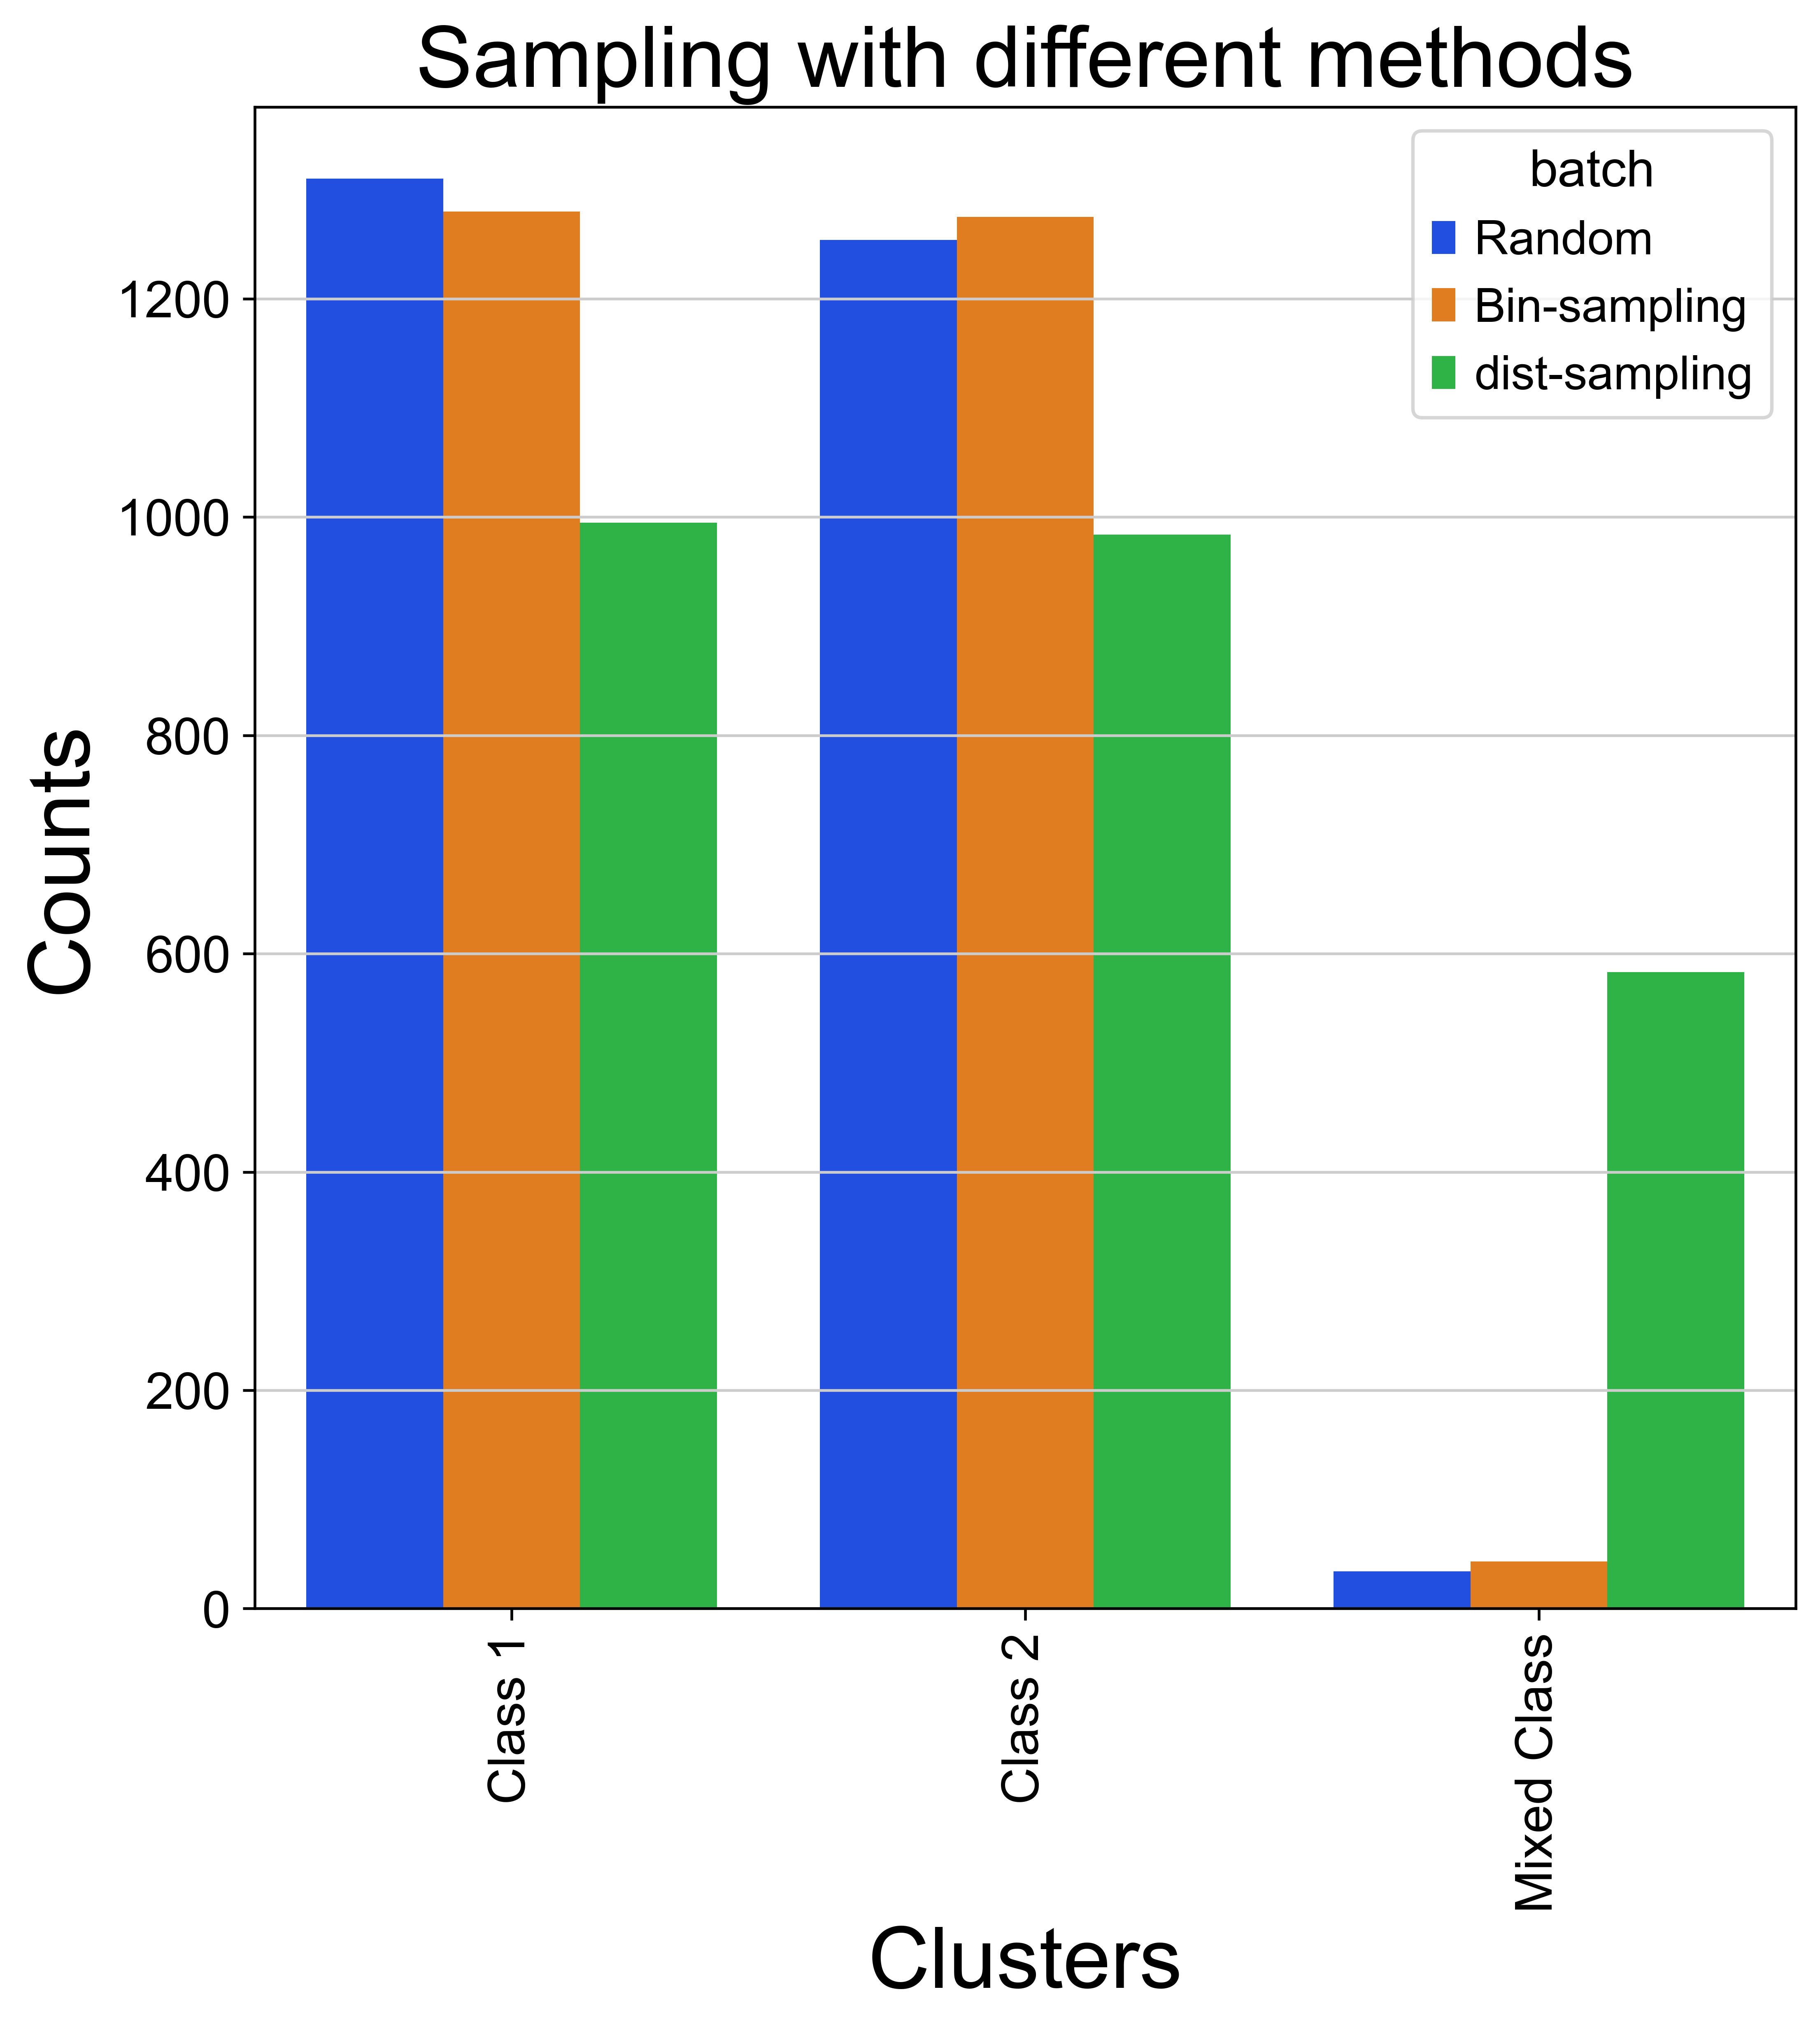

In [30]:
df_mixed = pd.concat([small_random_adata.obs, small_partially_adata.obs, small_dist_adata.obs])
g2 = sns.countplot(data=df_mixed, x="label", hue="batch", palette="bright", order=cell_type_order)
plt.xticks(rotation=90)
plt.ylabel("Counts", size = 25)
plt.xlabel("Clusters", size = 25)
plt.title("Sampling with different methods", size= 25)
plt.savefig("all_methods_sim_seed1.png", dpi=200, bbox_inches='tight', pad_inches = 0.5)

In [25]:
small_dist_adata.obs['label'].value_counts()

Class 1        2132
Mixed Class     430
Name: label, dtype: int64